<a href="https://colab.research.google.com/github/DavidEmeryUofC/CDS_Project_Restaurant_Rev_Prediction/blob/main/CDSproject2_attribute_investigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

<center> <h1> <span style='color:#292D78'> CREWES Data Science Training </span> </h1> </center>

<center> <h2> <span style='color:#DF7F00'> Project: Restaurant Revenue Prediction </span> </h2> </center>

---

This [Jupyter Notebook](https://jupyter.org/install) is for analysing the data in the [Kaggle Project](https://www.kaggle.com/code/akouaorsot/restaurant-revenue-s-predictions) for estimation of Restaurant Revenue.  

Project members are: [David Emery](https://www.linkedin.com/in/david-emery-54659a3a/), [Nazhat Shirin Rashid](https://www.linkedin.com/in/nazhatrashid/), [Stephanie Misailidis](https://www.linkedin.com/in/stephanie-jimenez-misailidis-54a6b3b1/?originalSubdomain=ca), and [Reginaldo Moriera](https://www.linkedin.com/in/reginaldo-moreira-70a016b3/)

In [ ]:
# Core utilities
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (10,7)}) # default figure size set for Powerpoint

# print plots
%matplotlib inline 

# To supress warnings and deprecated messages
import warnings
warnings.filterwarnings("ignore")


## Import data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
filepath = '/content/drive/MyDrive/CDS_Course/project'
filename = filepath + '/test.csv'
print(filename)
df_test = pd.read_csv(filename)
df_test.head()

/content/drive/MyDrive/CDS_Course/project/test.csv


Id   Open Date            City  City Group Type  P1   P2   P3   P4  P5  \
0   0  01/22/2011           Niğde       Other   FC   1  4.0  4.0  4.0   1   
1   1  03/18/2011           Konya       Other   IL   3  4.0  4.0  4.0   2   
2   2  10/30/2013          Ankara  Big Cities   FC   3  4.0  4.0  4.0   2   
3   3  05/06/2013         Kocaeli       Other   IL   2  4.0  4.0  4.0   2   
4   4  07/31/2013  Afyonkarahisar       Other   FC   2  4.0  4.0  4.0   1   

   ...  P28  P29  P30  P31  P32  P33  P34  P35  P36  P37  
0  ...  2.0  3.0    0    0    0    0    0    0    0    0  
1  ...  1.0  3.0    0    0    0    0    0    0    0    0  
2  ...  2.0  3.0    0    0    0    0    0    0    0    0  
3  ...  2.0  3.0    0    4    0    0    0    0    0    0  
4  ...  5.0  3.0    0    0    0    0    0    0    0    0  

[5 rows x 42 columns]

In [ ]:
df_test.shape

(100000, 42)

In [ ]:
filename = filepath + '/train.csv'
print(filename)
df_train = pd.read_csv(filename)
df_train.head()

/content/drive/MyDrive/CDS_Course/project/train.csv


Id   Open Date        City  City Group Type  P1   P2   P3   P4  P5  ...  \
0   0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1   1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2   2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2  ...   
3   3  02/02/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4   4  05/09/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   

   P29  P30  P31  P32  P33  P34  P35  P36  P37    revenue  
0  3.0    5    3    4    5    5    4    3    4  5653753.0  
1  3.0    0    0    0    0    0    0    0    0  6923131.0  
2  3.0    0    0    0    0    0    0    0    0  2055379.0  
3  7.5   25   12   10    6   18   12   12    6  2675511.0  
4  3.0    5    1    3    2    3    4    3    3  4316715.0  

[5 rows x 43 columns]

In [ ]:
df_train.shape

(137, 43)

The training set only contains 137 restaurant with revenue while the test data contain 100000 restaurant.

In [ ]:
df_train["ODate"] = pd.to_datetime(df_train["Open Date"], format = "%m/%d/%Y", utc = False)
df_test["ODate"] = pd.to_datetime(df_test["Open Date"], format = "%m/%d/%Y", utc = False)

firstopenT = pd.to_datetime(df_test["ODate"].min(), format='%Y-%m-%d', utc = False)
lastopenT = pd.to_datetime(df_test["ODate"].max(), format='%Y-%m-%d', utc = False)
print("test data",firstopenT,lastopenT)

firstopen = pd.to_datetime(df_train["ODate"].min(), format='%Y-%m-%d', utc = False)
lastopen = pd.to_datetime(df_train["ODate"].max(), format='%Y-%m-%d', utc = False)
print("train data",firstopen,lastopen)

df_train["DOpen"] = (lastopen - df_train["ODate"])/ pd.offsets.Day(1)
df_test["DOpen"] = (lastopenT - df_test["ODate"])/ pd.offsets.Day(1)

test data 1995-05-08 00:00:00 2014-01-04 00:00:00
train data 1996-05-08 00:00:00 2014-01-25 00:00:00


The train data set spans from the start of 1996 to the end of 2014 (18 years). The test dataset spans 19 years and as the contest was 7 years ago might be safe to assume a minimum of 1 year open 

In [ ]:
df_train.head()

Id   Open Date        City  City Group Type  P1   P2   P3   P4  P5  ...  \
0   0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1   1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2   2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2  ...   
3   3  02/02/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4   4  05/09/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   

   P31  P32  P33  P34  P35  P36  P37    revenue      ODate   DOpen  
0    3    4    5    5    4    3    4  5653753.0 1999-07-17  5306.0  
1    0    0    0    0    0    0    0  6923131.0 2008-02-14  2172.0  
2    0    0    0    0    0    0    0  2055379.0 2013-03-09   322.0  
3   12   10    6   18   12   12    6  2675511.0 2012-02-02   723.0  
4    1    3    2    3    4    3    3  4316715.0 2009-05-09  1722.0  

[5 rows x 45 columns]

### Data fields
Id : Restaurant id.   
Open Date : opening date for a restaurant  
City : City that the restaurant is in. Note that there are unicode in the names.   
City Group: Type of the city. Big cities, or Other.   
Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile  
P1, P2 - P37: There are three categories of these obfuscated data.   
- Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales.  
- Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability.  
- Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.  

Revenue: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 

In [ ]:
#df_test.info()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Id          137 non-null    int64         
 1   Open Date   137 non-null    object        
 2   City        137 non-null    object        
 3   City Group  137 non-null    object        
 4   Type        137 non-null    object        
 5   P1          137 non-null    int64         
 6   P2          137 non-null    float64       
 7   P3          137 non-null    float64       
 8   P4          137 non-null    float64       
 9   P5          137 non-null    int64         
 10  P6          137 non-null    int64         
 11  P7          137 non-null    int64         
 12  P8          137 non-null    int64         
 13  P9          137 non-null    int64         
 14  P10         137 non-null    int64         
 15  P11         137 non-null    int64         
 16  P12         137 non-null  

In [ ]:
df_train.describe().T

count          mean           std        min        25%        50%  \
Id       137.0  6.800000e+01  3.969257e+01        0.0       34.0       68.0   
P1       137.0  4.014599e+00  2.910391e+00        1.0        2.0        3.0   
P2       137.0  4.408759e+00  1.514900e+00        1.0        4.0        5.0   
P3       137.0  4.317518e+00  1.032337e+00        0.0        4.0        4.0   
P4       137.0  4.372263e+00  1.016462e+00        3.0        4.0        4.0   
P5       137.0  2.007299e+00  1.209620e+00        1.0        1.0        2.0   
P6       137.0  3.357664e+00  2.134235e+00        1.0        2.0        3.0   
P7       137.0  5.423358e+00  2.296809e+00        1.0        5.0        5.0   
P8       137.0  5.153285e+00  1.858567e+00        1.0        4.0        5.0   
P9       137.0  5.445255e+00  1.834793e+00        4.0        4.0        5.0   
P10      137.0  5.489051e+00  1.847561e+00        4.0        5.0        5.0   
P11      137.0  3.262774e+00  1.910767e+00        1.0        2.0        3.0   
P12      137.0  5.299270e+00  1.941668e+00        2.0        4.0        5.0   
P13      137.0  5.080292e+00  1.036527e+00        3.0        5.0        5.0   
P14      137.0  1.416058e+00  2.729583e+00        0.0        0.0        0.0   
P15      137.0  1.386861e+00  2.398677e+00        0.0        0.0        0.0   
P16      137.0  1.941606e+00  3.505807e+00        0.0        0.0        0.0   
P17      137.0  1.036496e+00  2.030679e+00        0.0        0.0        0.0   
P18      137.0  1.941606e+00  3.300549e+00        0.0        0.0        0.0   
P19      137.0  4.905109e+00  5.604467e+00        1.0        2.0        3.0   
P20      137.0  4.547445e+00  3.708041e+00        1.0        2.0        4.0   
P21      137.0  2.270073e+00  2.052630e+00        1.0        1.0        1.0   
P22      137.0  2.226277e+00  1.230690e+00        1.0        1.0        2.0   
P23      137.0  3.423358e+00  4.559609e+00        1.0        1.0        2.0   
P24      137.0  1.372263e+00  2.304112e+00        0.0        0.0        0.0   
P25      137.0  1.211679e+00  2.133179e+00        0.0        0.0        0.0   
P26      137.0  1.470803e+00  2.612024e+00        0.0        0.0        0.0   
P27      137.0  1.145985e+00  2.067039e+00        0.0        0.0        0.0   
P28      137.0  3.222628e+00  2.308806e+00        1.0        2.0        2.5   
P29      137.0  3.135036e+00  1.680887e+00        0.0        2.5        3.0   
P30      137.0  2.729927e+00  5.536647e+00        0.0        0.0        0.0   
P31      137.0  1.941606e+00  3.512093e+00        0.0        0.0        0.0   
P32      137.0  2.525547e+00  5.230117e+00        0.0        0.0        0.0   
P33      137.0  1.138686e+00  1.698540e+00        0.0        0.0        0.0   
P34      137.0  2.489051e+00  5.165093e+00        0.0        0.0        0.0   
P35      137.0  2.029197e+00  3.436272e+00        0.0        0.0        0.0   
P36      137.0  2.211679e+00  4.168211e+00        0.0        0.0        0.0   
P37      137.0  1.116788e+00  1.790768e+00        0.0        0.0        0.0   
revenue  137.0  4.453533e+06  2.576072e+06  1149870.0  2999068.0  3939804.0   
DOpen    137.0  1.770263e+03  1.471258e+03        0.0      766.0     1432.0   

               75%         max  
Id           102.0       136.0  
P1             4.0        12.0  
P2             5.0         7.5  
P3             5.0         7.5  
P4             5.0         7.5  
P5             2.0         8.0  
P6             4.0        10.0  
P7             5.0        10.0  
P8             5.0        10.0  
P9             5.0        10.0  
P10            5.0        10.0  
P11            4.0        10.0  
P12            5.0        10.0  
P13            5.0         7.5  
P14            2.0        15.0  
P15            2.0        10.0  
P16            3.0        15.0  
P17            1.0        15.0  
P18            4.0        12.0  
P19            5.0        25.0  
P20            5.0        15.0  
P21            3.0        15.0  
P22       

Test for duplicate rows

In [ ]:
print("Duplication in numerical columns in test data",df_test.duplicated().sum())
print("Duplication in numerical columns in train data",df_train.duplicated().sum())

Duplication in numerical columns in test data 0
Duplication in numerical columns in train data 0


Test for nan's in input data

In [ ]:
print("Test for nan's in test data",df_test.isna().sum().sum())
print("Test for nan's in train data",df_train.isna().sum().sum())
#df_test.isna().sum()
#df_train.isna().sum()

Test for nan's in test data 0
Test for nan's in train data 0


## Histogram of the target (revenue)

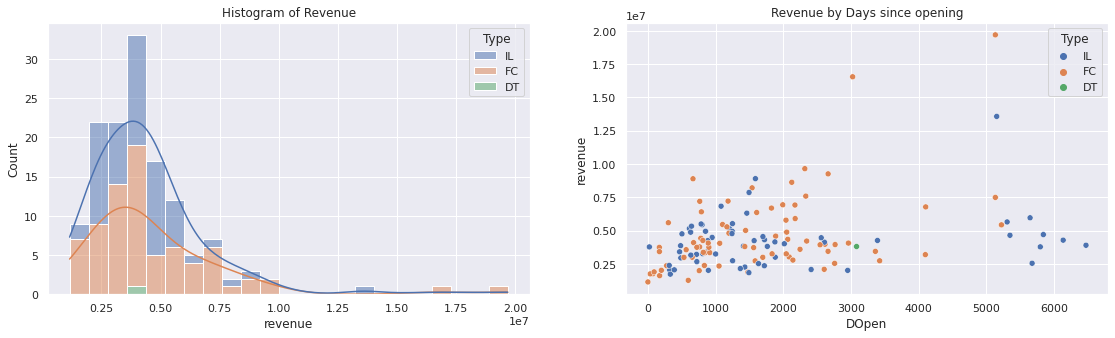

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.histplot(data=df_train, x="revenue", hue="Type", multiple="stack", kde=True, ax = ax[0]).set(title='Histogram of Revenue');
g2 = sns.scatterplot(data=df_train,x="DOpen",y="revenue", hue="Type", ax = ax[1]).set(title='Revenue by Days since opening');
fig.show();

Revenue appears to be highly right-hand scud with 3 outliers

In [ ]:
print(df_train[df_train.revenue > 12500000])

    Id   Open Date      City  City Group Type  P1   P2   P3   P4  P5  ...  \
16  16  01/07/2000  İstanbul  Big Cities   FC   3  5.0  4.0  4.0   2  ...   
75  75  10/15/2005  İstanbul  Big Cities   FC   5  5.0  4.0  5.0   1  ...   
99  99  12/18/1999  İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   

    P31  P32  P33  P34  P35  P36  P37     revenue      ODate   DOpen  
16    0    0    0    0    0    0    0  19696939.0 2000-01-07  5132.0  
75    0    0    0    0    0    0    0  16549064.0 2005-10-15  3024.0  
99    5    4    2    5    5    5    3  13575224.0 1999-12-18  5152.0  

[3 rows x 45 columns]


The 3 outliers are all in Istanbul with the 2 highest values both type FC.

In [ ]:
df_train[df_train.revenue > 12500000].describe().T

count          mean           std         min         25%  \
Id         3.0  6.333333e+01  4.271222e+01        16.0        45.5   
P1         3.0  4.000000e+00  1.000000e+00         3.0         3.5   
P2         3.0  5.000000e+00  0.000000e+00         5.0         5.0   
P3         3.0  4.000000e+00  0.000000e+00         4.0         4.0   
P4         3.0  4.333333e+00  5.773503e-01         4.0         4.0   
P5         3.0  1.666667e+00  5.773503e-01         1.0         1.5   
P6         3.0  4.333333e+00  5.773503e-01         4.0         4.0   
P7         3.0  5.000000e+00  0.000000e+00         5.0         5.0   
P8         3.0  3.666667e+00  5.773503e-01         3.0         3.5   
P9         3.0  4.333333e+00  5.773503e-01         4.0         4.0   
P10        3.0  4.000000e+00  0.000000e+00         4.0         4.0   
P11        3.0  4.333333e+00  1.154701e+00         3.0         4.0   
P12        3.0  3.666667e+00  1.154701e+00         3.0         3.0   
P13        3.0  4.000000e+00  0.000000e+00         4.0         4.0   
P14        3.0  1.666667e+00  2.886751e+00         0.0         0.0   
P15        3.0  1.666667e+00  2.886751e+00         0.0         0.0   
P16        3.0  1.666667e+00  2.886751e+00         0.0         0.0   
P17        3.0  1.666667e+00  2.886751e+00         0.0         0.0   
P18        3.0  1.666667e+00  2.886751e+00         0.0         0.0   
P19        3.0  3.666667e+00  2.309401e+00         1.0         3.0   
P20        3.0  4.666667e+00  5.773503e-01         4.0         4.5   
P21        3.0  3.666667e+00  2.309401e+00         1.0         3.0   
P22        3.0  3.000000e+00  2.000000e+00         1.0         2.0   
P23        3.0  2.000000e+00  1.732051e+00         1.0         1.0   
P24        3.0  1.666667e+00  2.886751e+00         0.0         0.0   
P25        3.0  1.666667e+00  2.886751e+00         0.0         0.0   
P26        3.0  1.666667e+00  2.886751e+00         0.0         0.0   
P27        3.0  3.333333e-01  5.773503e-01         0.0         0.0   
P28        3.0  4.000000e+00  1.732051e+00         2.0         3.5   
P29        3.0  1.000000e+00  1.000000e+00         0.0         0.5   
P30        3.0  1.666667e+00  2.886751e+00         0.0         0.0   
P31        3.0  1.666667e+00  2.886751e+00         0.0         0.0   
P32        3.0  1.333333e+00  2.309401e+00         0.0         0.0   
P33        3.0  6.666667e-01  1.154701e+00         0.0         0.0   
P34        3.0  1.666667e+00  2.886751e+00         0.0         0.0   
P35        3.0  1.666667e+00  2.886751e+00         0.0         0.0   
P36        3.0  1.666667e+00  2.886751e+00         0.0         0.0   
P37        3.0  1.000000e+00  1.732051e+00         0.0         0.0   
revenue    3.0  1.660708e+07  3.061270e+06  13575224.0  15062144.0   
DOpen      3.0  4.436000e+03  1.222869e+03      3024.0      4078.0   

                50%         75%         max  
Id             75.0        87.0        99.0  
P1              4.0         4.5         5.0  
P2              5.0         5.0         5.0  
P3              4.0         4.0         4.0  
P4              4.0         4.5         5.0  
P5              2.0         2.0         2.0  
P6              4.0         4.5         5.0  
P7              5.0         5.0         5.0  
P8              4.0         4.0         4.0  
P9              4.0         4.5         5.0  
P10             4.0         4.0         4.0  
P11             5.0         5.0         5.0  
P12             3.0         4.0         5.0  
P13             4.0         4.0         4.0  
P14             0.0         2.5         5.0  
P15             0.0         2.5         5.0  
P16             0.0         2.5         5.0  
P17             0.0         2.5         5.0  
P18             0.0         2.5         5.0  
P19             5.0         5.0         5.0  
P20             5.0         5.0         5.0  
P21             5.0         5.0         5.0  
P22             3.0         4.0         5.0  
P23             1.0         2.5   

The 2 highest point have zero in P14-P18, P24-27 & P30-P37 but have a value for the 3rd. Will need to check if zero represent nan or real values.  Pc that are consistent between the three highest values P2, P3, P7, P10, P13.

We will get back to checking on the Pc values but first seeing if the target ('Revenue') might benifit from scaling or removing any time dependent consideration.

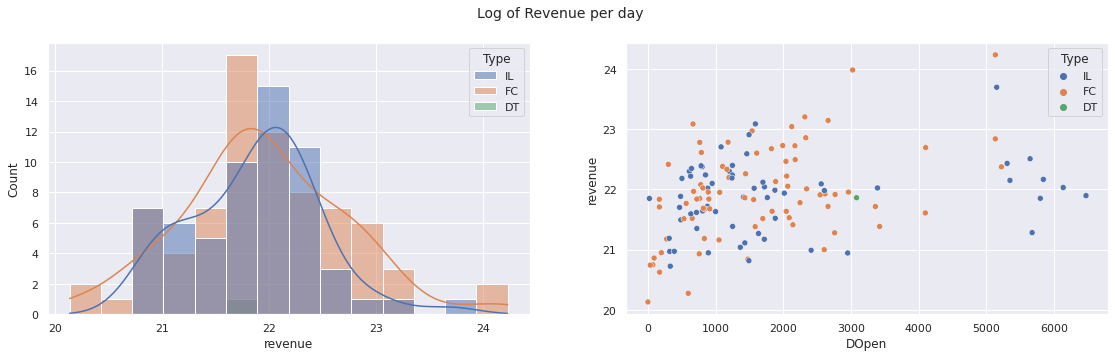

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.histplot(x=np.log2(df_train['revenue']),hue=df_train["Type"], kde=True, ax=ax[0]);
g2 = sns.scatterplot(x=df_train['DOpen'],y=np.log2(df_train['revenue']),hue=df_train["Type"], ax=ax[1]);
plt.suptitle('Log of Revenue per day',fontsize=14)
fig.show();

Revenue per day assuming at least 2 years of revenue

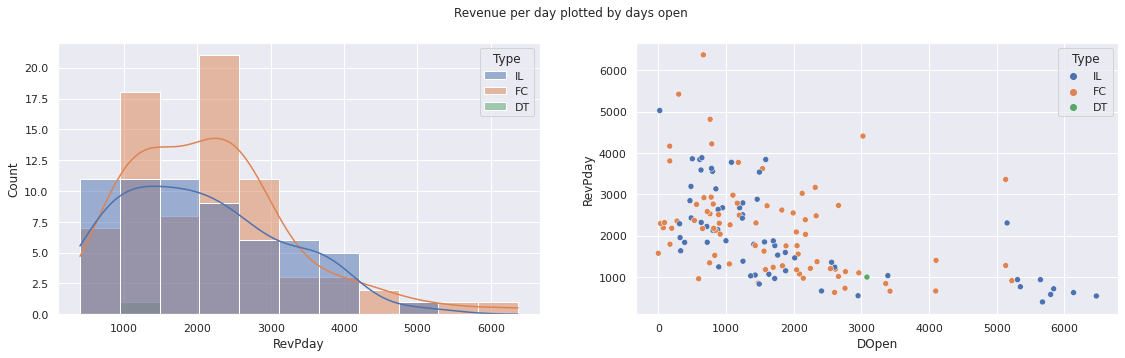

In [ ]:
df_train['RevPday'] = df_train['revenue']/(df_train['DOpen'] + 365*2)
#print('Revenue as a function of days open')
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.histplot(x=(df_train['RevPday']),hue=df_train["Type"], kde=True, ax=ax[0]);
g2 = sns.scatterplot(data=df_train,x="DOpen",y="RevPday", hue="Type", ax=ax[1]);
plt.suptitle('Revenue per day plotted by days open',fontsize=12)
fig.show();

While the contest discription discuss that the revenue is already scaled the positive increase in revenue with day open, some degree of correction would be appropriate.  Revenue per day has the inverse relationhsip a revenue drop with time. With out this correction the 3 best restaurant all are new.

In [ ]:
print('Revenue per day above 5000')
print(df_train[df_train.RevPday > 5000])

Revenue per day above 5000
      Id   Open Date      City  City Group Type  P1   P2   P3   P4  P5  ...  \
53    53  03/29/2013    Samsun       Other   FC   3  4.0  4.0  3.0   1  ...   
116  116  03/30/2012     İzmir  Big Cities   FC   2  4.0  4.0  4.0   2  ...   
119  119  01/03/2014  İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   

     P32  P33  P34  P35  P36  P37    revenue      ODate  DOpen      RevPday  
53     0    0    0    0    0    0  5595267.0 2013-03-29  302.0  5421.770349  
116    0    0    0    0    0    0  8894598.0 2012-03-30  666.0  6371.488539  
119    0    0    0    0    0    0  3780019.0 2014-01-03   22.0  5026.621011  

[3 rows x 46 columns]


Assuming that there always a revenue burst for a new restraunt a decline could be expected with days open.  As this affect would not correlate with demographic stats in the Pc, a correction on the revenue/day would be needed and can be estimated using linear regression.

In [ ]:
from sklearn.linear_model import LinearRegression

# Creating the model
model_lr = LinearRegression()

df_train['DOpen2'] = np.power(df_train['DOpen'],2)

# Linear model on the train data
features = ['DOpen']
model_lr.fit(df_train[features], df_train['RevPday'])
DOpenInt = model_lr.intercept_
DOpen1 = model_lr.coef_
print('Intercept is ', DOpenInt,' +', DOpen1[0],' days open')

# Training the model on the train data
features = ['DOpen','DOpen2']
model_lr.fit(df_train[features], df_train['RevPday'])
df_train.drop(columns = ['DOpen2'], inplace=True)
DOpenInt2 = model_lr.intercept_
DOpen2 = model_lr.coef_
print('Intercept is ', DOpenInt2,' +', DOpen2[0],' days open +', DOpen2[1], 'days open^2')

Intercept is  2794.6714130137416  + -0.3853856757838528  days open
Intercept is  3152.637817804578  + -0.8116940664298359  days open + 7.509735647391528e-05 days open^2


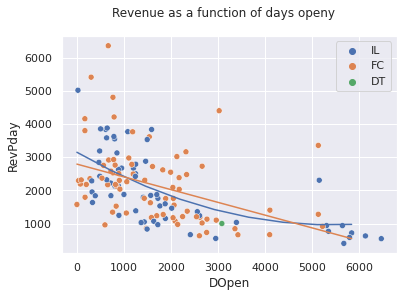

In [ ]:
DayRange = np.arange(np.min(df_train['DOpen']),np.max(df_train['DOpen']), 365*2)

RevDOpen1 = DOpenInt + (DOpen1[0] * DayRange)
RevDOpen = DOpenInt2 + (DOpen2[0] * DayRange) + (DOpen2[1] * np.power(DayRange,2))
#RevDOpen2 = DOpenInt - 500 + (DOpen2[0] * DayRange)*3/4 + (DOpen2[1]*0.55* np.power(DayRange,2))
df_train['RevPday'] = df_train['revenue']/(df_train['DOpen'] + 365*2)

sns.scatterplot(data=df_train,x="DOpen",y="RevPday", hue="Type")
sns.lineplot(x=DayRange, y=RevDOpen);
sns.lineplot(x=DayRange, y=RevDOpen1);
#sns.lineplot(x=DayRange, y=RevDOpen2);
plt.suptitle('Revenue as a function of days openy');

Linear normalization appears best for the creation of a correct revenue per day (RevPdayC)

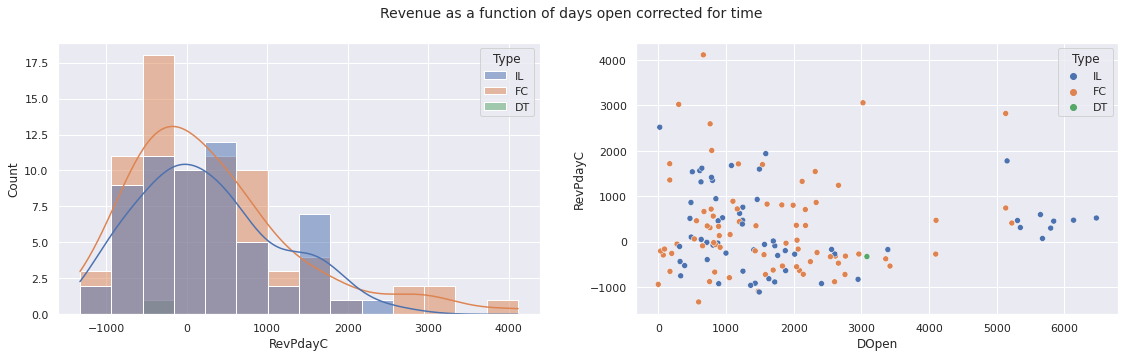

In [ ]:
df_train['RevPdayC'] = df_train['RevPday'] - (DOpenInt + (DOpen1[0] * (df_train['DOpen'] + 365*2)))

fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.histplot(x=(df_train['RevPdayC']),hue=df_train["Type"], kde=True, ax=ax[0]);
g2 = sns.scatterplot(data=df_train,x="DOpen",y="RevPdayC", hue="Type", ax=ax[1]);
plt.suptitle('Revenue as a function of days open corrected for time',fontsize=14)
fig.show();

The 2 of the 3 high corrected revenue/day restaurants are the same as for revenue and appears appropriate. The gap on the lower right appears is also appropriate as it could be assumed that low revenue restaurants would be closed over time. 

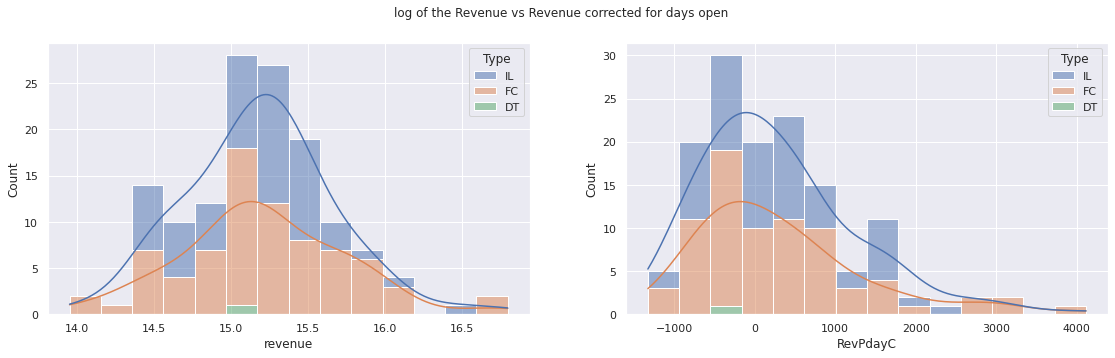

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.histplot(data=df_train, x=np.log(df_train.revenue), hue="Type", multiple="stack", kde=True, ax=ax[0]);
g2 = sns.histplot(data=df_train, x="RevPdayC", hue="Type", multiple="stack", kde=True, ax=ax[1]);
plt.suptitle('log of the Revenue vs Revenue corrected for days open',fontsize=12)
fig.show();

I would proposed testing revenue, log of revenue and the revenue/day corrected for future analysis.   Assuming revPdayC is the best estimate of revenue than the 3 best restaurants become:

In [ ]:
print('Revenue per day correct above 2000')
print(df_train[df_train.RevPdayC > 2000])

Revenue per day correct above 2000
      Id   Open Date        City  City Group Type  P1   P2   P3   P4  P5  ...  \
16    16  01/07/2000    İstanbul  Big Cities   FC   3  5.0  4.0  4.0   2  ...   
48    48  12/21/2011     Kayseri       Other   FC   4  5.0  4.0  4.0   2  ...   
53    53  03/29/2013      Samsun       Other   FC   3  4.0  4.0  3.0   1  ...   
75    75  10/15/2005    İstanbul  Big Cities   FC   5  5.0  4.0  5.0   1  ...   
96    96  11/27/2011  Diyarbakır       Other   FC   4  5.0  2.0  4.0   2  ...   
116  116  03/30/2012       İzmir  Big Cities   FC   2  4.0  4.0  4.0   2  ...   
119  119  01/03/2014    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   

     P33  P34  P35  P36  P37     revenue      ODate   DOpen      RevPday  \
16     0    0    0    0    0  19696939.0 2000-01-07  5132.0  3360.105595   
48     0    0    0    0    0   7201784.0 2011-12-21   766.0  4814.026738   
53     0    0    0    0    0   5595267.0 2013-03-29   302.0  5421.770349   
75     0    

We have now add city 53 (Samsun) and 116 (Izmir) to the high revenue restaurant. 

# Data Evaluation

City count in the dataset

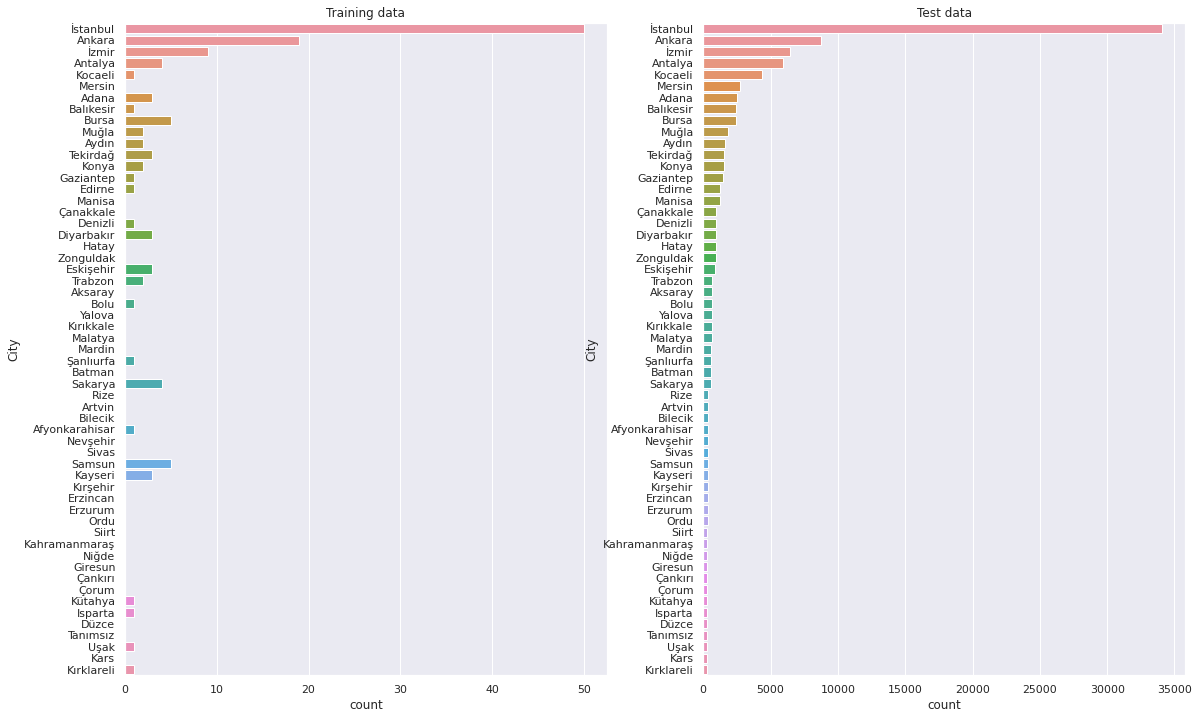

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(19, 12))
large_to_small = df_test.groupby('City').size().sort_values().index[::-1]
g1 = sns.countplot(data = df_train, y = "City", order=large_to_small, ax=ax[0]).set(title='Training data')
g2 = sns.countplot(data = df_test, y = "City",order=large_to_small, ax=ax[1]).set(title='Test data')
fig.show()

In [ ]:
print("Unique cities in training set", df_train['City'].nunique(), "and in the test set", df_test['City'].nunique(),'\n')
cities = df_test['City'].unique()
cities

Unique cities in training set 34 and in the test set 57 



array(['Niğde', 'Konya', 'Ankara', 'Kocaeli', 'Afyonkarahisar',
       'Eskişehir', 'Rize', 'İstanbul', 'Trabzon', 'Antalya', 'Muğla',
       'Düzce', 'Adana', 'Bursa', 'Aydın', 'Hatay', 'Denizli', 'İzmir',
       'Gaziantep', 'Samsun', 'Erzurum', 'Edirne', 'Balıkesir', 'Mersin',
       'Zonguldak', 'Malatya', 'Çanakkale', 'Kars', 'Bolu', 'Batman',
       'Bilecik', 'Giresun', 'Tekirdağ', 'Sivas', 'Kırıkkale', 'Mardin',
       'Erzincan', 'Manisa', 'Diyarbakır', 'Kahramanmaraş', 'Yalova',
       'Tanımsız', 'Sakarya', 'Kırşehir', 'Aksaray', 'Kayseri',
       'Nevşehir', 'Çorum', 'Ordu', 'Kırklareli', 'Şanlıurfa', 'Artvin',
       'Uşak', 'Kütahya', 'Siirt', 'Çankırı', 'Isparta'], dtype=object)

Significantly more cities in the test data than the train dataset along with a variation in the sampling of the smaller (other) cities.

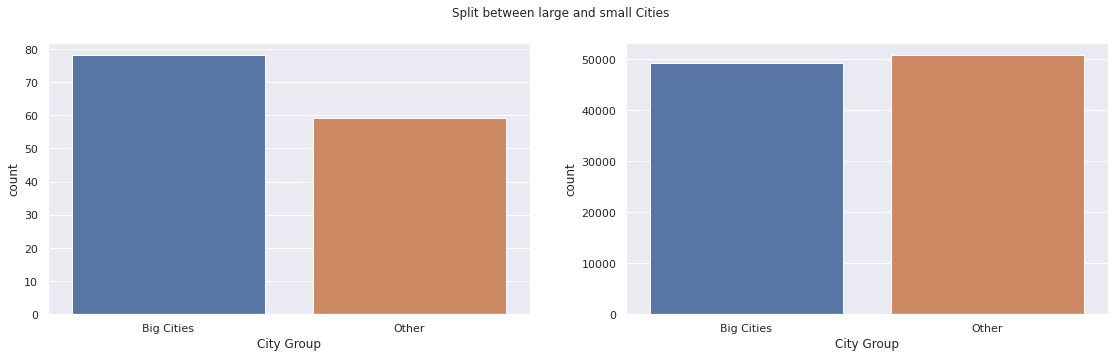

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
horder = ['Big Cities','Other']
g1 = sns.countplot(data = df_train, x = "City Group", order = horder, ax= ax[0])
g2 = sns.countplot(data = df_test, x = "City Group", order = horder, ax= ax[1])
plt.suptitle('Split between large and small Cities',fontsize=12);

Test data more 50/50 while the training data has a byse toward the 3 big cities

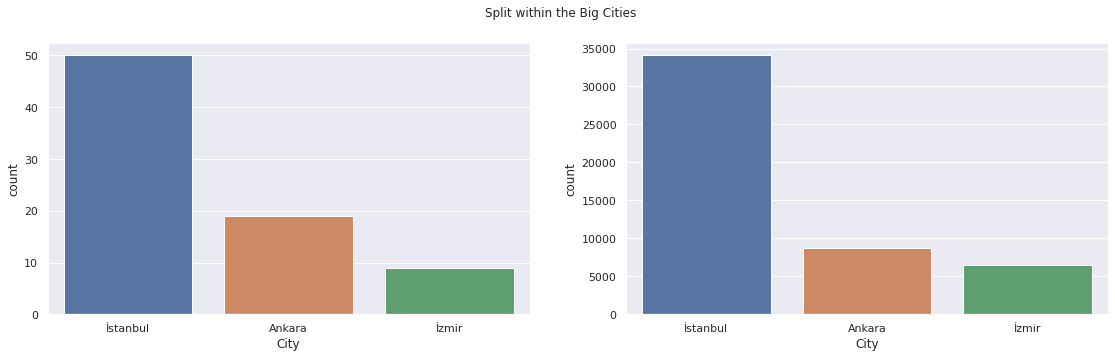

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
large_cityOrder = df_test[df_test["City Group"] == 'Big Cities'].groupby('City').size().sort_values().index[::-1]
sns.countplot(data = df_train[df_train["City Group"] == 'Big Cities'], x = "City", order=large_cityOrder, ax = ax[0]);
sns.countplot(data = df_test[df_test["City Group"] == 'Big Cities'], x = "City", order=large_cityOrder, ax = ax[1])
plt.suptitle('Split within the Big Cities',fontsize=12);

Only 3 Big Cities in both the training and test dataset but they make up 50% of the total number of restaurants. Istanbul around 1/3 of the total.

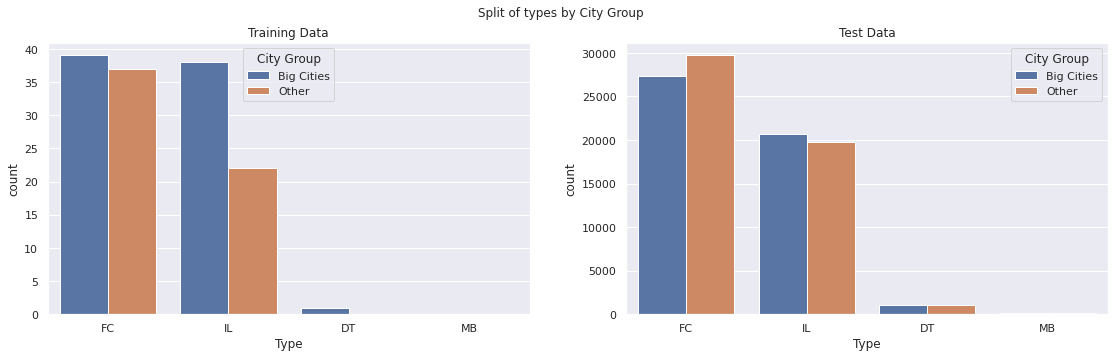

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
porder = ['FC','IL','DT','MB']
horder = ['Big Cities','Other']
sns.countplot(data = df_train, x = "Type",  hue="City Group",order=porder, hue_order=horder, ax = ax[0]).set(title='Training Data')
sns.countplot(data = df_test, x = "Type",  hue="City Group", order=porder, hue_order=horder, ax = ax[1]).set(title='Test Data')
plt.suptitle('Split of types by City Group',fontsize=12);

The test data contain all 4 data types while the training data has no MB and byse toward FC and IL. The DT and MB types appears to be under represented.  The best solution would be either to remove the data or merge with either FC or IL.

### Split the data into numerical and categorical features 

In [ ]:
df_train.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue', 'ODate', 'DOpen', 'RevPday', 'RevPdayC'],
      dtype='object')

In [ ]:
# Extracting names of numerical and categorical features
cols_num = list(df_train.drop(columns = ["Id","revenue",'RevPday', 'RevPdayC']).select_dtypes(include = ["int64", "float64"]))
cols_cat = list(df_train.drop(columns = ["revenue",'RevPday', 'RevPdayC']).select_dtypes(include = ["object", "category", "bool"]))

print("Numerical columns:", cols_num)
print("Categorical columns:", cols_cat)

Numerical columns: ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'DOpen']
Categorical columns: ['Open Date', 'City', 'City Group', 'Type']


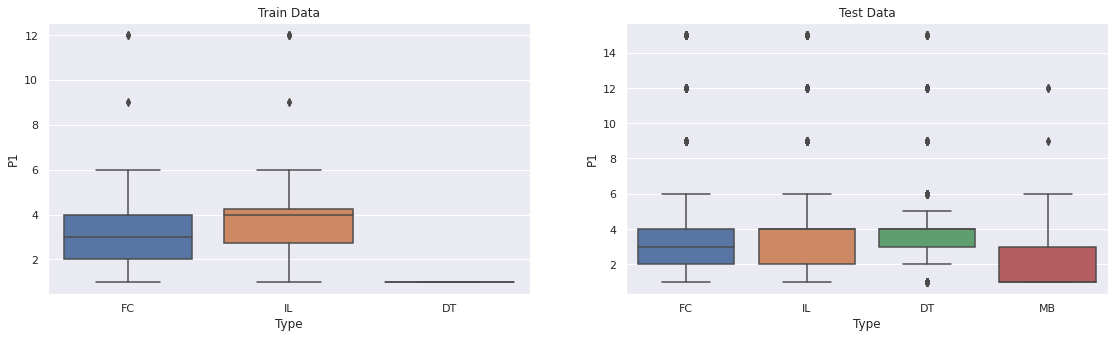

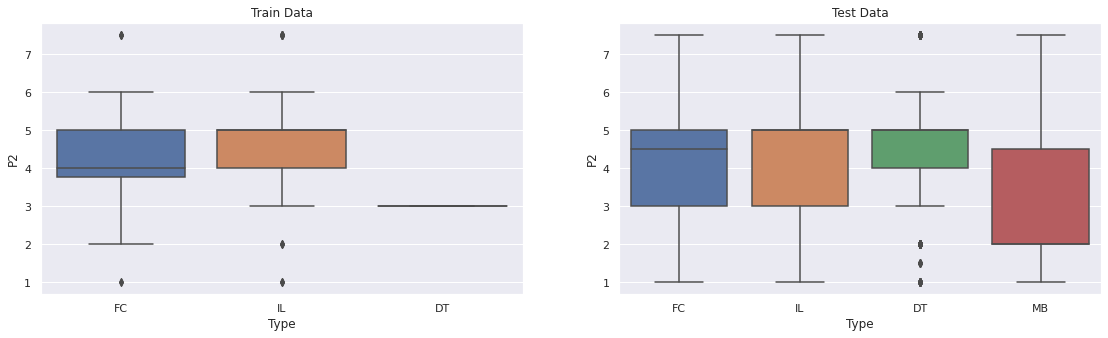

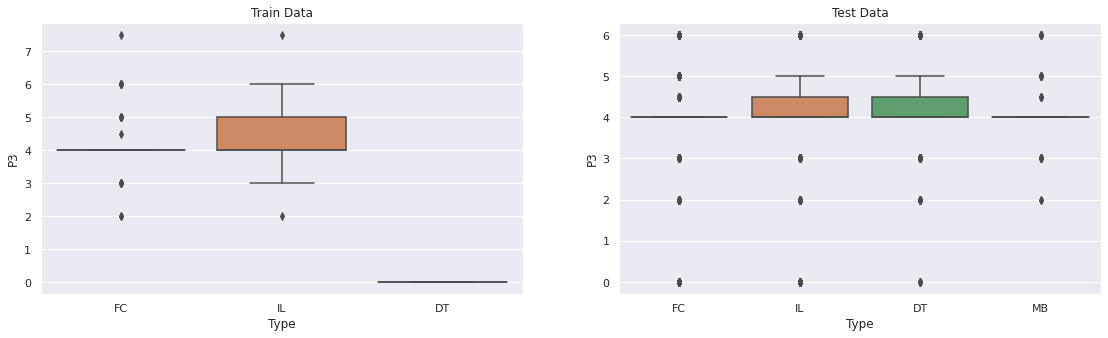

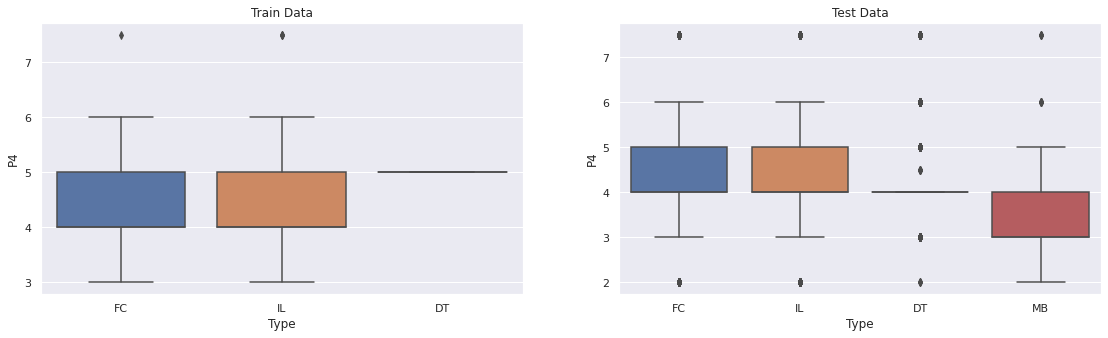

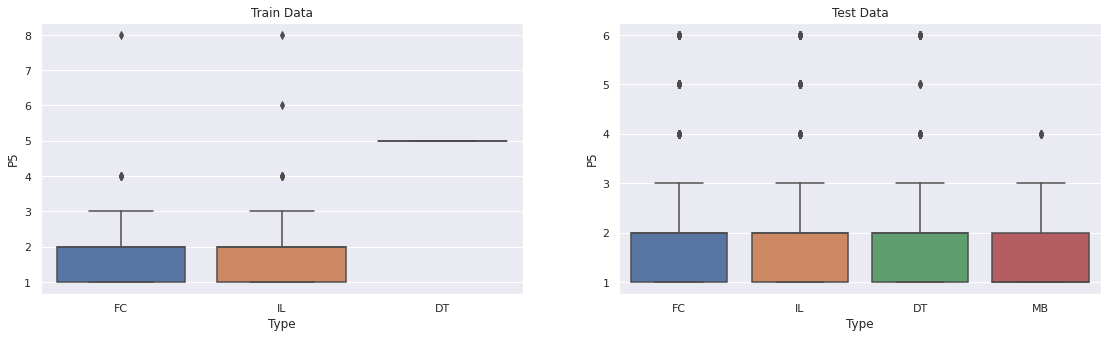

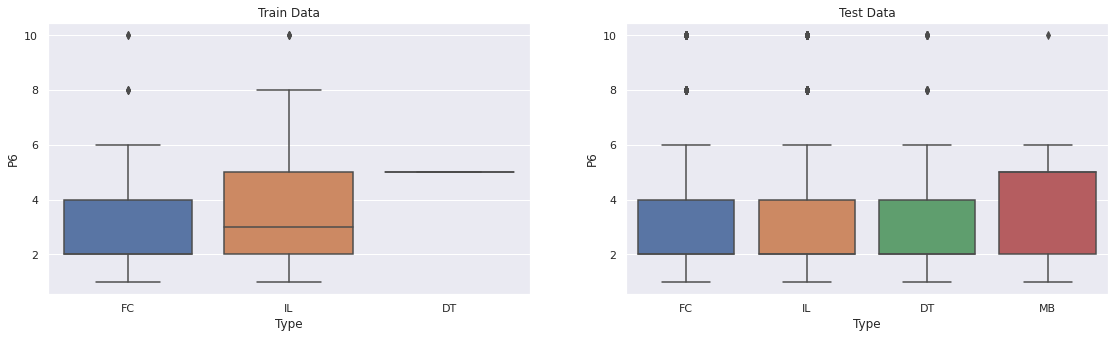

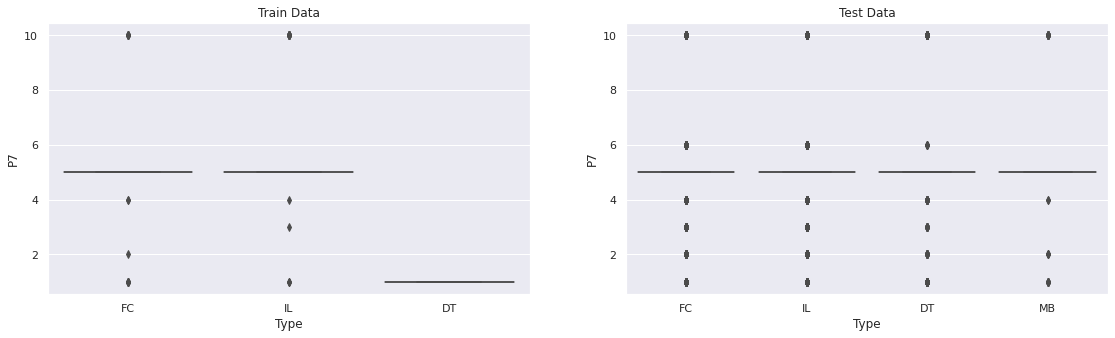

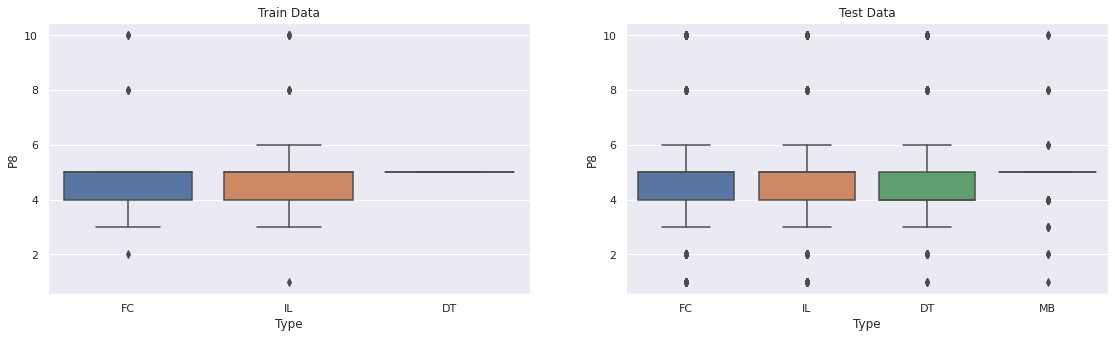

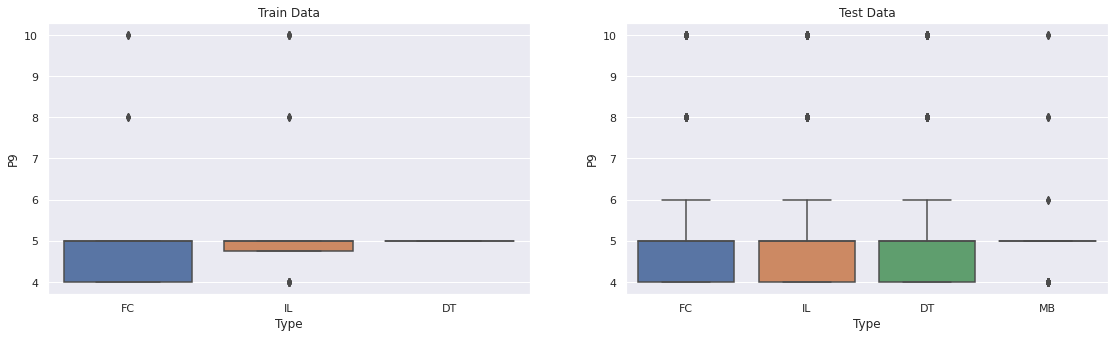

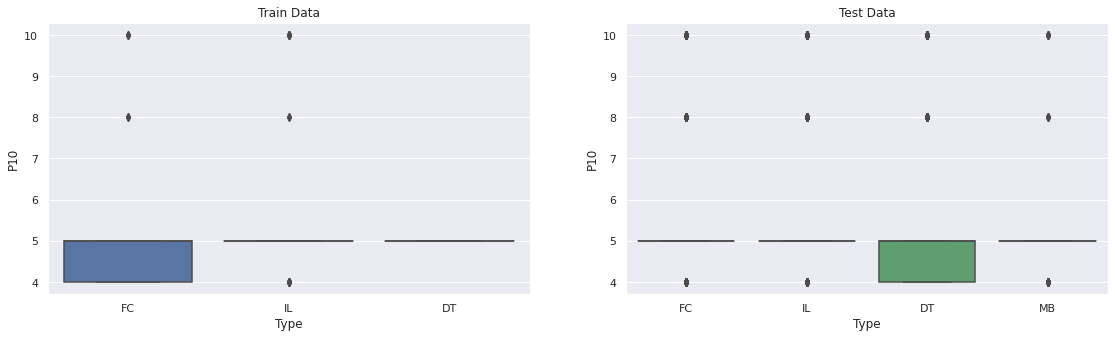

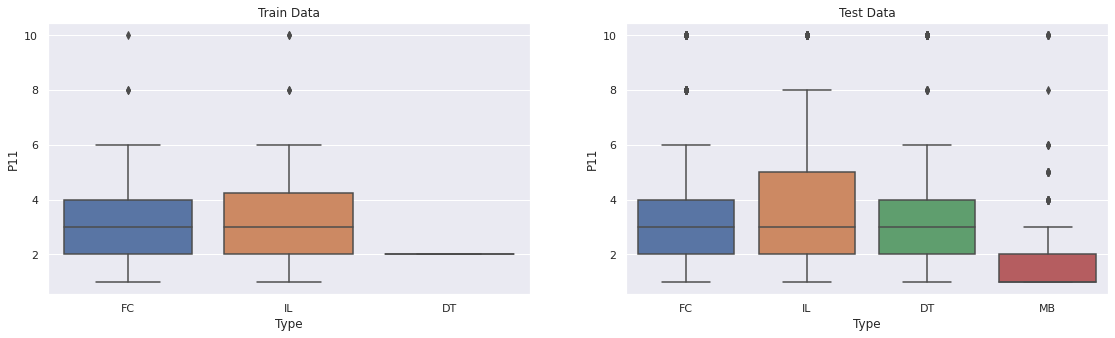

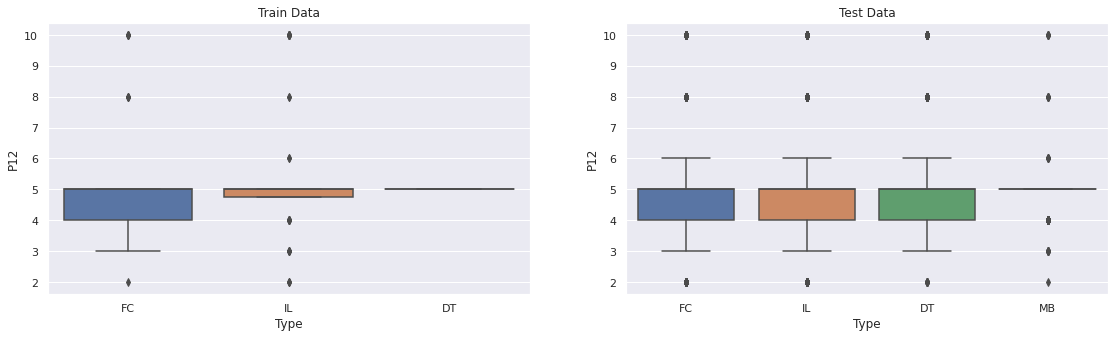

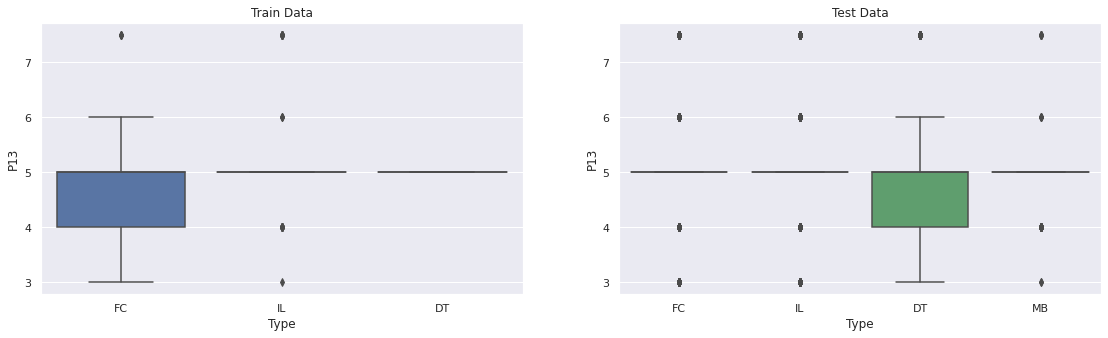

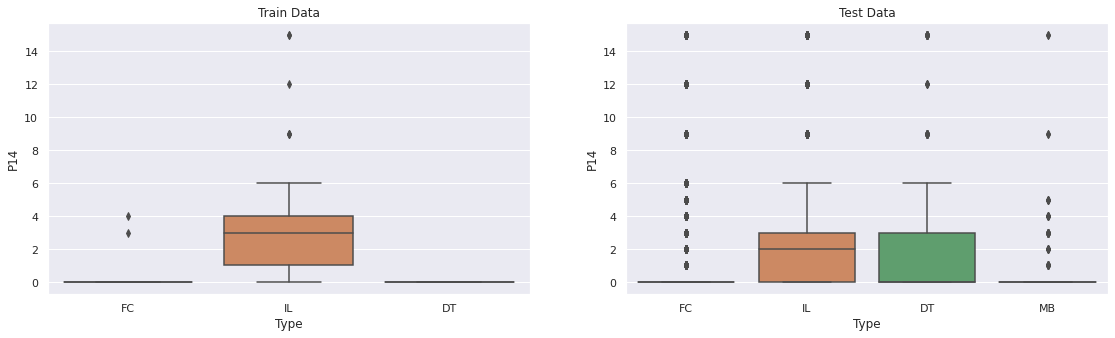

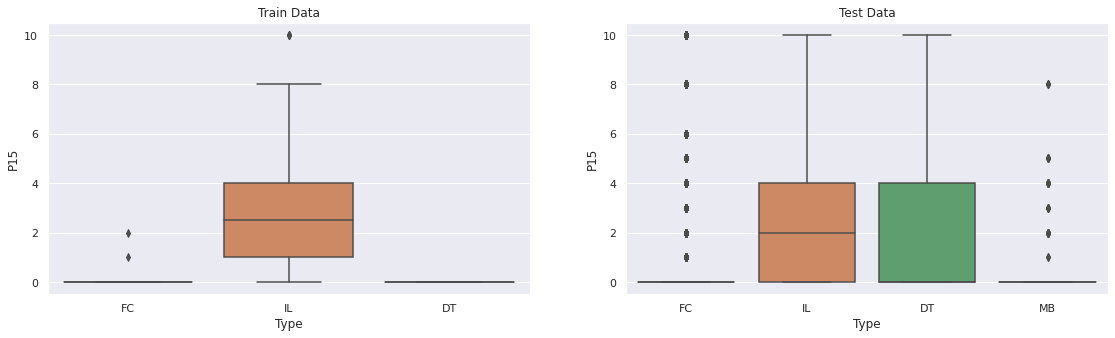

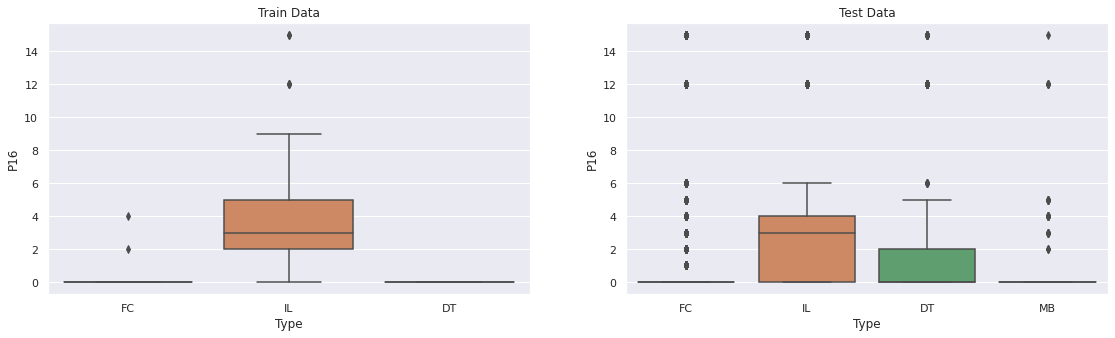

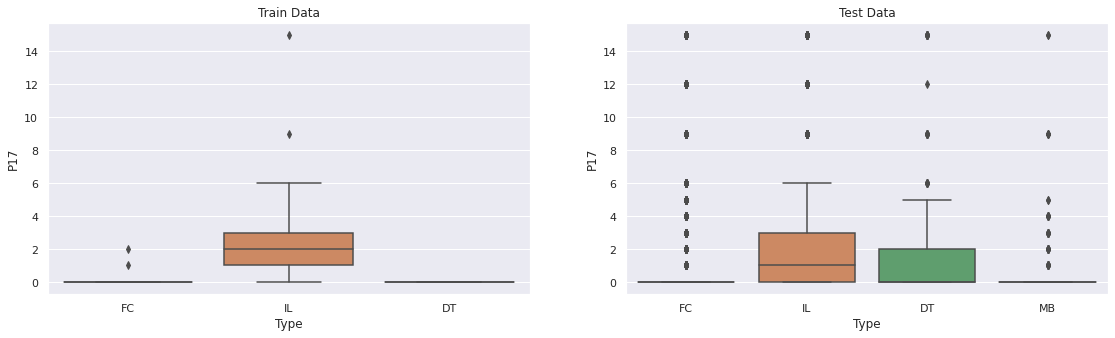

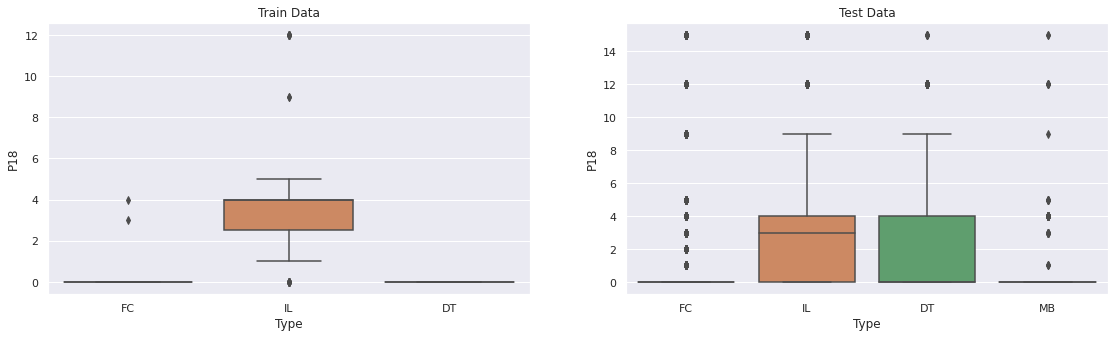

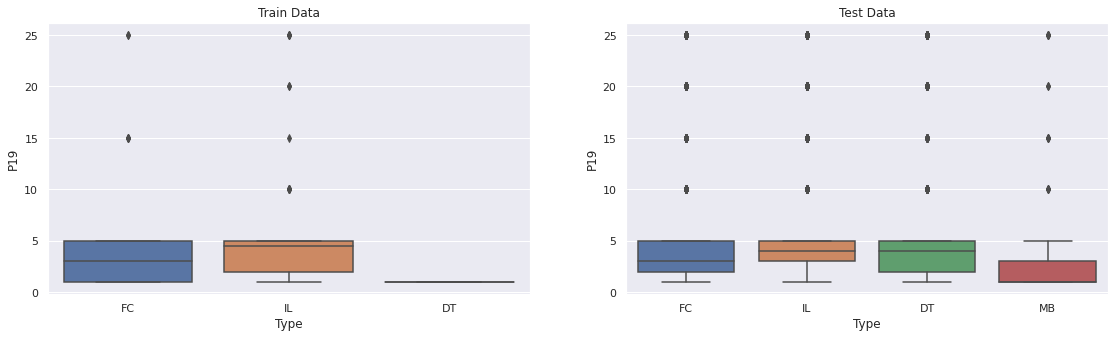

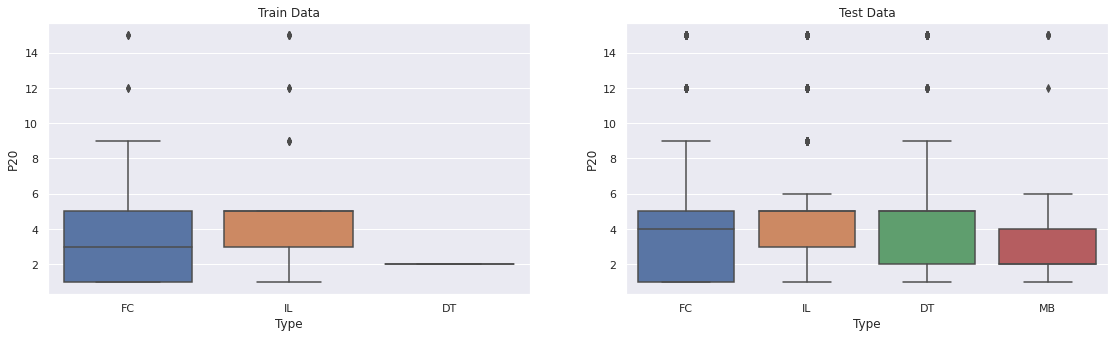

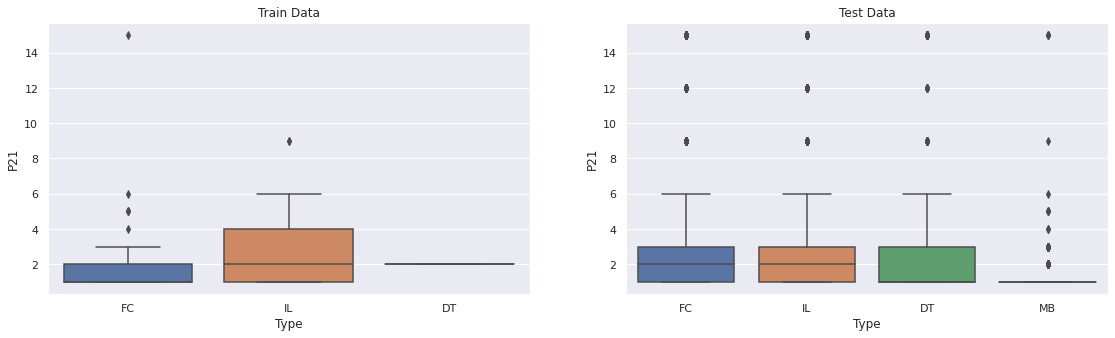

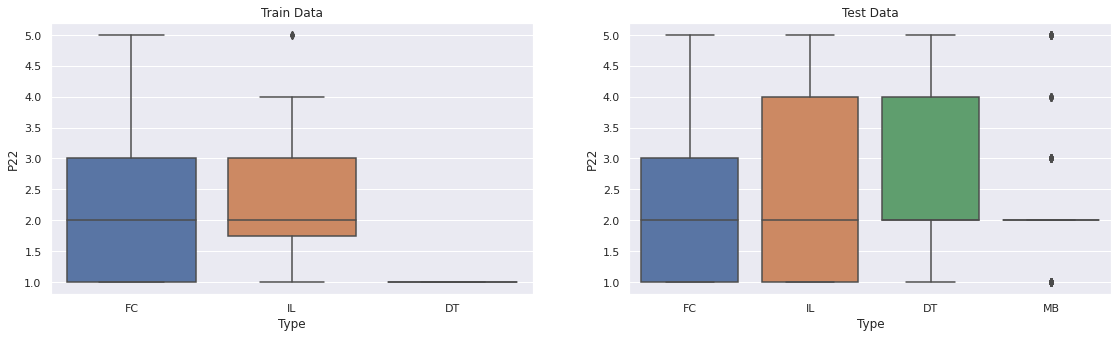

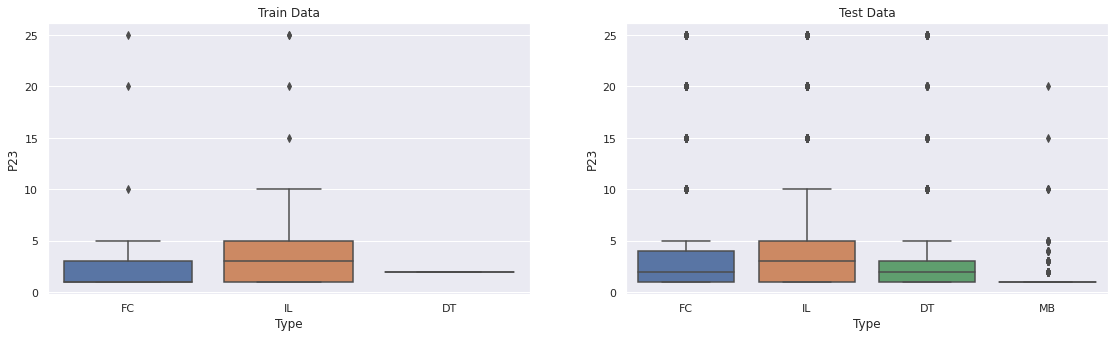

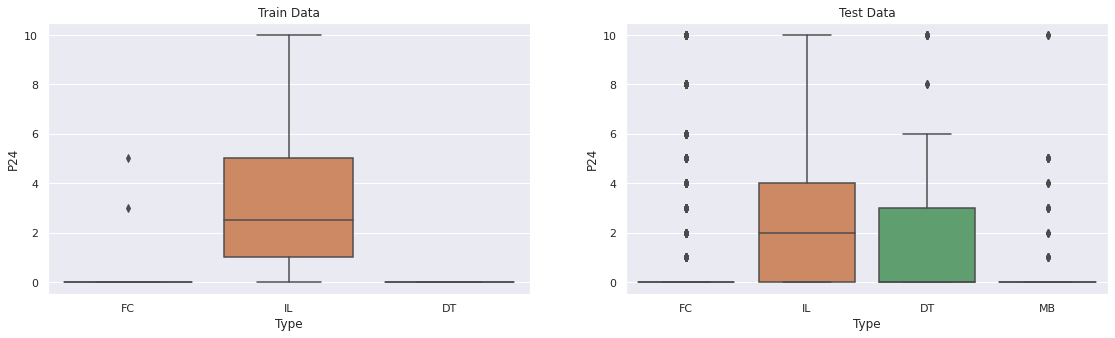

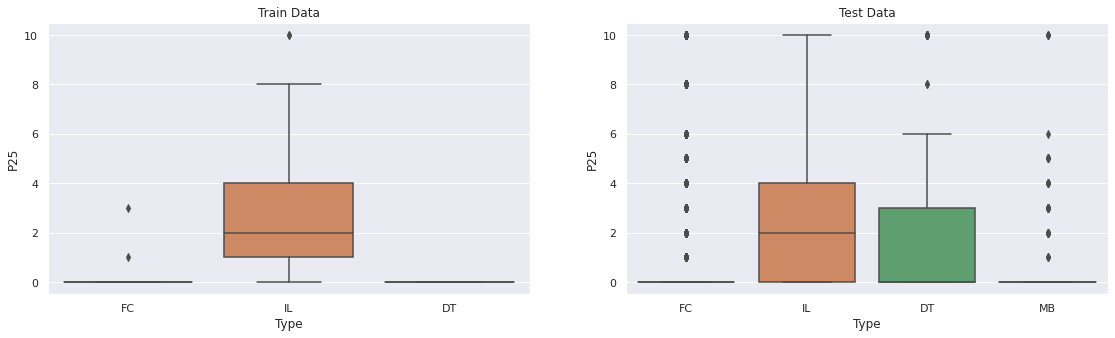

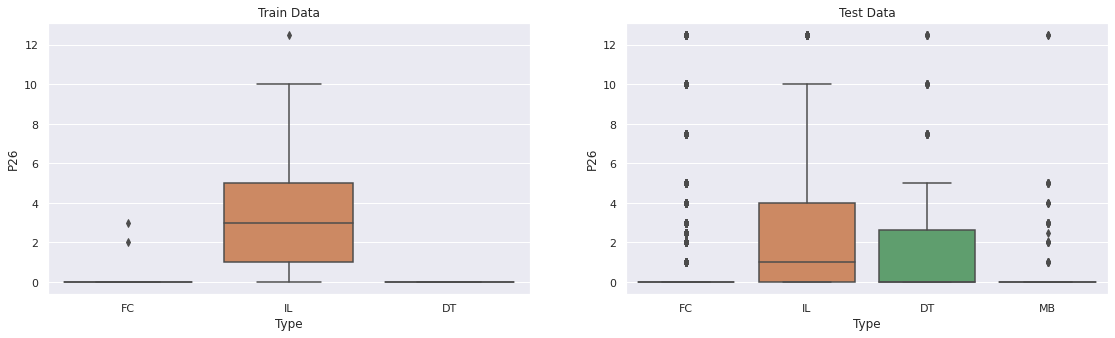

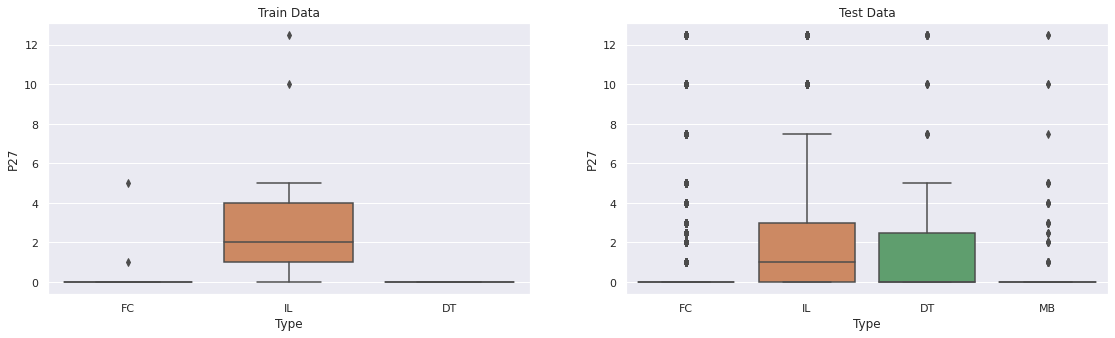

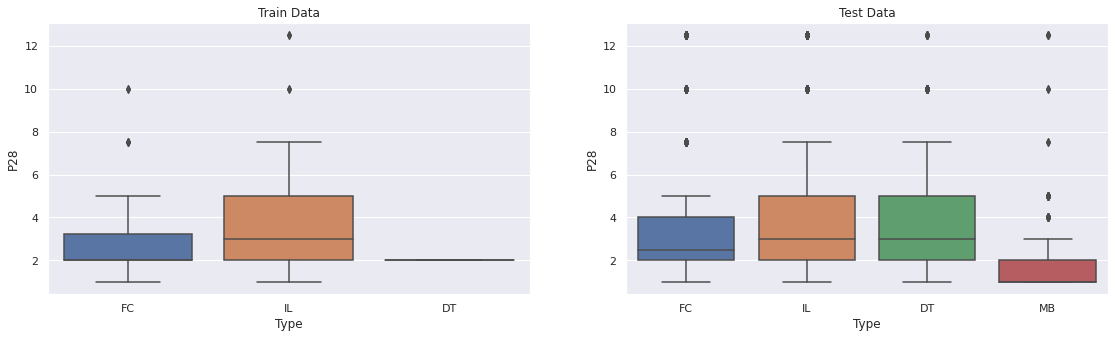

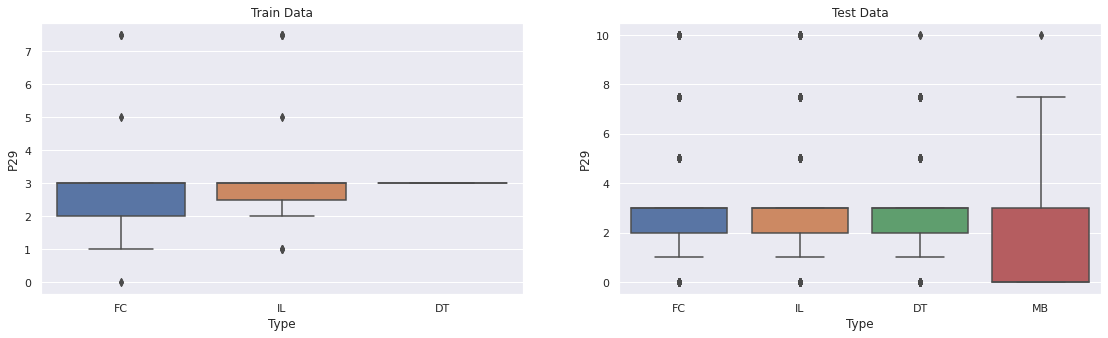

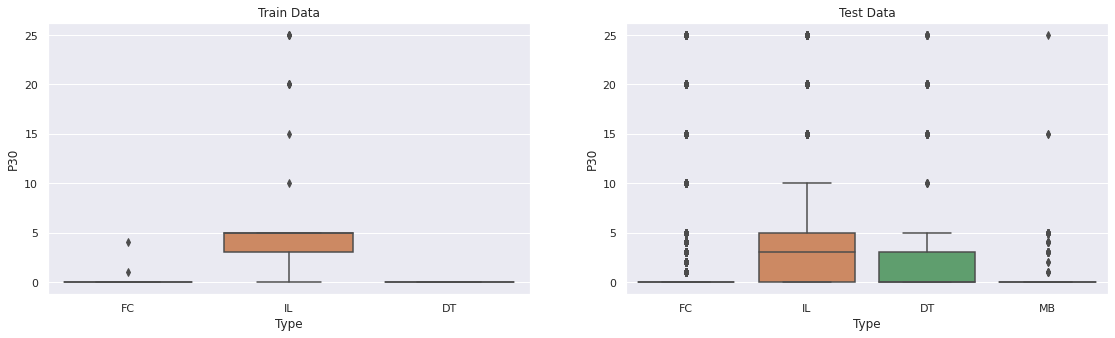

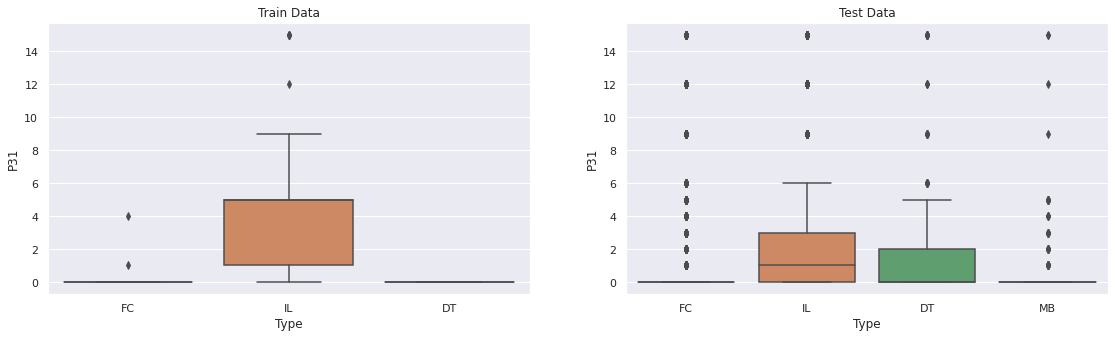

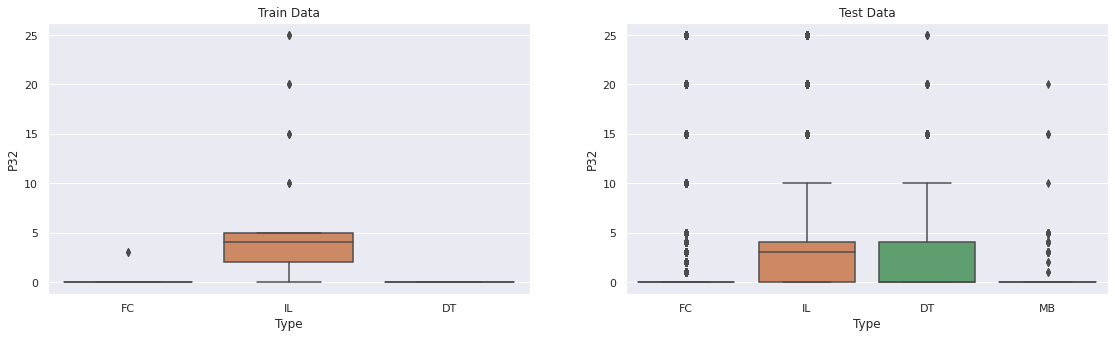

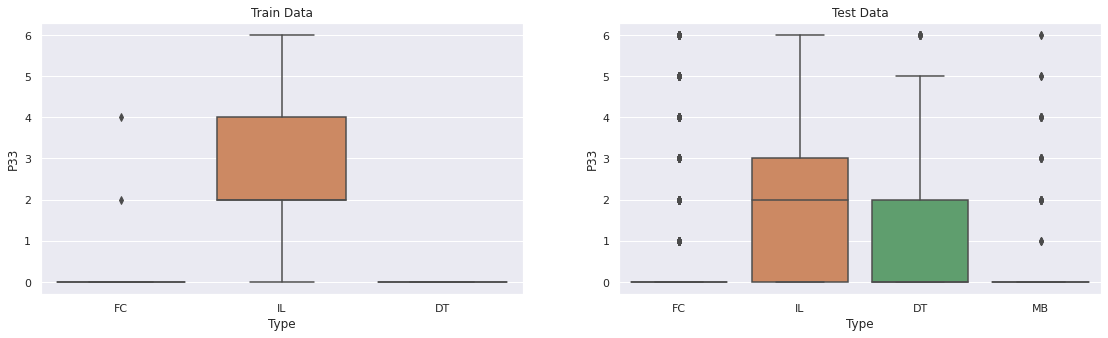

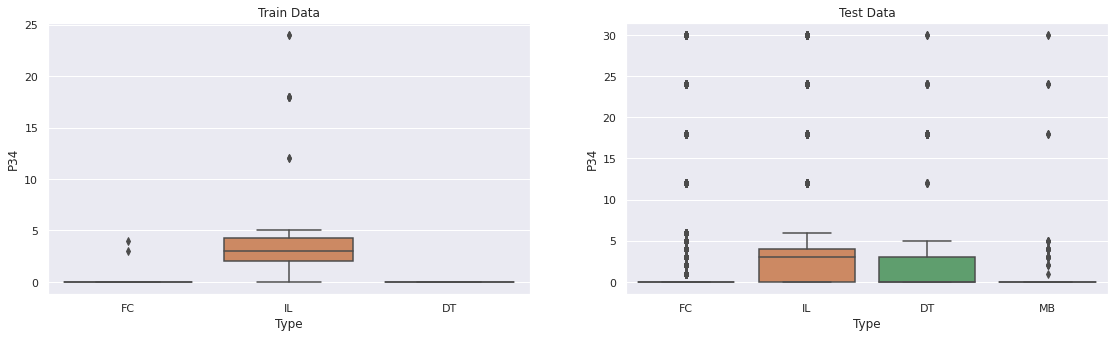

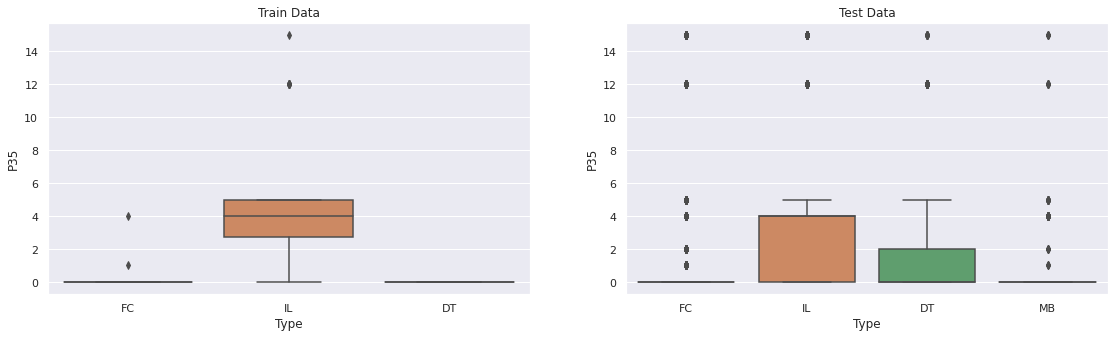

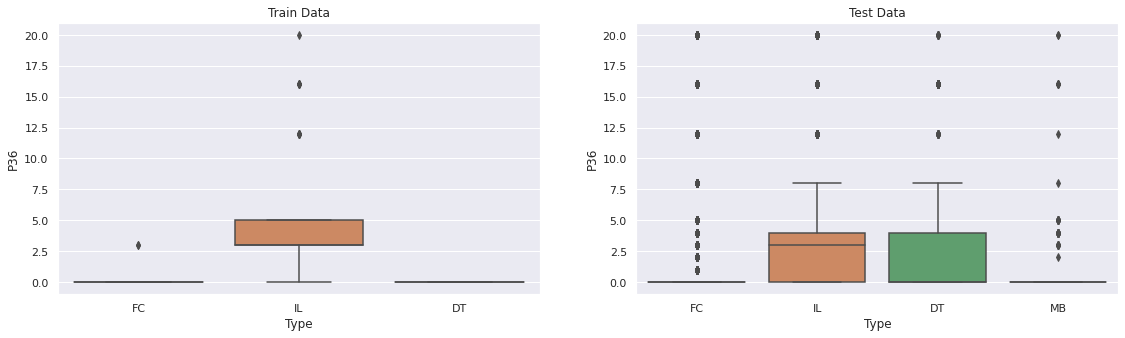

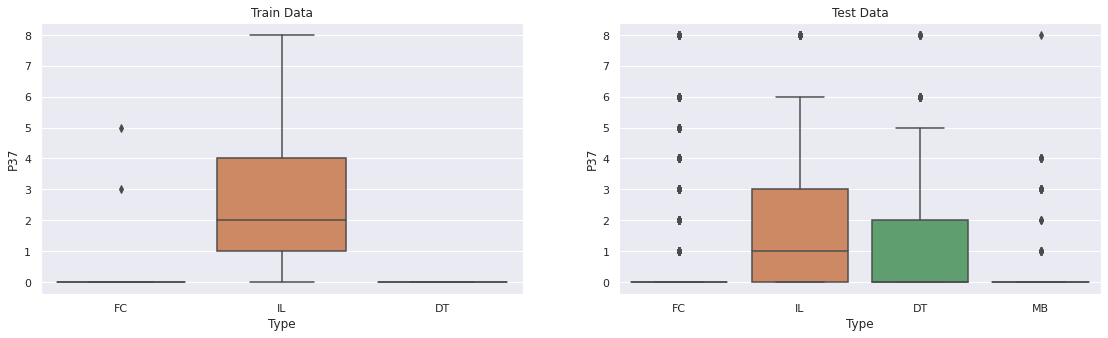

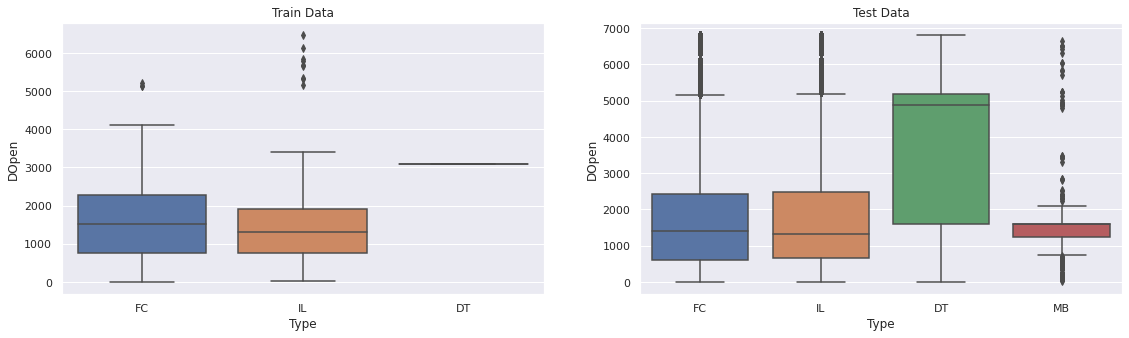

In [ ]:
torder1 = ['FC','IL','DT']
torder2 = ['FC','IL','DT','MB']
for i in cols_num:
    fig, ax = plt.subplots(1,2, figsize=(19, 5))
    g1 = sns.boxplot(data = df_train, x = "Type", y = i, order = torder1, showfliers = True, ax = ax[0]).set(title = 'Train Data')
    g2 = sns.boxplot(data = df_test, x = "Type", y = i, order = torder2, showfliers = True, ax = ax[1]).set(title = 'Test Data')
    plt.show()

There appears to be a high number of zeros

In [ ]:
print("The percentage of zero in the test dataframe\n",(df_test[cols_num] == 0).sum()*100/df_test.shape[0] )

The percentage of zero in the test dataframe
 P1        0.000
P2        0.000
P3        0.318
P4        0.000
P5        0.000
P6        0.000
P7        0.000
P8        0.000
P9        0.000
P10       0.000
P11       0.000
P12       0.000
P13       0.000
P14      65.734
P15      65.772
P16      66.094
P17      65.792
P18      65.980
P19       0.000
P20       0.000
P21       0.000
P22       0.000
P23       0.000
P24      65.766
P25      65.738
P26      65.784
P27      66.193
P28       0.000
P29       3.083
P30      65.596
P31      65.566
P32      65.787
P33      65.791
P34      65.832
P35      65.776
P36      65.662
P37      66.029
DOpen     0.334
dtype: float64


2/3 of P14-P18, P24-P27 and P30-37 are zeros

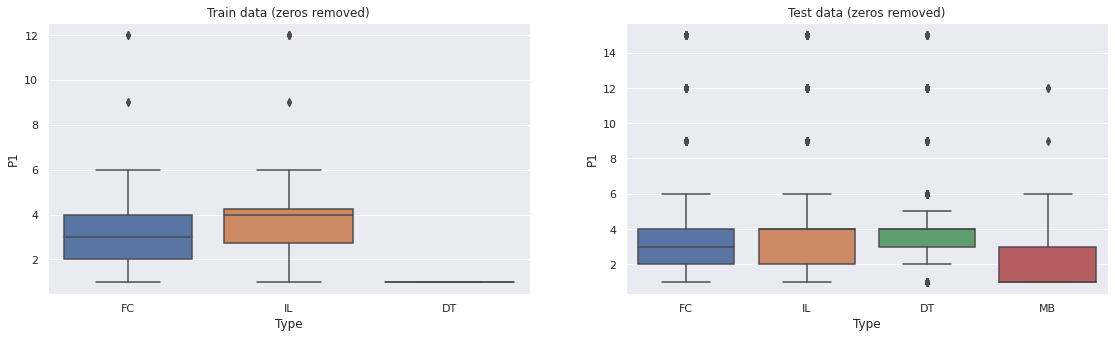

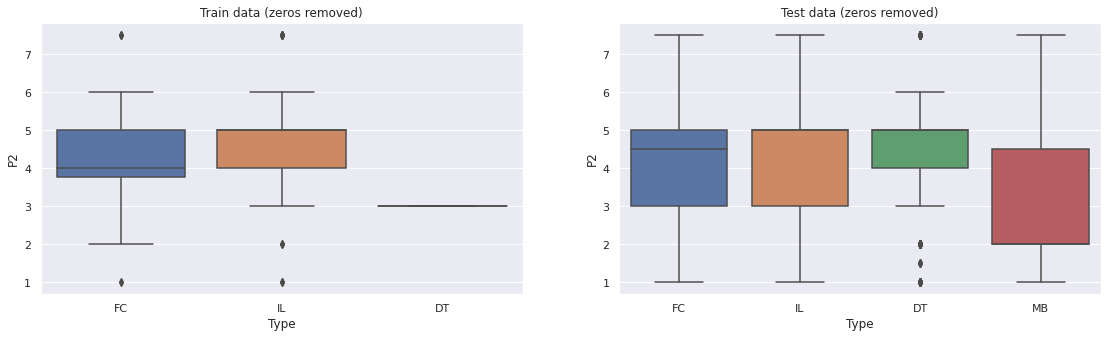

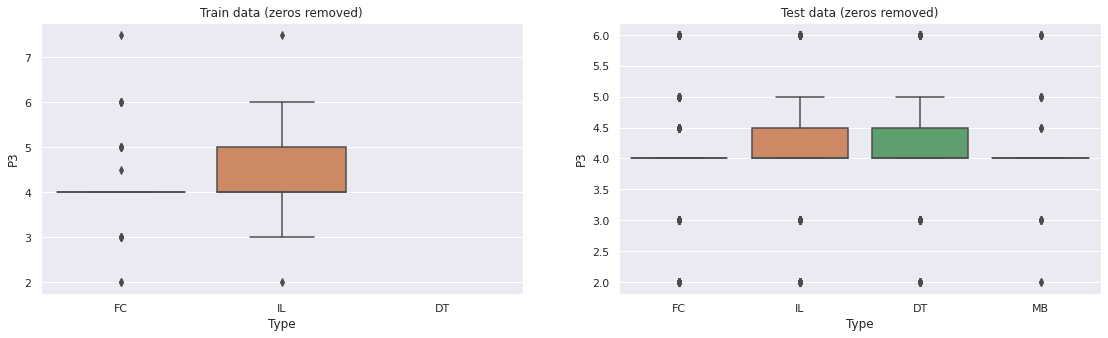

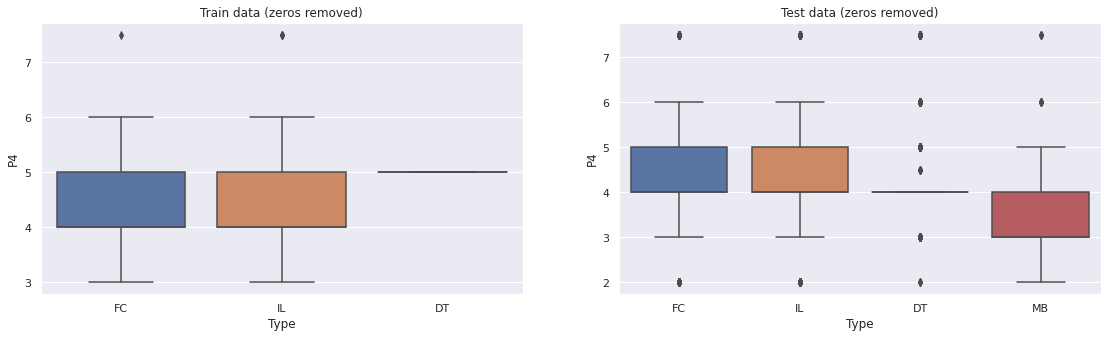

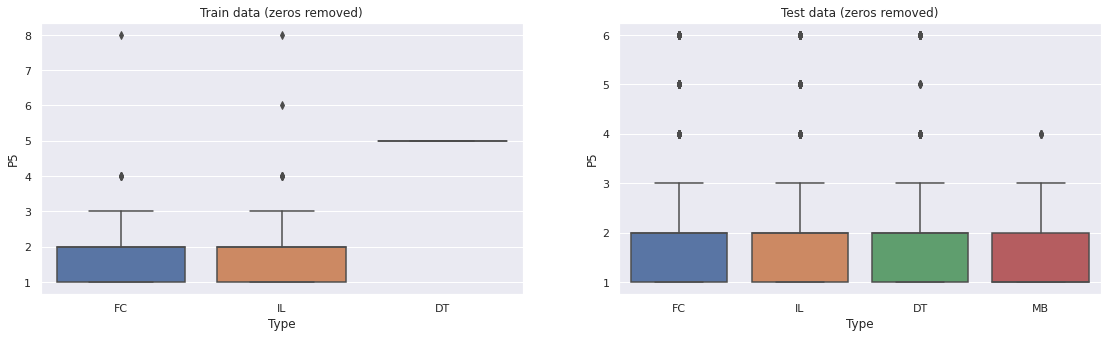

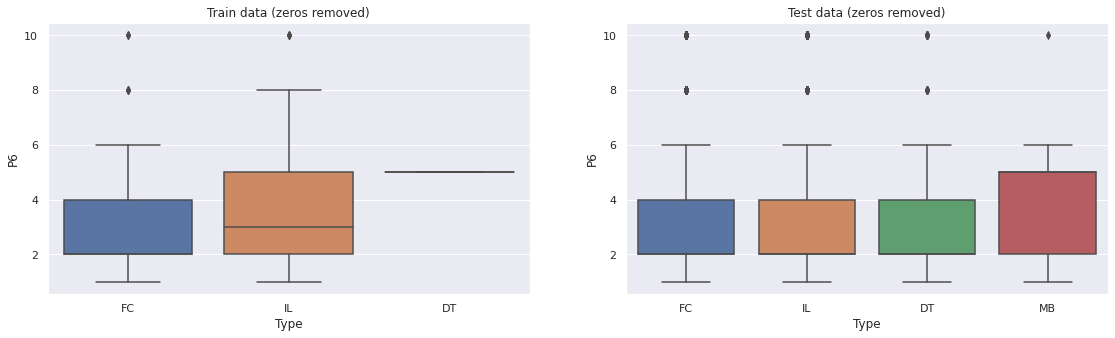

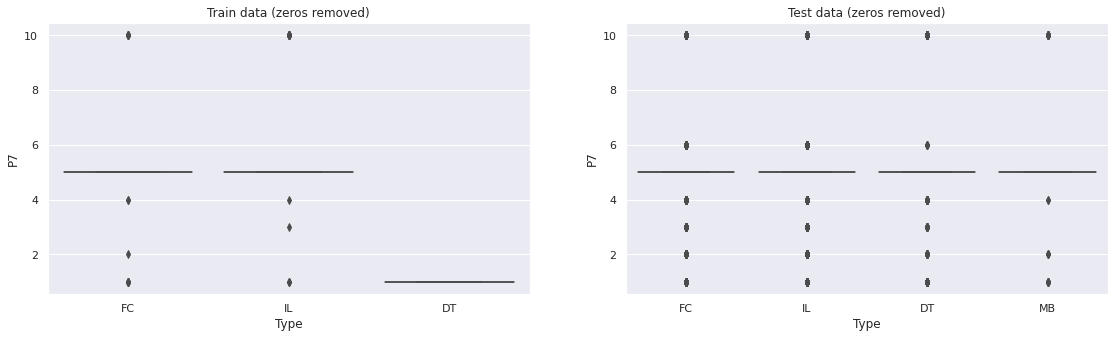

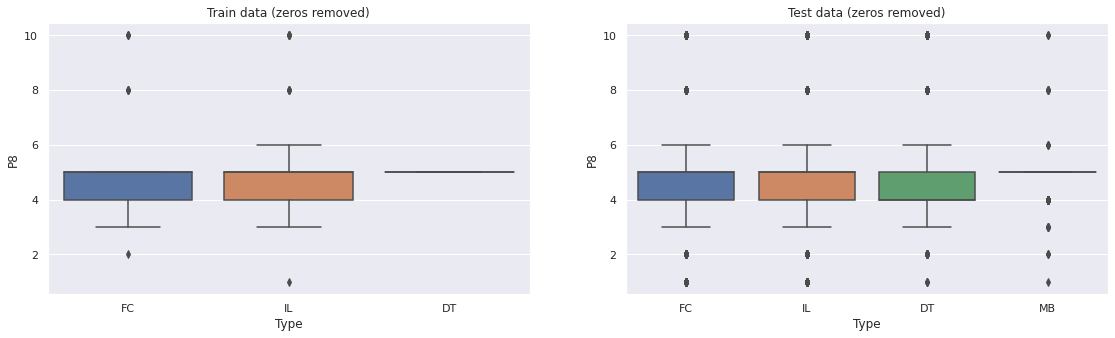

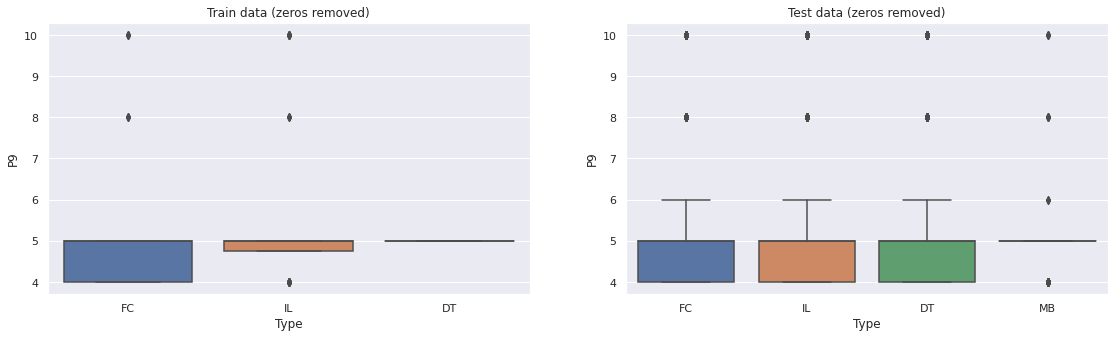

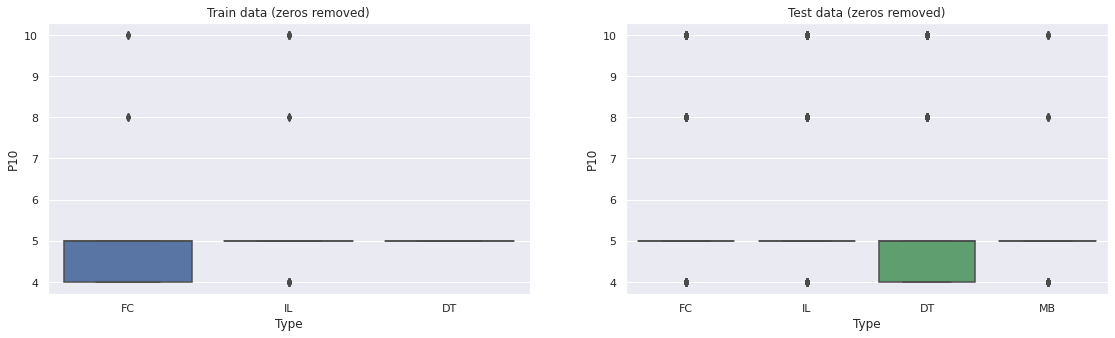

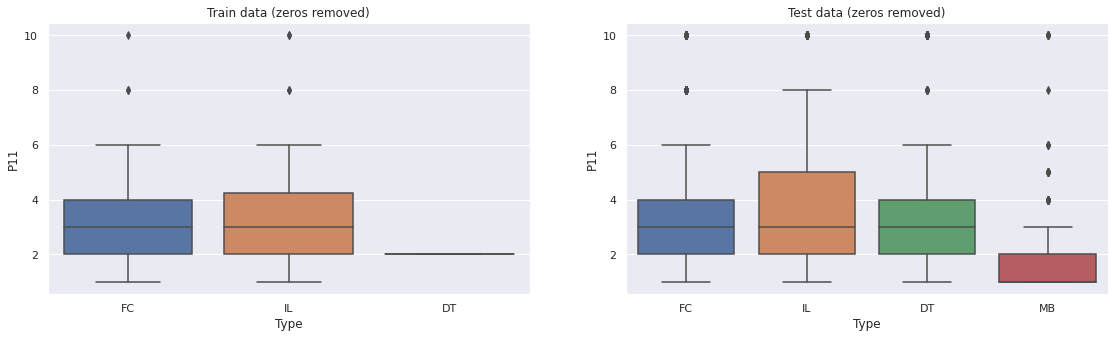

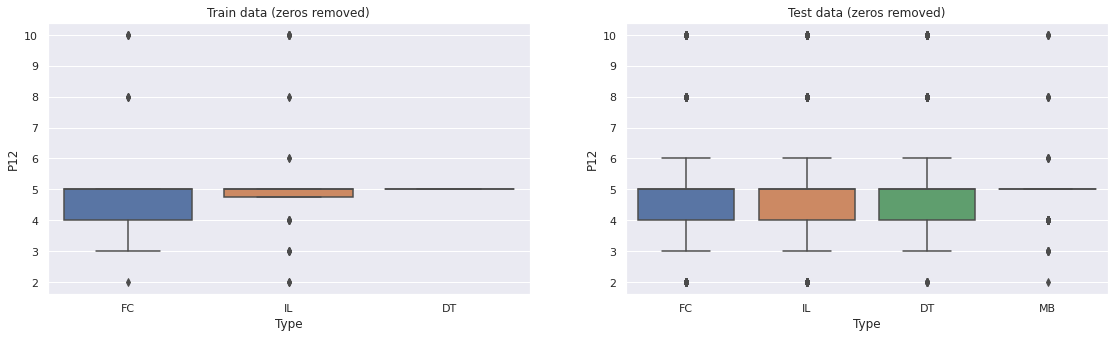

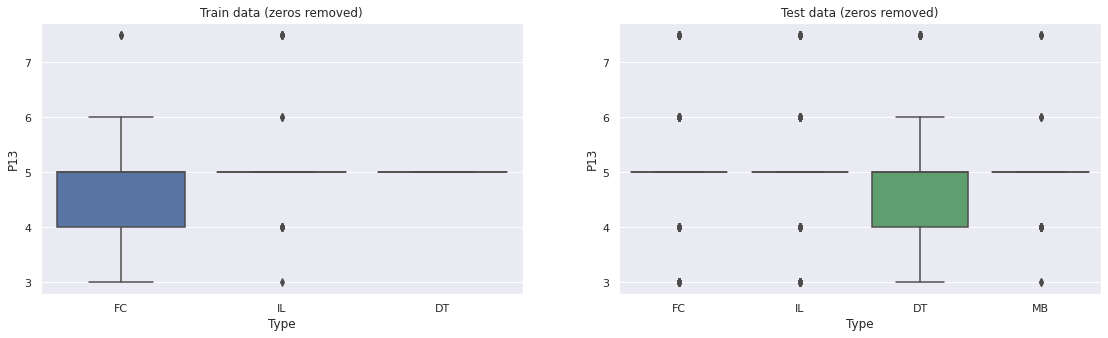

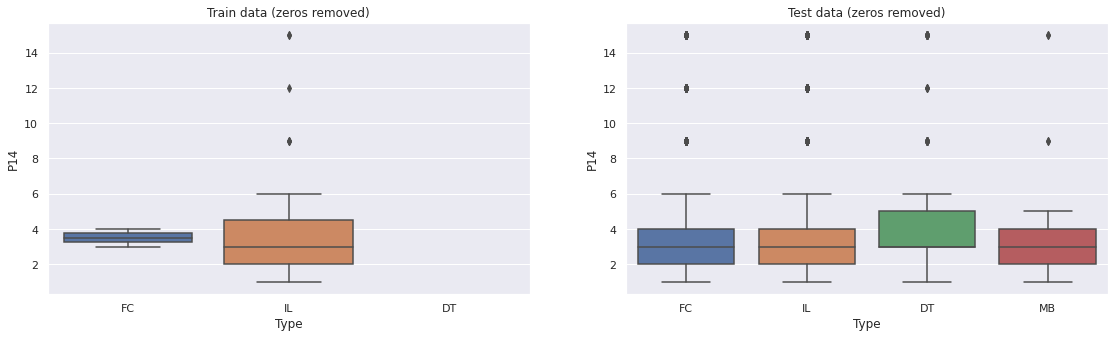

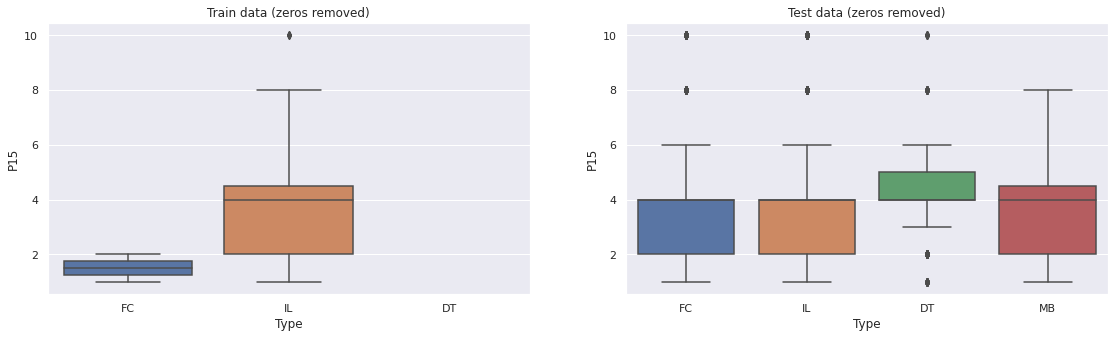

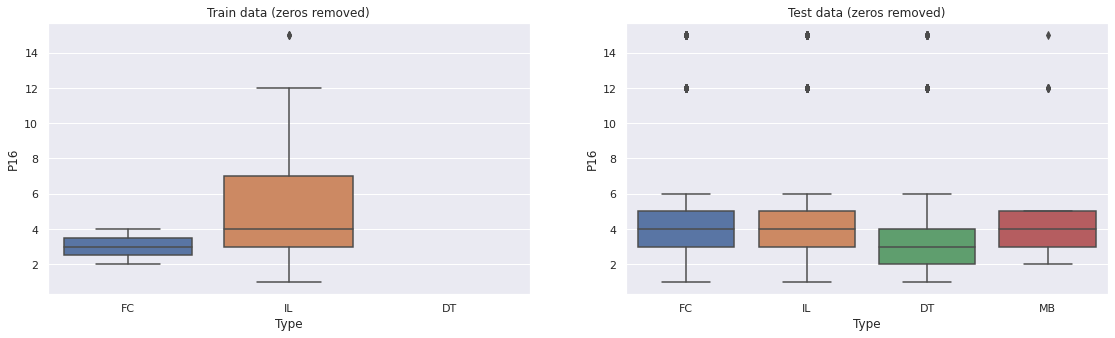

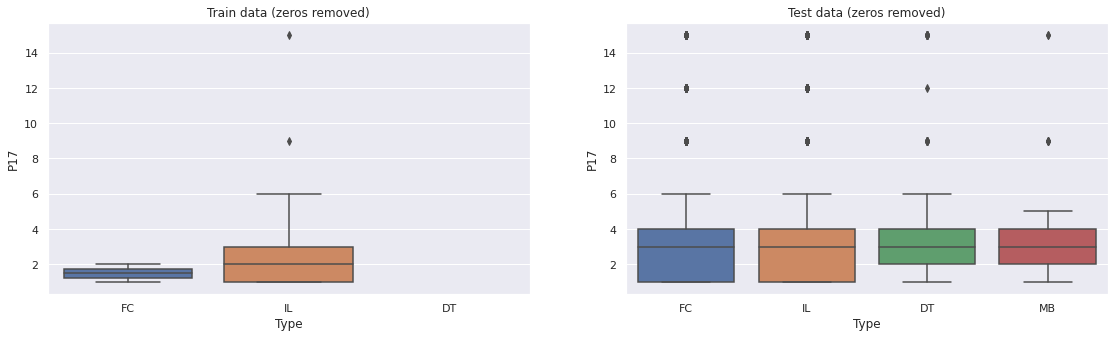

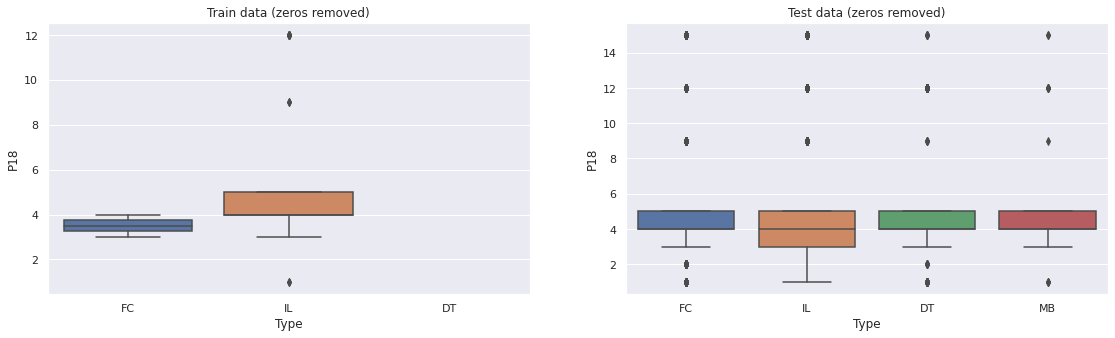

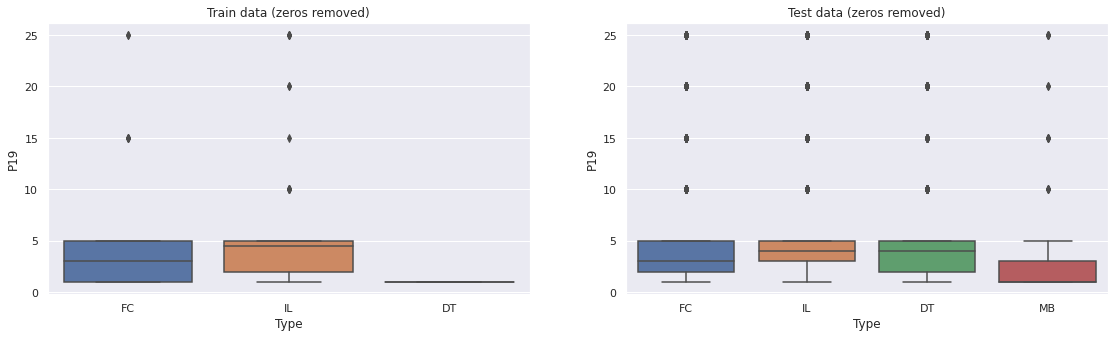

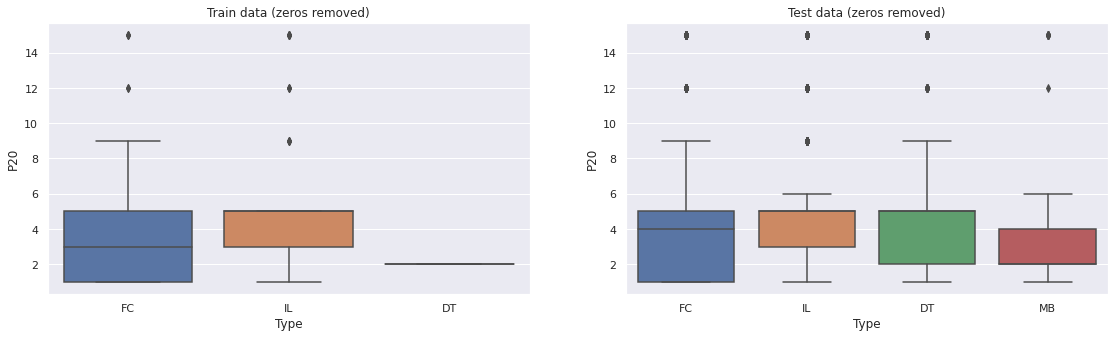

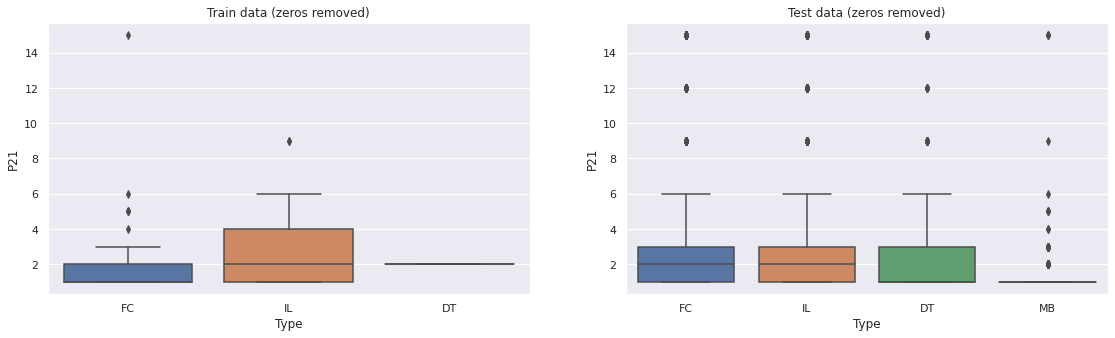

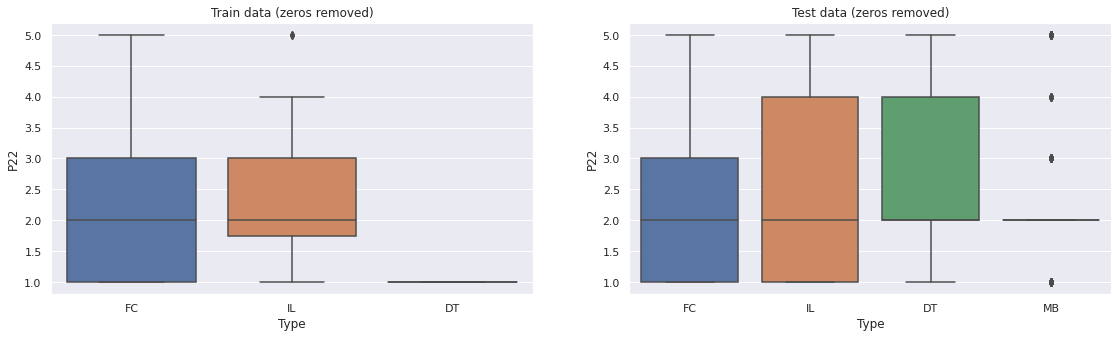

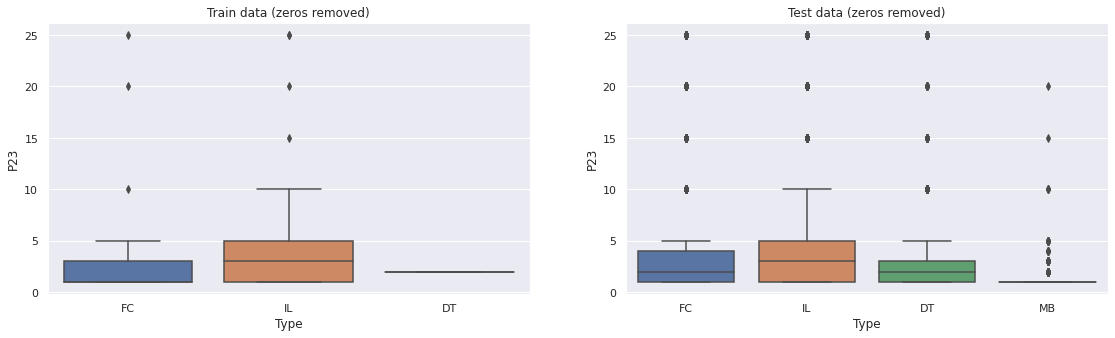

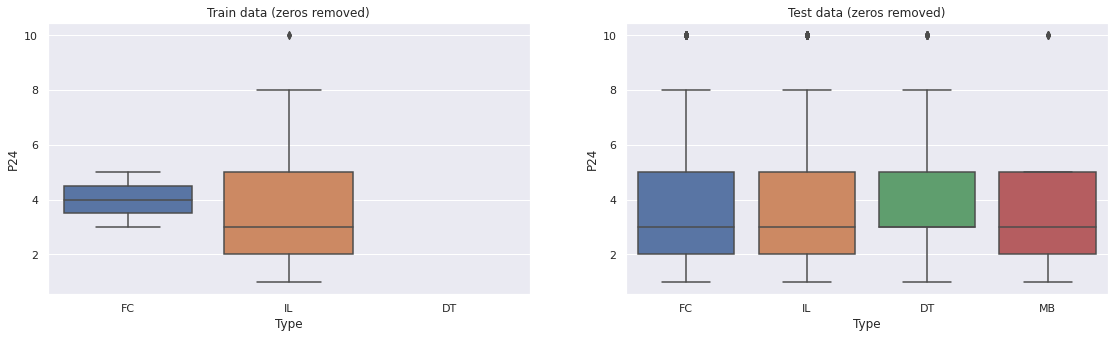

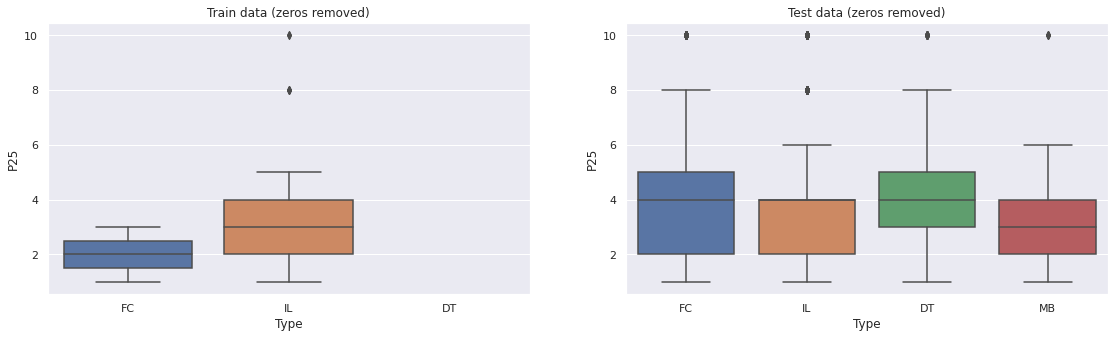

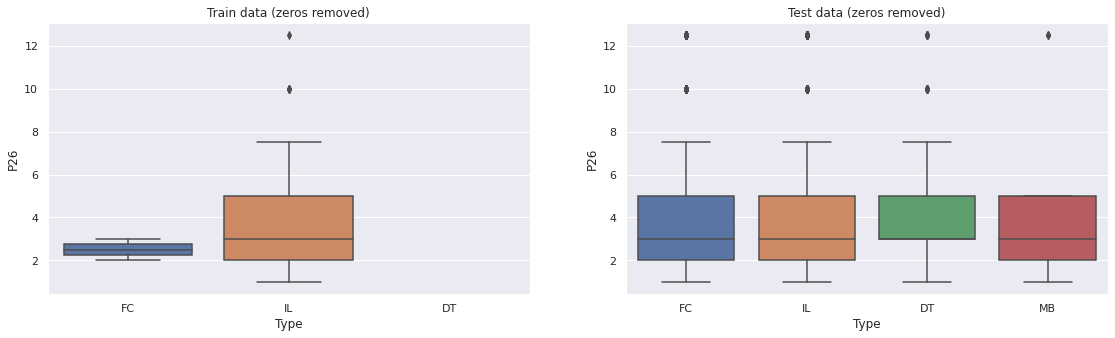

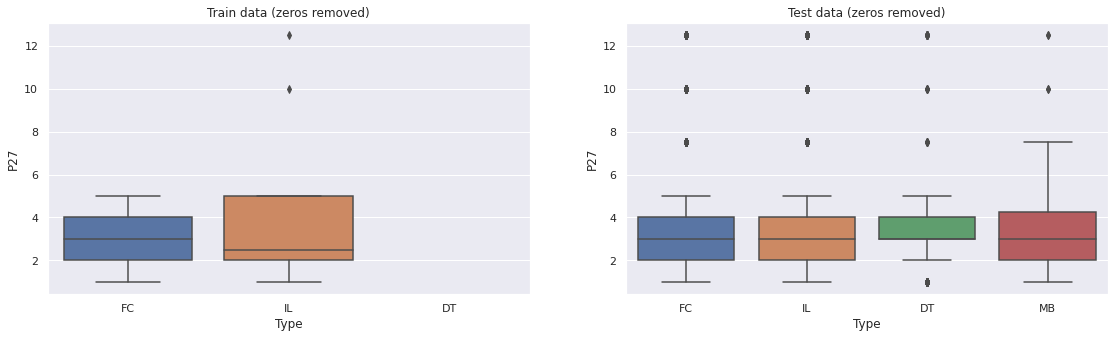

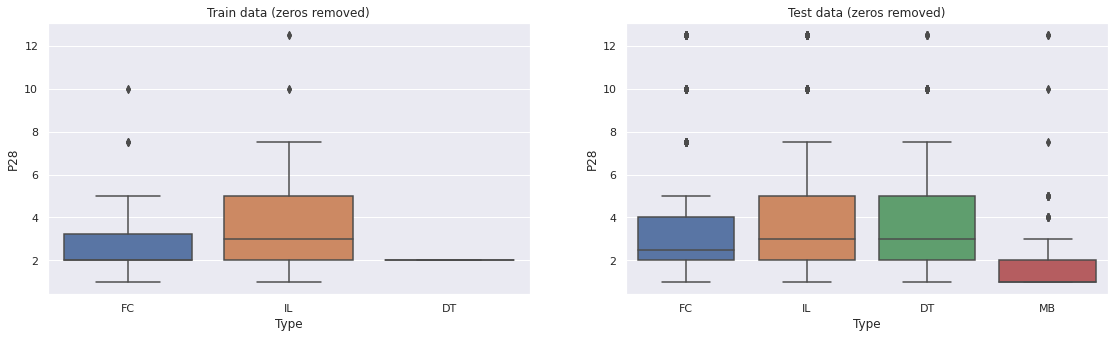

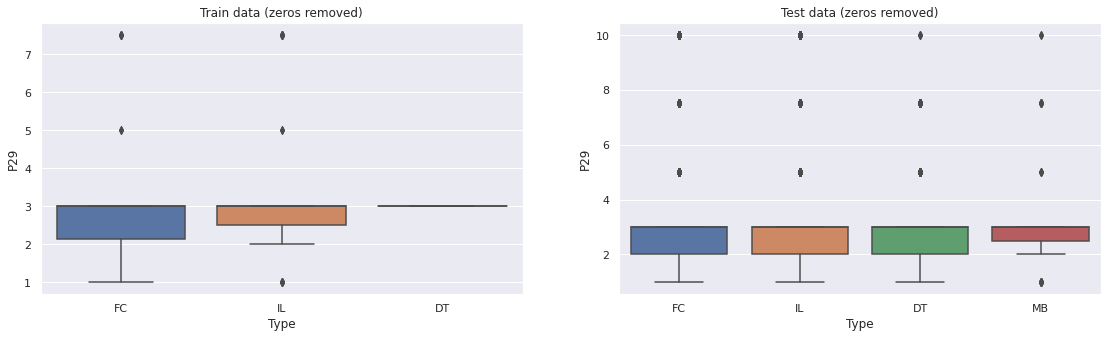

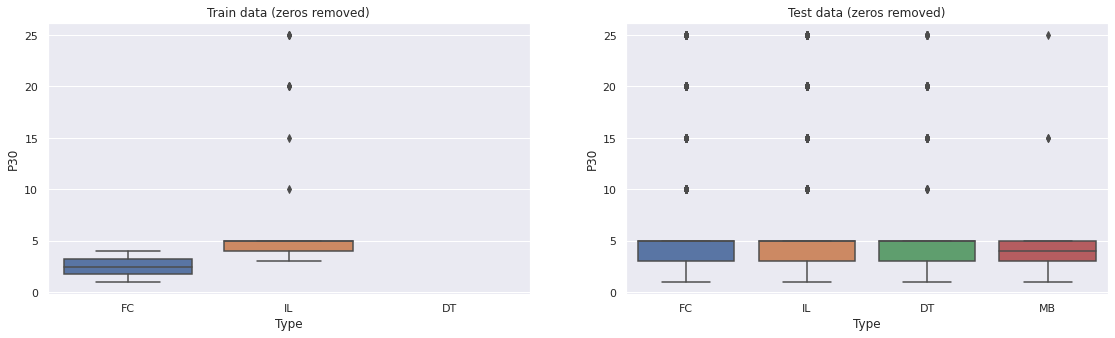

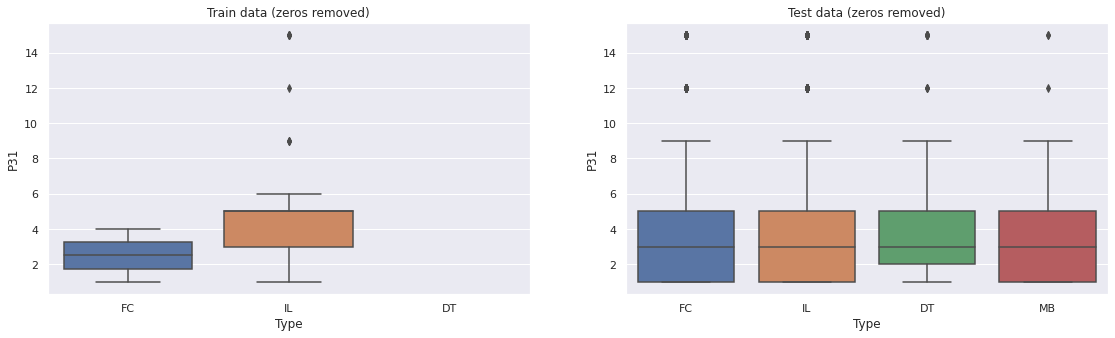

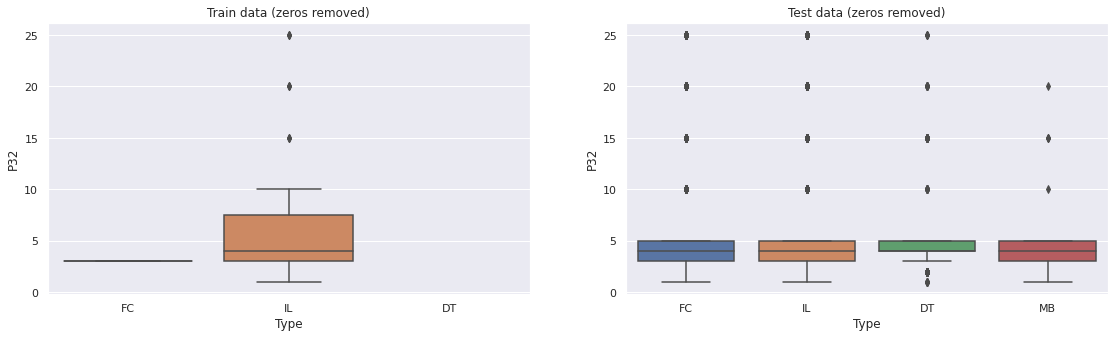

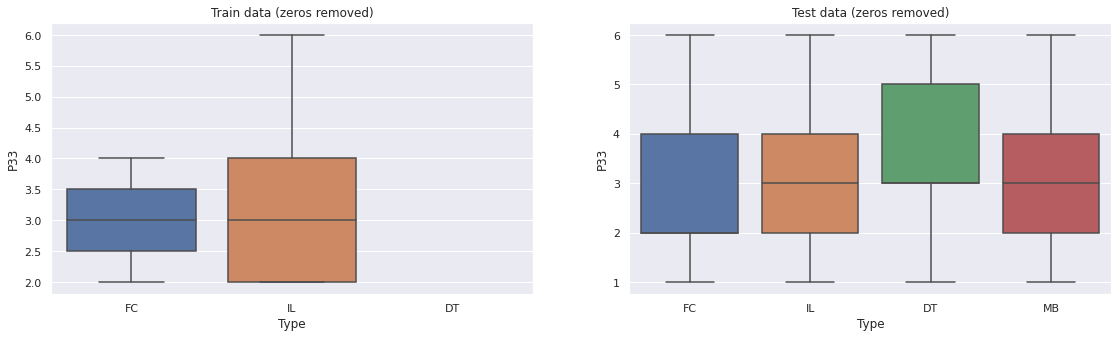

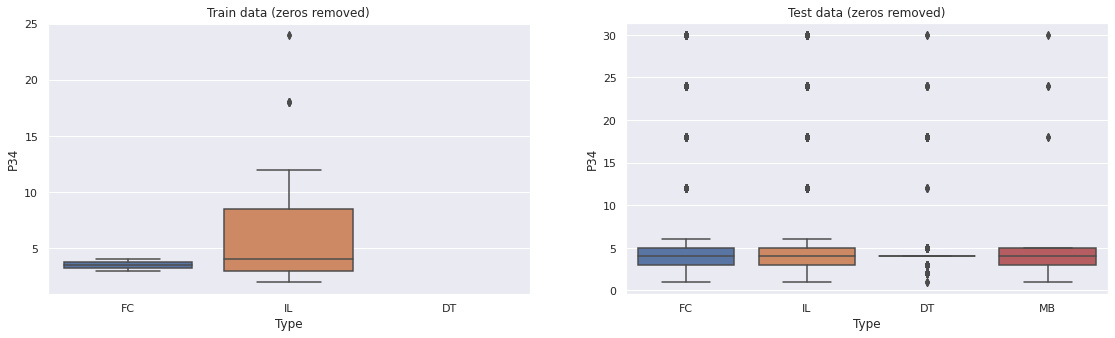

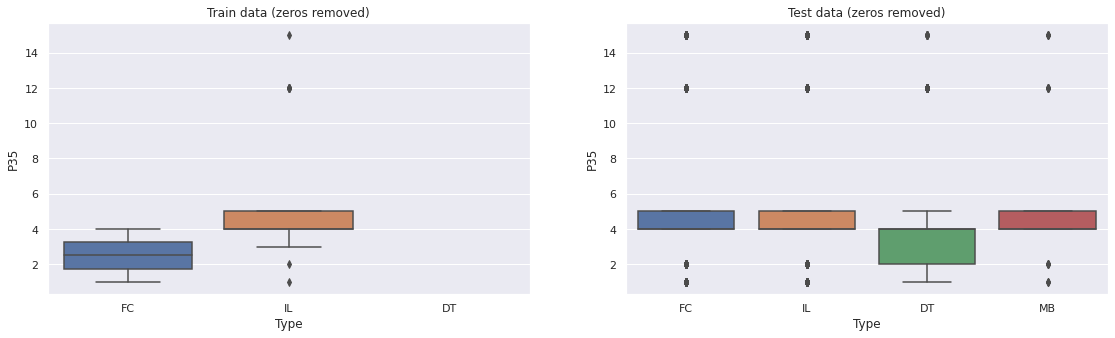

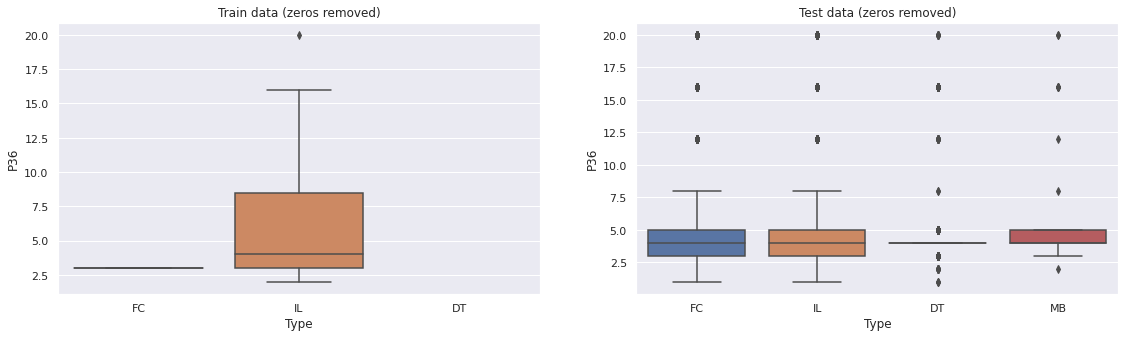

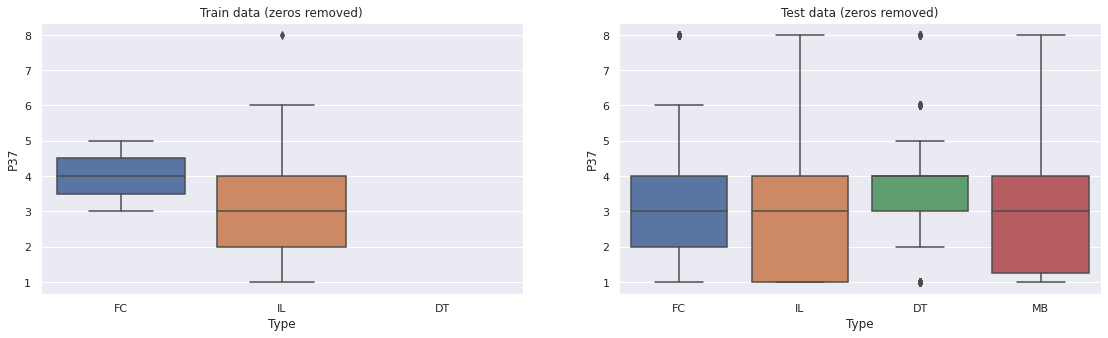

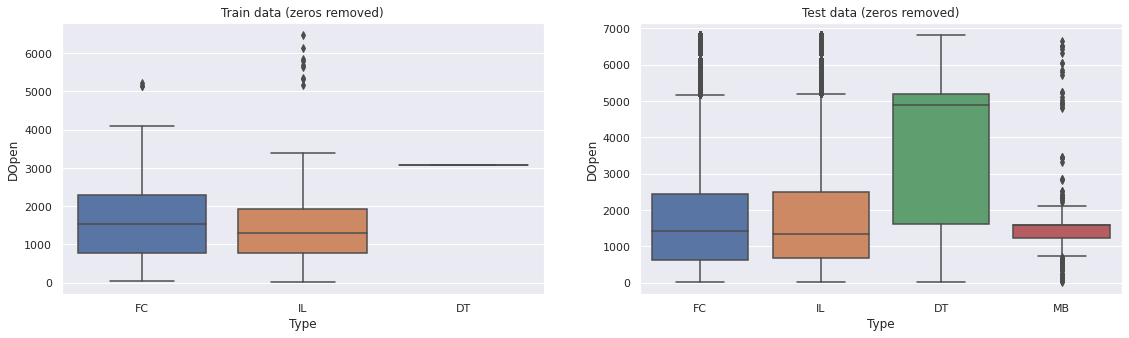

In [ ]:
for i in cols_num:
    fig, ax = plt.subplots(1,2, figsize=(19, 5))
    g1 = sns.boxplot(data = df_train[df_train[i] !=0], x = "Type", y = i, order = torder1, showfliers = True, ax = ax[0]).set(title = 'Train data (zeros removed)')
    g2 = sns.boxplot(data = df_test[df_test[i] !=0], x = "Type", y = i, order = torder2, showfliers = True, ax = ax[1]).set(title = 'Test data (zeros removed)')
    plt.show()

### Data distribution by city group

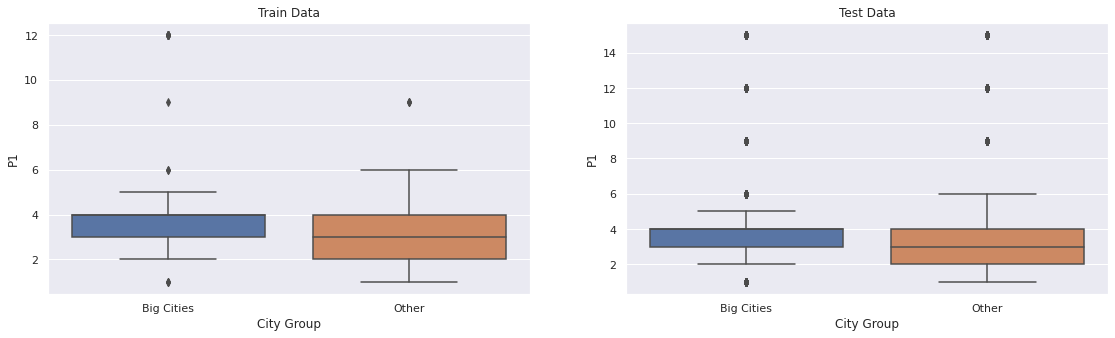

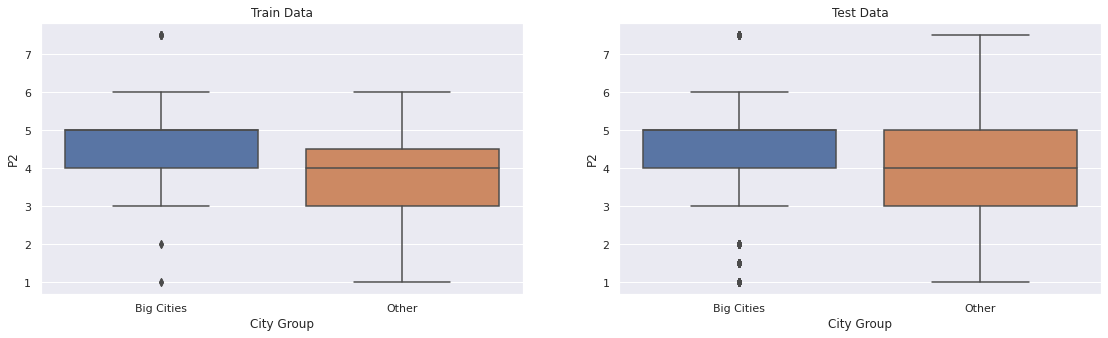

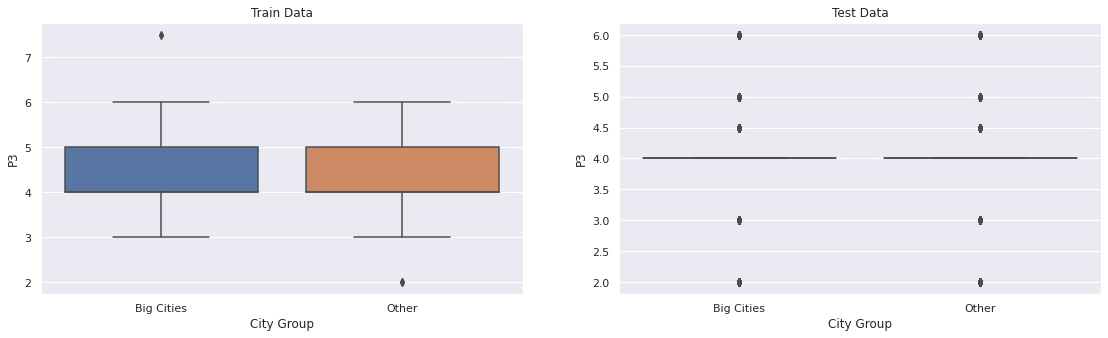

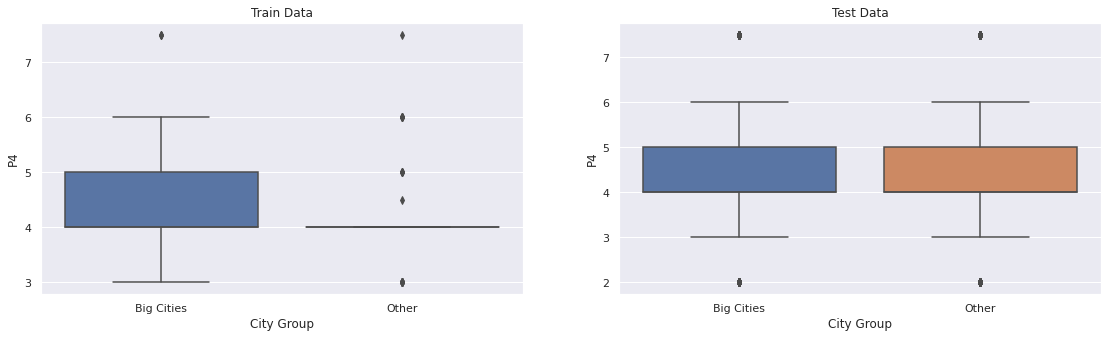

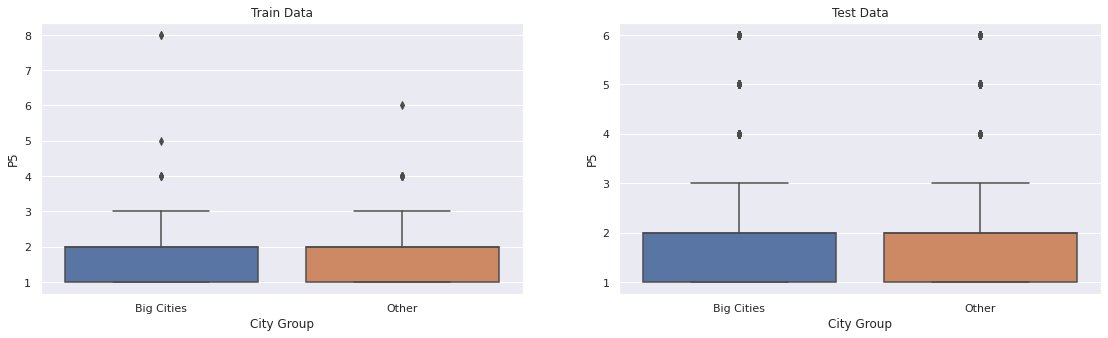

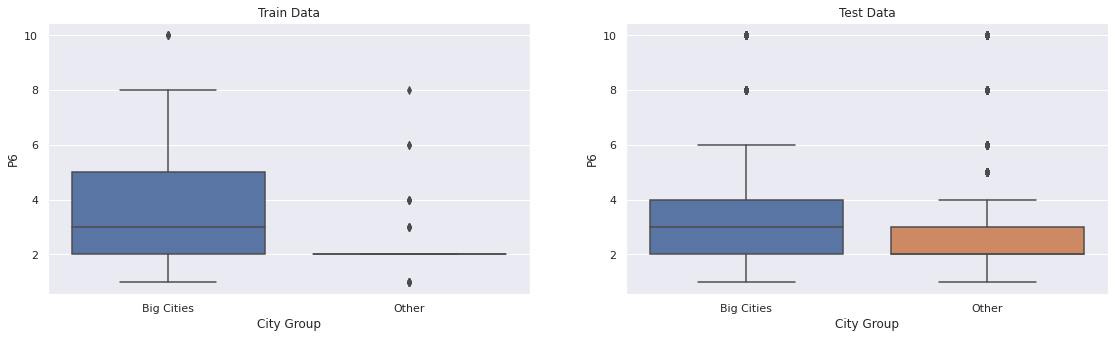

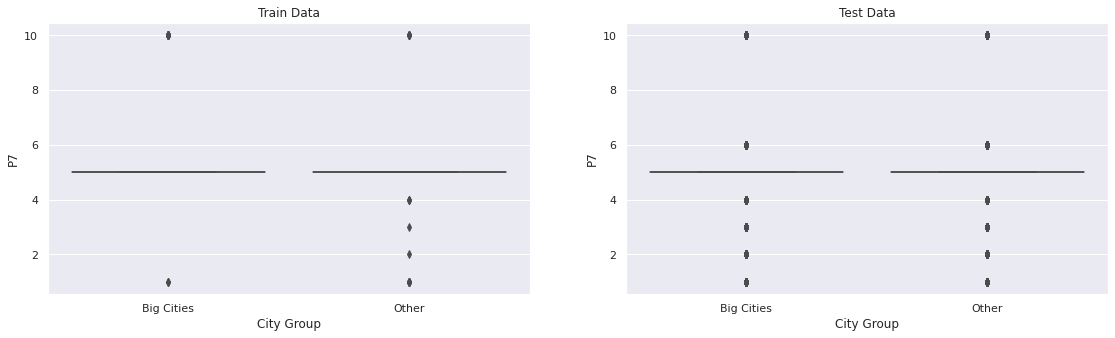

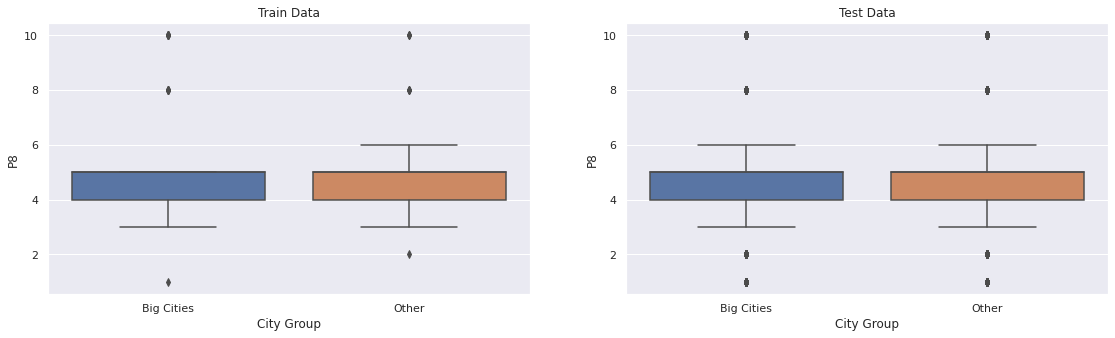

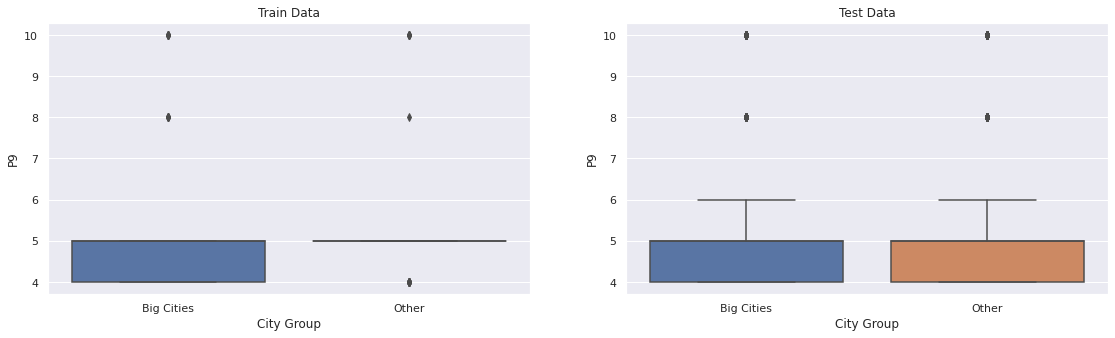

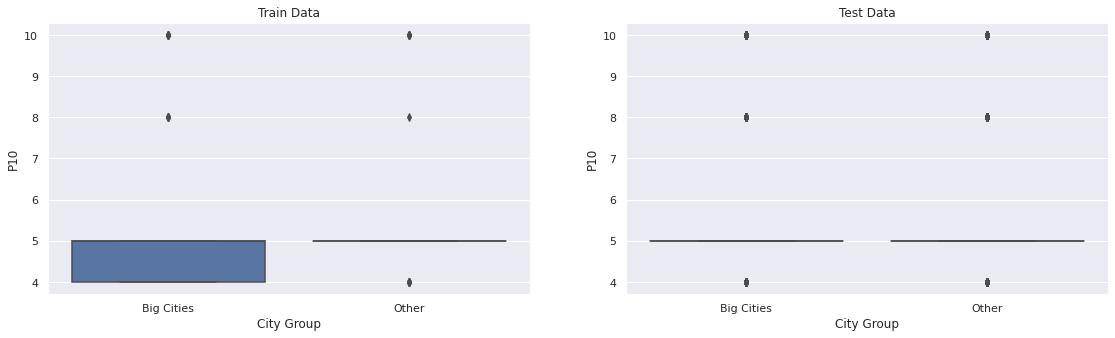

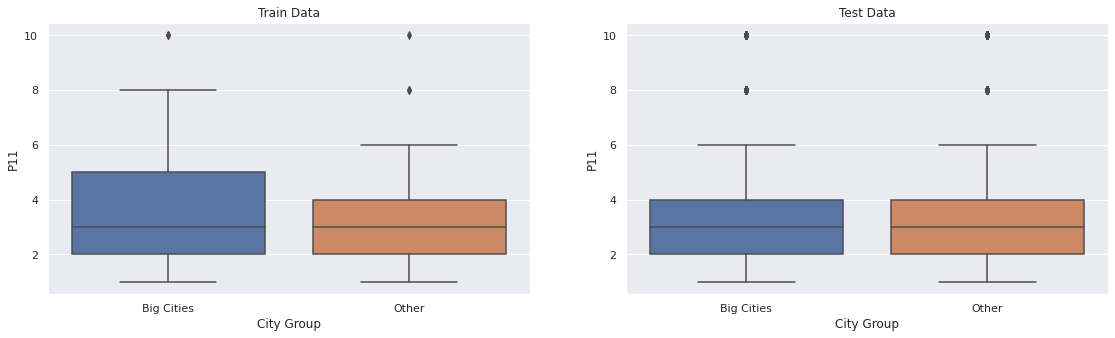

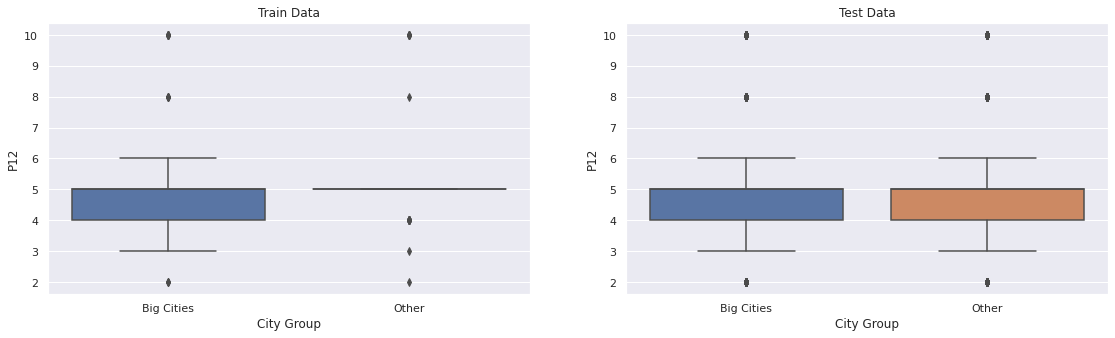

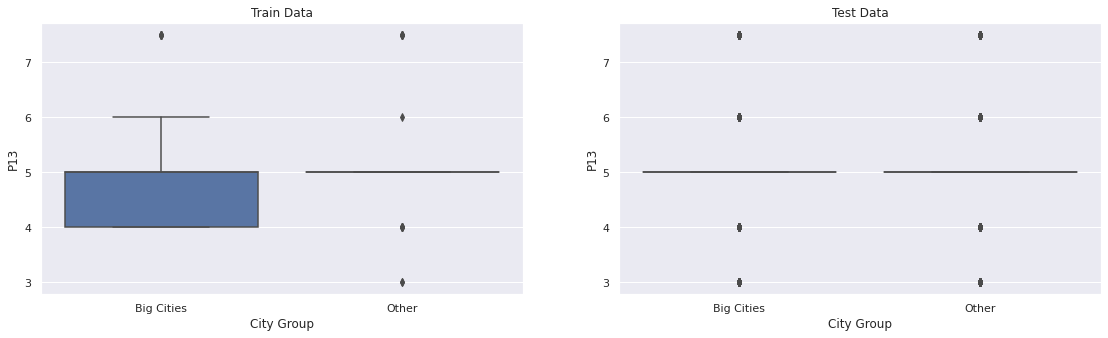

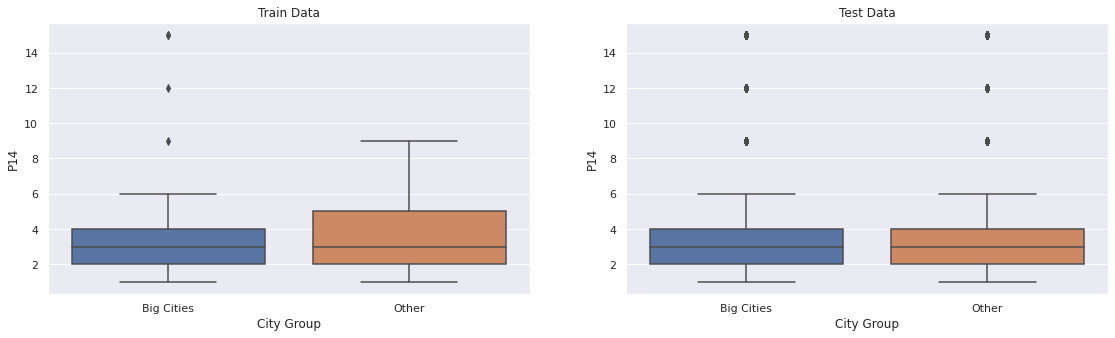

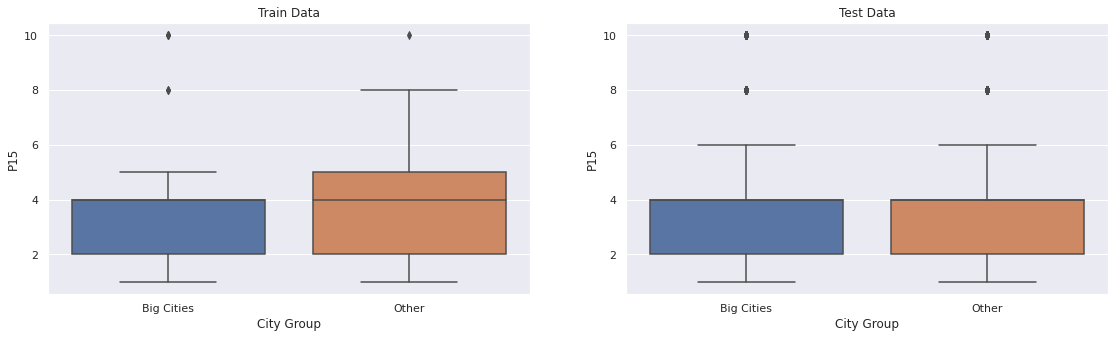

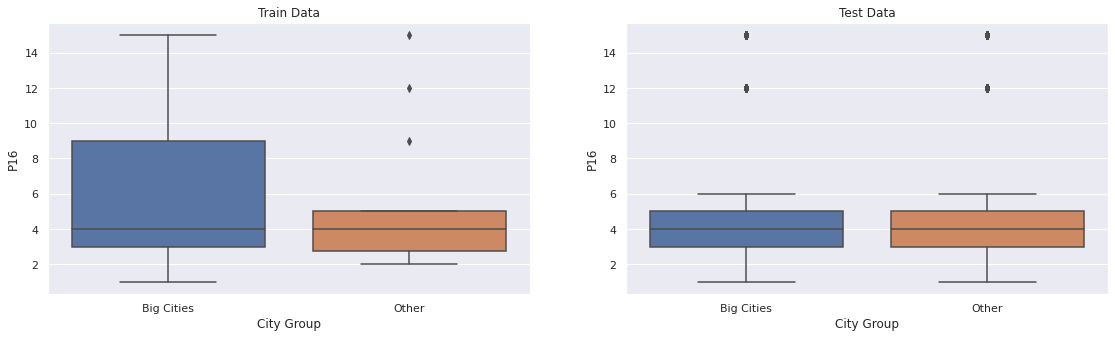

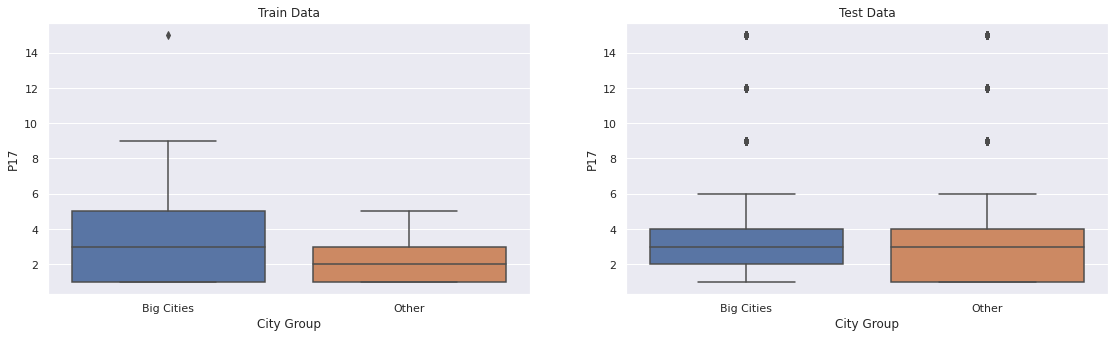

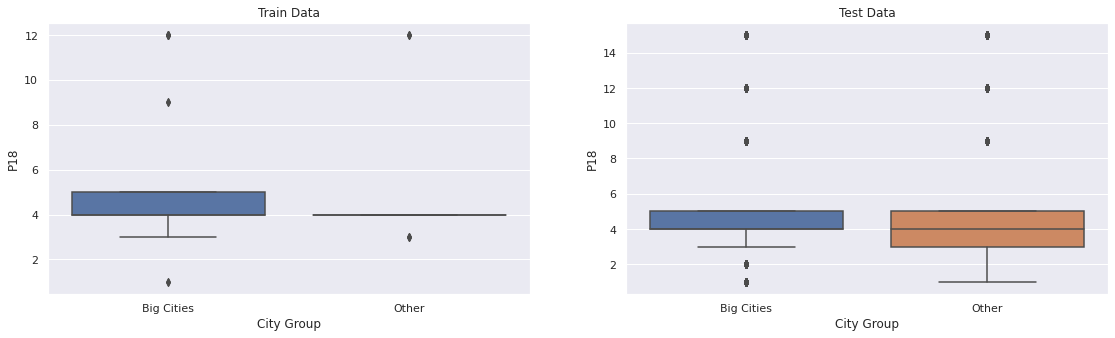

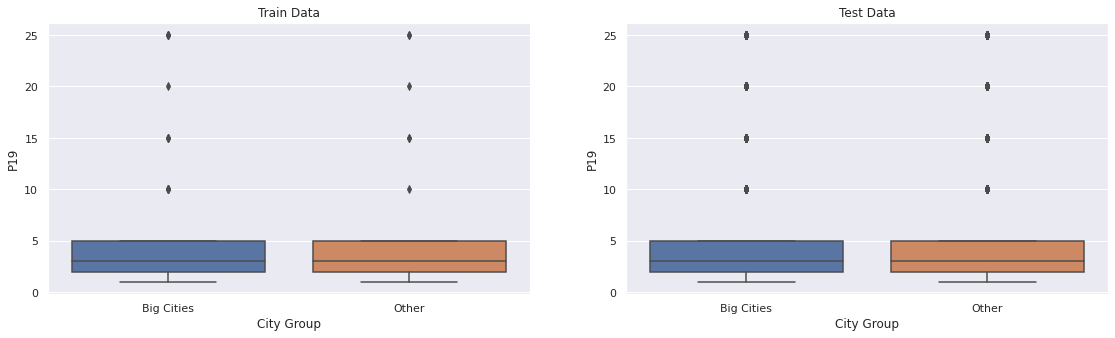

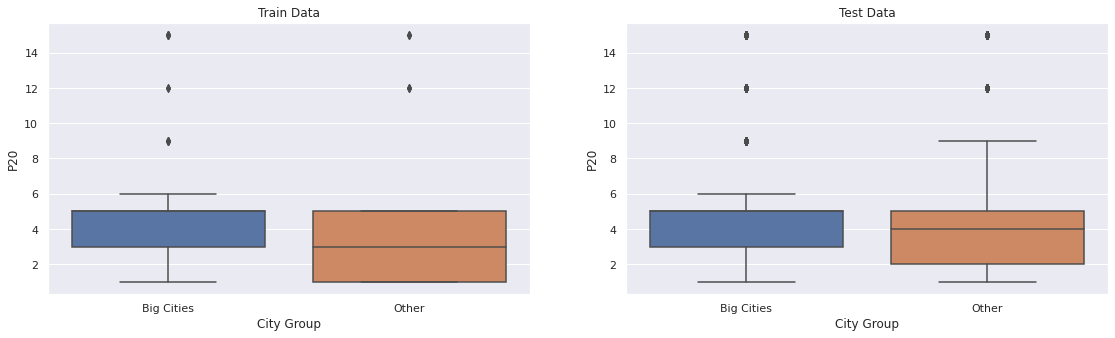

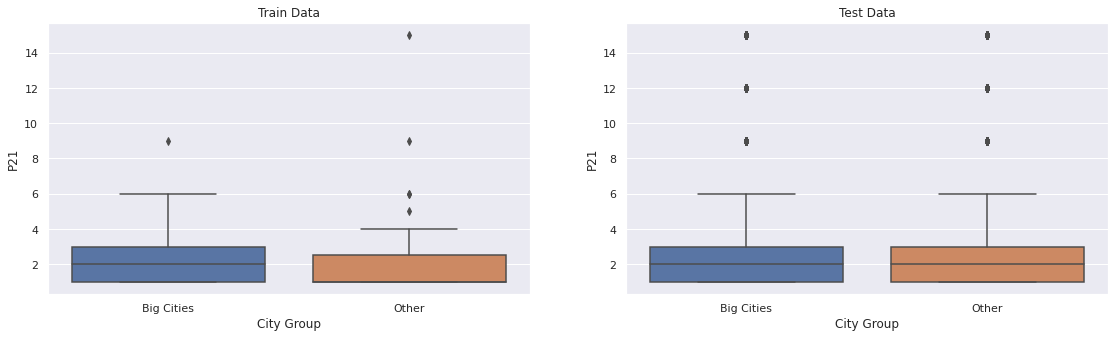

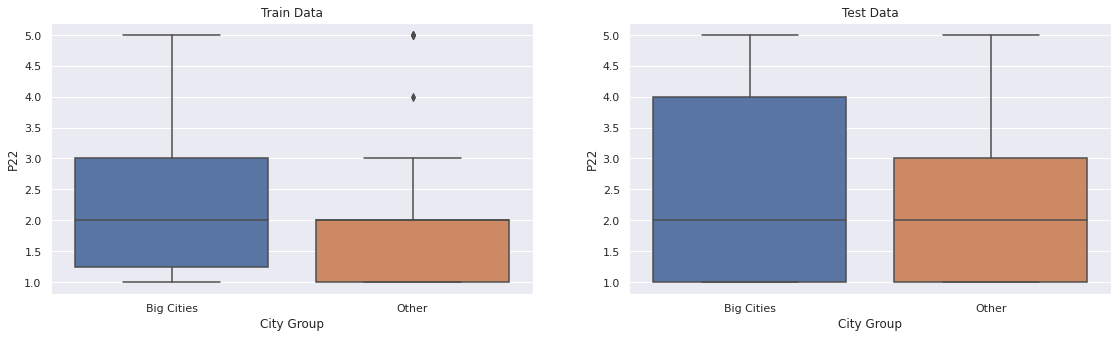

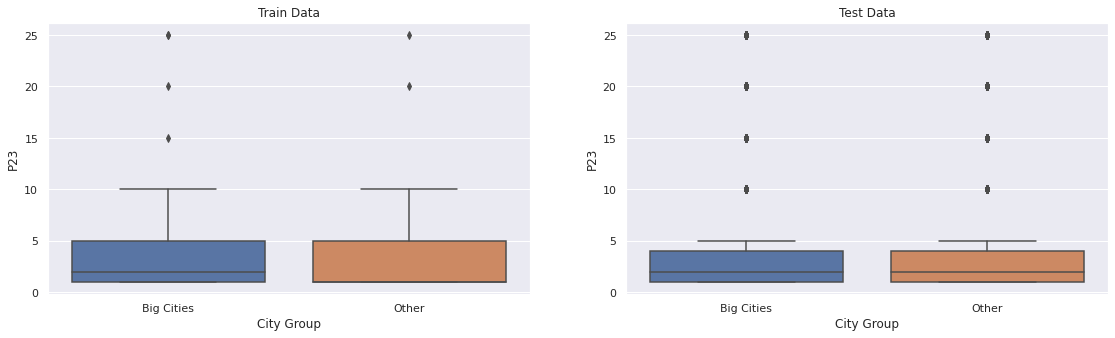

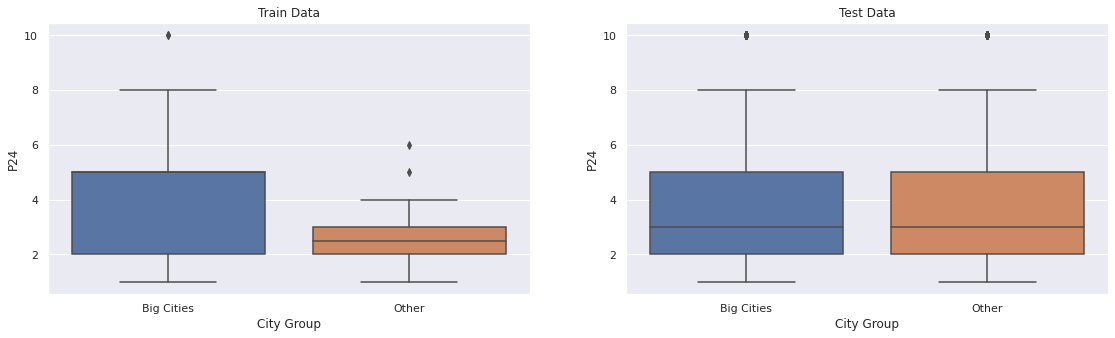

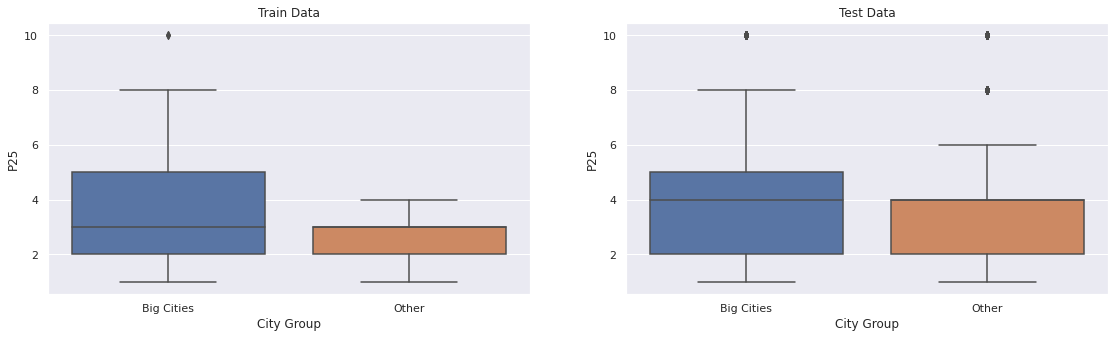

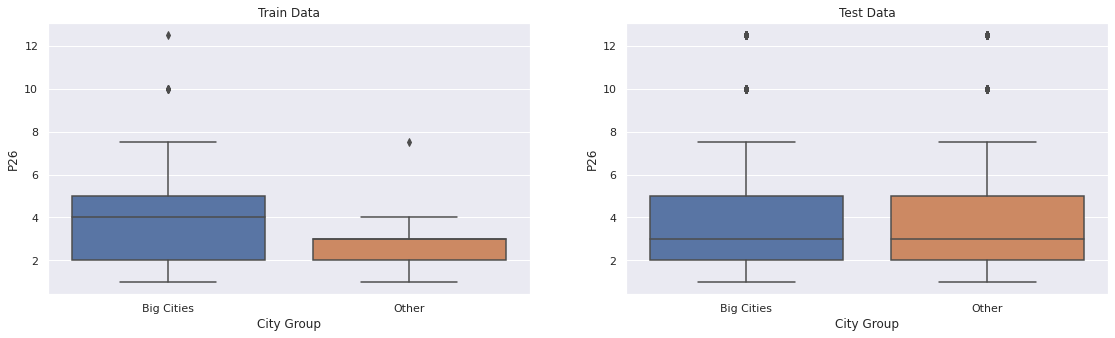

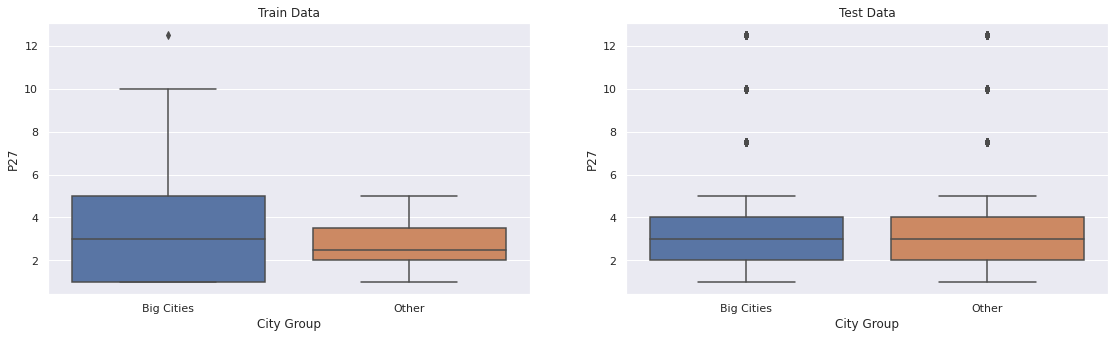

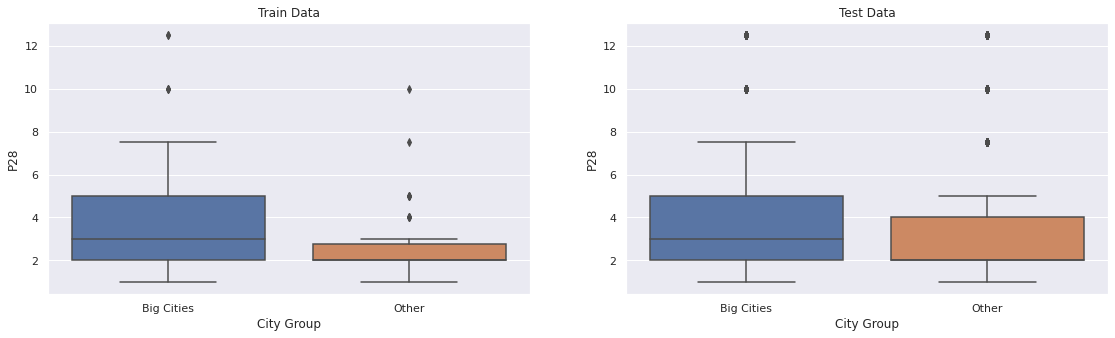

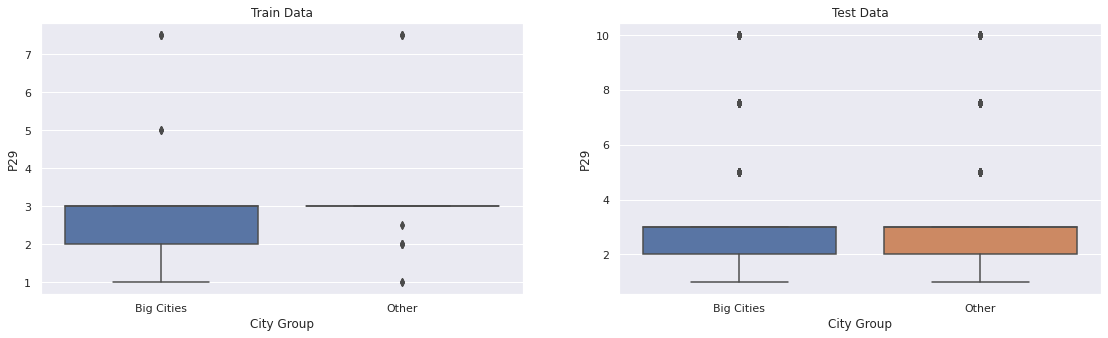

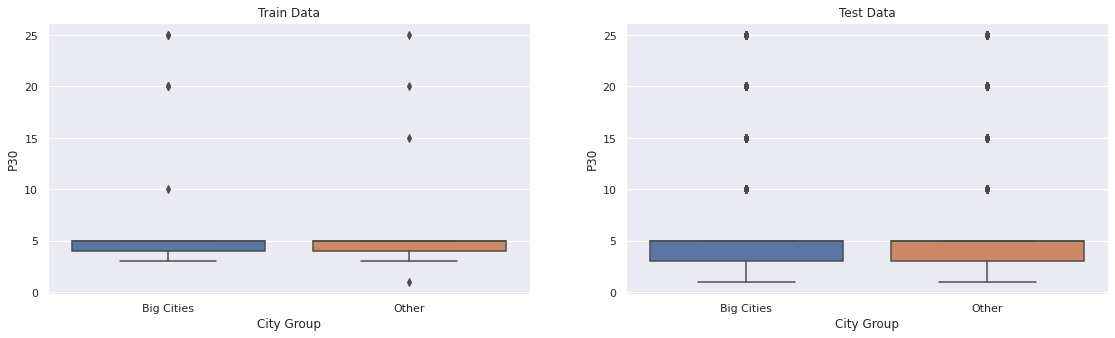

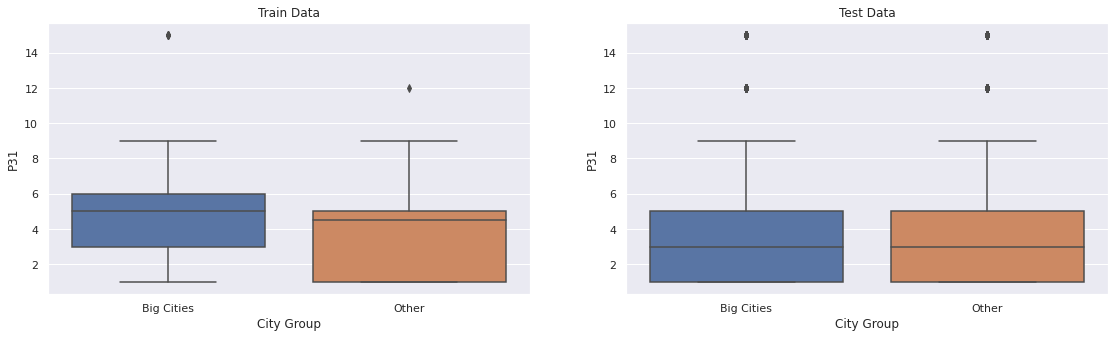

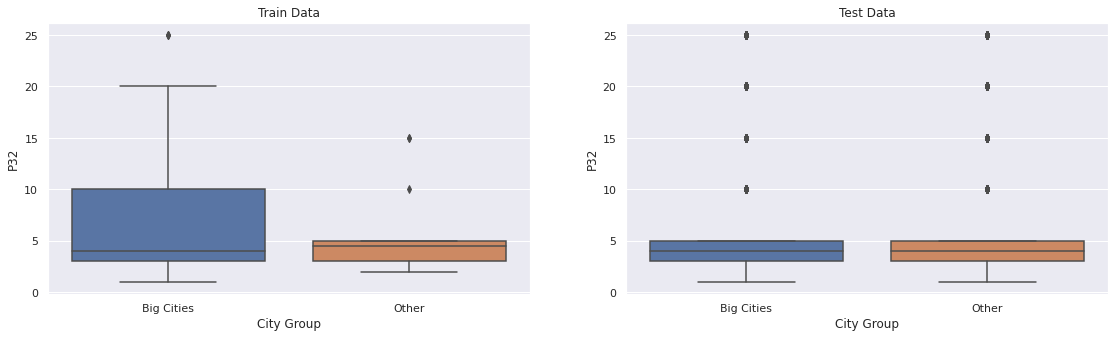

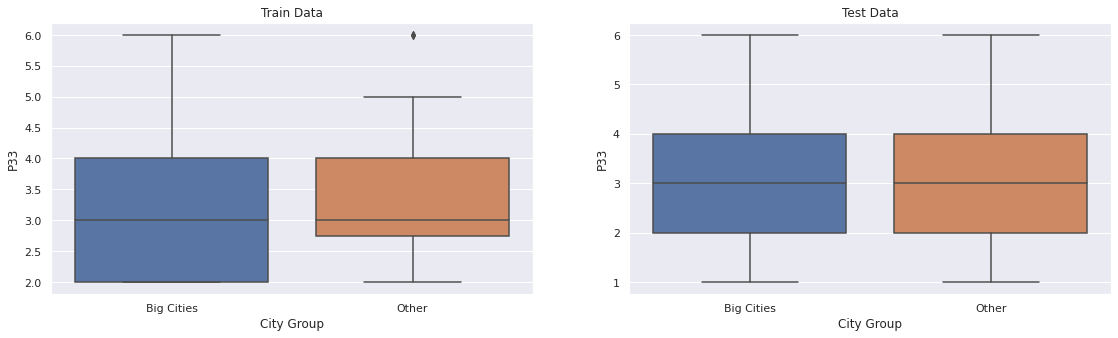

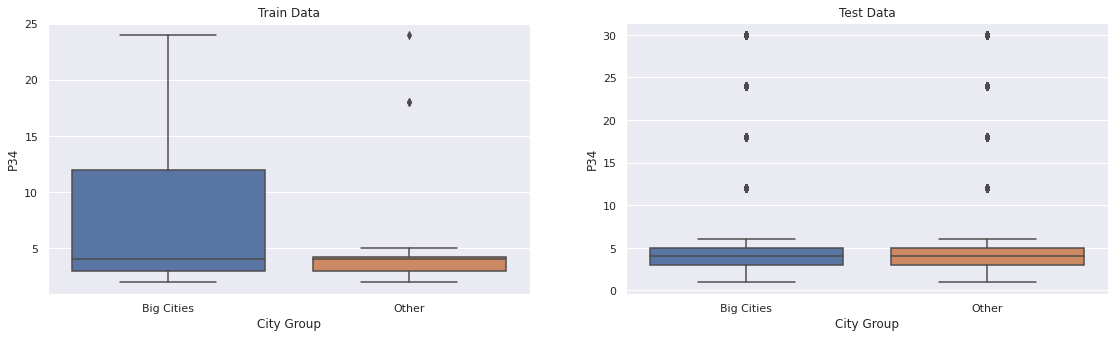

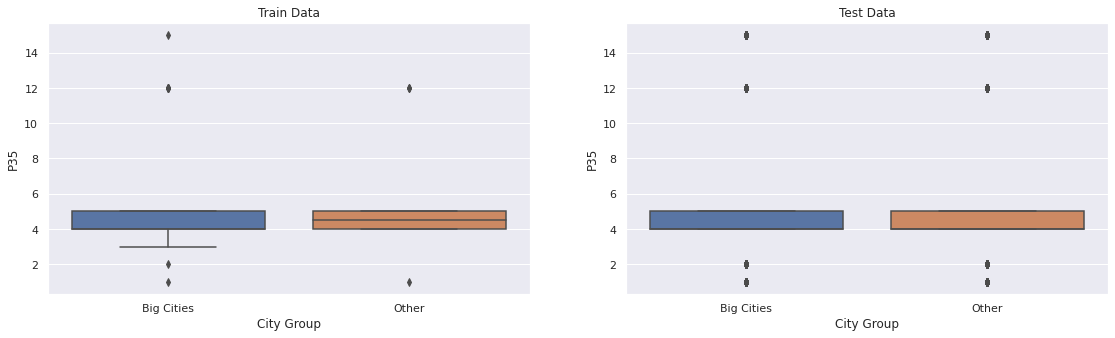

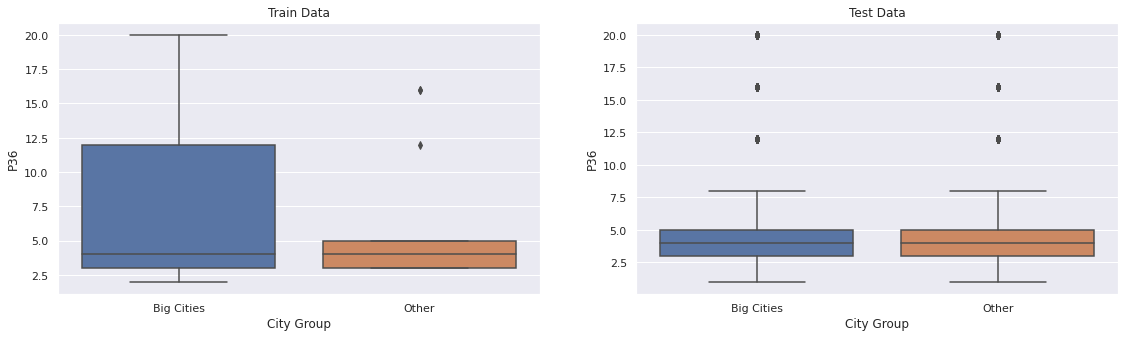

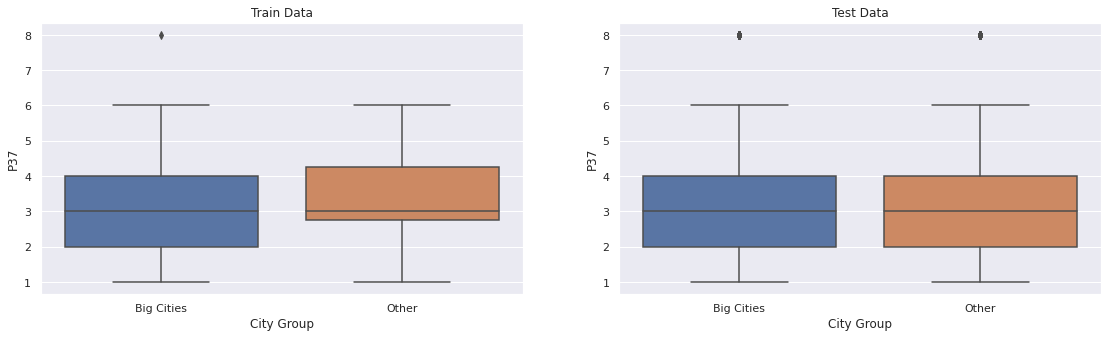

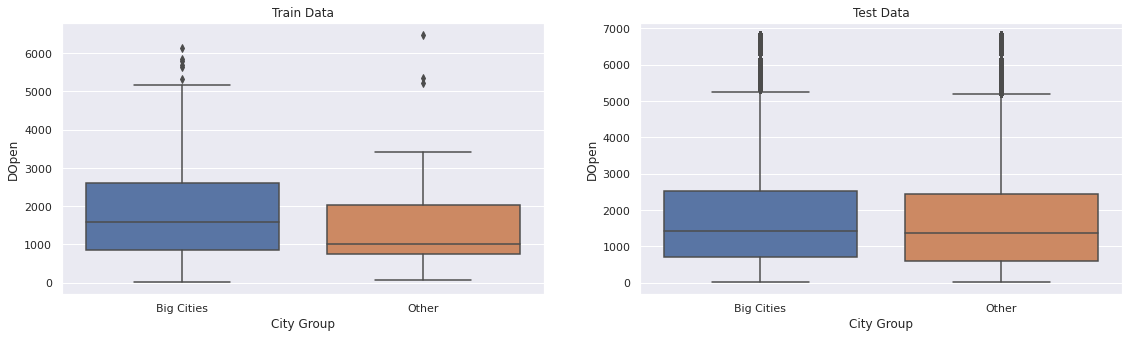

In [ ]:
porder = ['Big Cities','Other']
for i in cols_num:
  fig, ax = plt.subplots(1,2, figsize=(19, 5))
  g1 = sns.boxplot(data = df_train[df_train[i] !=0], x = "City Group", y = i, order= porder, showfliers = True, ax=ax[0]).set(title = 'Train Data')
  g2 = sns.boxplot(data = df_test[df_test[i] !=0], x = "City Group", y = i, order= porder, showfliers = True, ax=ax[1]).set(title = 'Test Data')
  fig.show()

P2, P6, P25 & P28 appears to have a difference between Big Cities and Other. There is some problem with the distribution between the train and test sets for P24, P32, P34 & P36.

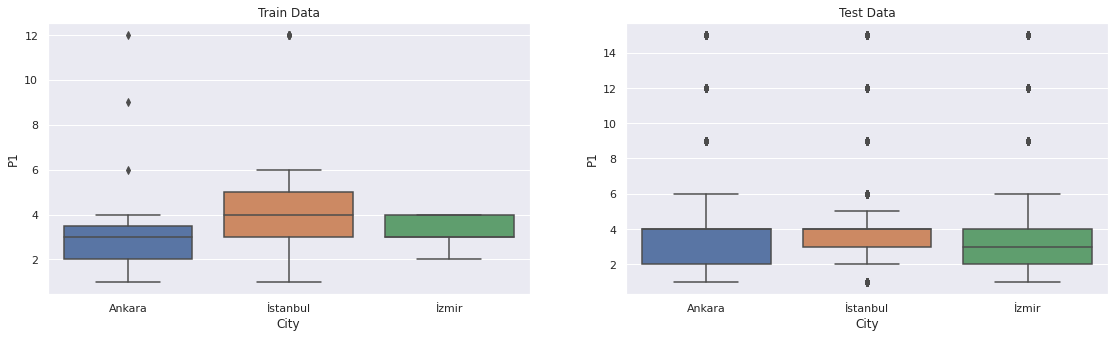

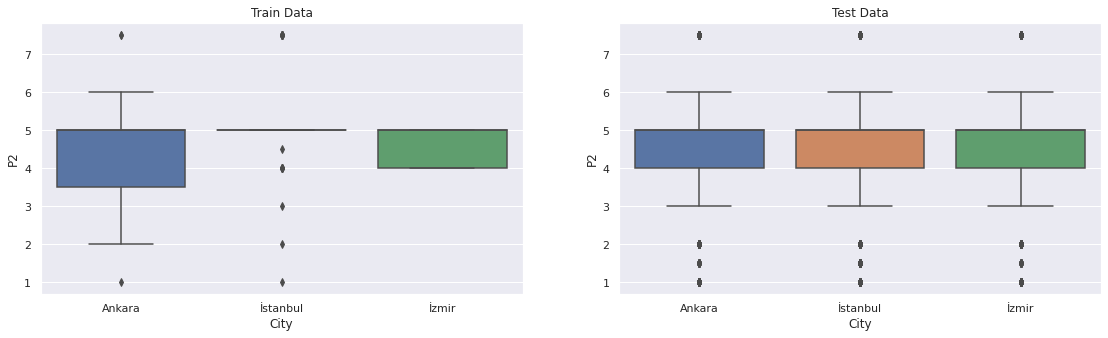

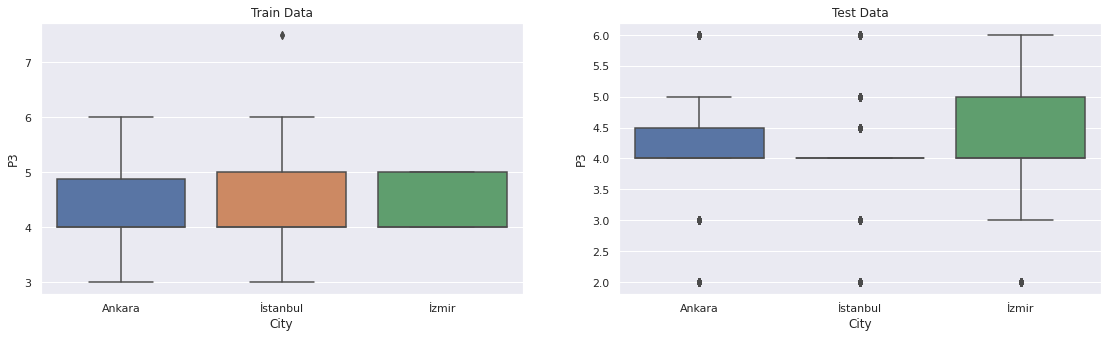

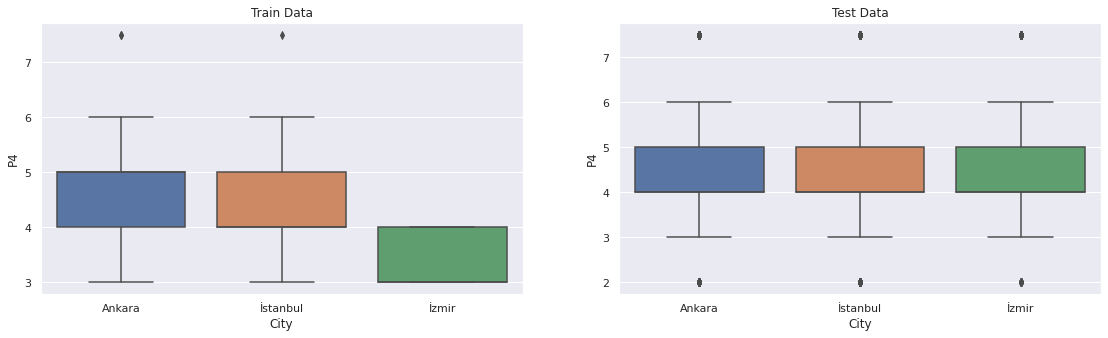

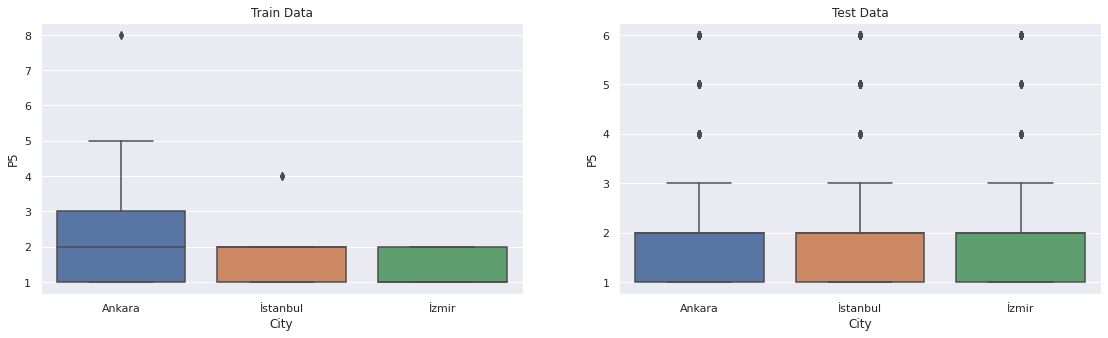

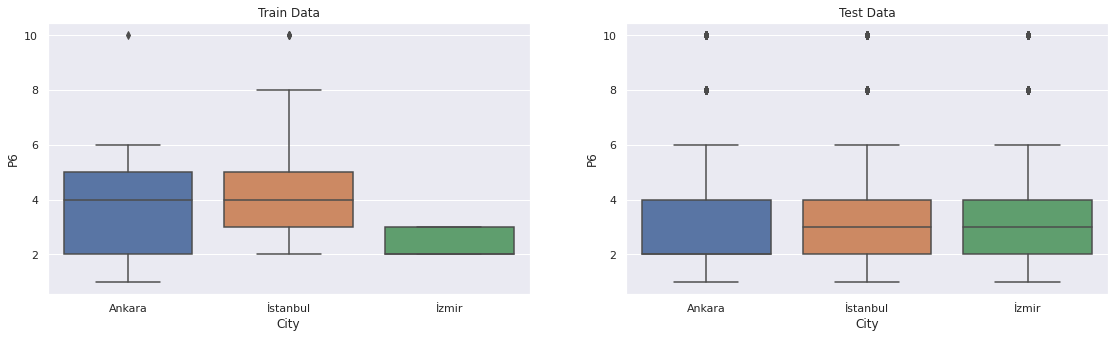

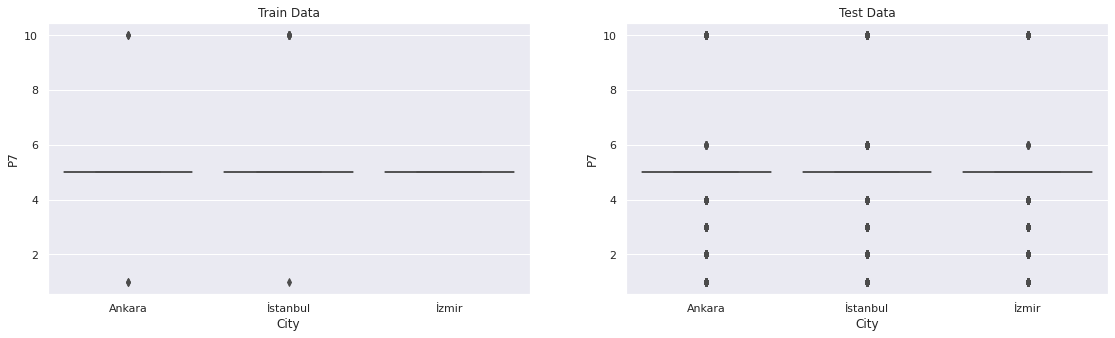

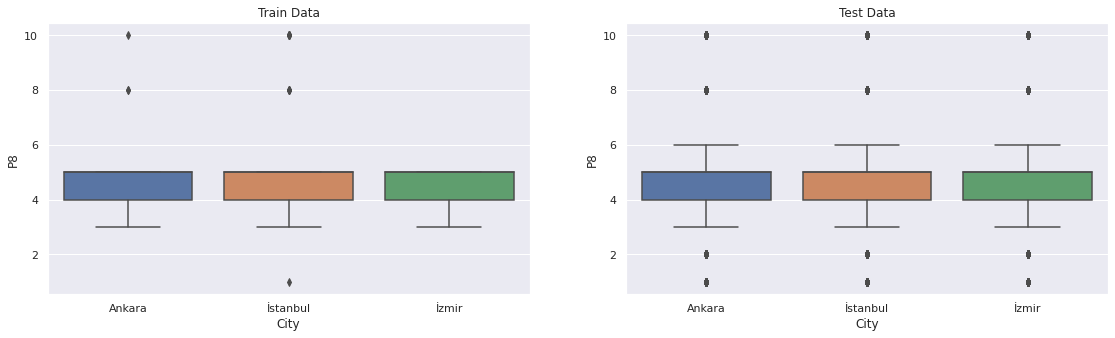

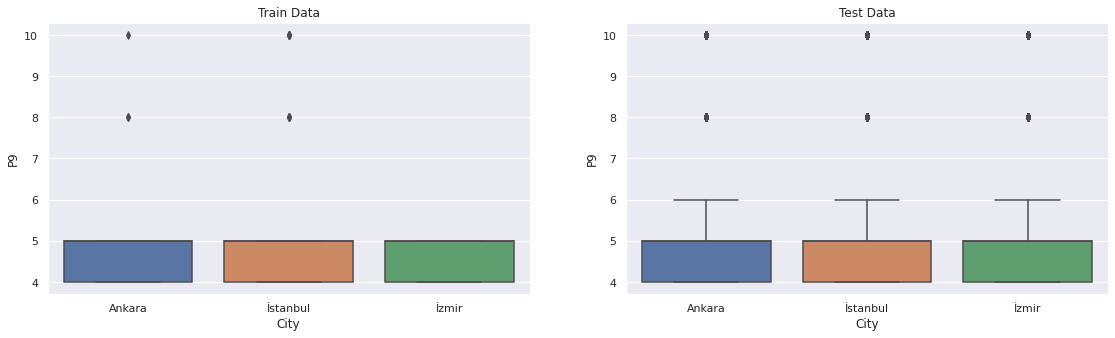

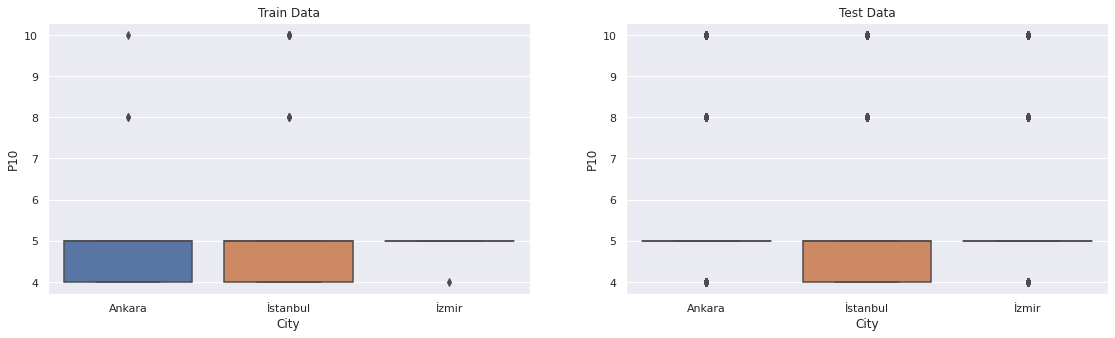

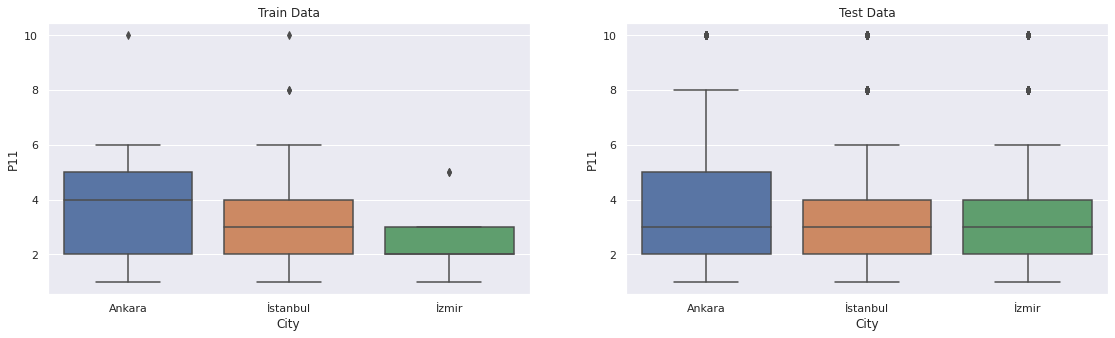

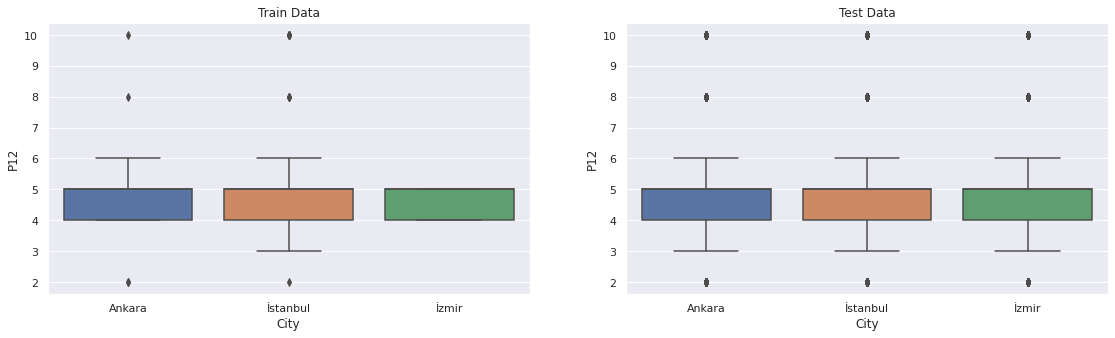

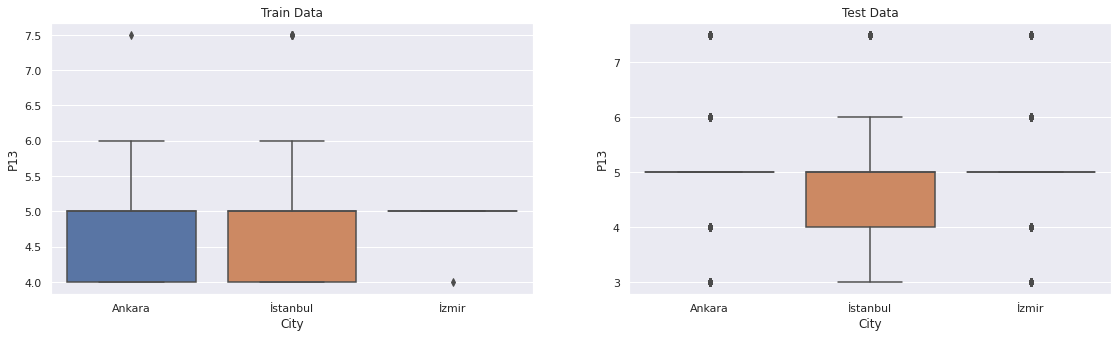

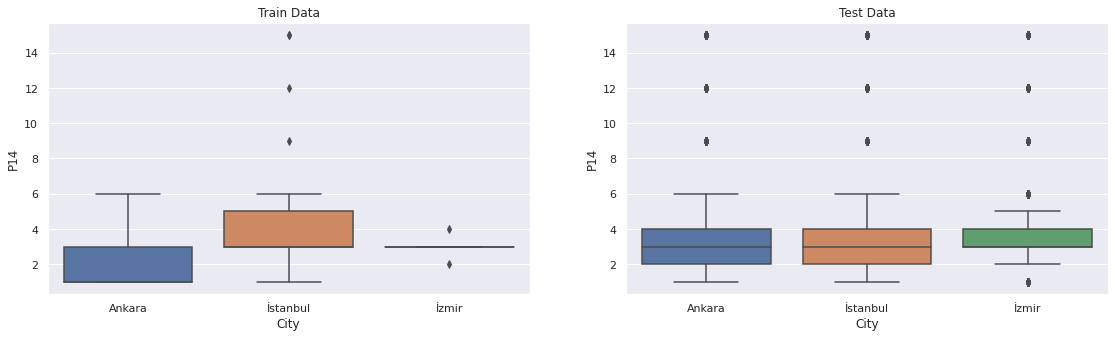

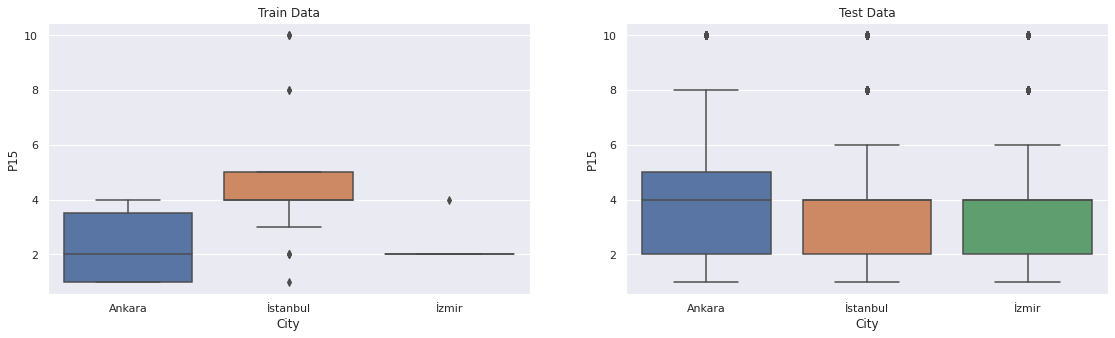

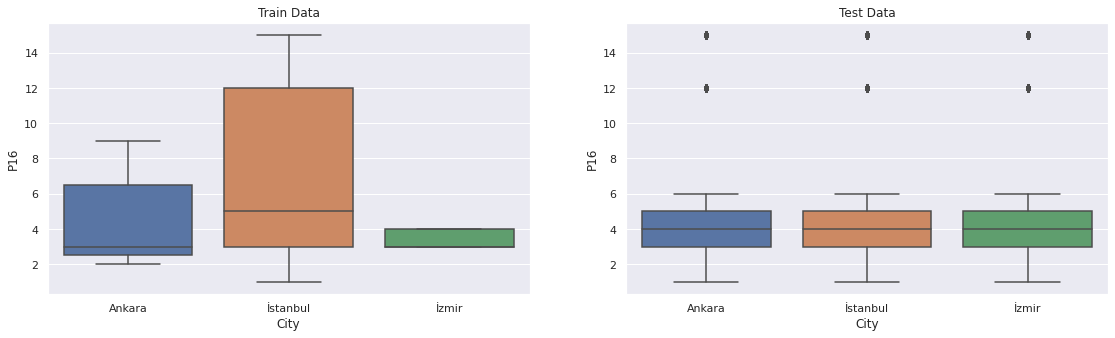

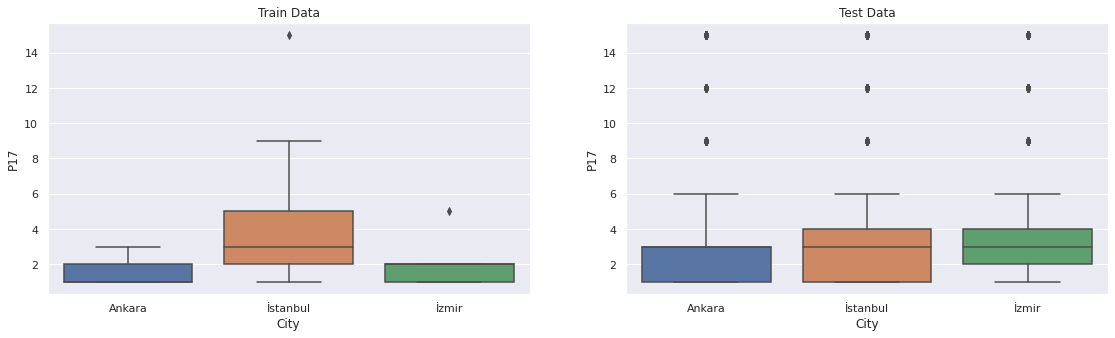

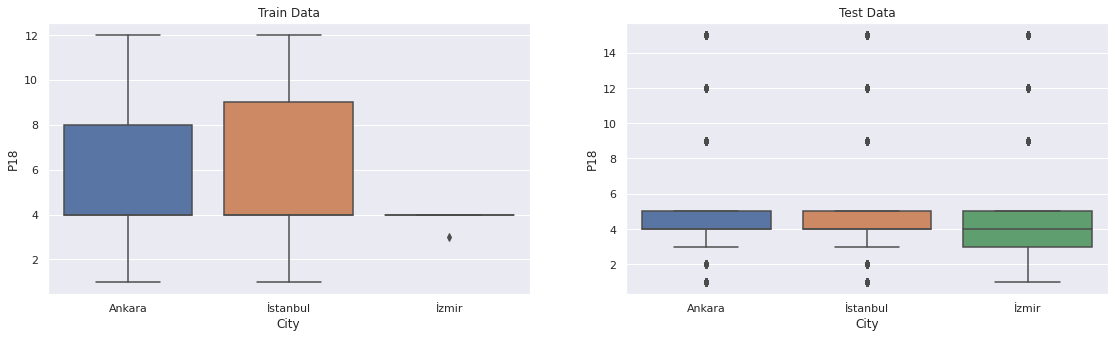

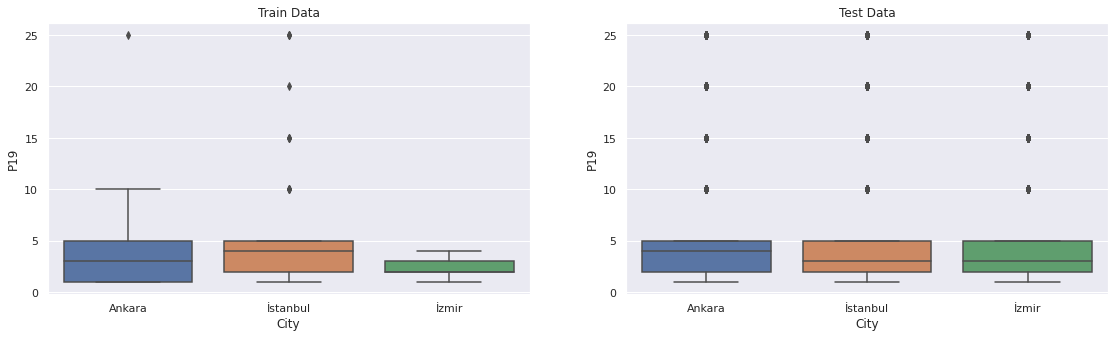

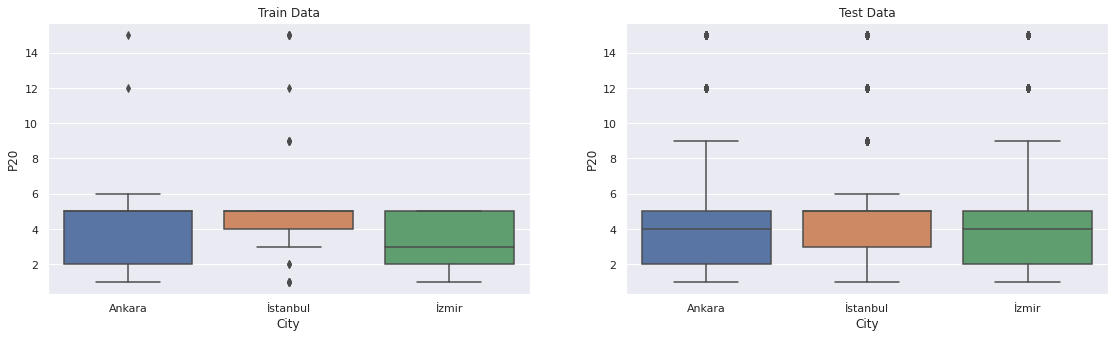

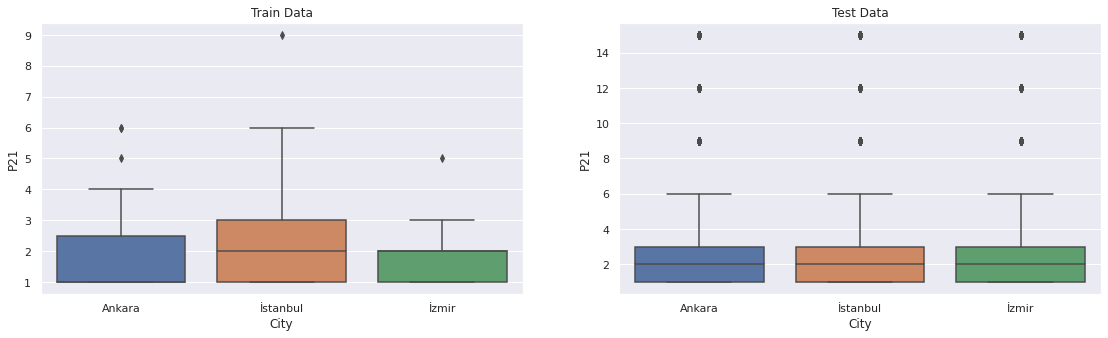

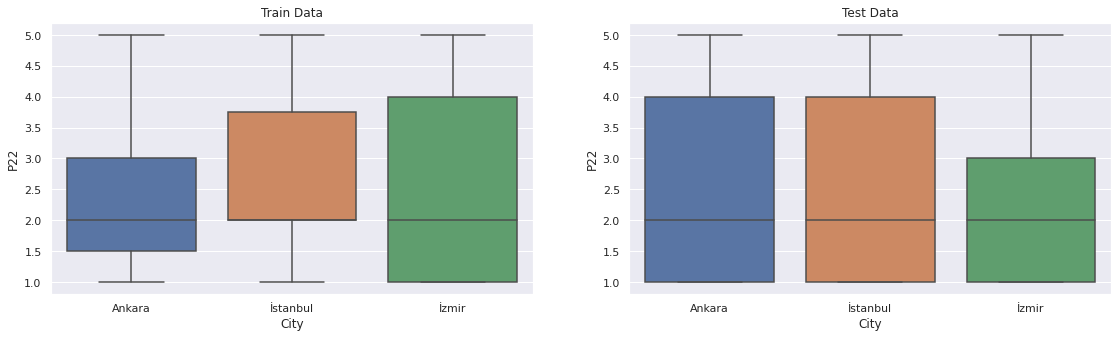

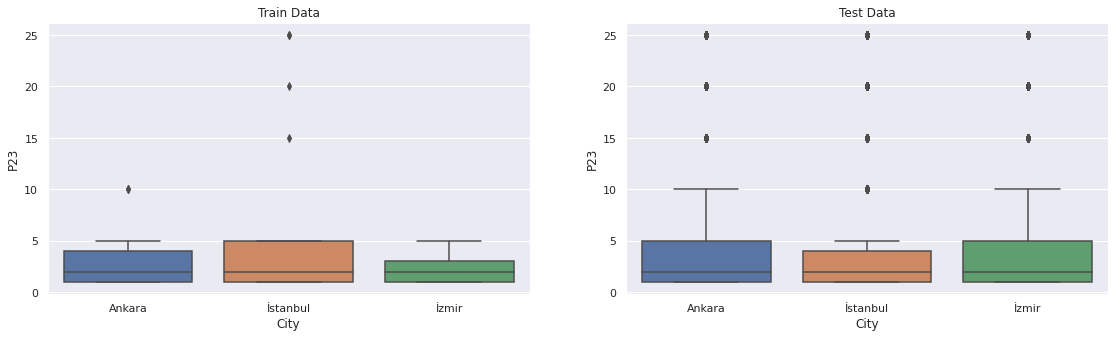

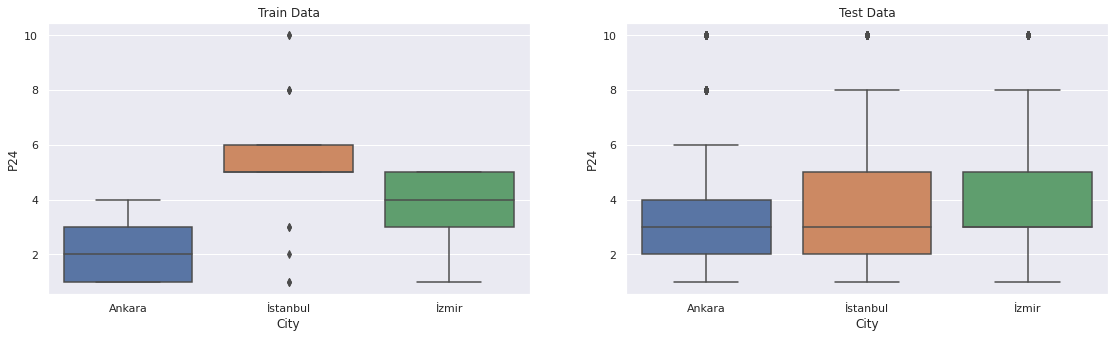

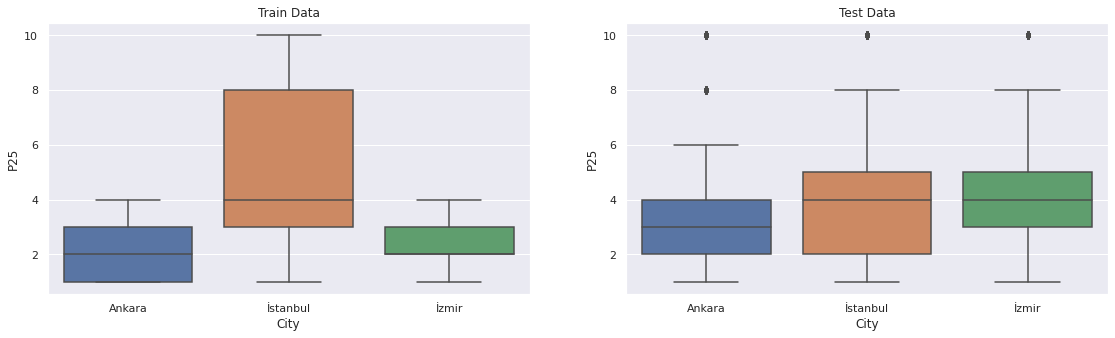

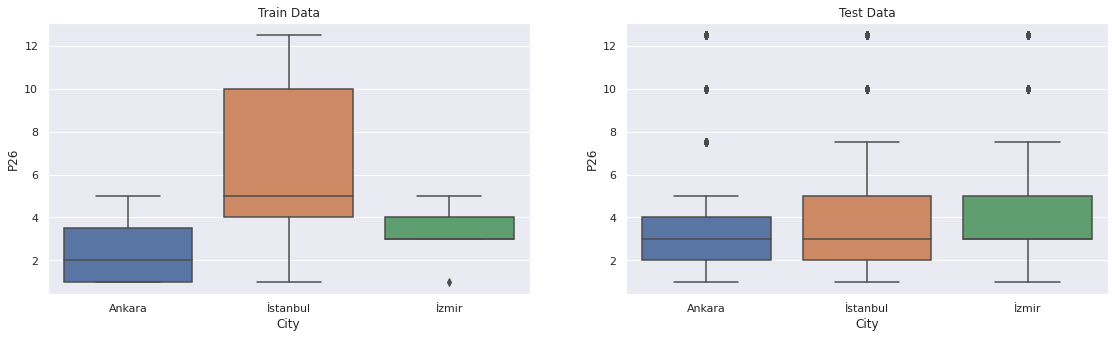

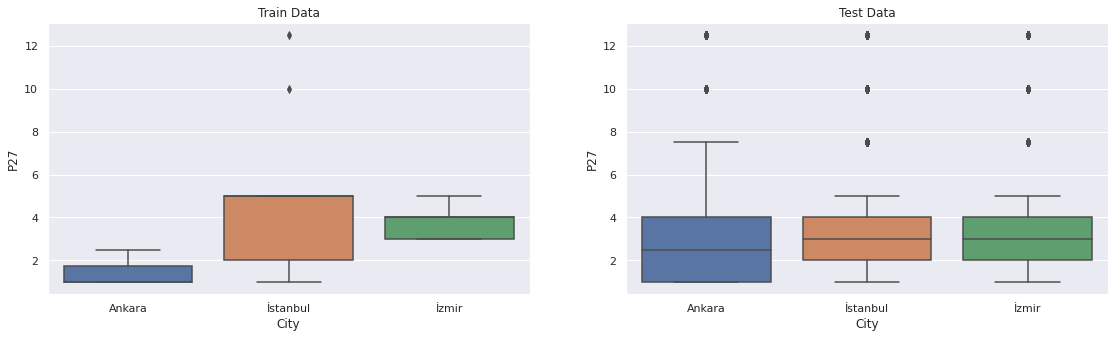

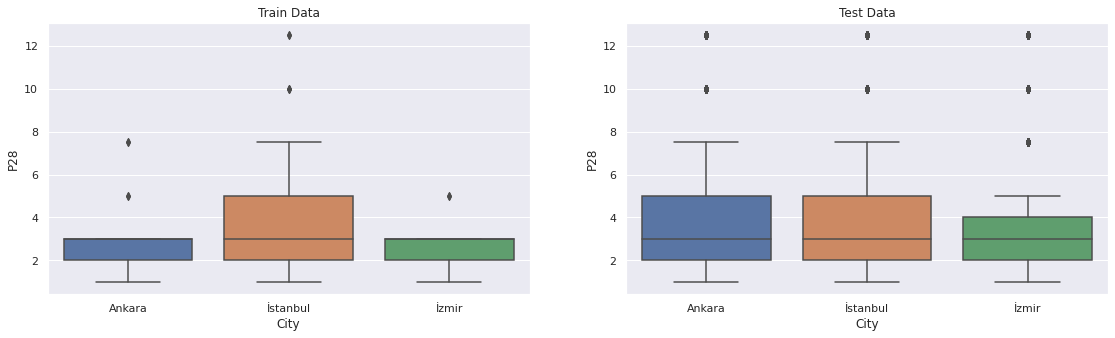

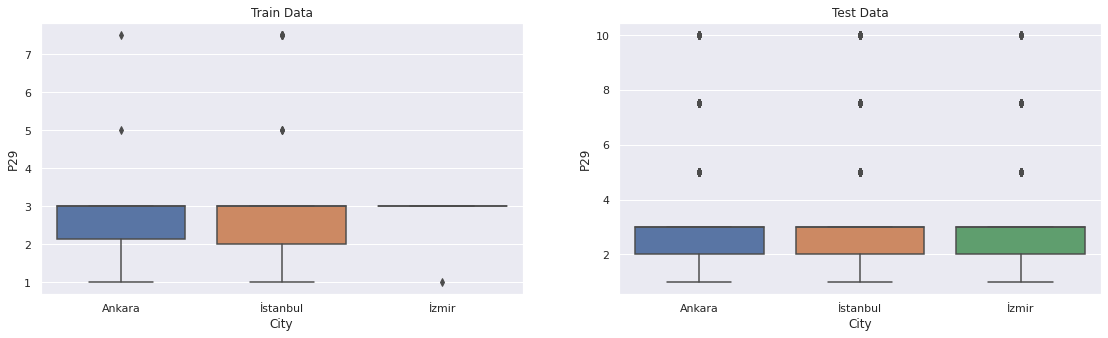

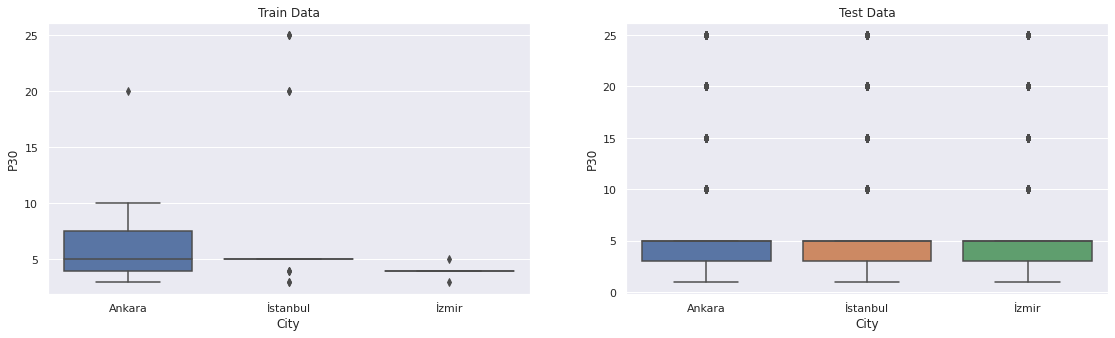

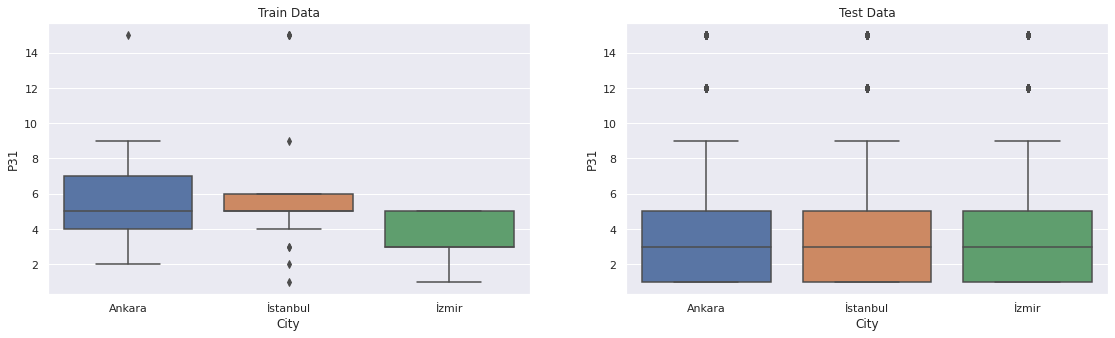

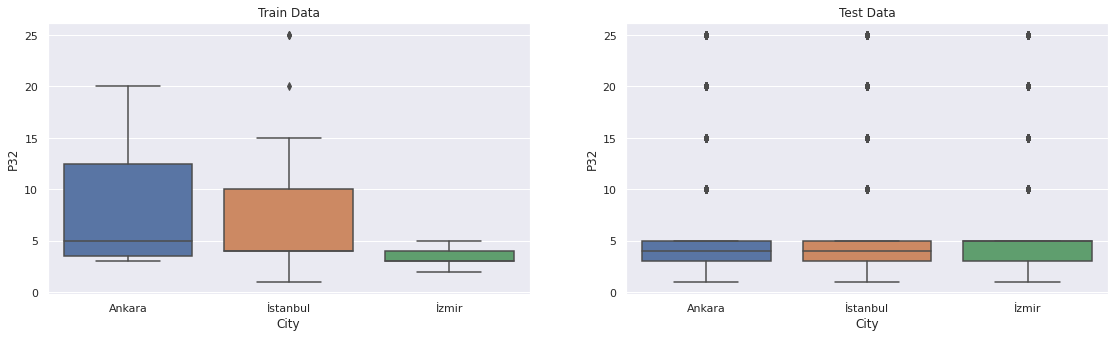

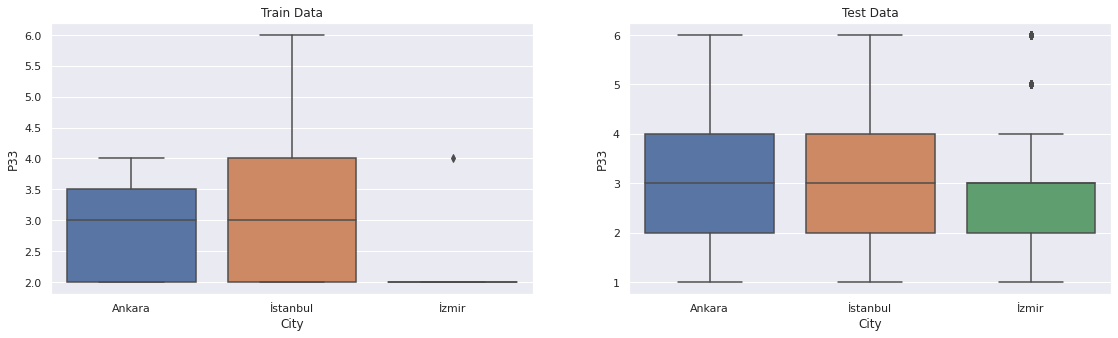

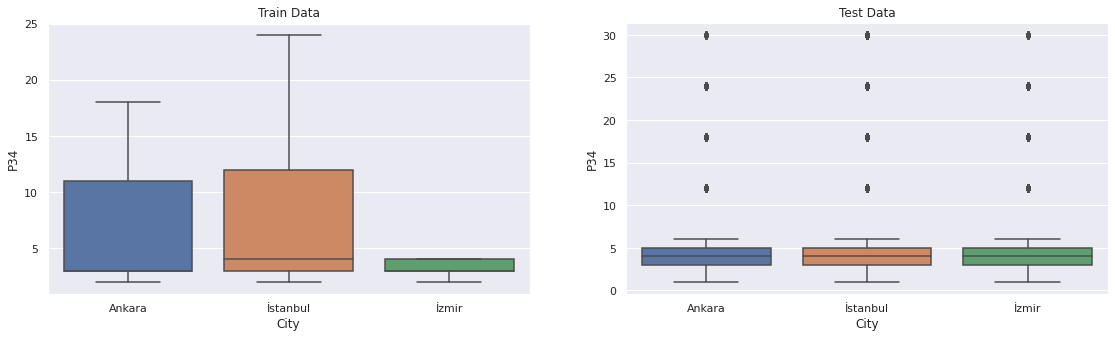

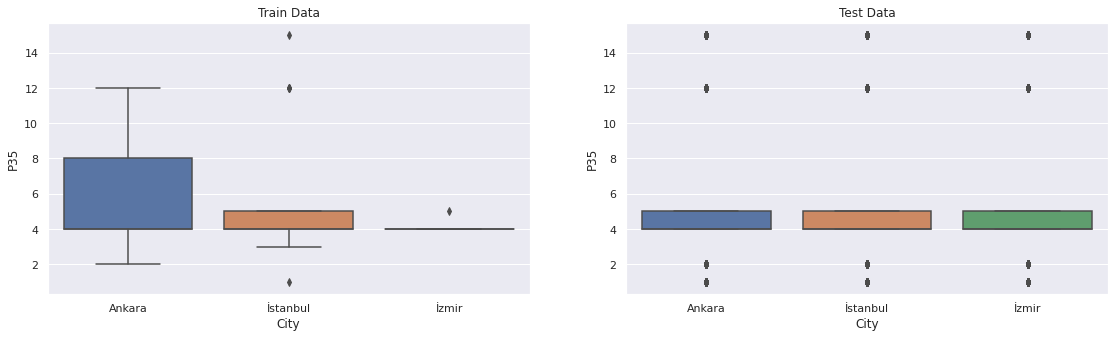

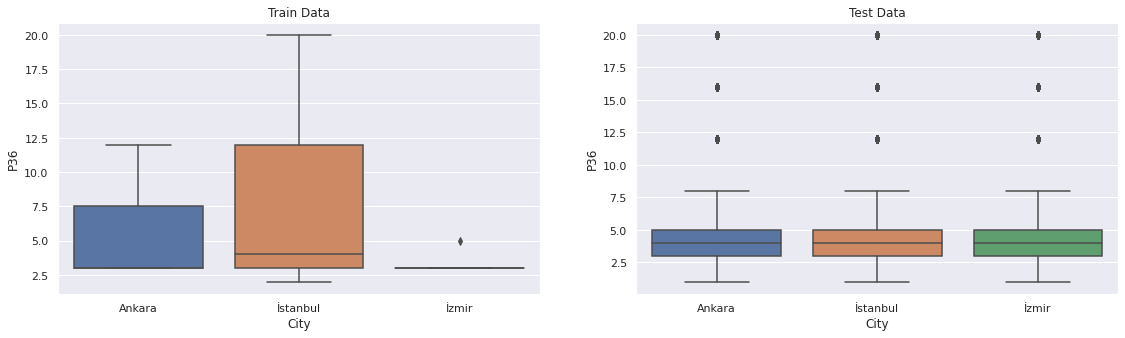

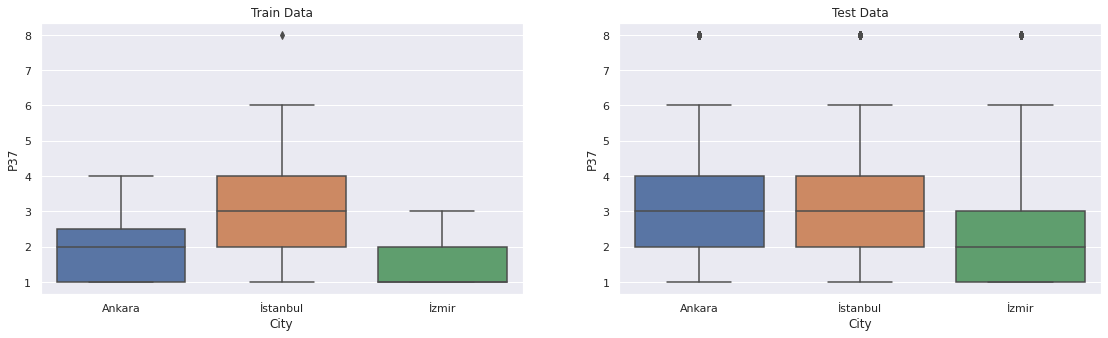

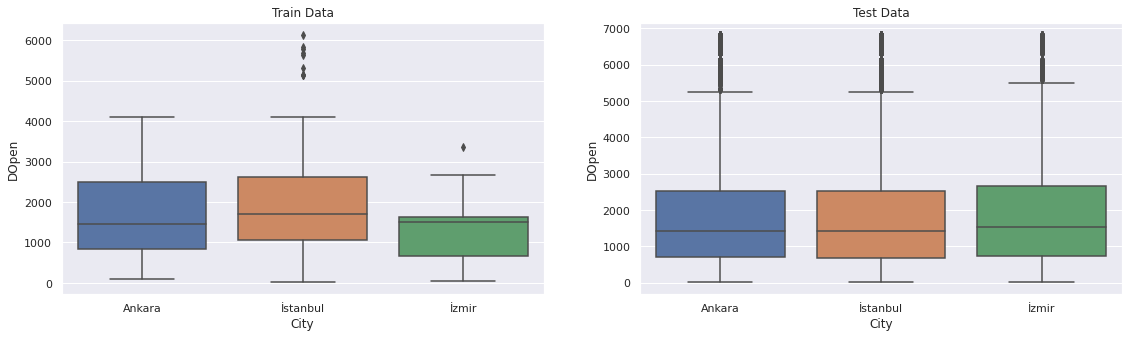

In [ ]:
bcOrder = df_test['City'][df_test["City Group"] == 'Big Cities'].unique()

for i in cols_num:
  fig, ax = plt.subplots(1,2, figsize=(19, 5))
  g1 = sns.boxplot(data = df_test[(df_test["City Group"] == 'Big Cities') & (df_test[i] != 0)], x = "City", y = i, showfliers = True, order = bcOrder, ax=ax[1]).set(title="Test Data")
  g2 = sns.boxplot(data = df_train[(df_train["City Group"] == 'Big Cities') & (df_train[i] != 0)], x = "City", y = i, showfliers = True, order = bcOrder, ax=ax[0]).set(title="Train Data")
  fig.show()

The same problems between training and test but no signifiant variation between the Big Cities

### Basic correlation analysis:

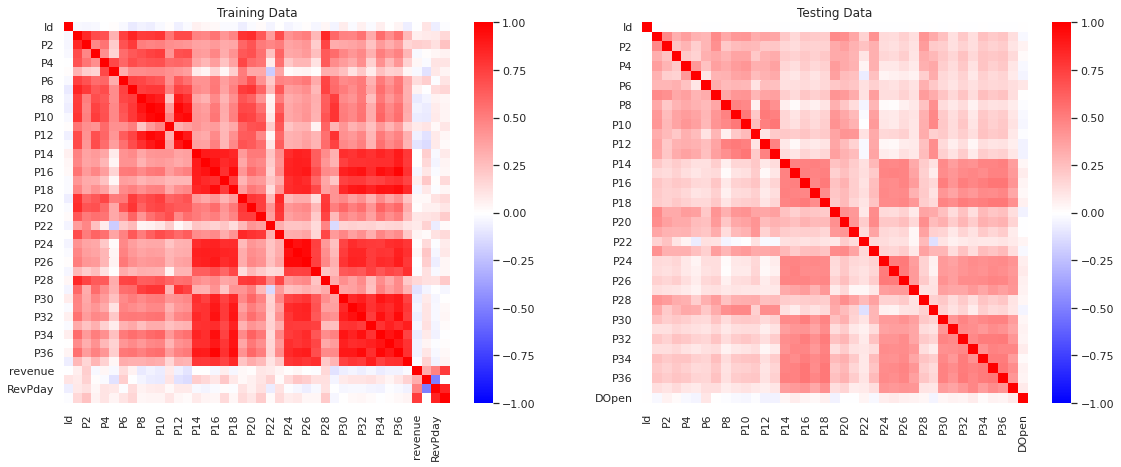

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(19, 7))
g1 = sns.heatmap(data = df_train.corr(), vmin = -1, vmax = 1, annot = False, cmap ='bwr', ax = ax[0]).set(title='Training Data');
g2 = sns.heatmap(data = df_test.corr(), vmin = -1, vmax = 1, annot = False, cmap ='bwr', ax = ax[1]).set(title='Testing Data');
fig.show()

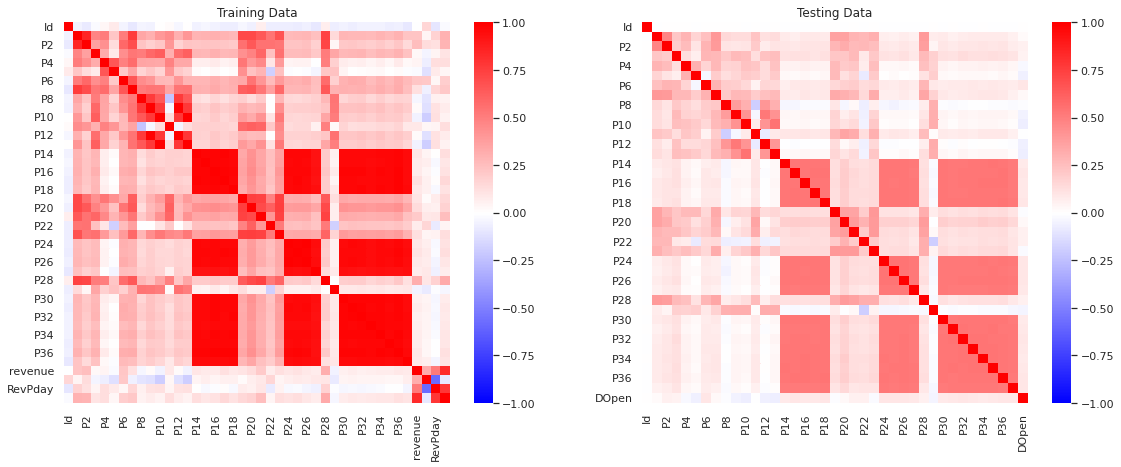

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(19, 7))
g1 = sns.heatmap(data = df_train.corr(method = "spearman"), vmin = -1, vmax = 1, annot = False, cmap ='bwr', ax=ax[0]).set(title='Training Data');
g2 = sns.heatmap(data = df_test.corr(method = "spearman"), vmin = -1, vmax = 1, annot = False, cmap ='bwr', ax=ax[1]).set(title='Testing Data');
fig.show()

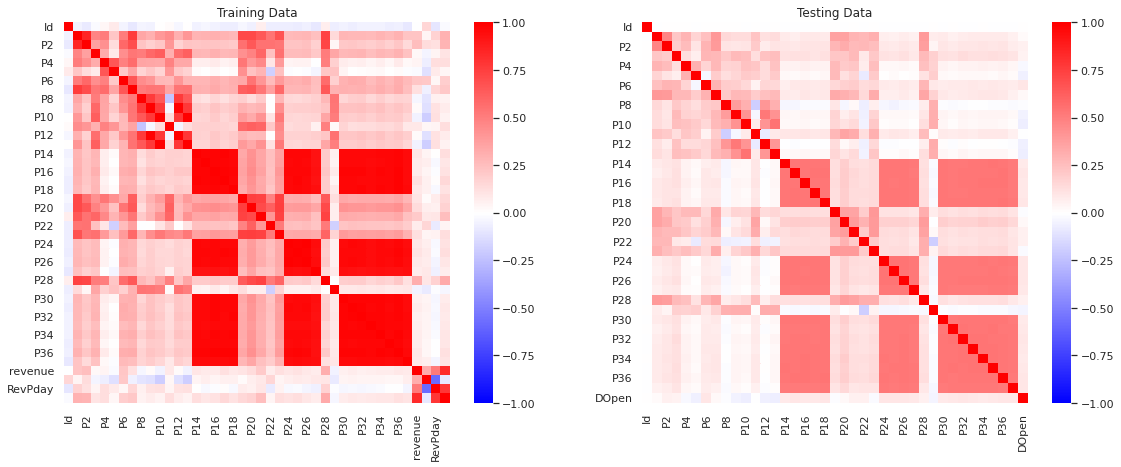

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(19, 7))
g1 = sns.heatmap(data = df_train.corr(method = "spearman"), vmin = -1, vmax = 1, annot = False, cmap ='bwr', ax=ax[0]).set(title='Training Data');
g2 = sns.heatmap(data = df_test.corr(method = "spearman"), vmin = -1, vmax = 1, annot = False, cmap ='bwr', ax=ax[1]).set(title='Testing Data');
fig.show()

### Histrogram plots

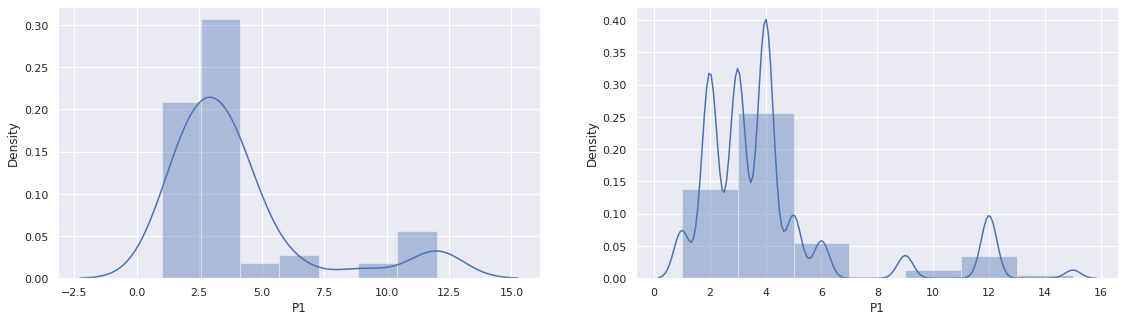

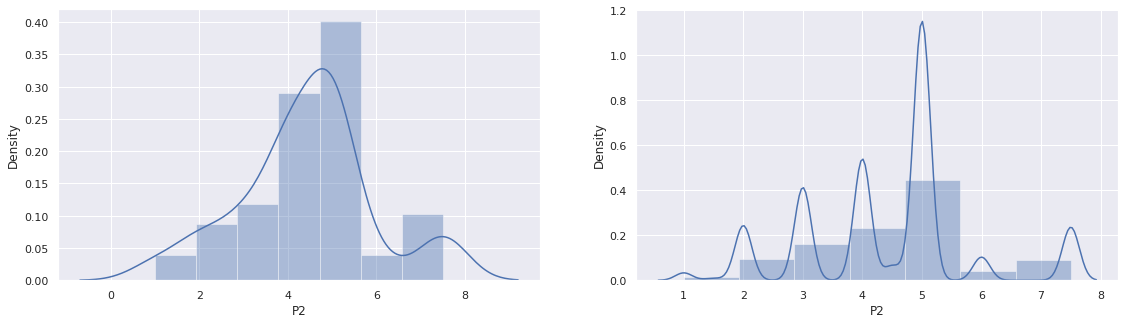

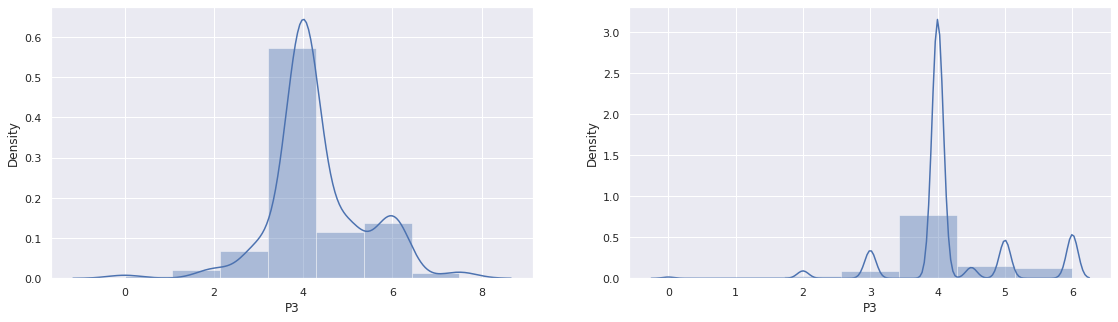

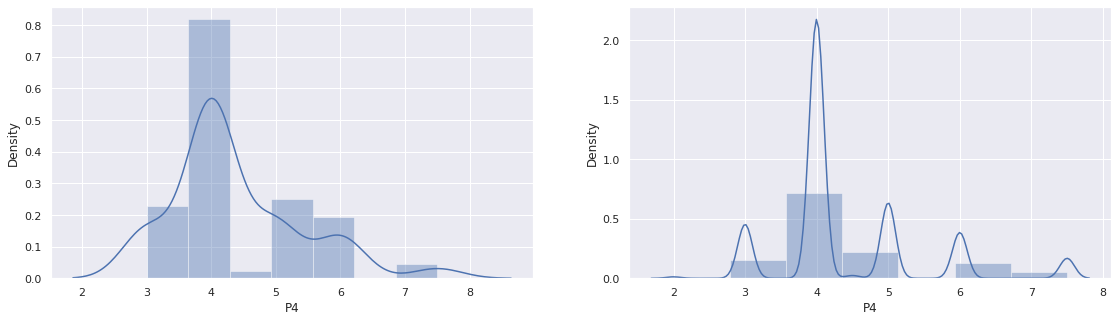

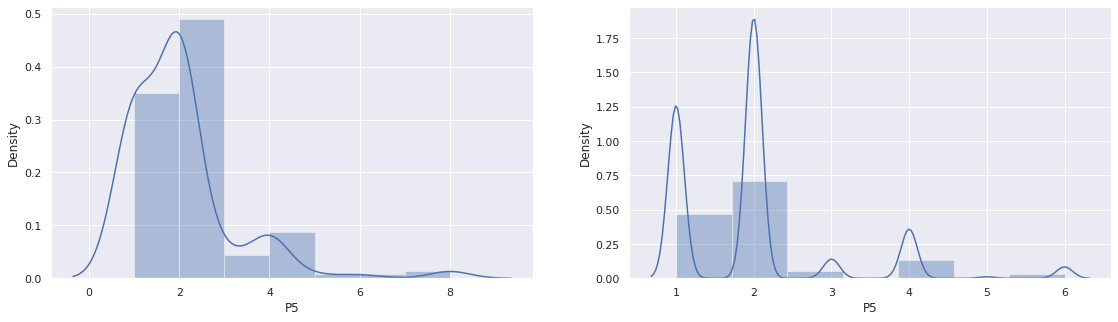

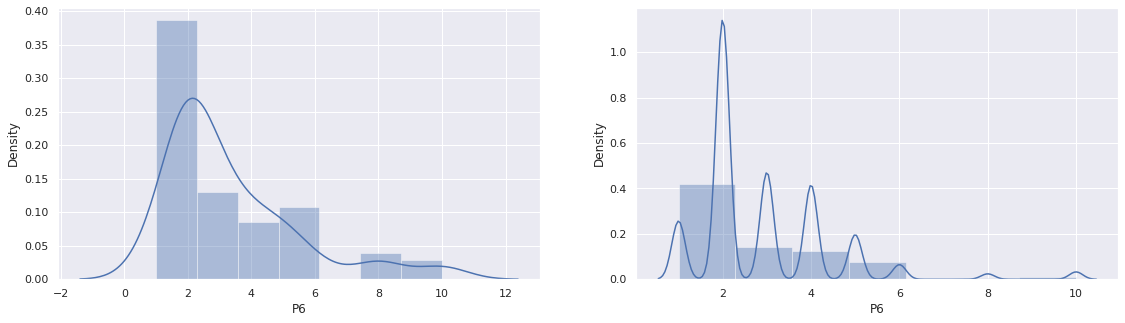

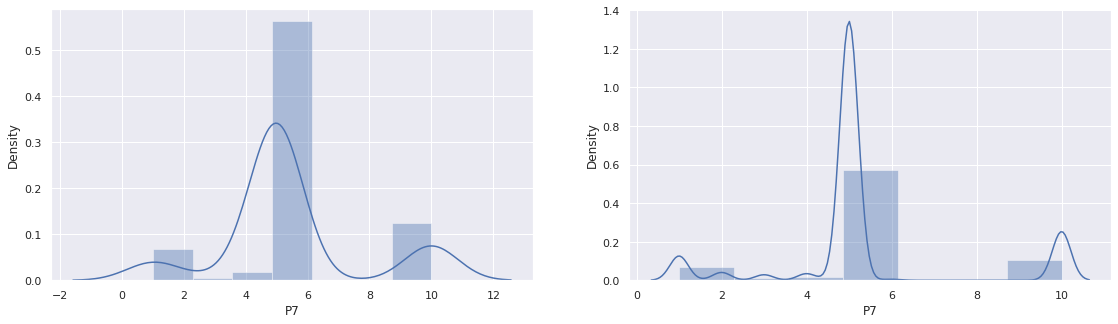

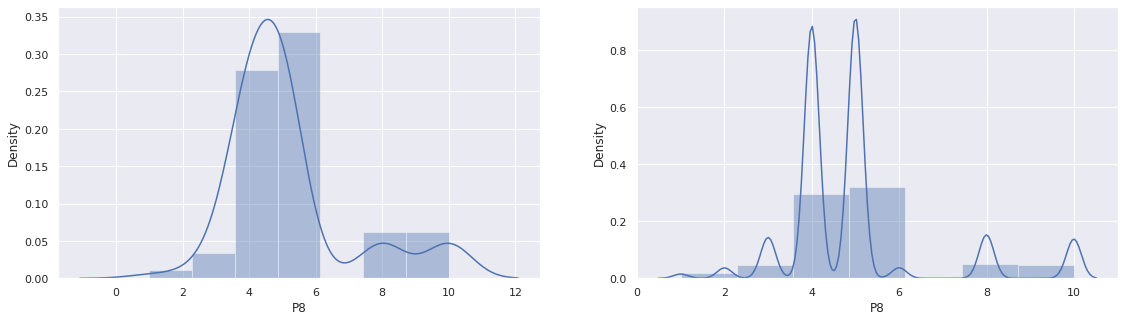

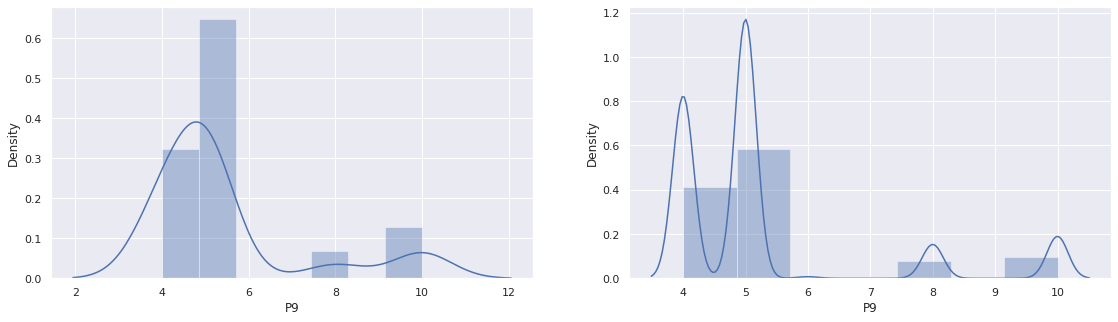

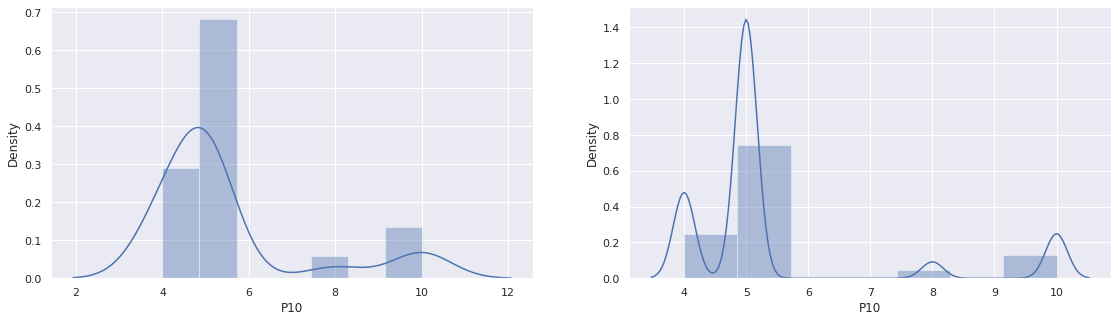

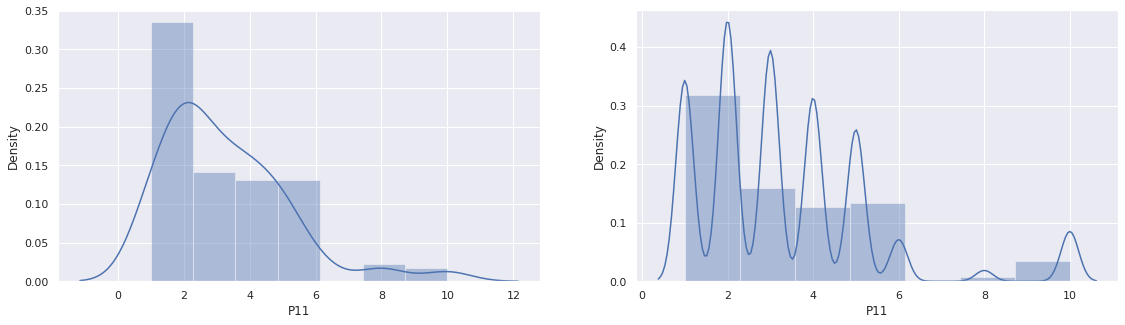

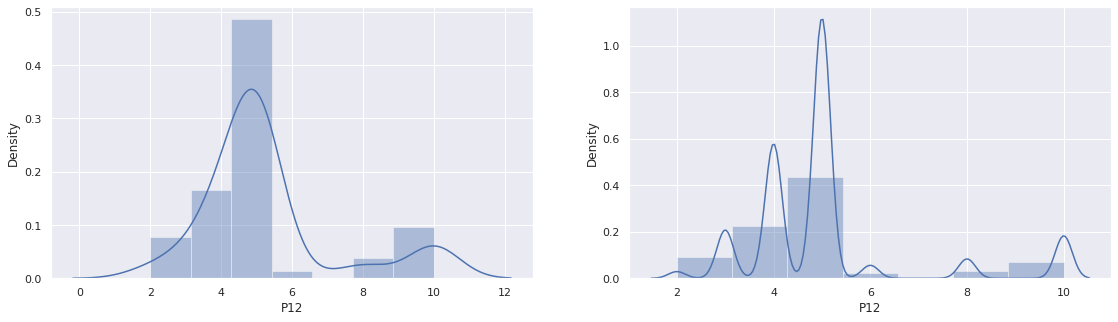

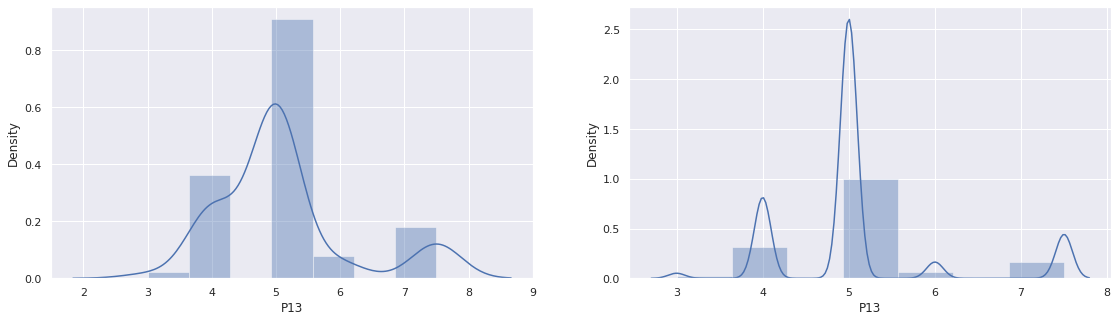

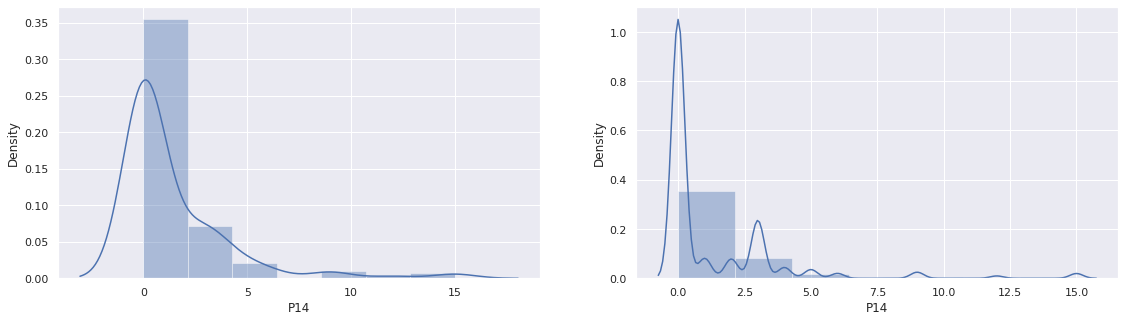

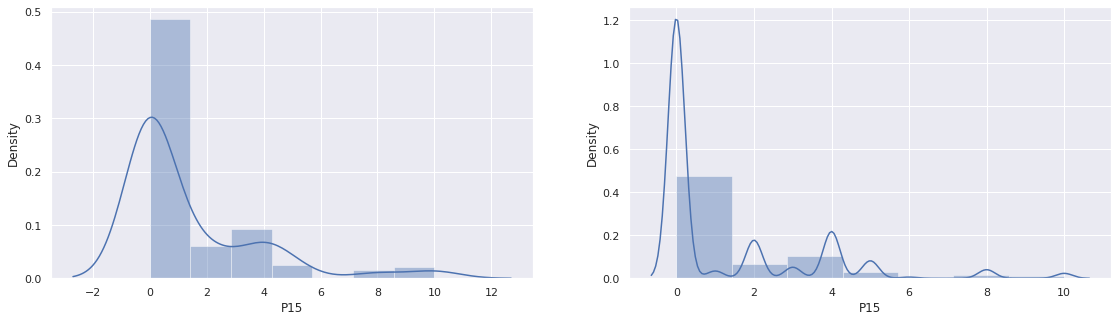

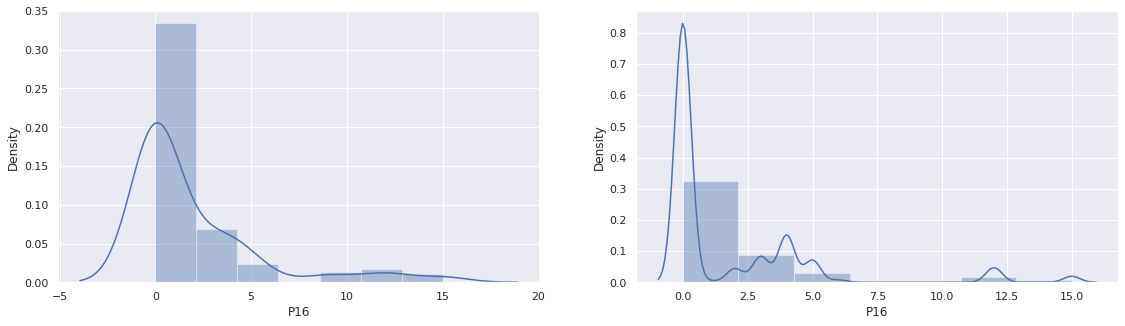

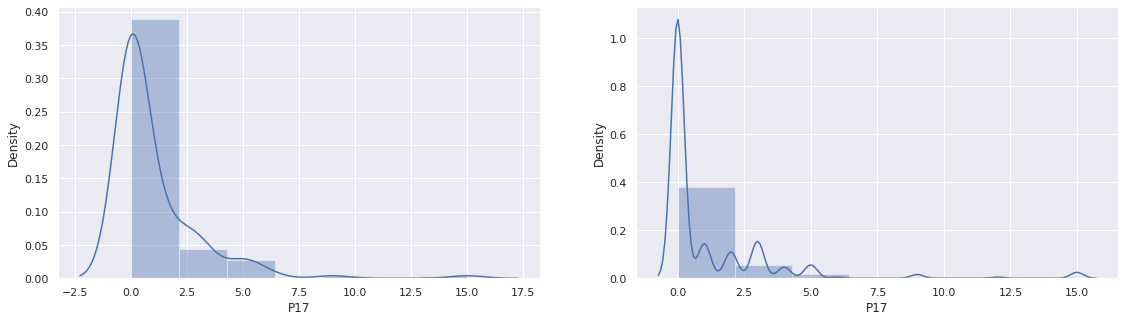

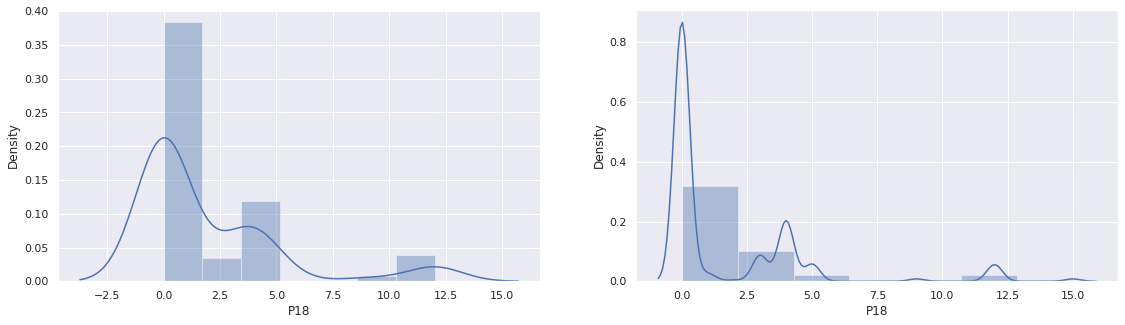

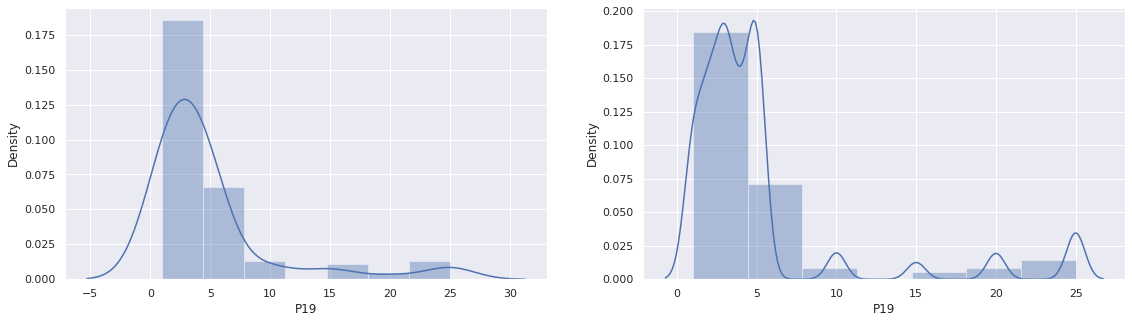

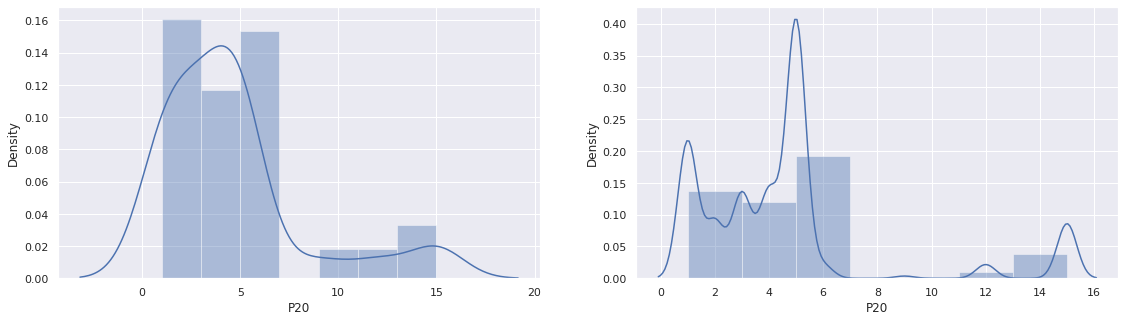

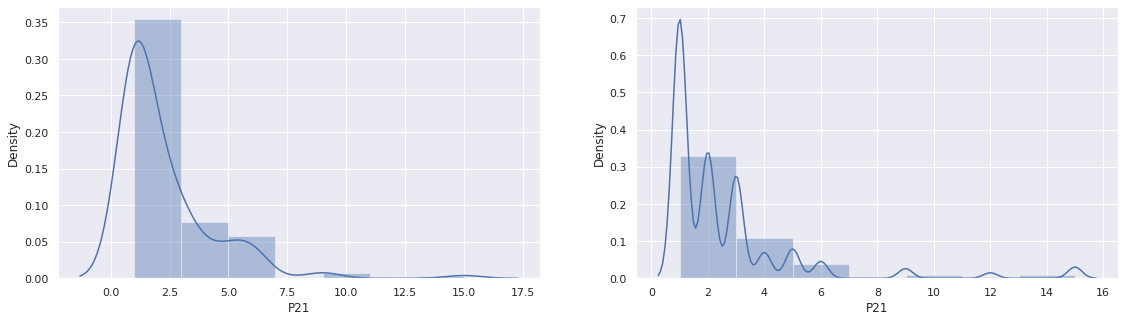

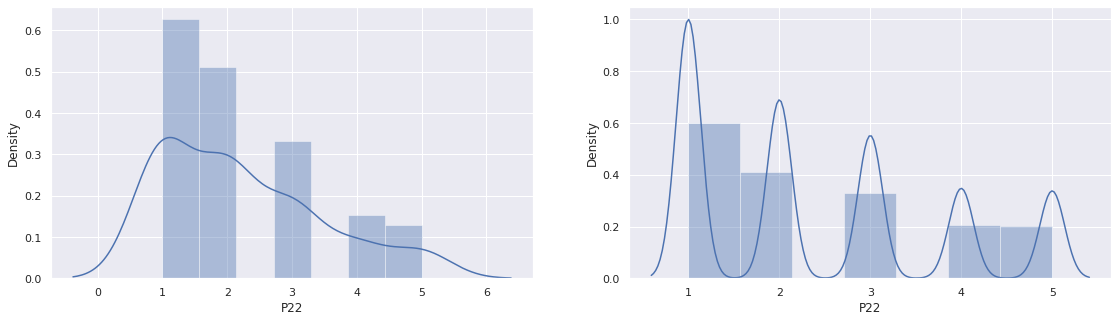

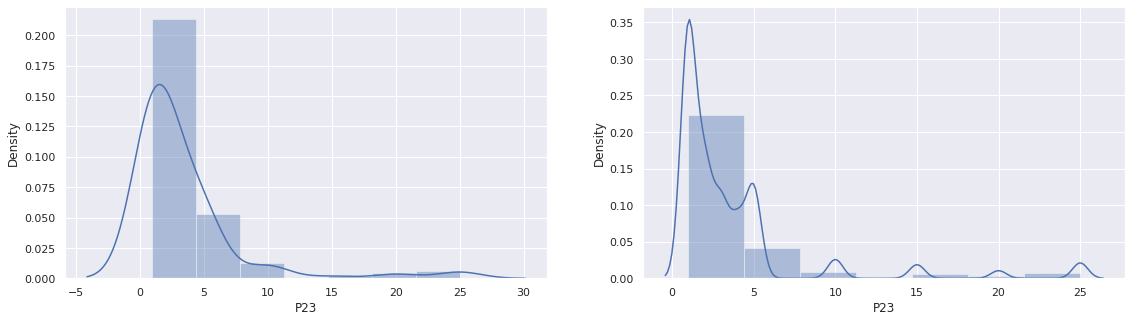

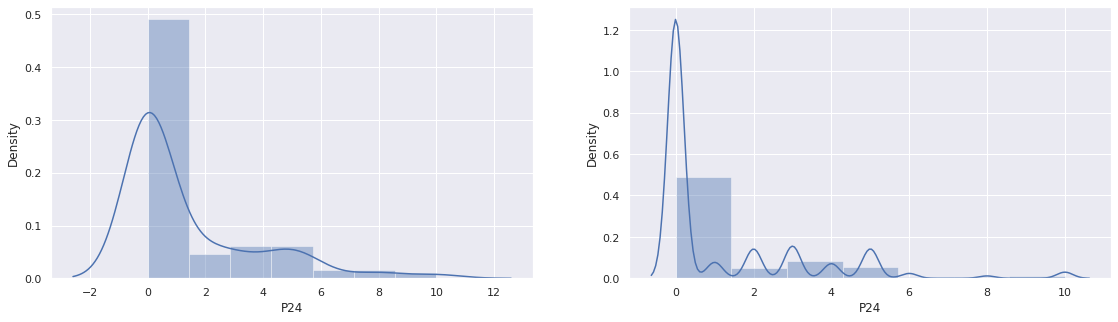

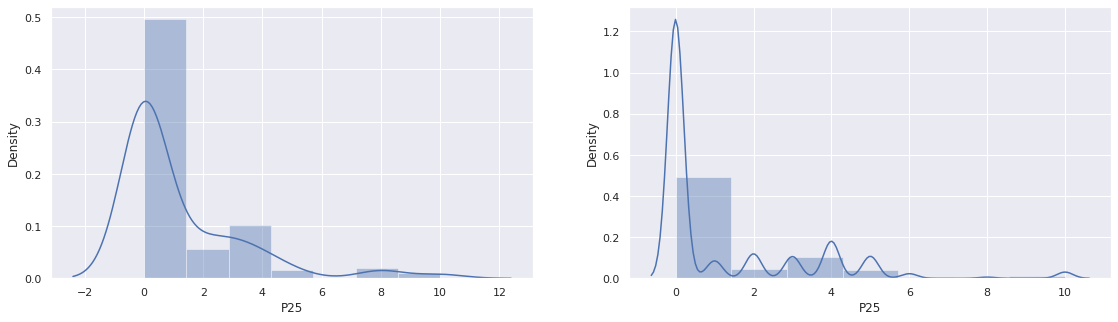

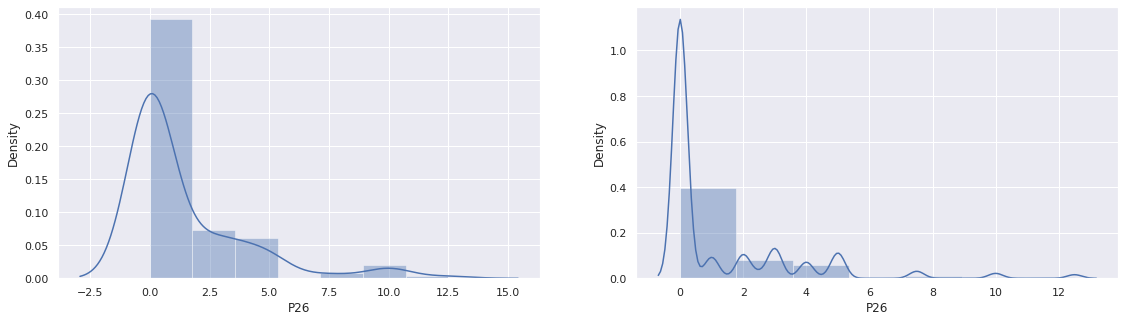

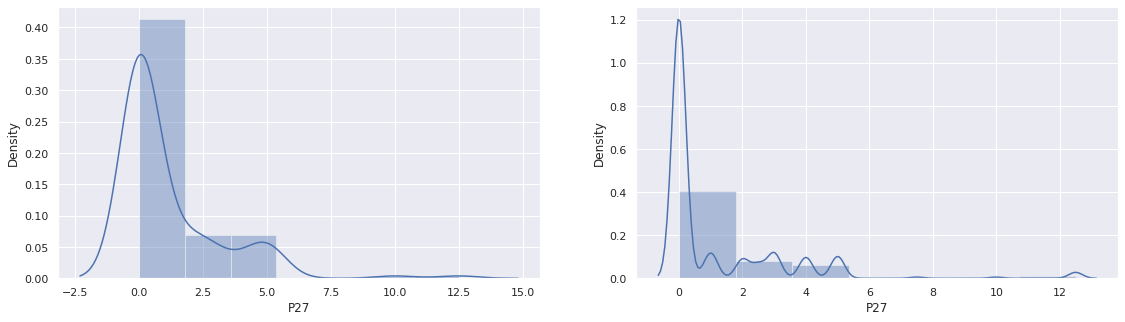

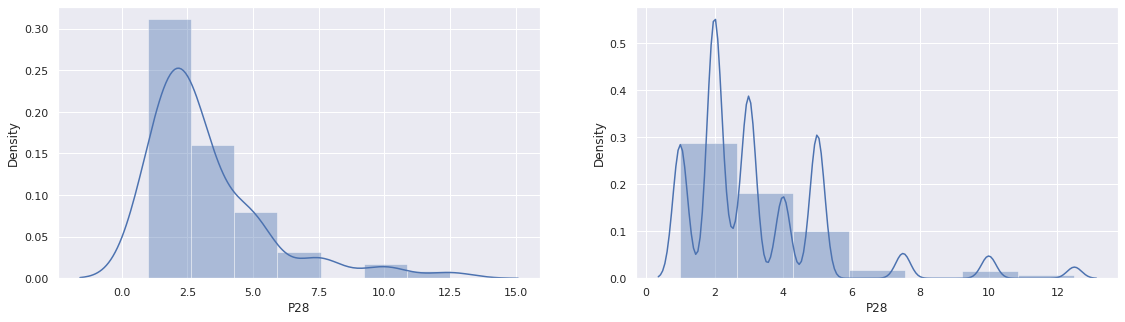

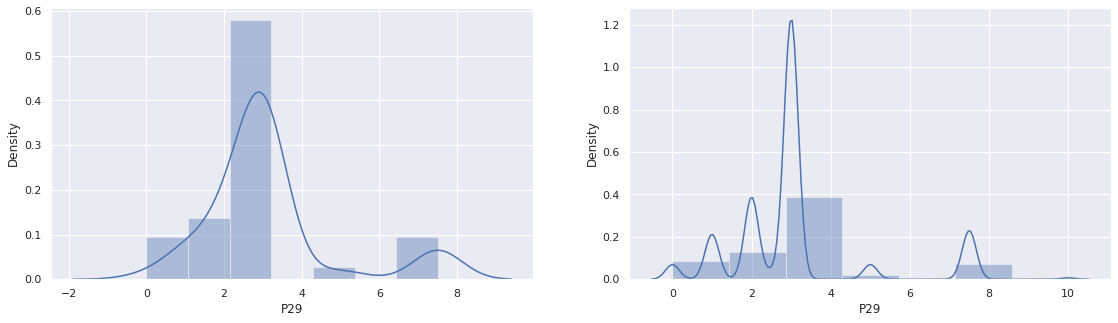

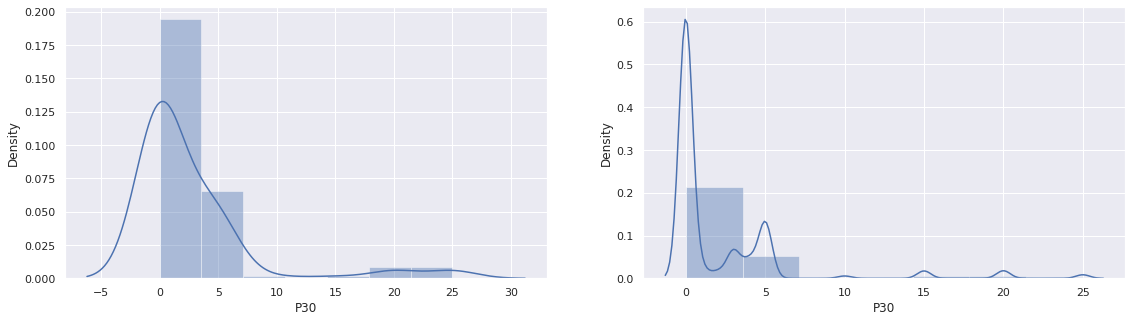

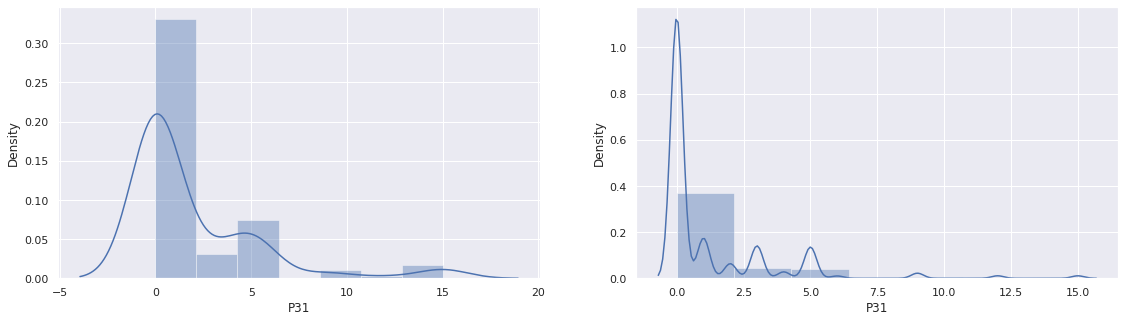

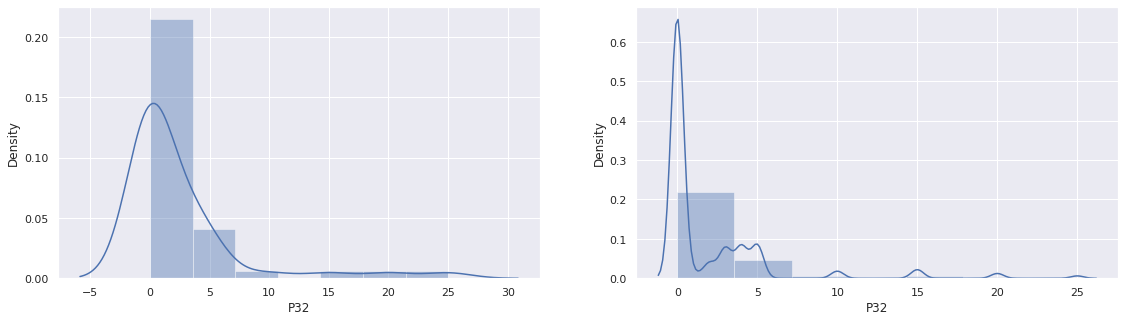

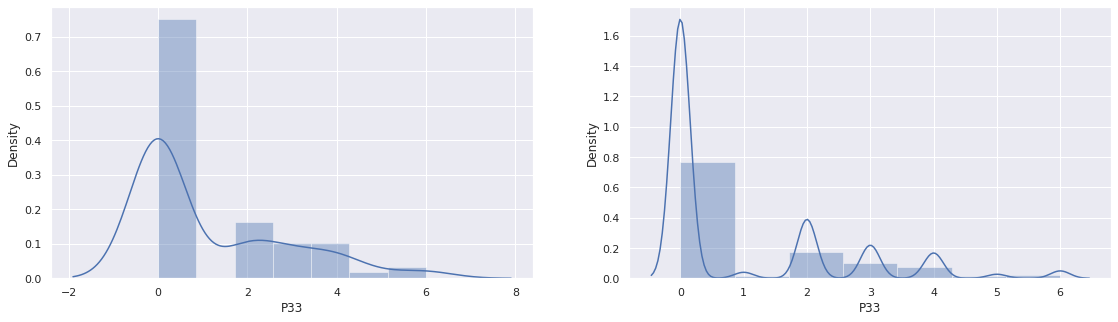

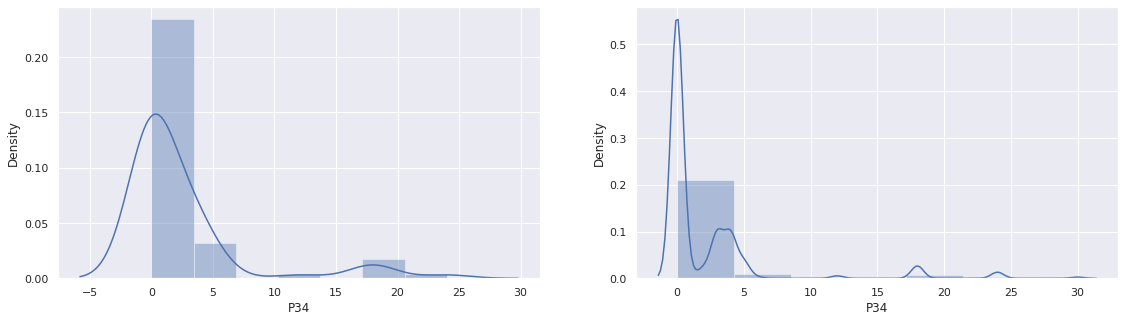

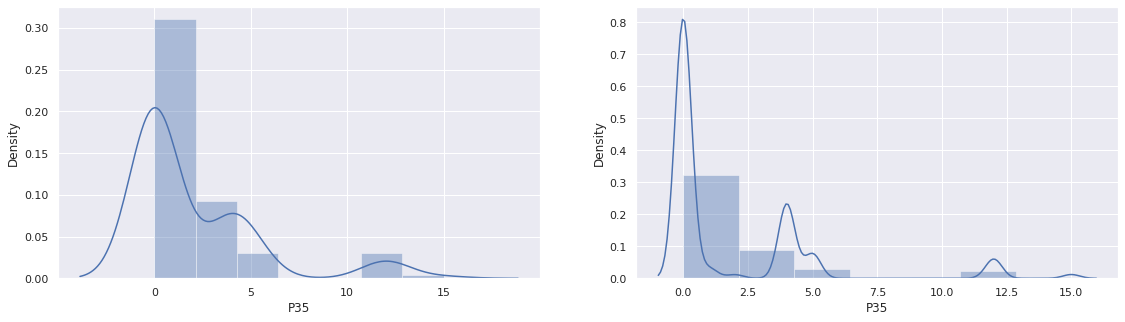

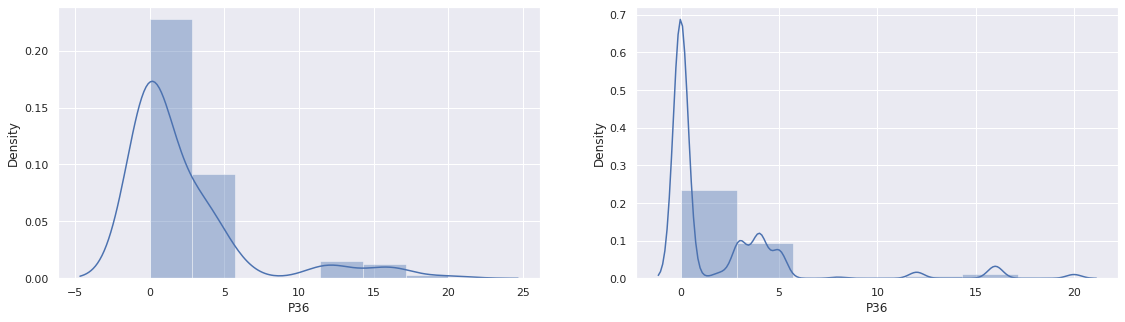

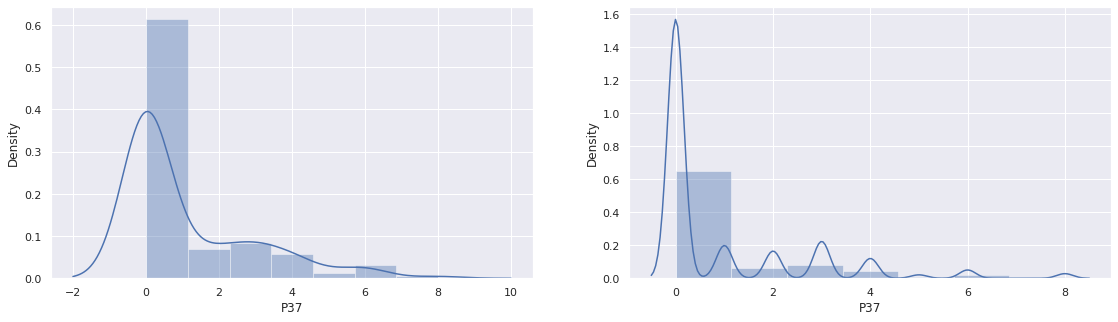

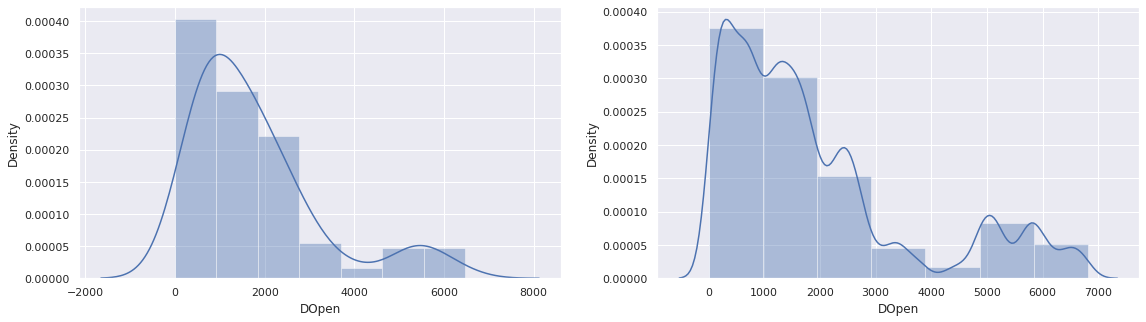

In [ ]:
plt.rc('figure', max_open_warning = 0)
for i in cols_num:
    fig, ax = plt.subplots(1,2, figsize=(19, 5))
    g1 = sns.distplot(df_train[i], ax=ax[0], bins = 7)#, kde=False);
    g2 = sns.distplot(df_test[i], ax=ax[1], bins = 7)#, kde=False);
    fig.show()

P14-P18 all appear to be right hand decline curves - zero by actual be real. P24-P27 similar appearance

In [ ]:
def hist_box(data, feature, figsize=(12, 7), drop = -99999):

    # Subplot canvas
    fig, (ax_box, ax_hist) = plt.subplots(nrows = 2, sharex = True, gridspec_kw = {"height_ratios": (0.25, 0.75)}, figsize = figsize)

    # Boxplot on top
    sns.boxplot(data = data[data[feature] != drop], x = feature, ax = ax_box, showmeans = True, color = "pink")  # boxplot will be created and a star will indicate the mean value of the column
    
    # Histogram on bottom
    sns.histplot(data = data[data[feature] != drop], x = feature, ax = ax_hist, kde = True) # histogram will be created and

    # Add mean and median to histogram
    ax_hist.axvline(data[feature][data[feature] != drop].mean(), color = "green") # mean
    ax_hist.axvline(data[feature][data[feature] != drop].median(), color = "orange") # median

    # Title
    fig.suptitle("Distribution of " + feature, fontsize=16)

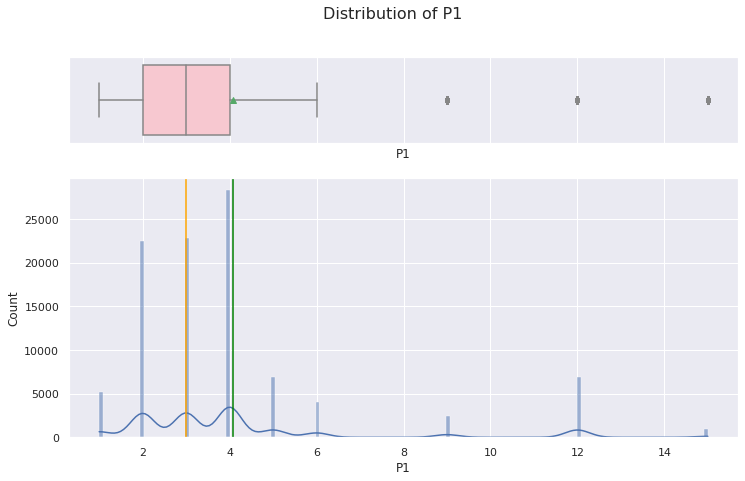

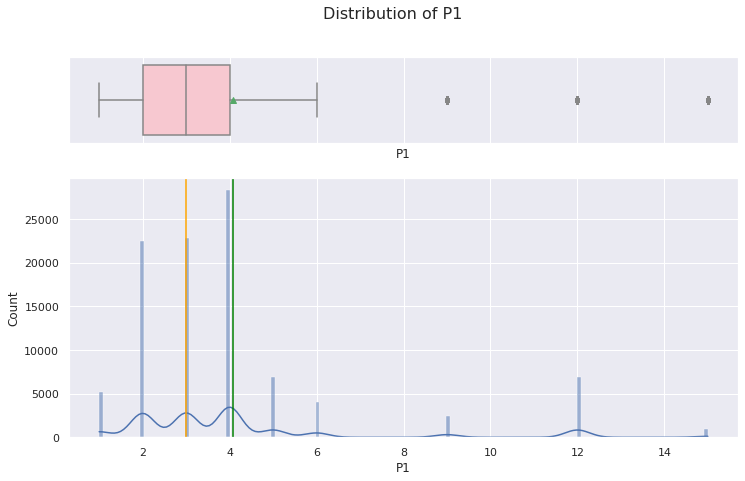

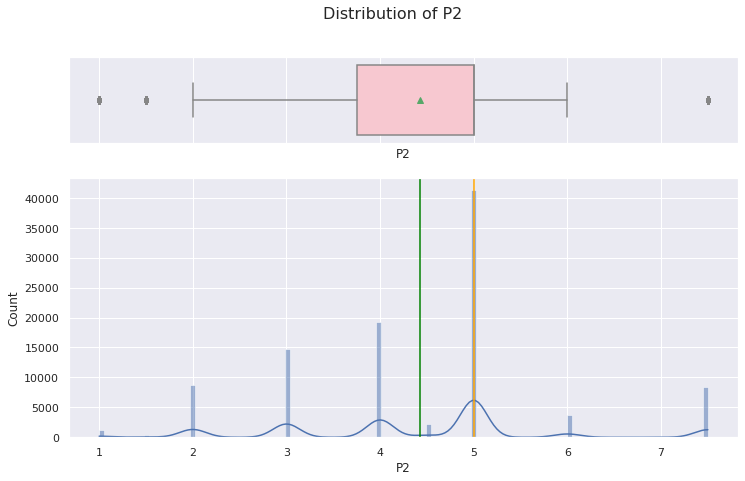

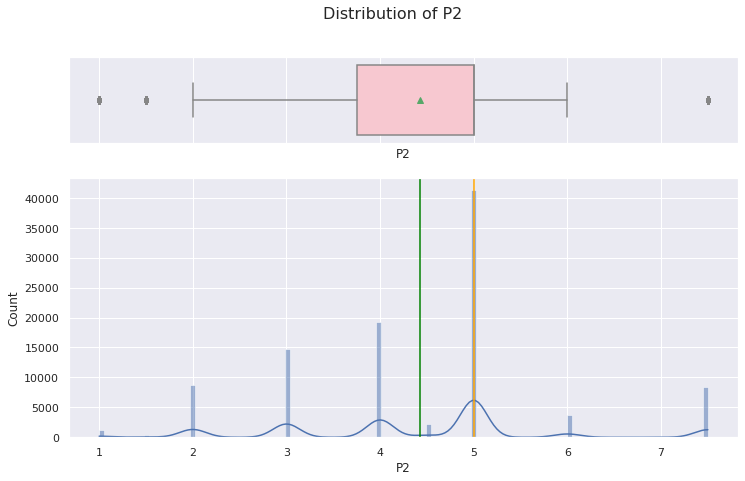

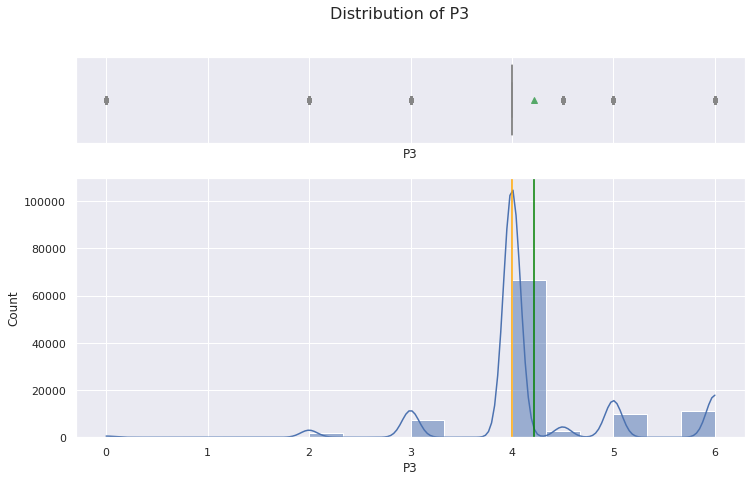

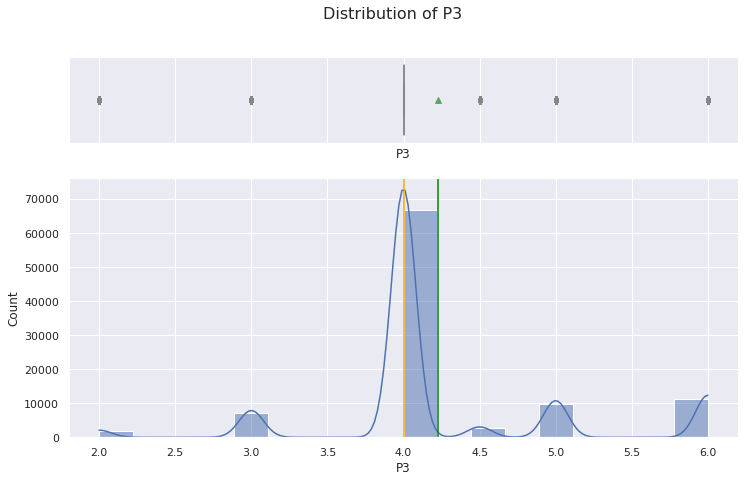

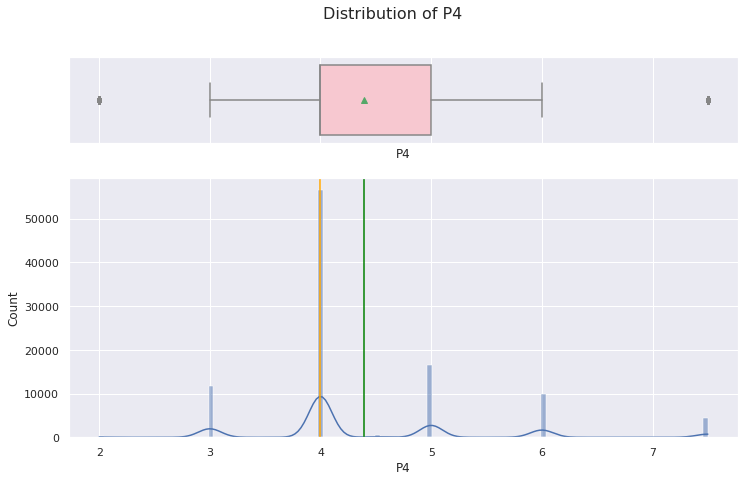

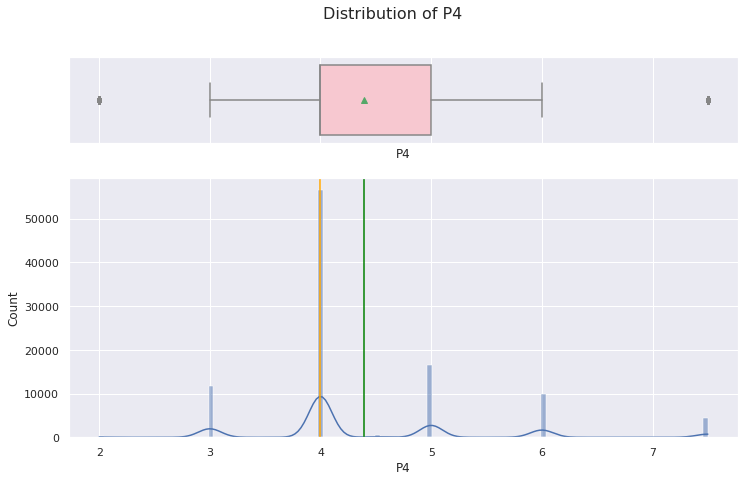

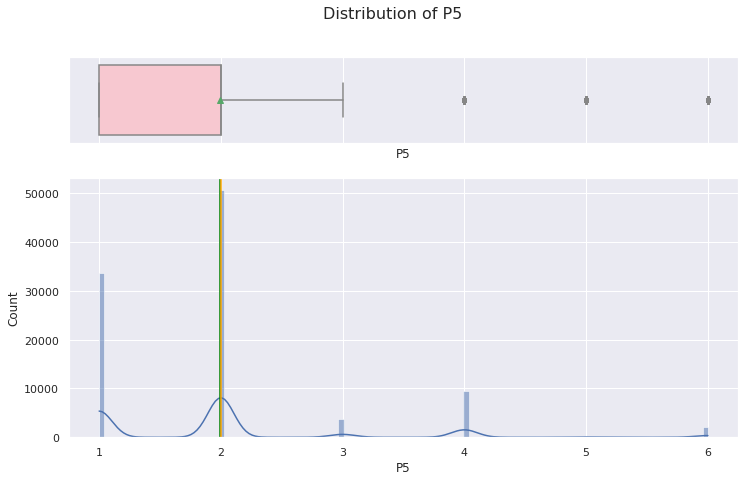

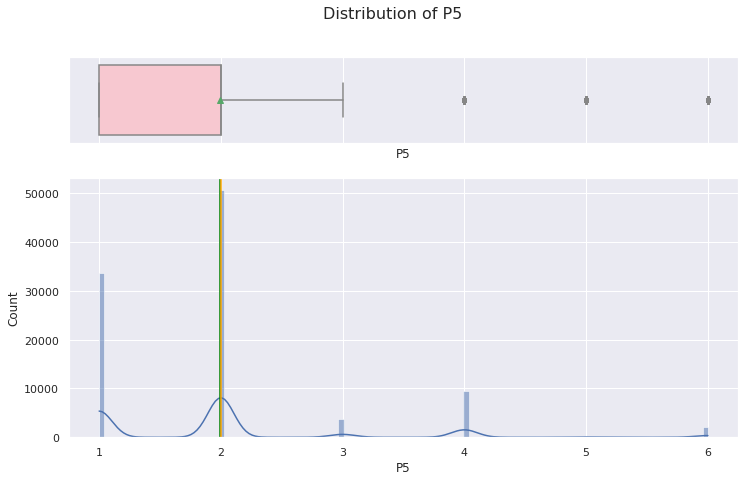

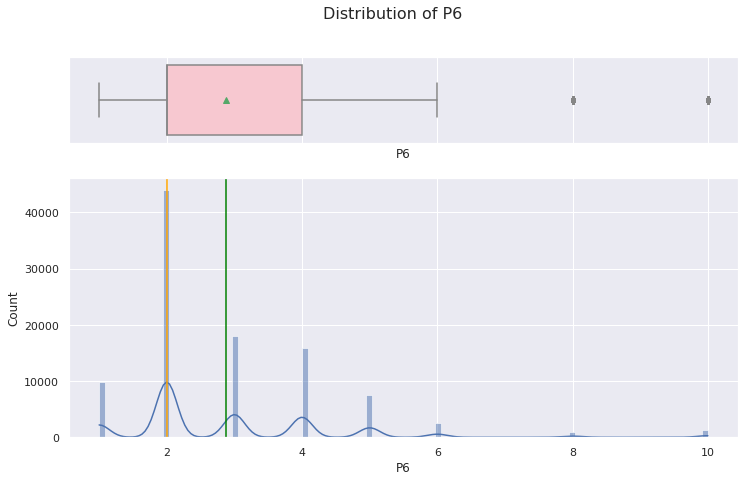

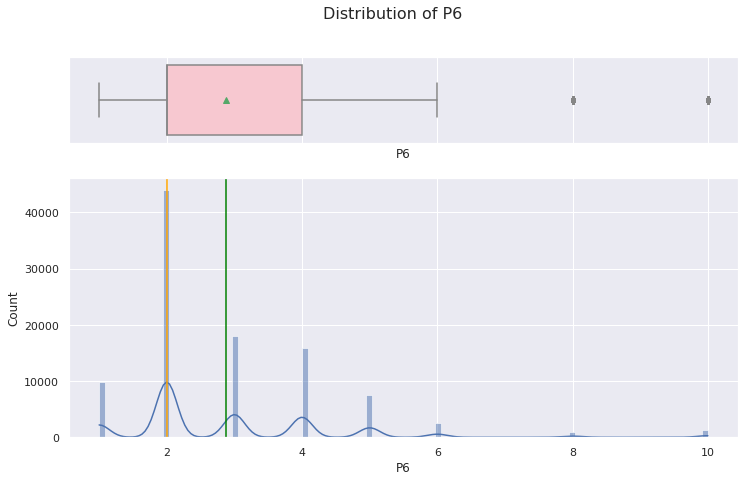

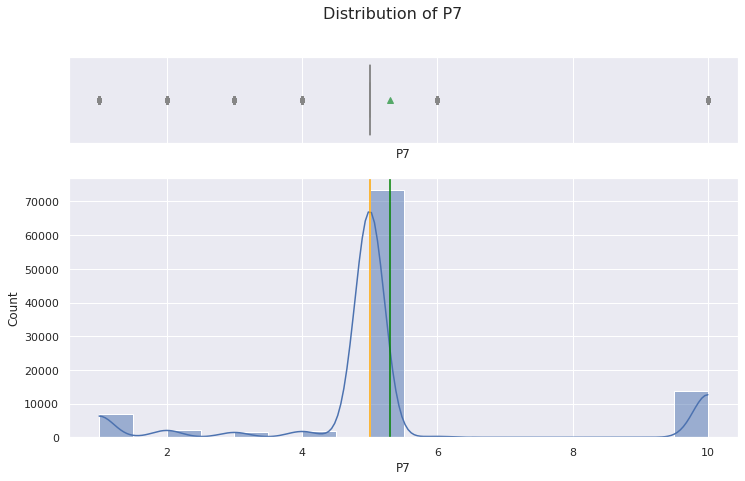

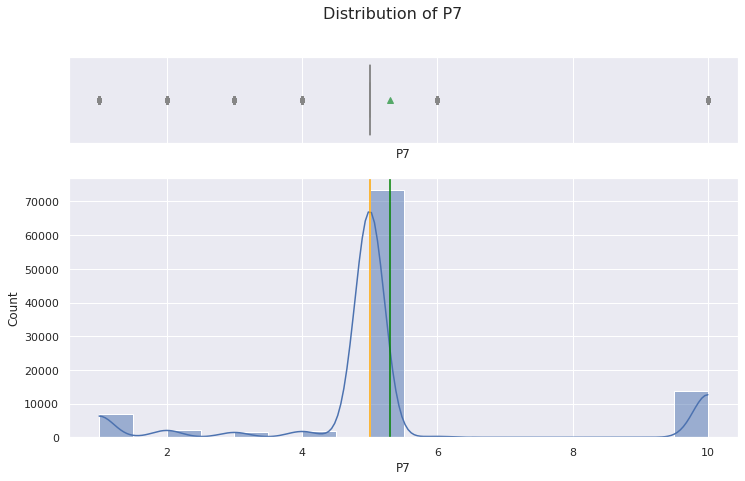

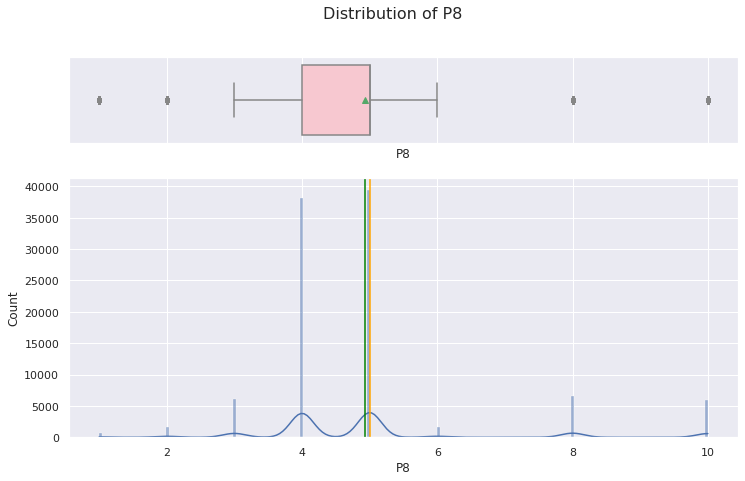

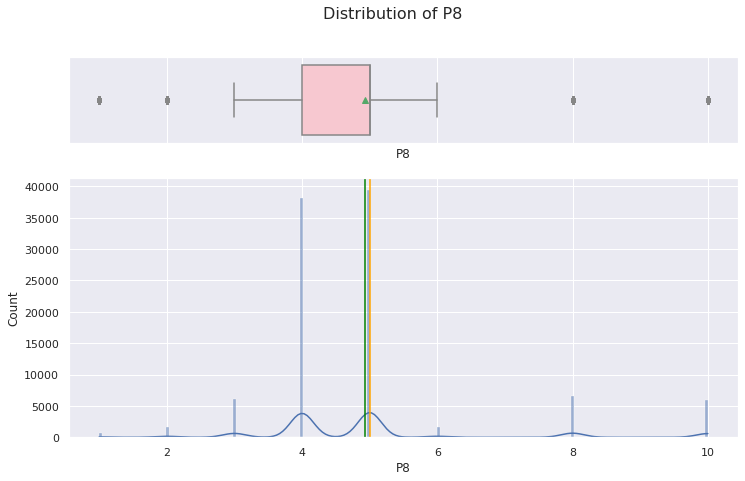

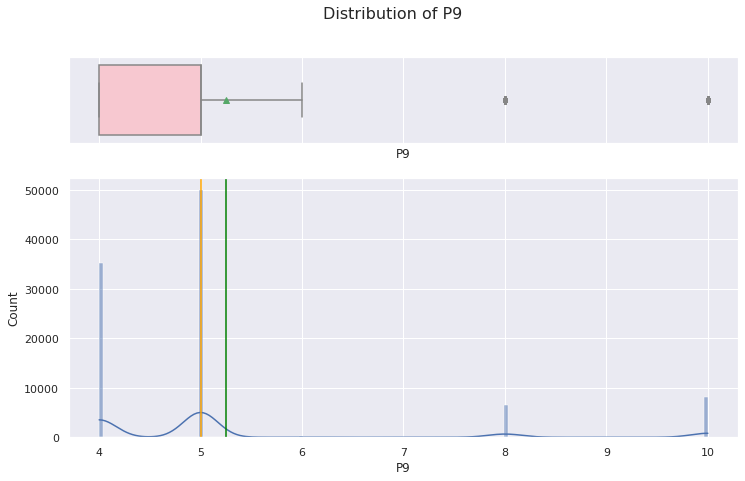

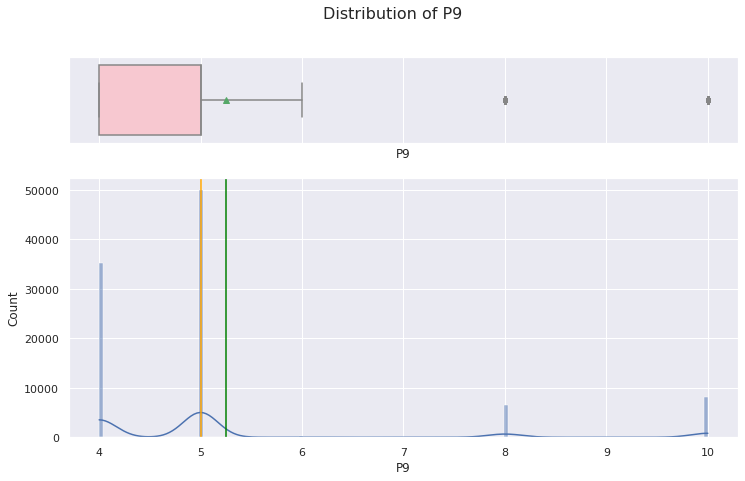

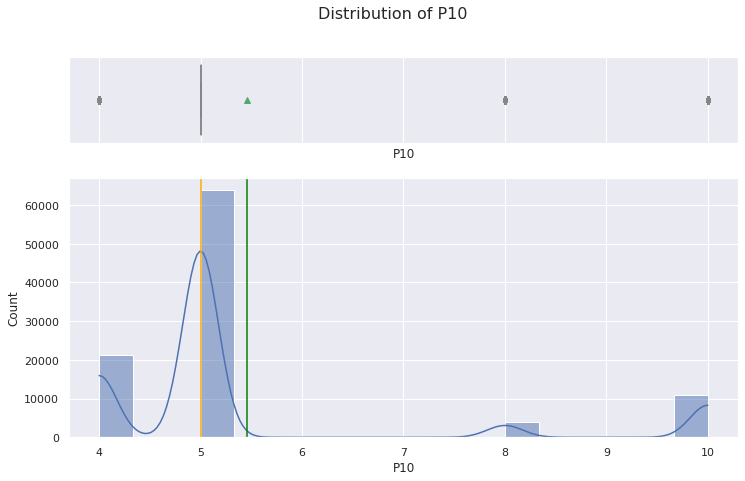

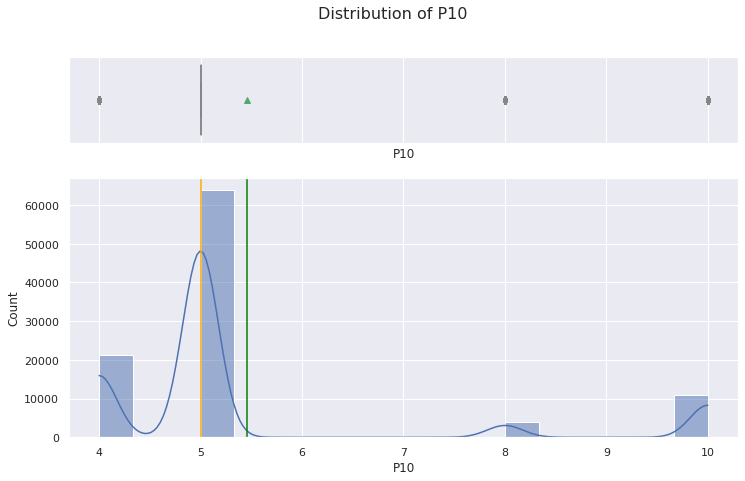

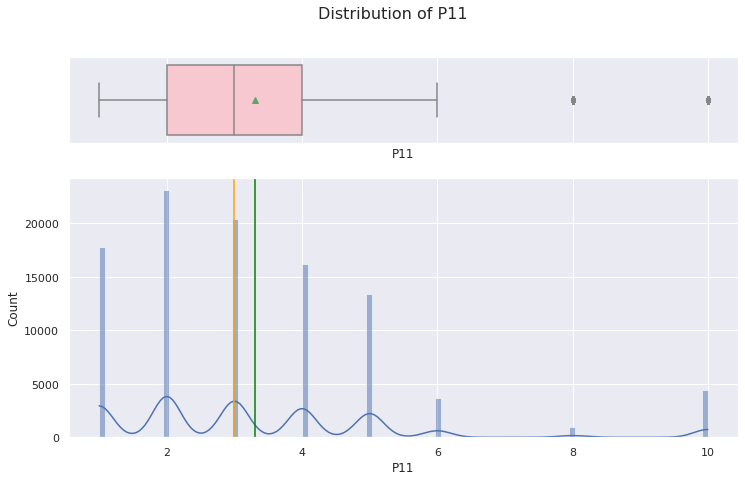

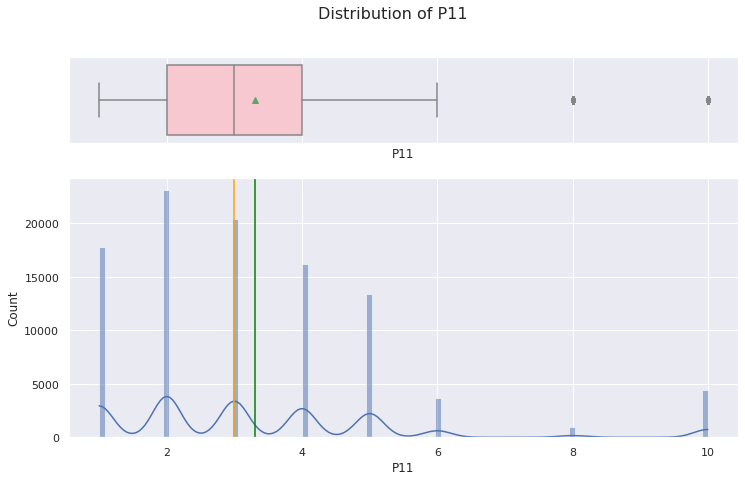

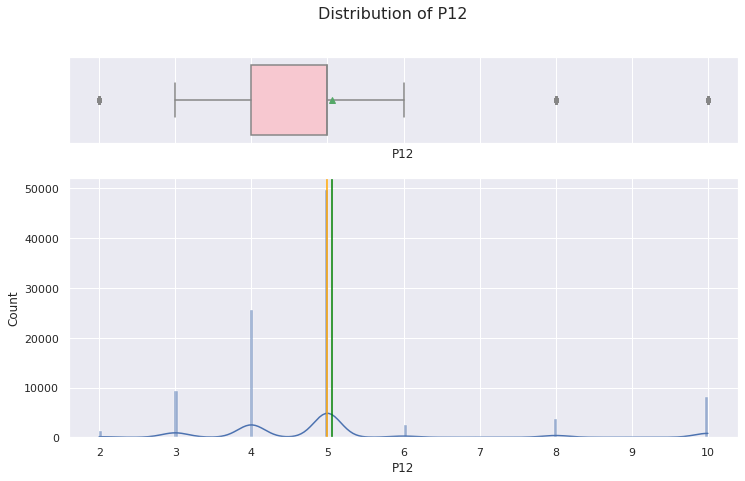

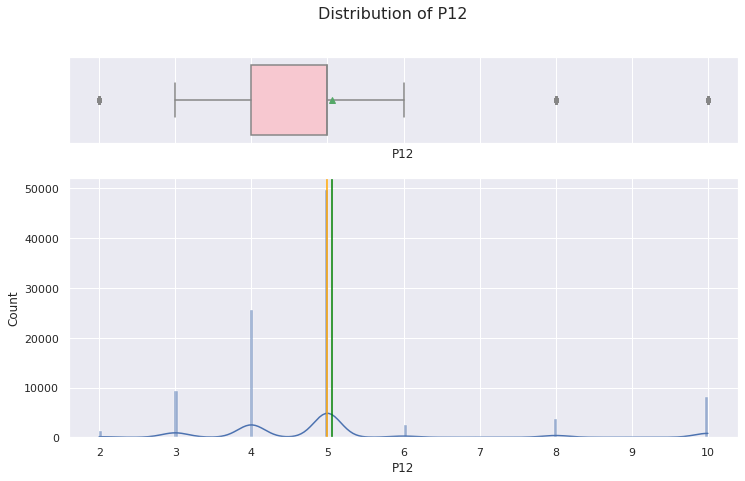

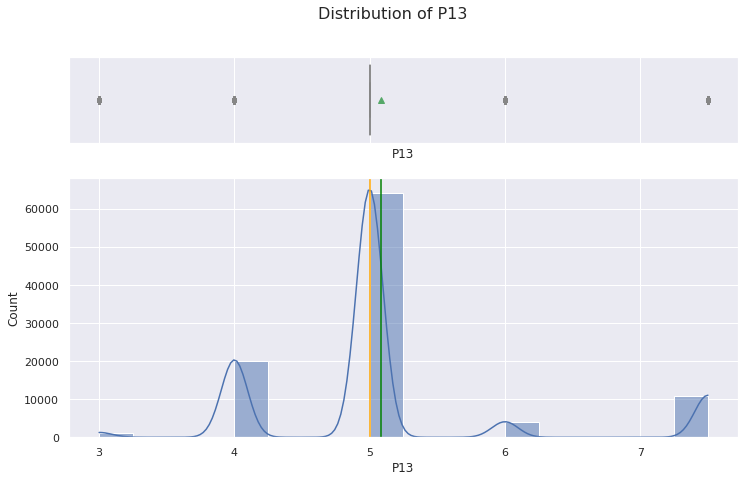

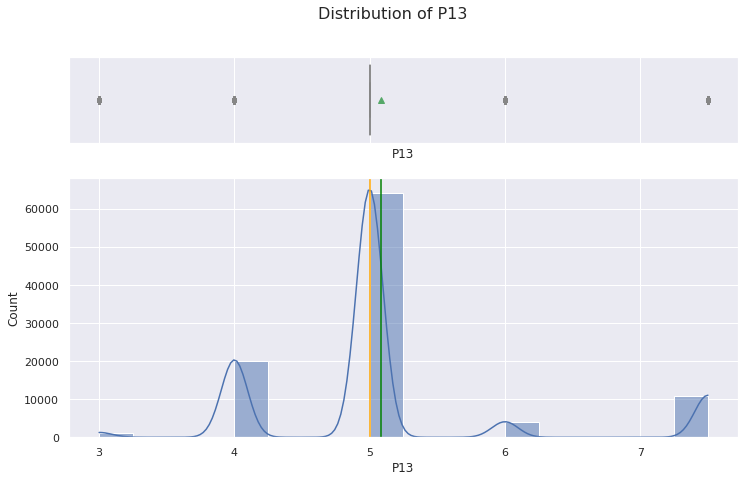

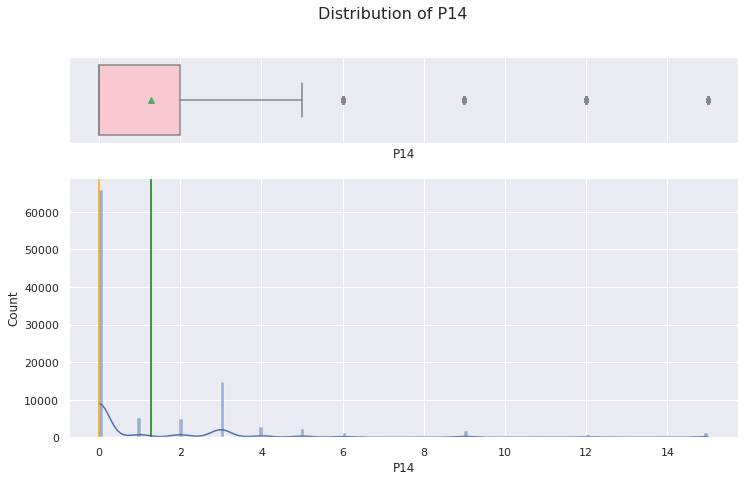

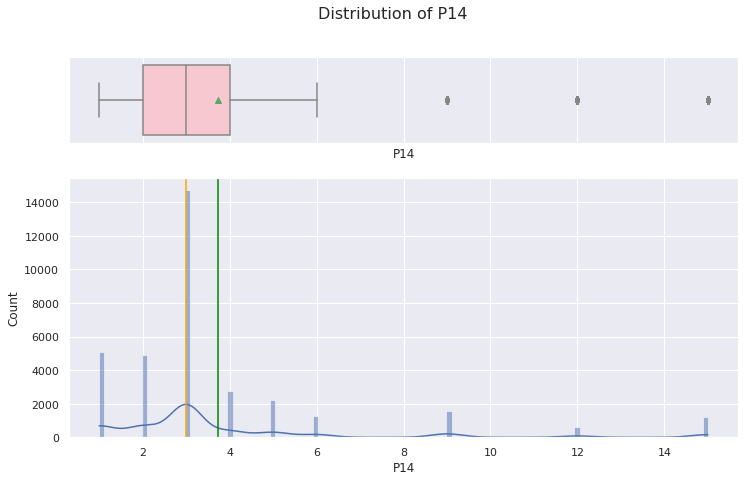

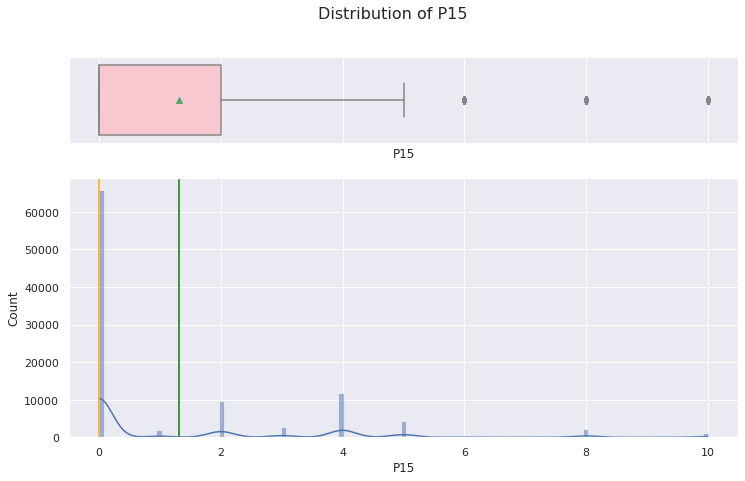

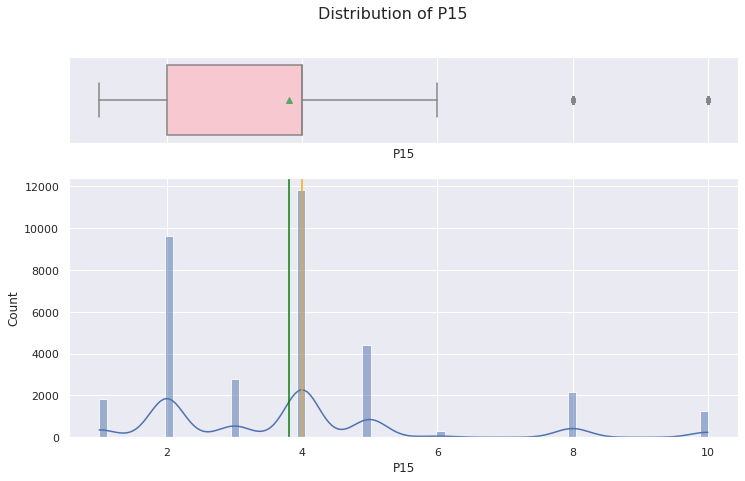

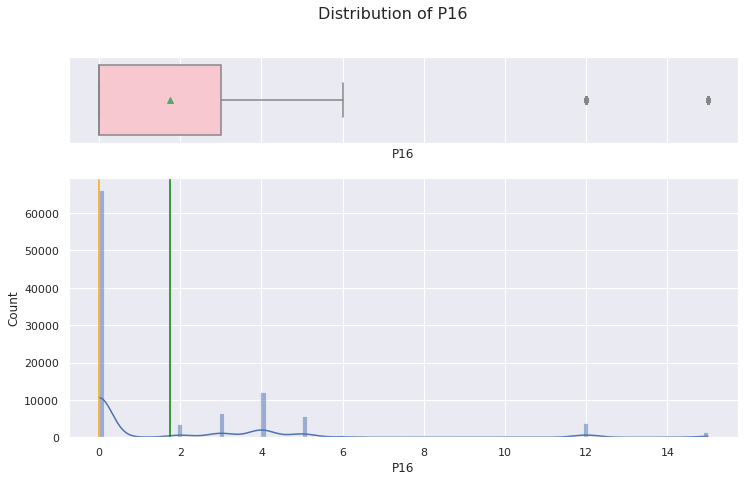

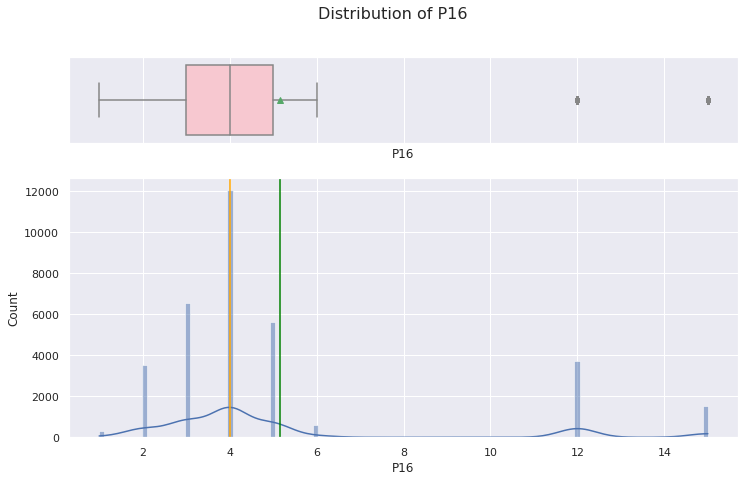

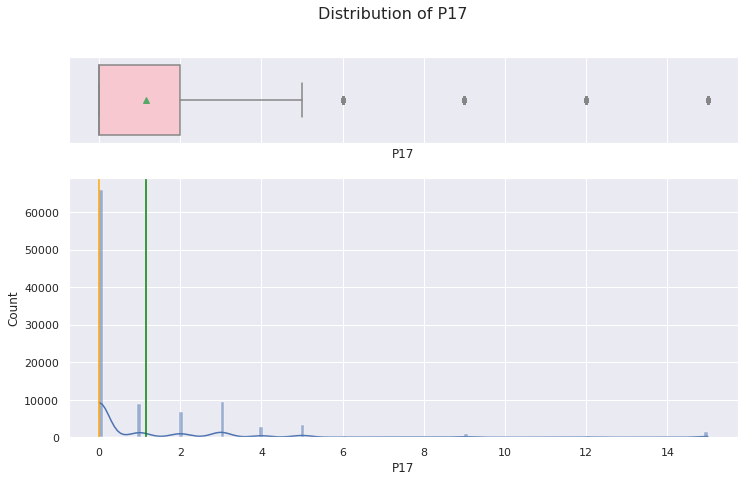

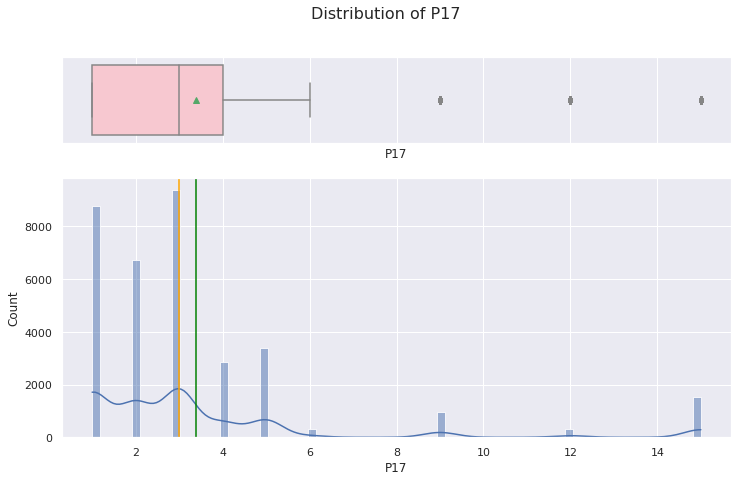

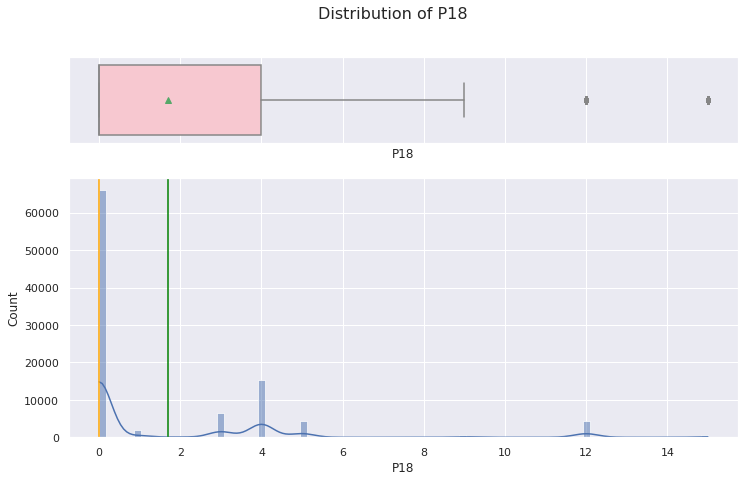

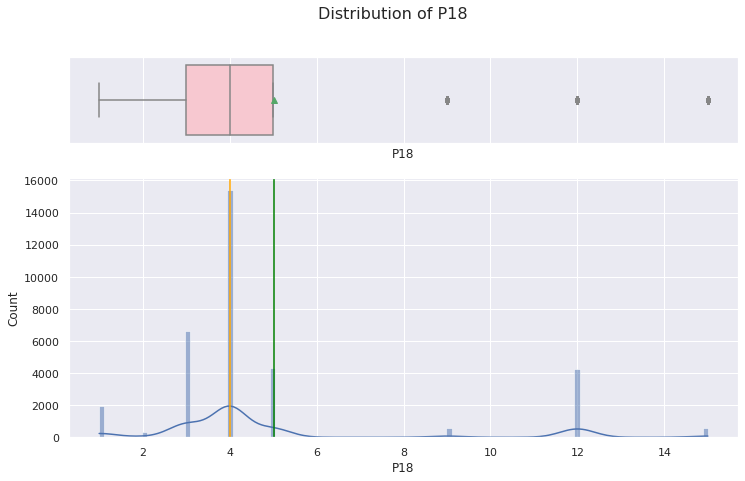

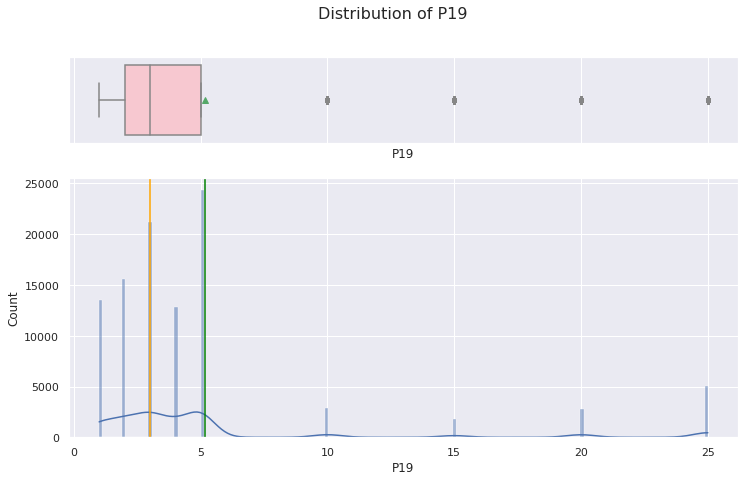

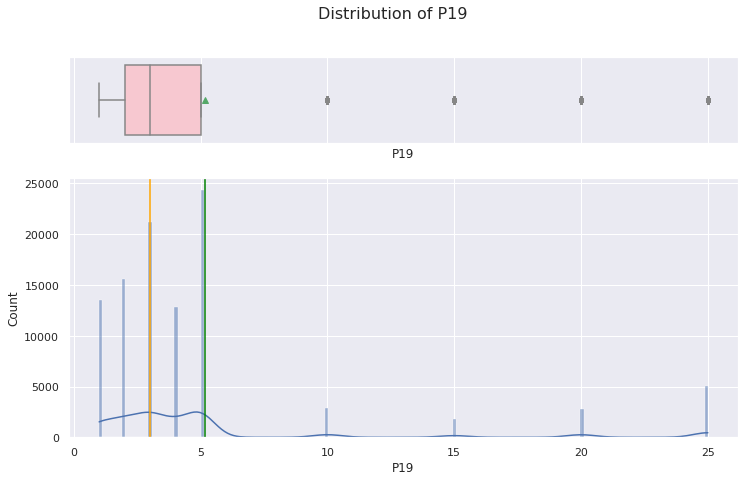

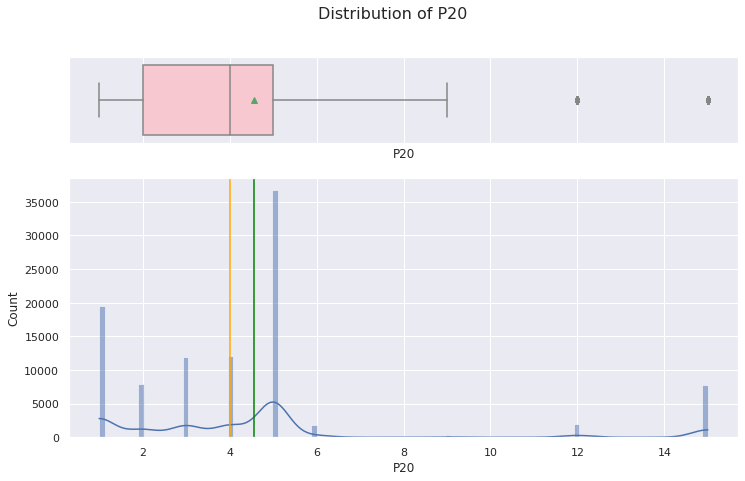

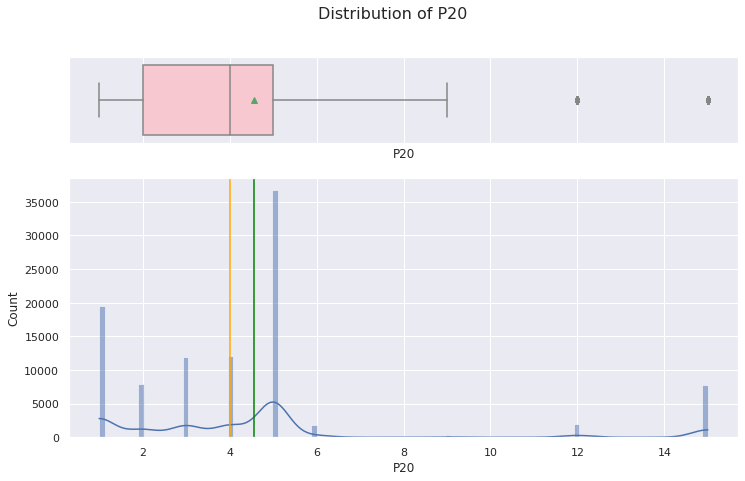

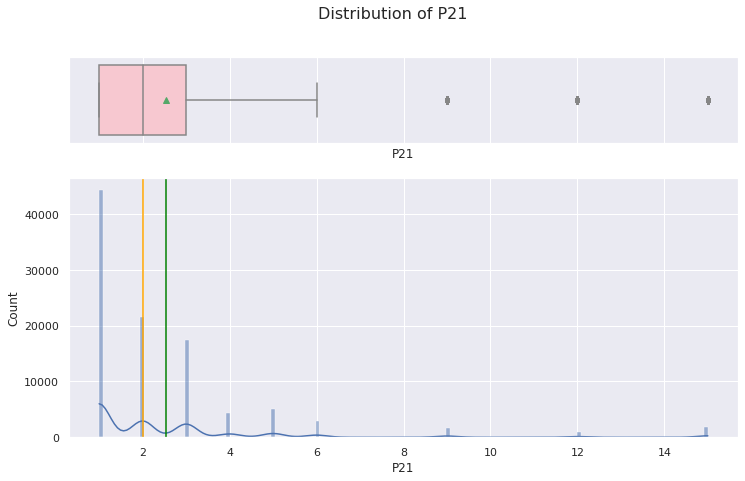

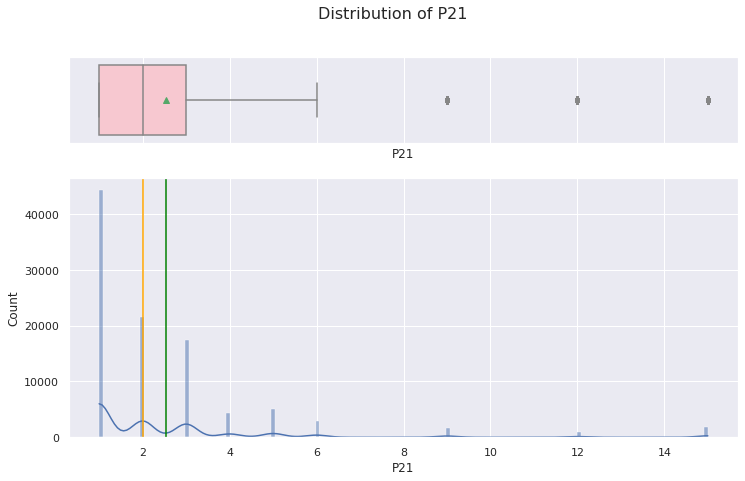

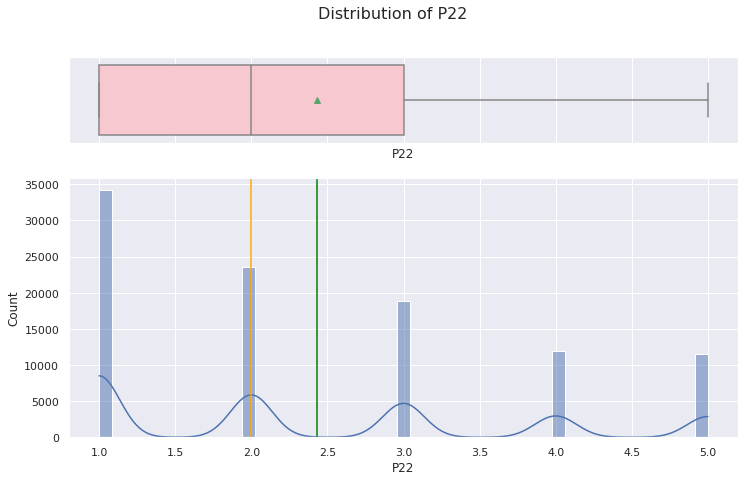

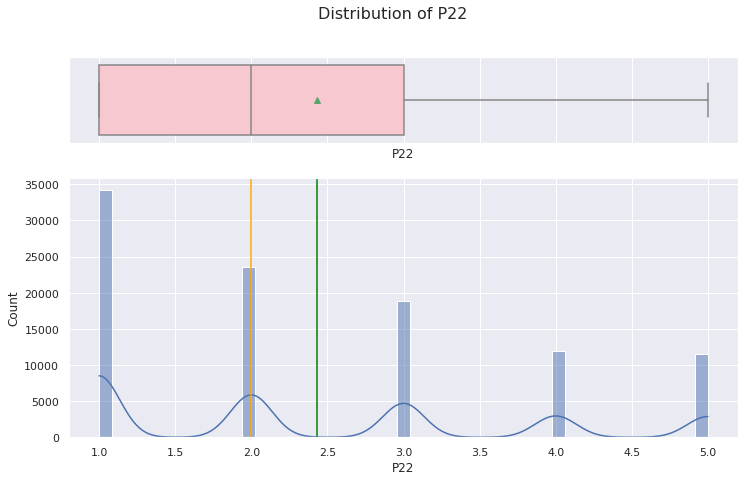

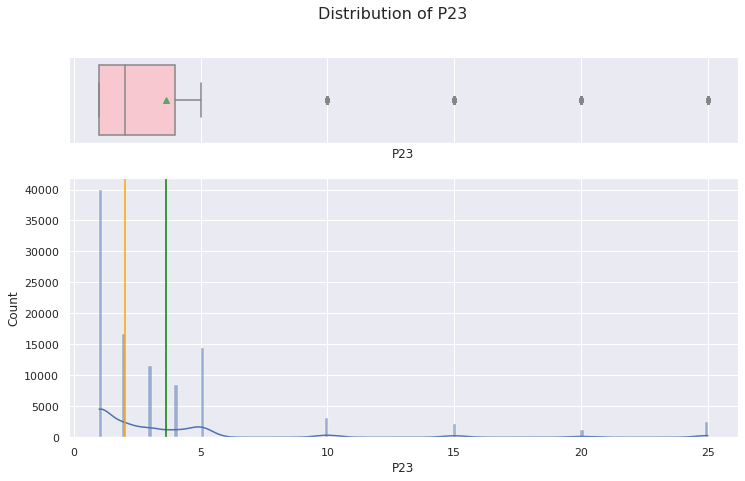

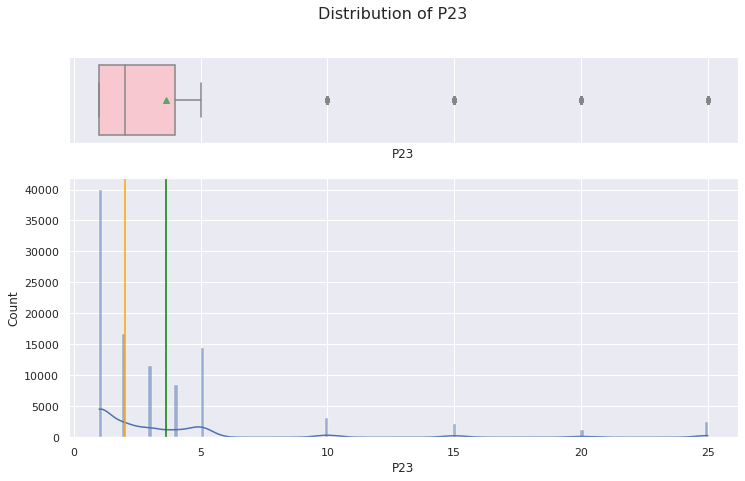

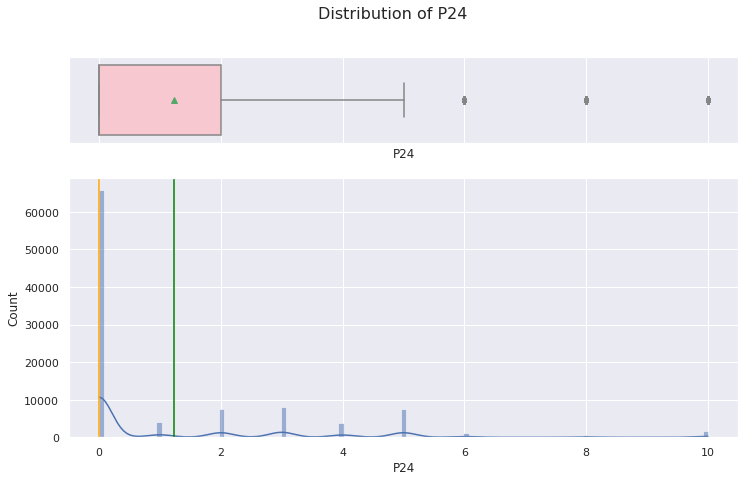

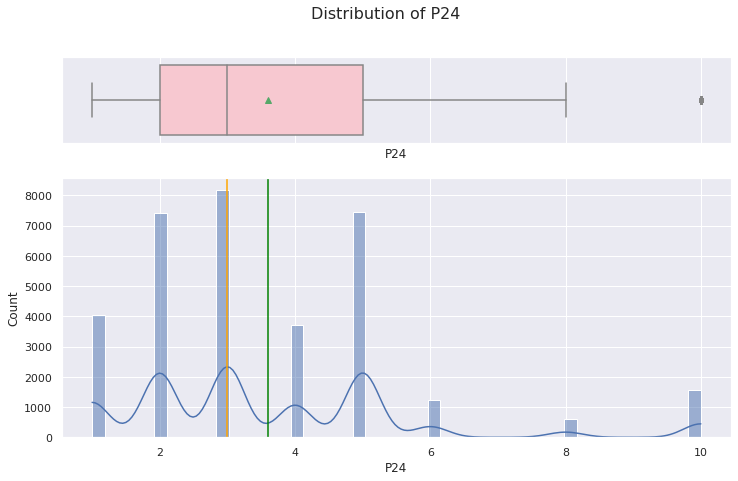

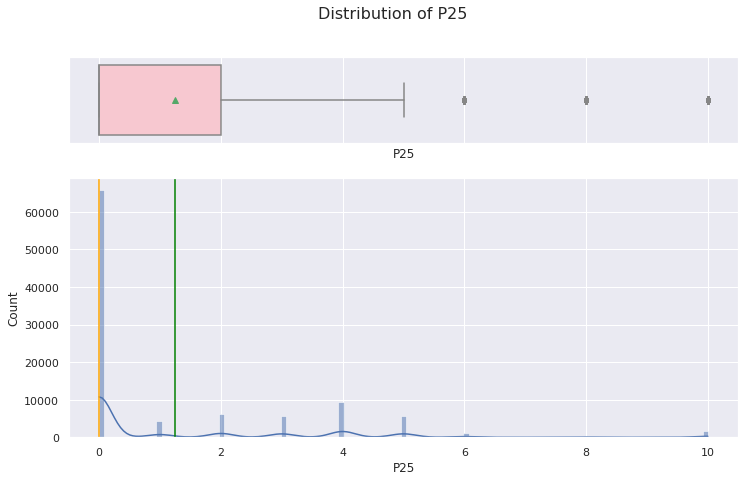

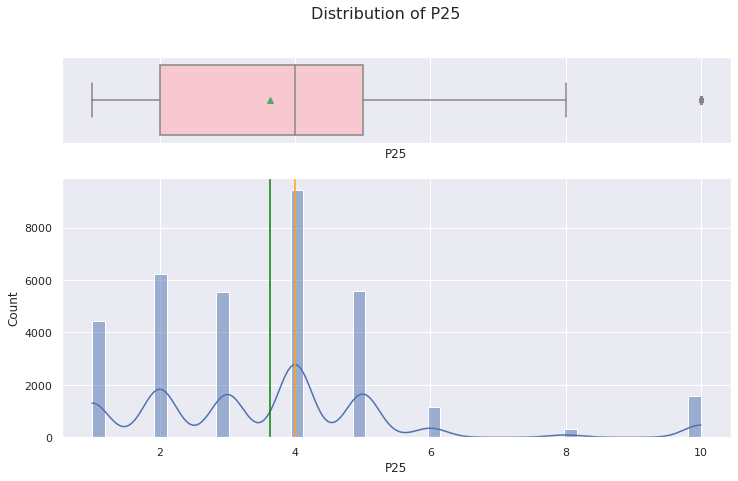

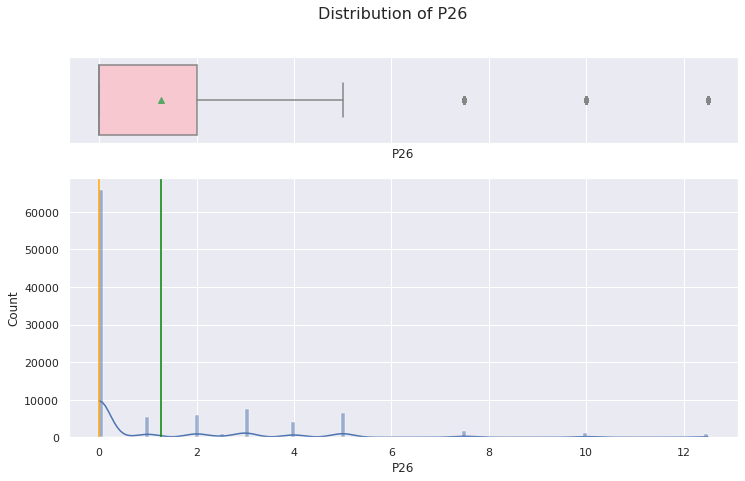

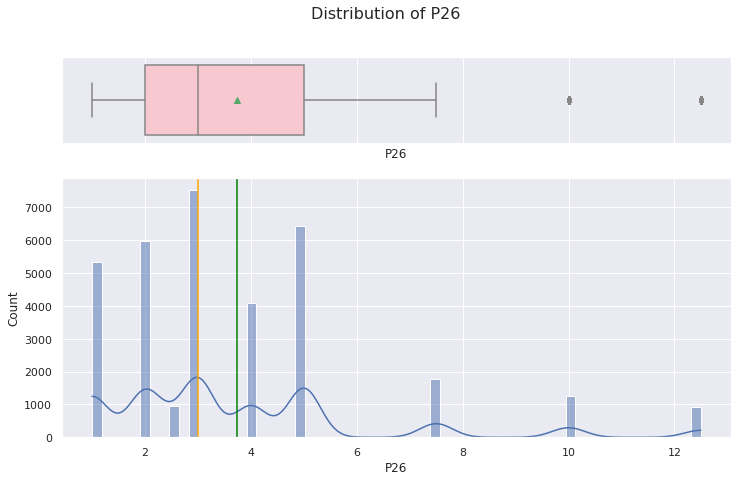

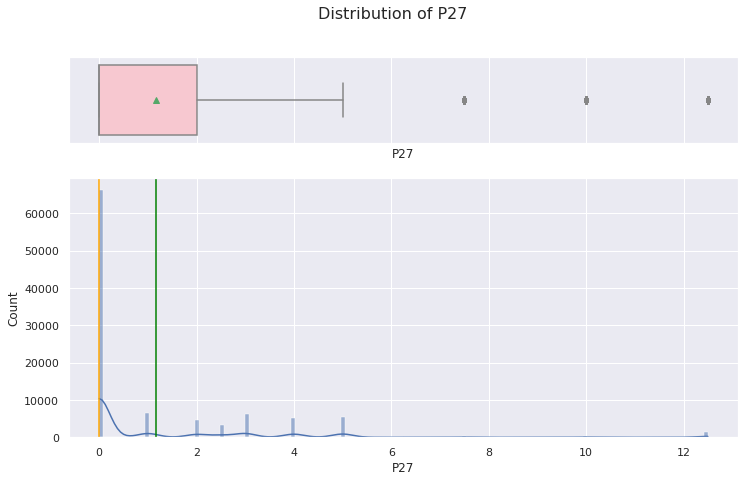

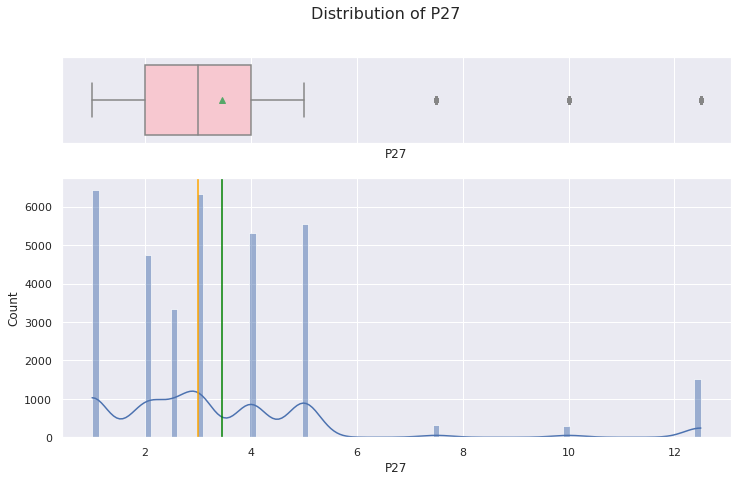

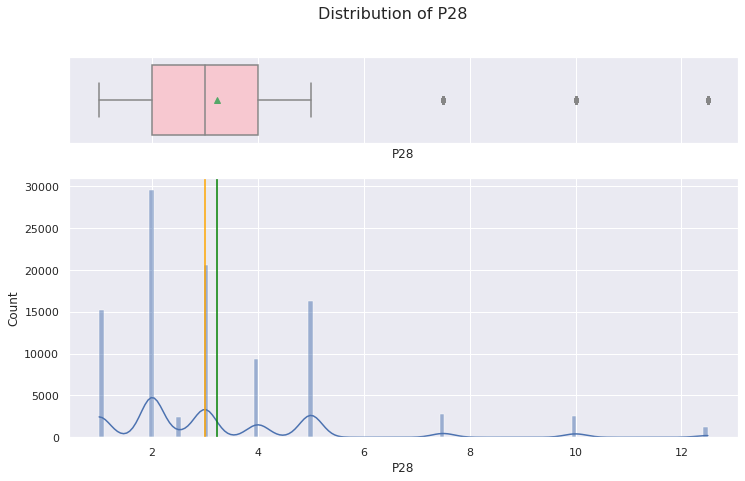

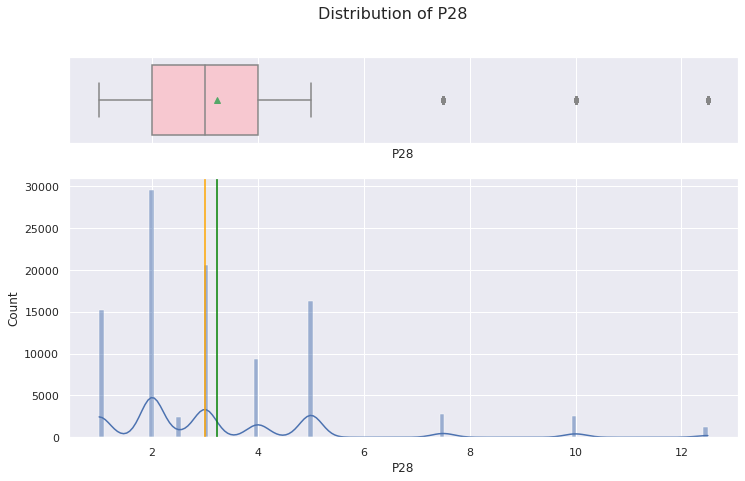

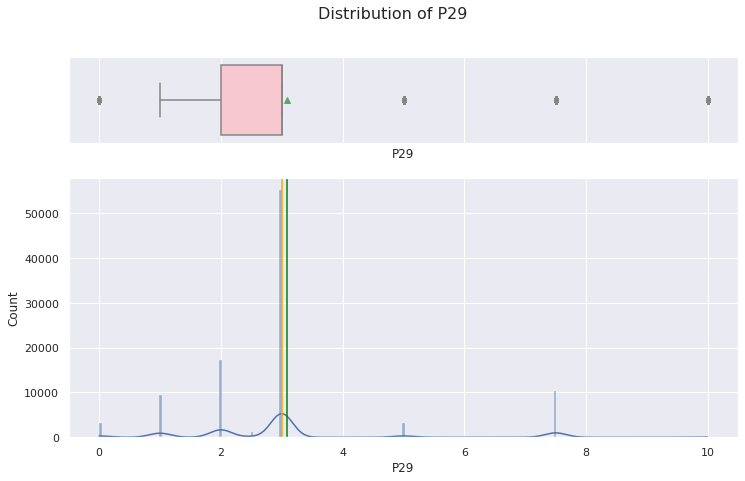

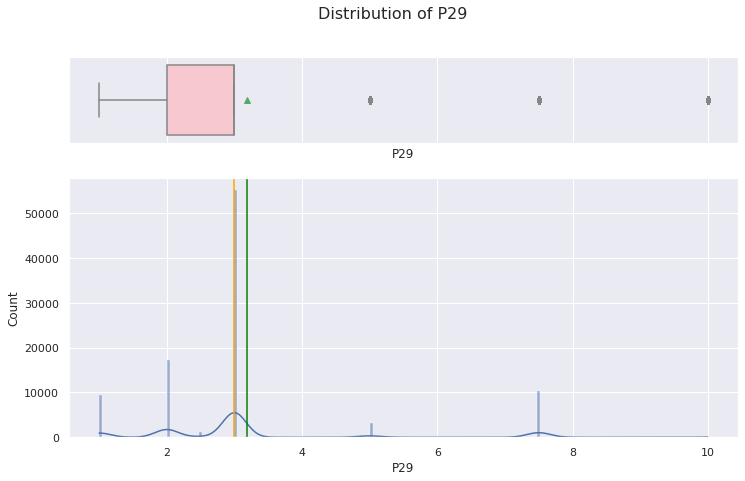

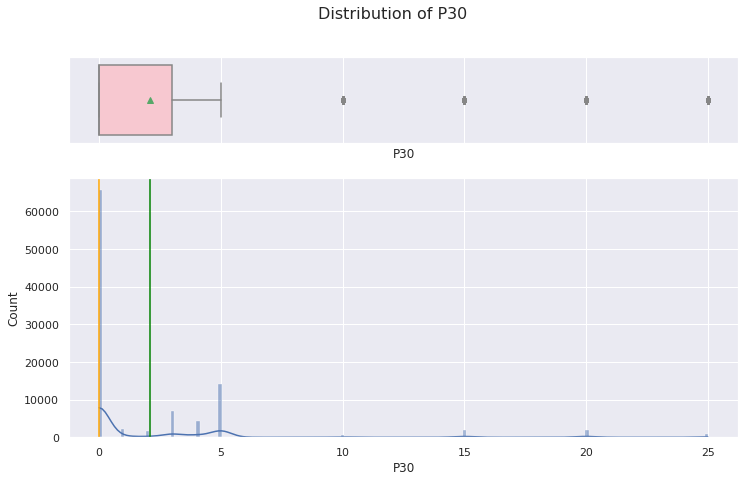

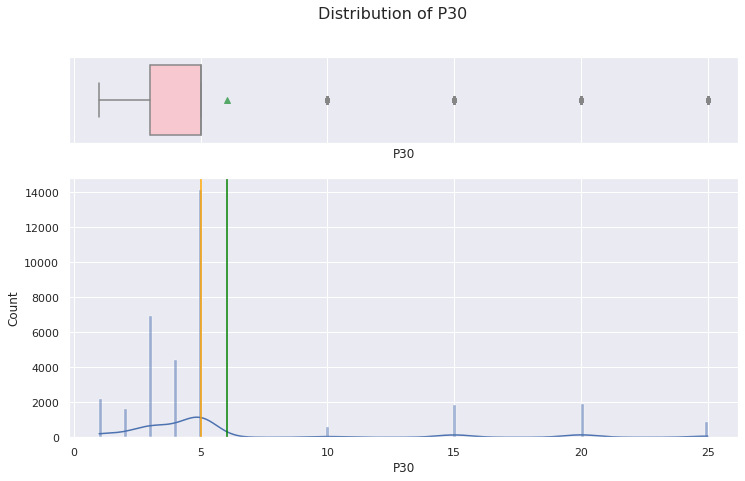

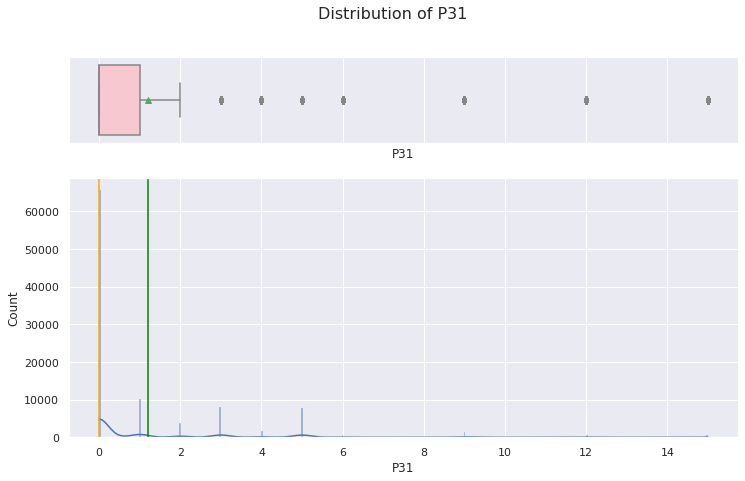

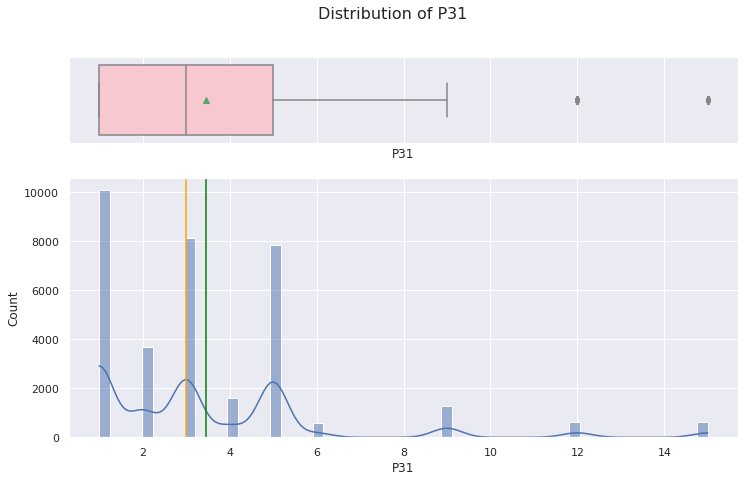

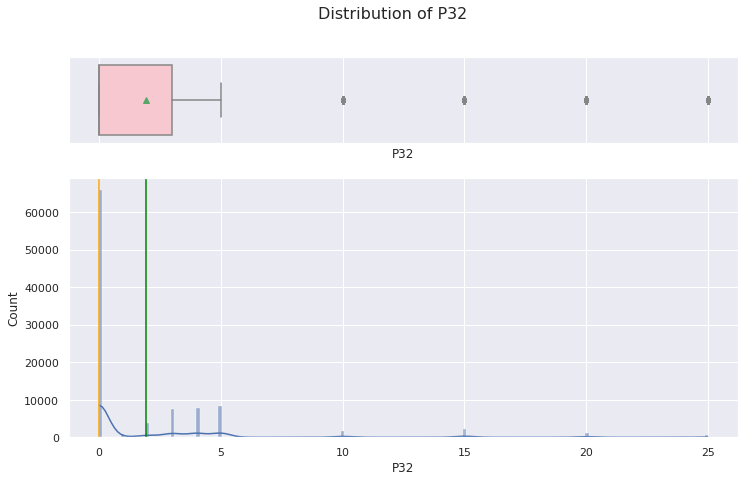

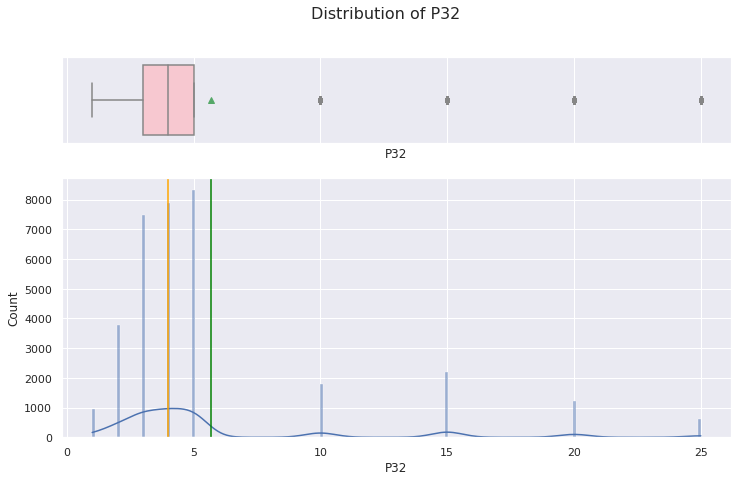

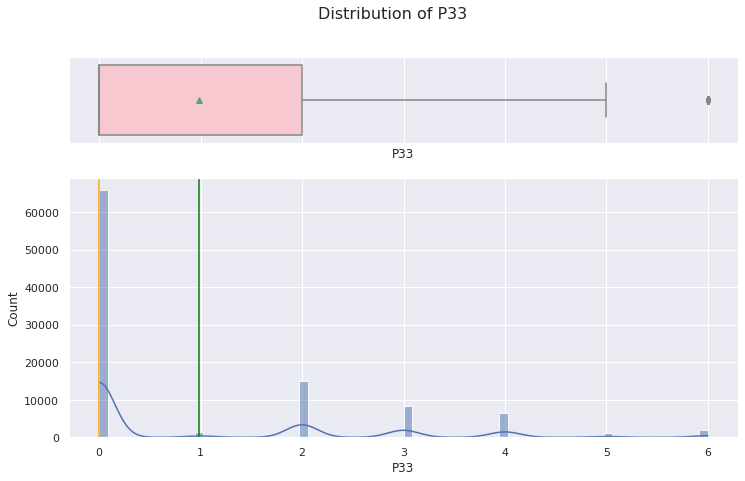

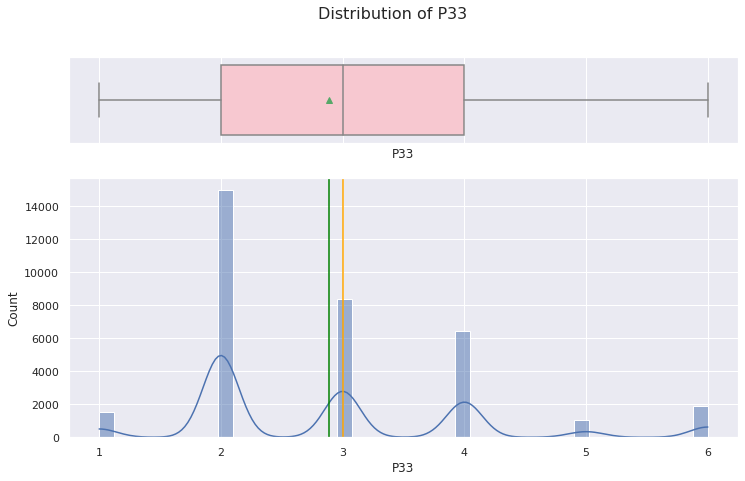

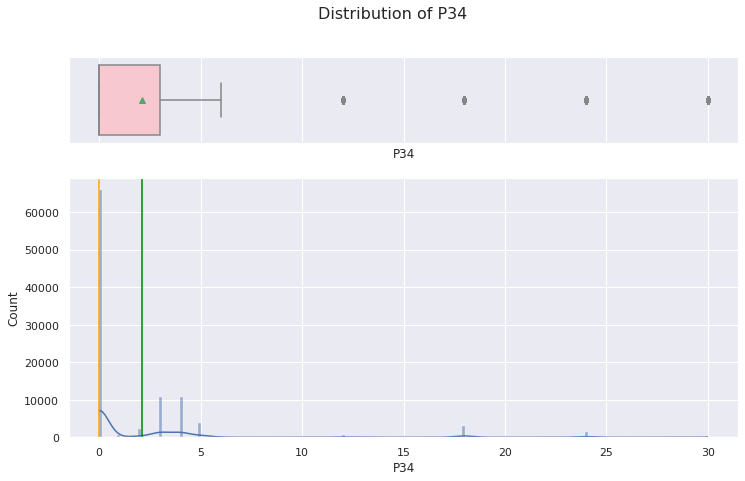

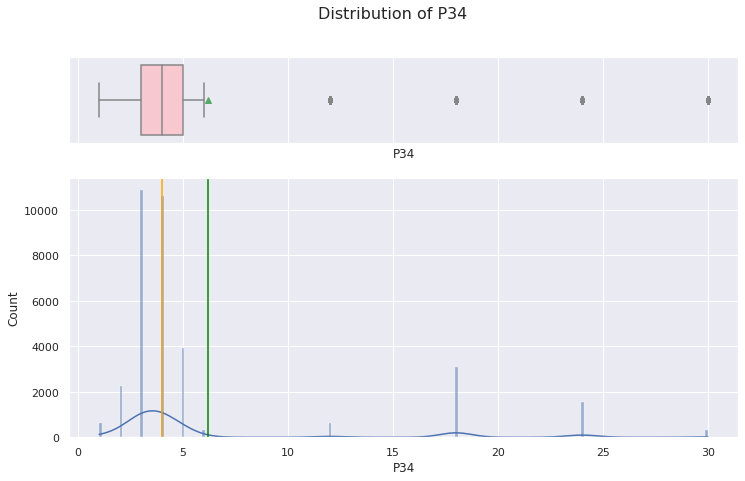

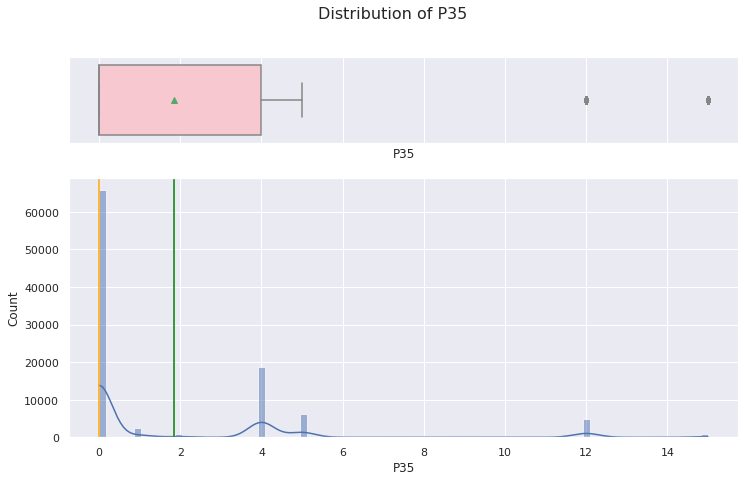

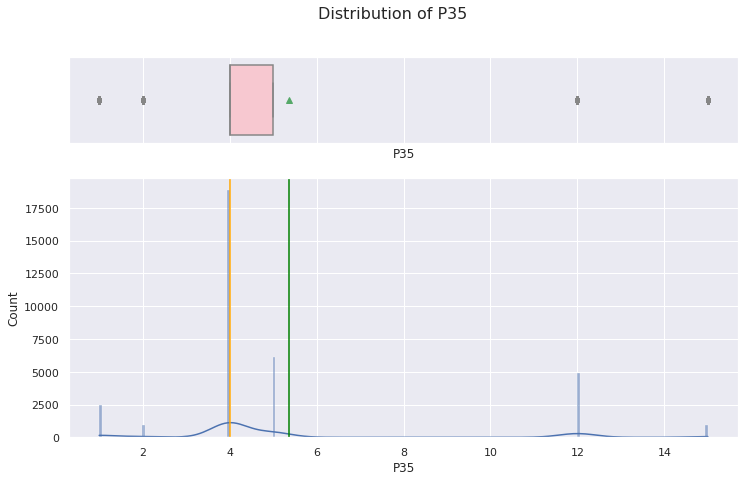

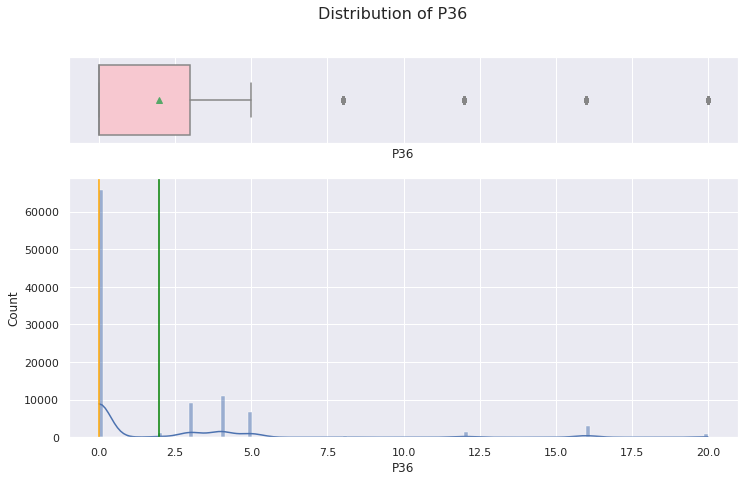

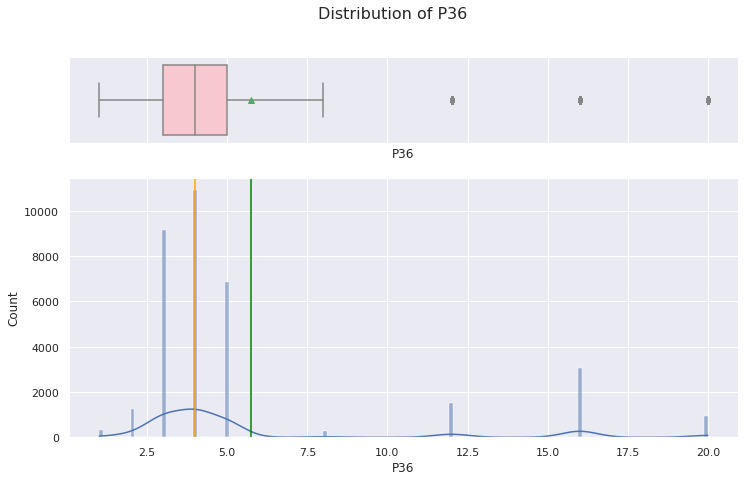

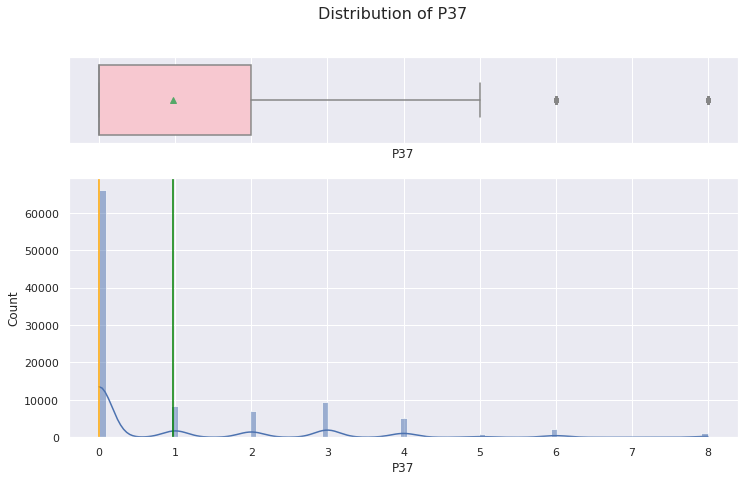

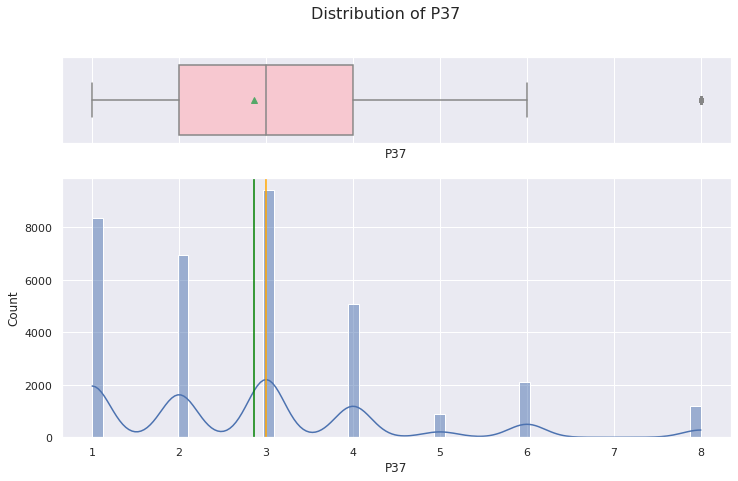

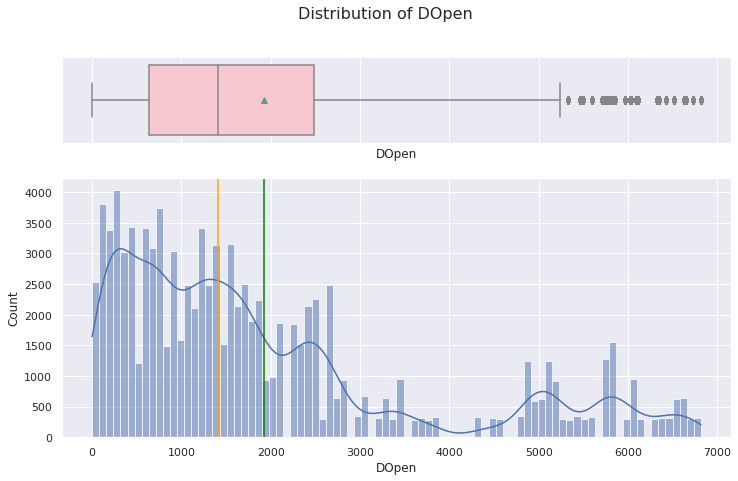

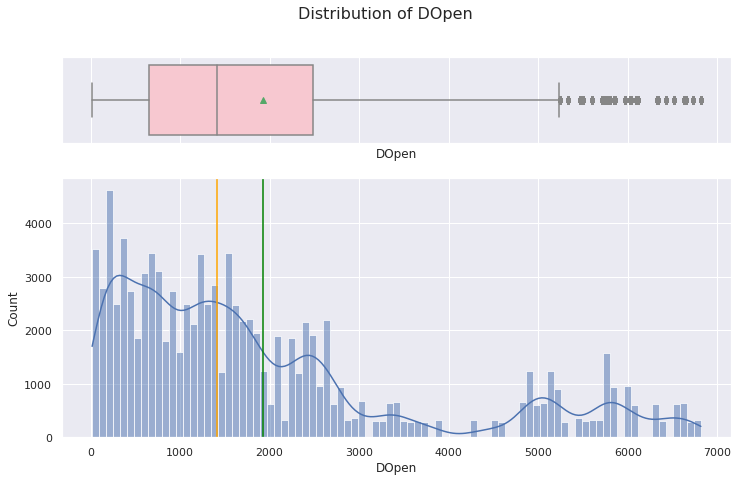

In [ ]:
from IPython.core.pylabtools import figsize
for i in cols_num:
  hist_box(df_test,i)
  hist_box(df_test,i, drop = 0)

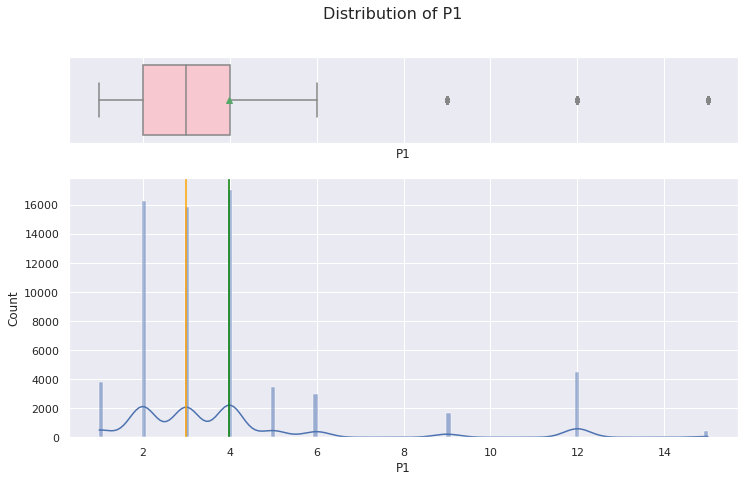

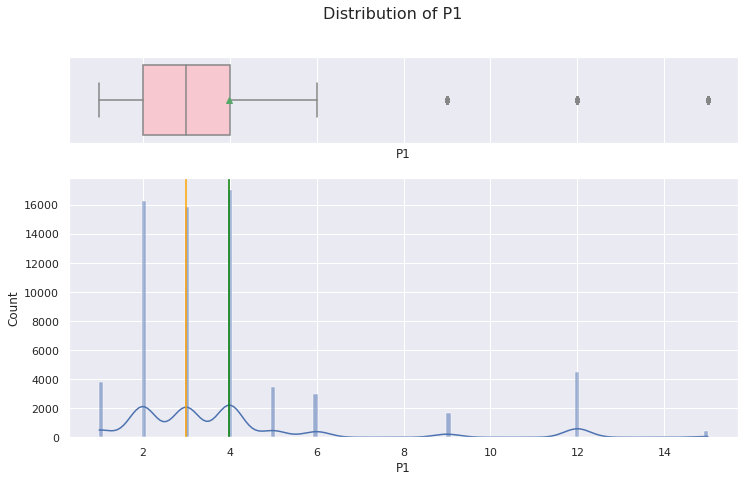

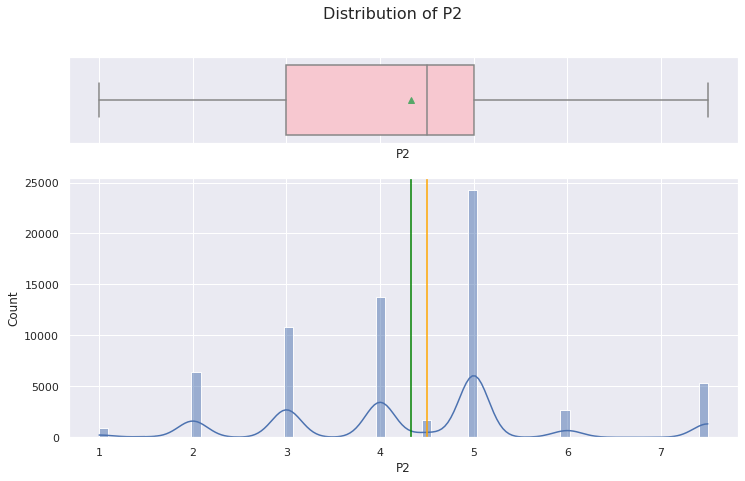

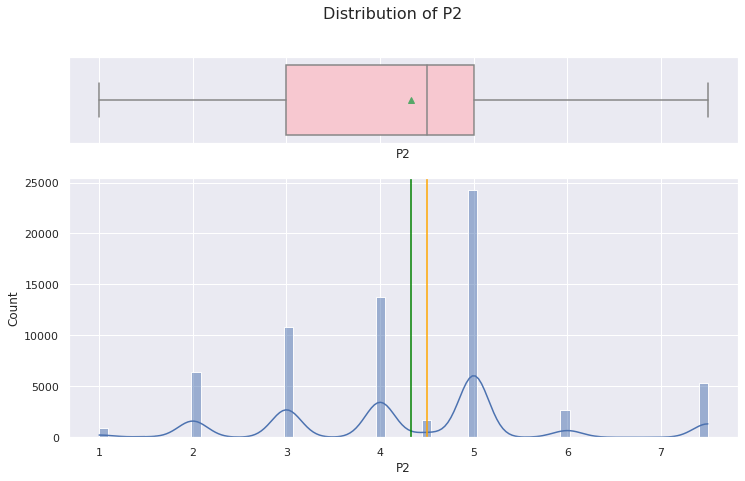

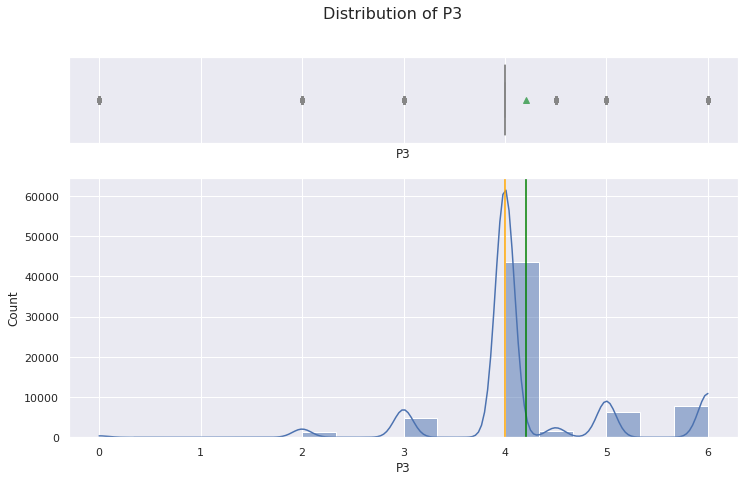

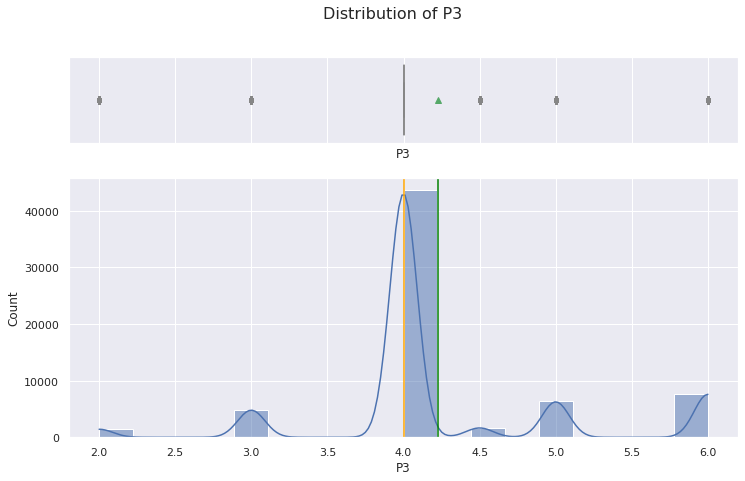

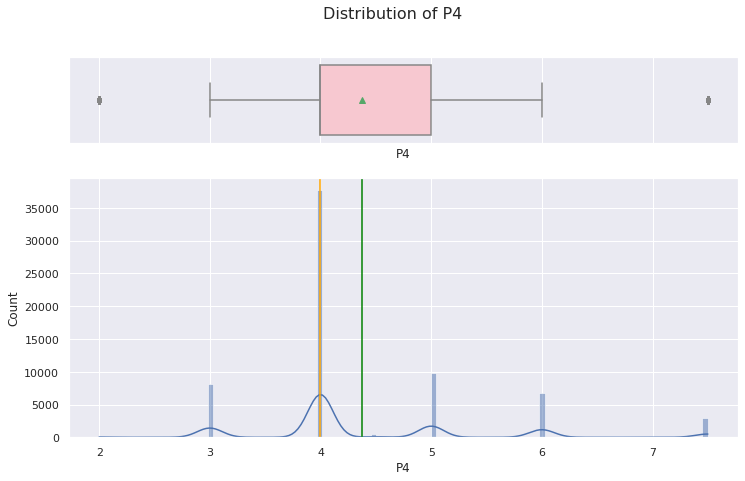

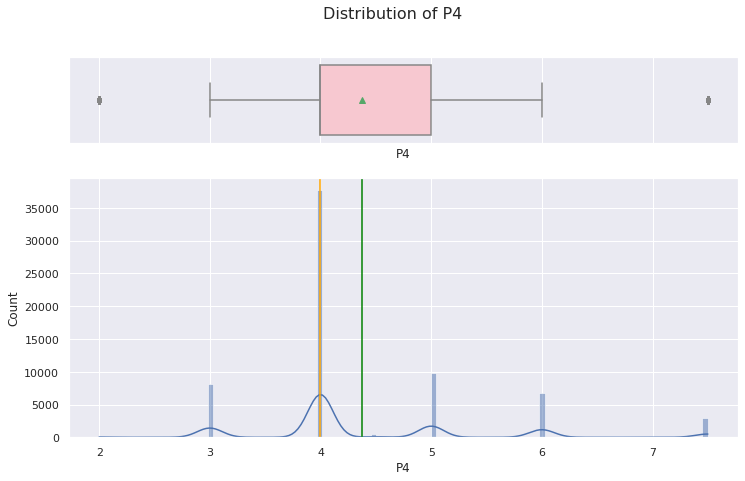

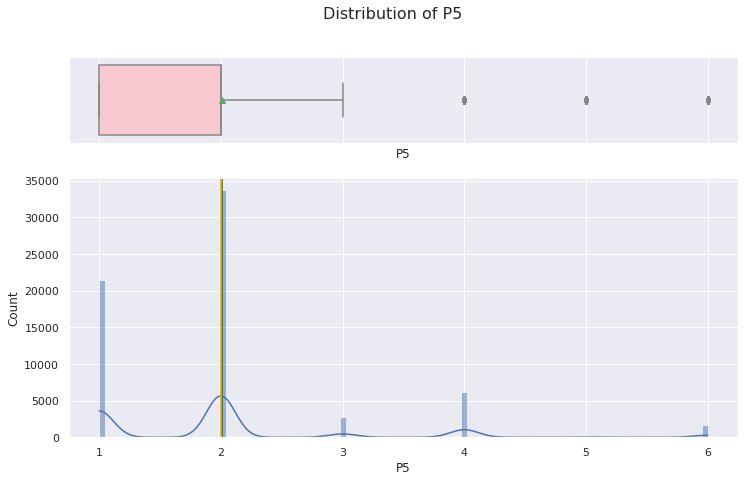

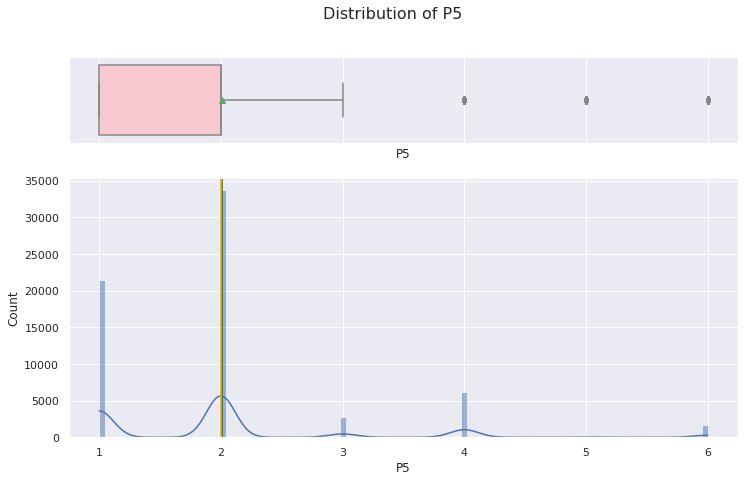

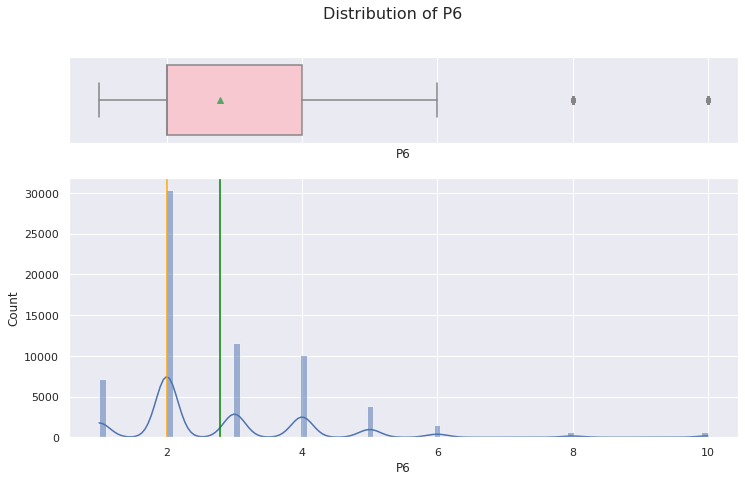

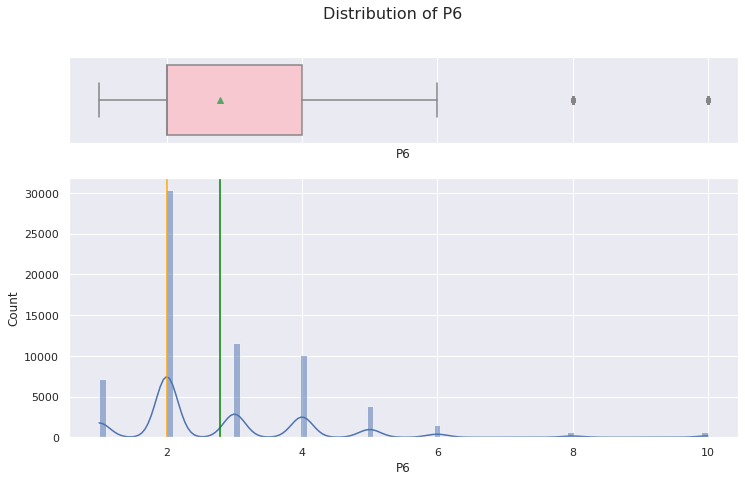

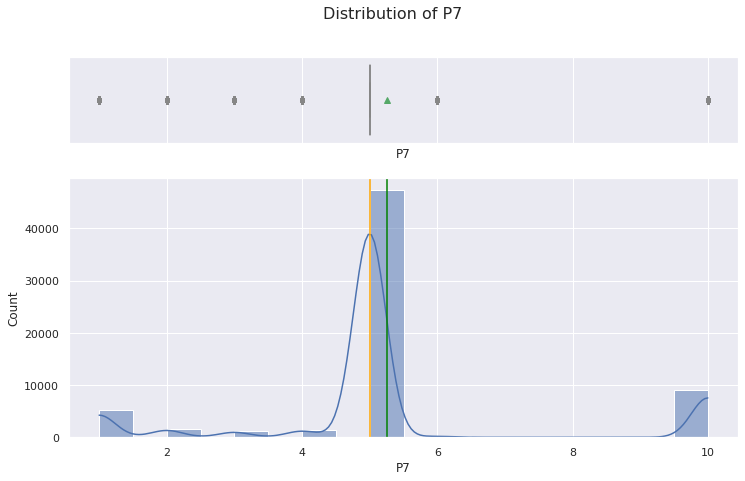

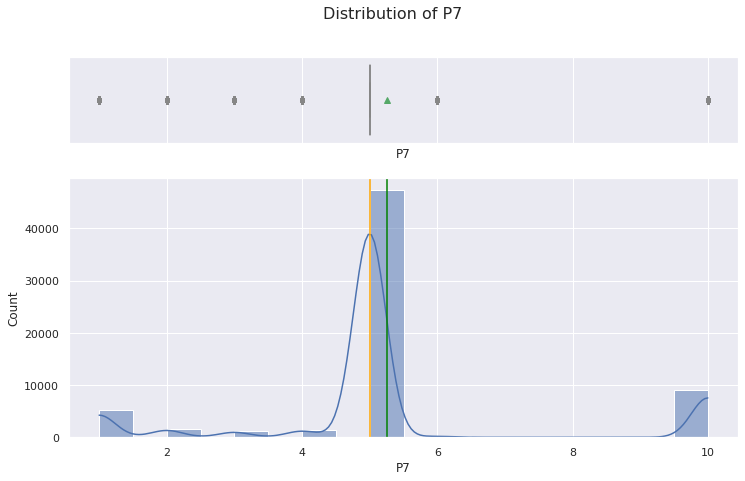

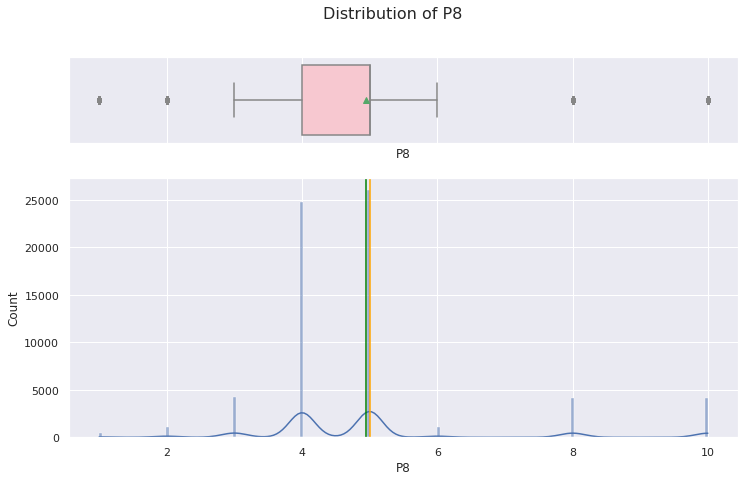

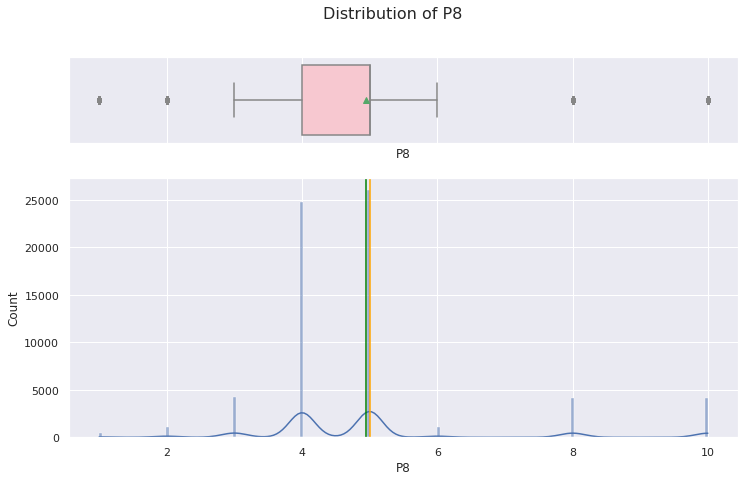

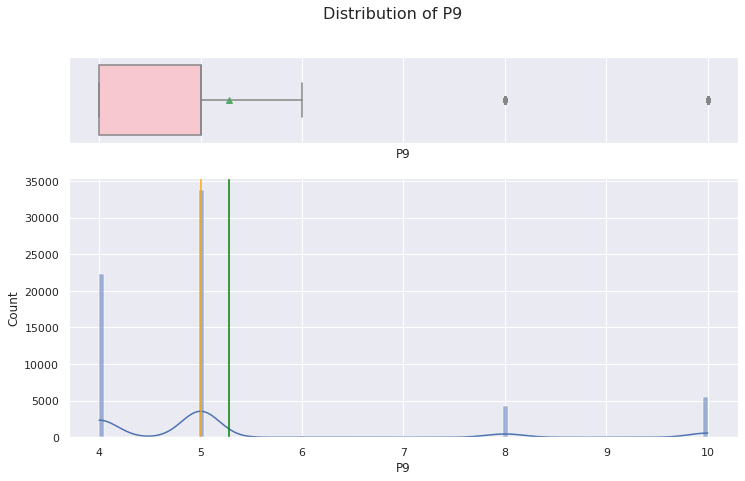

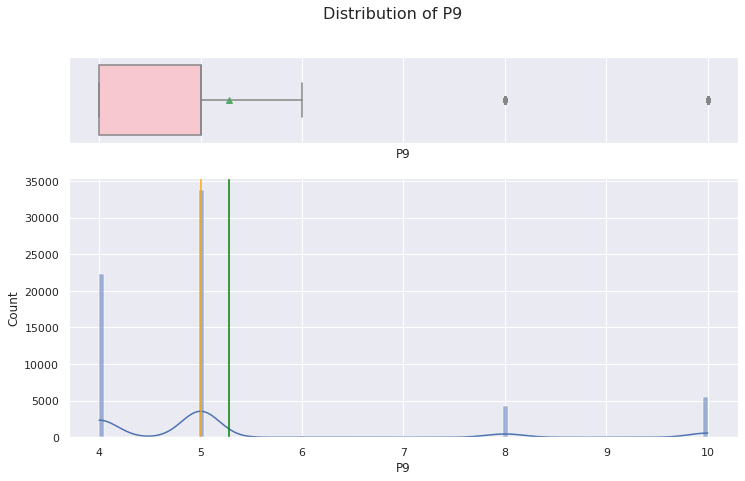

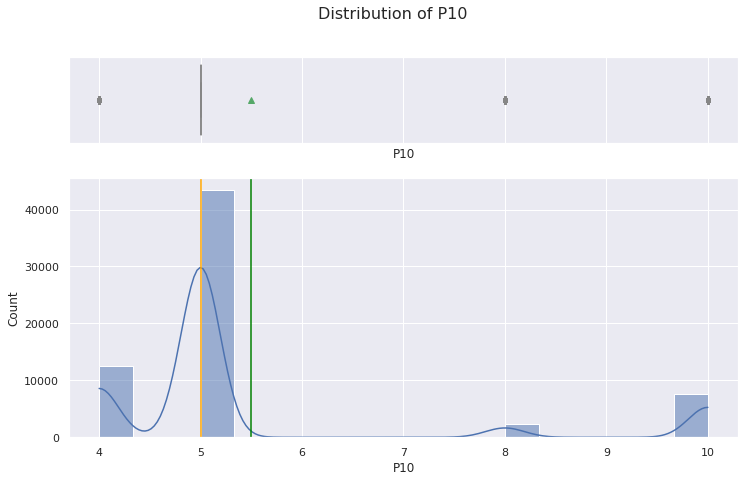

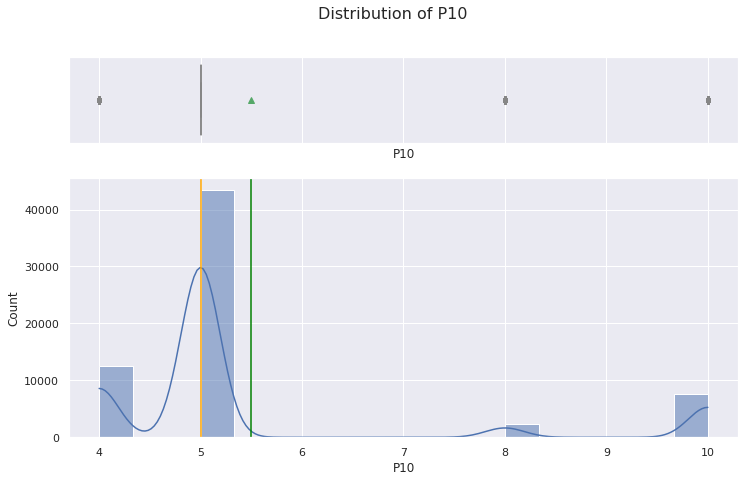

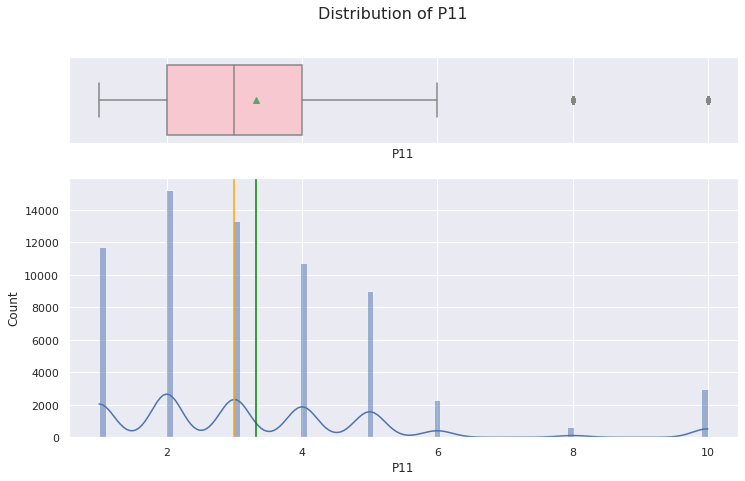

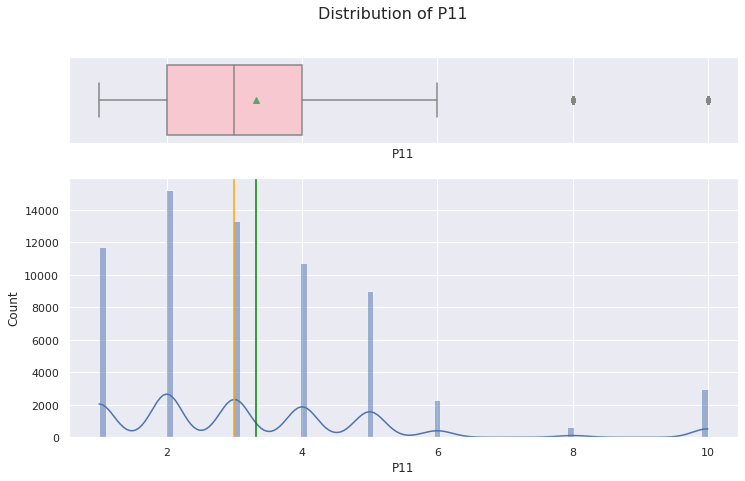

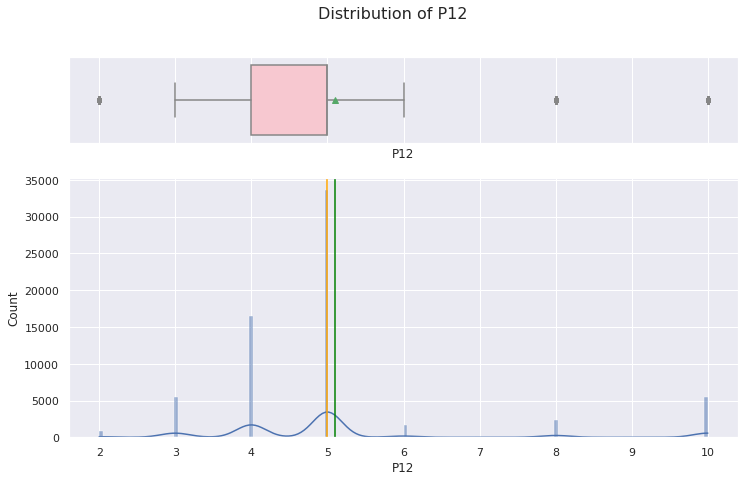

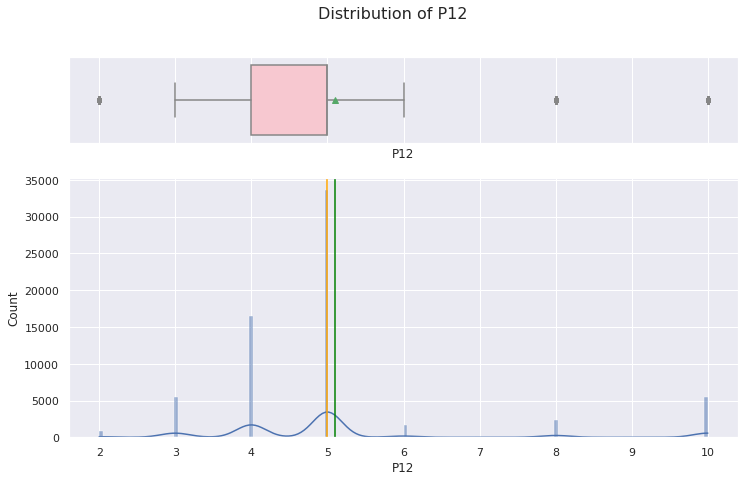

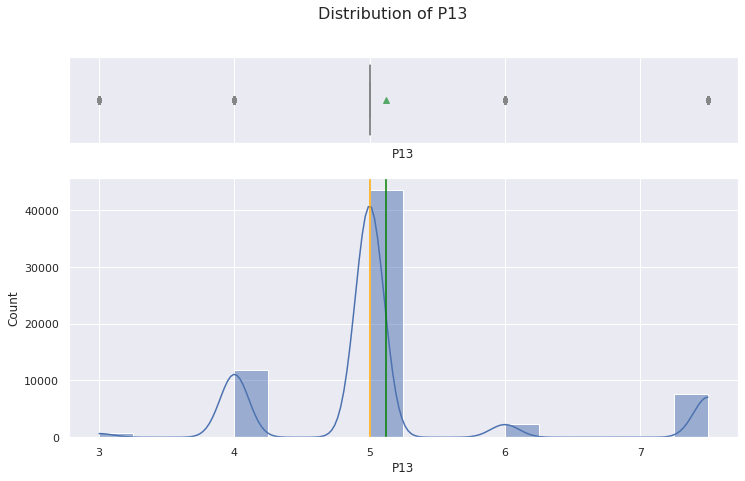

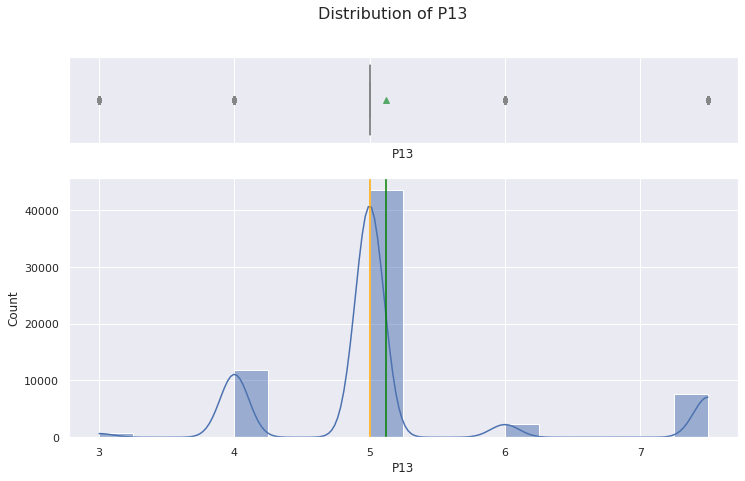

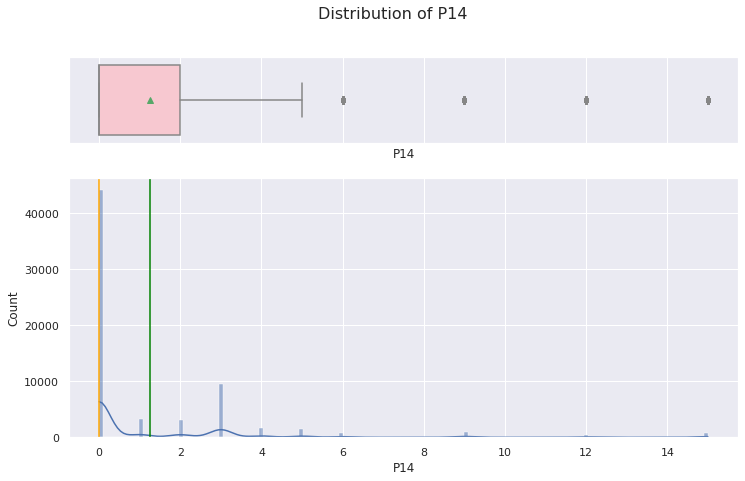

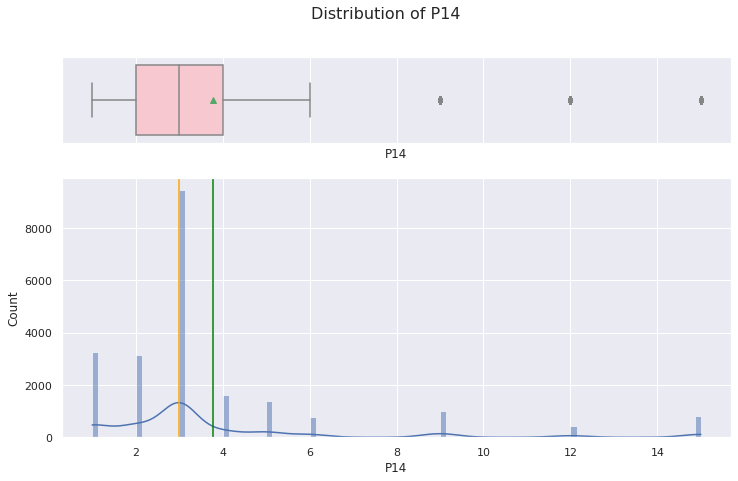

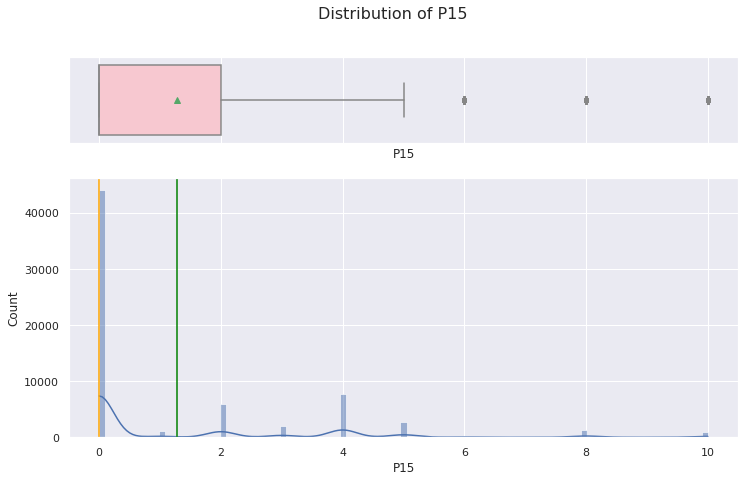

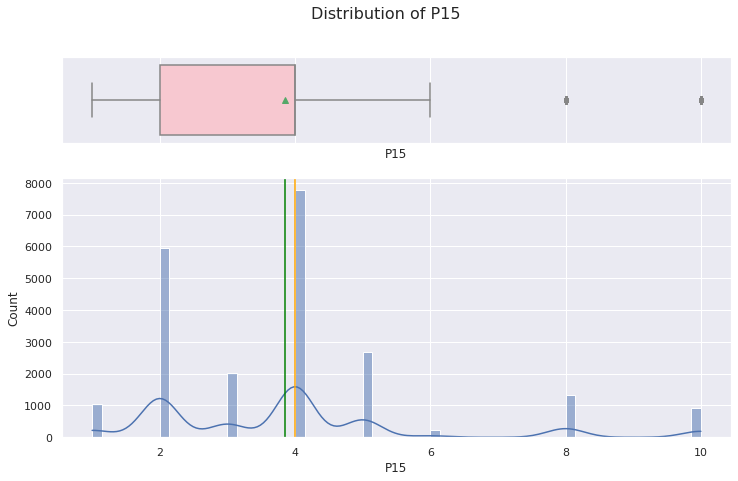

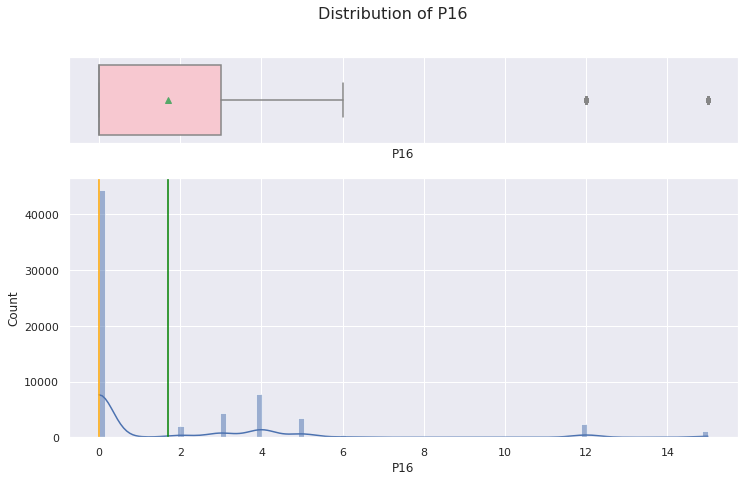

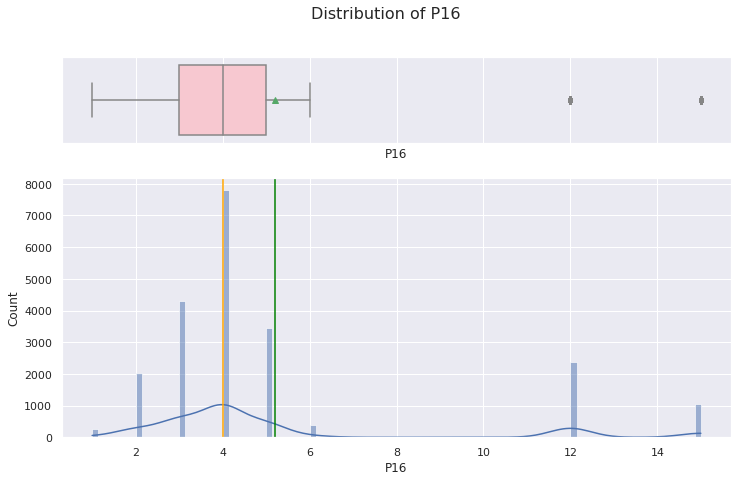

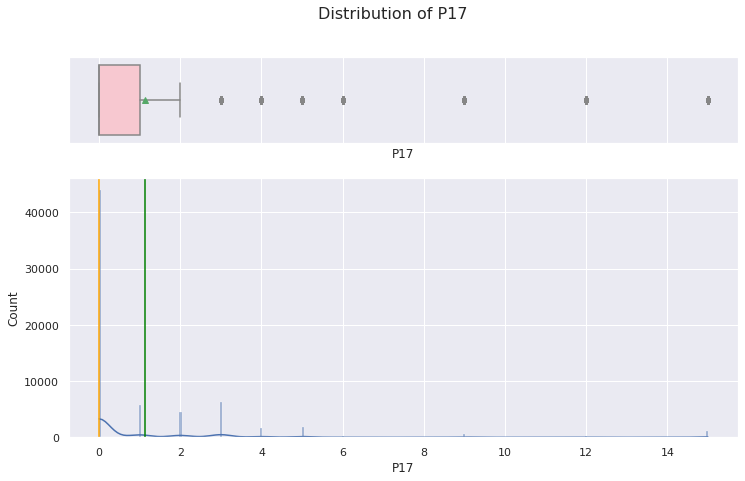

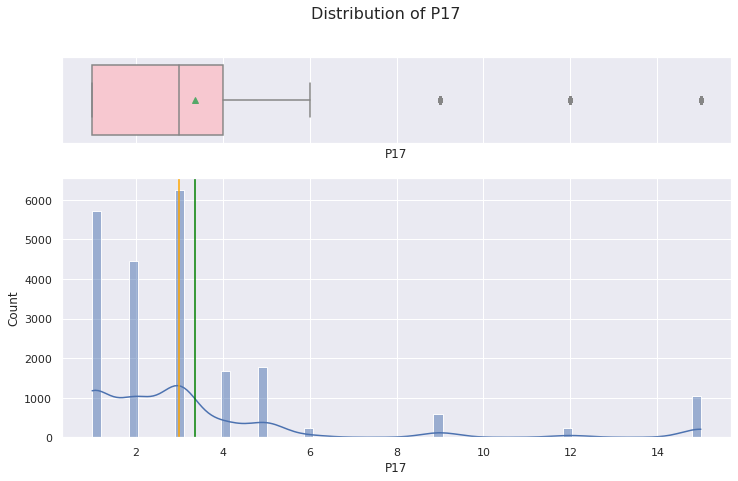

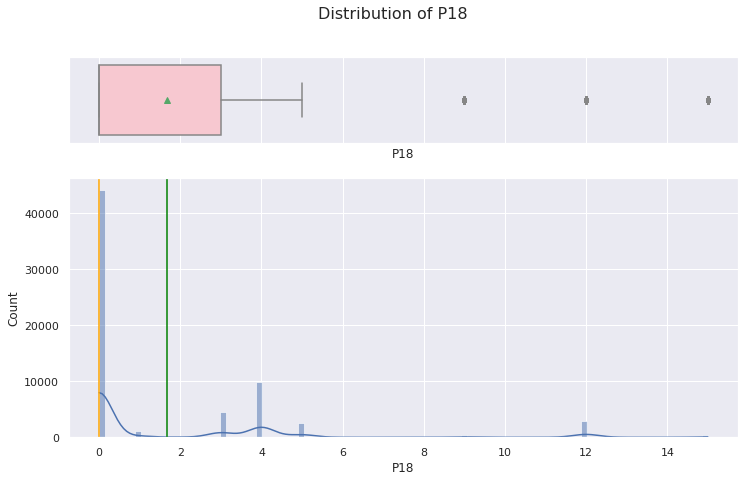

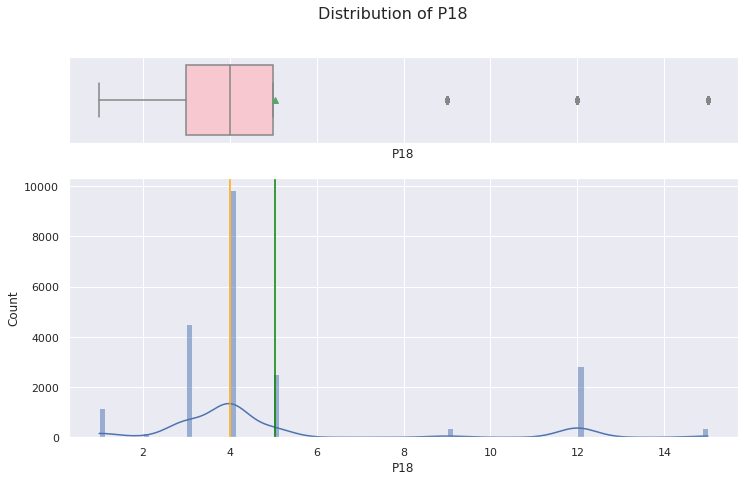

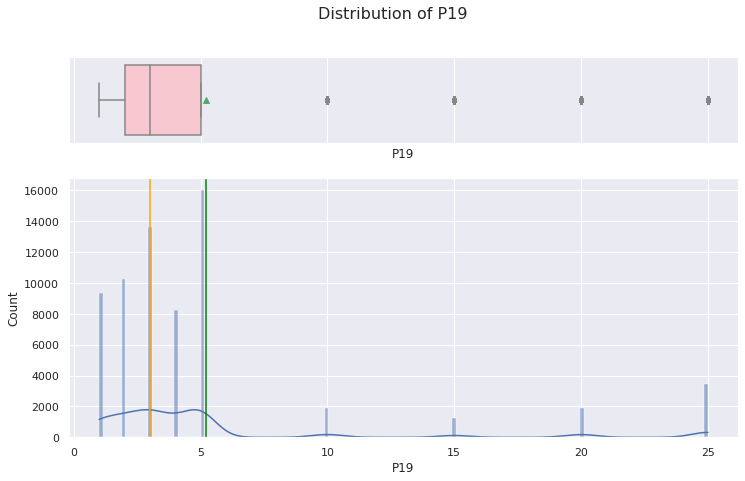

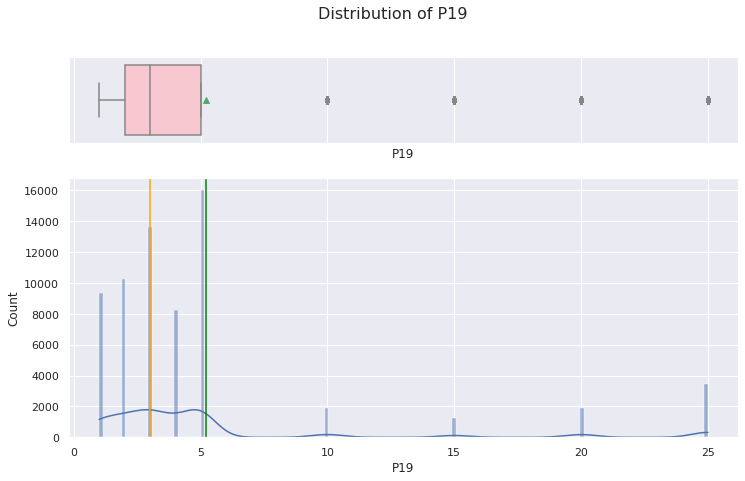

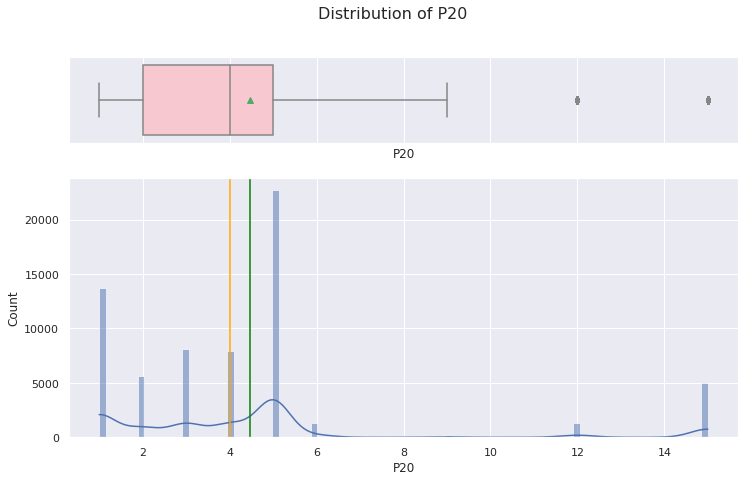

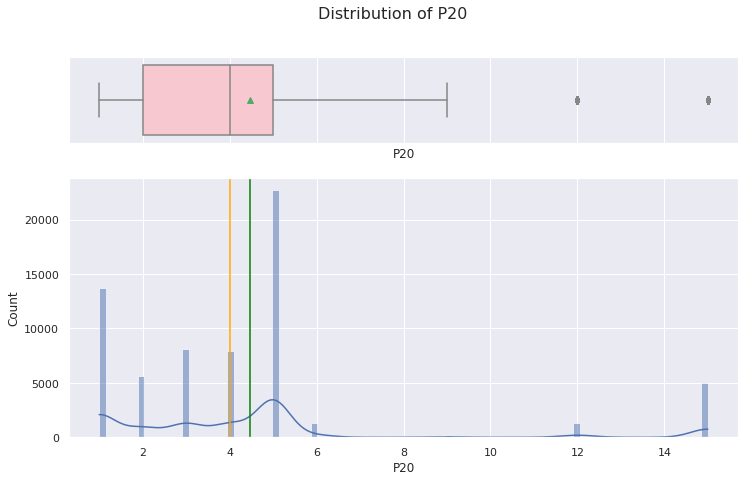

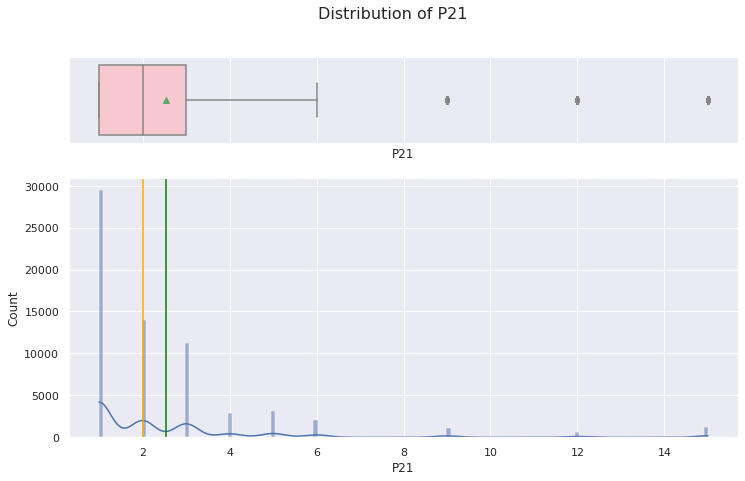

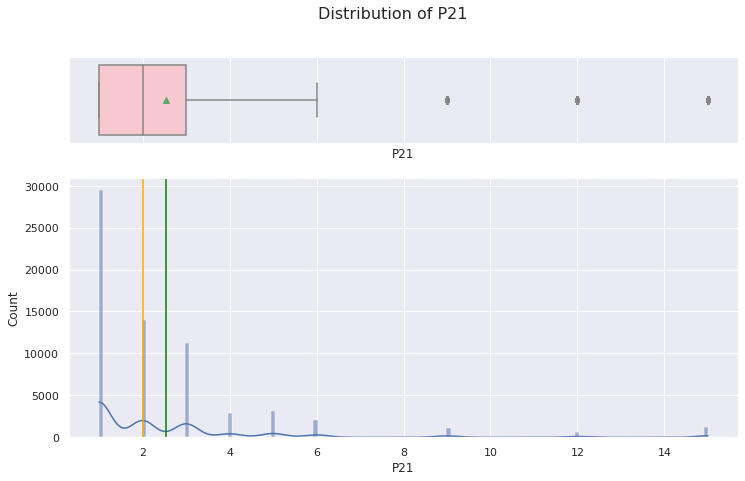

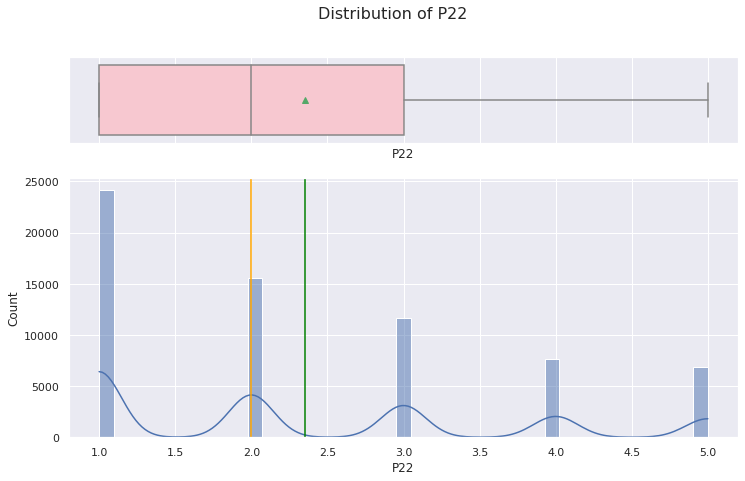

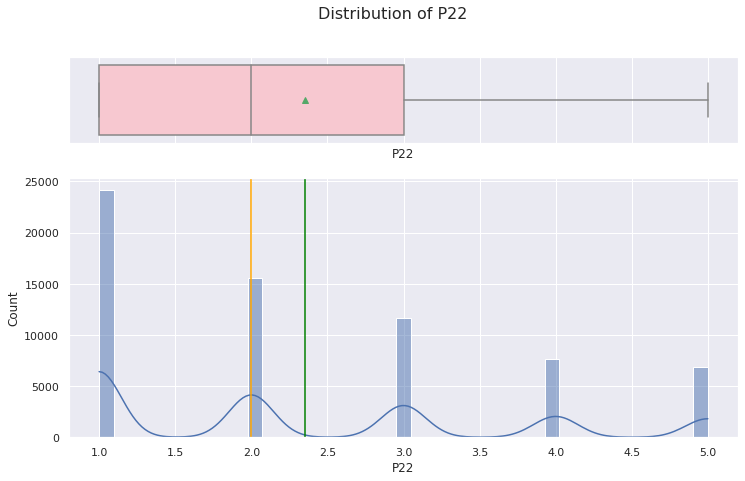

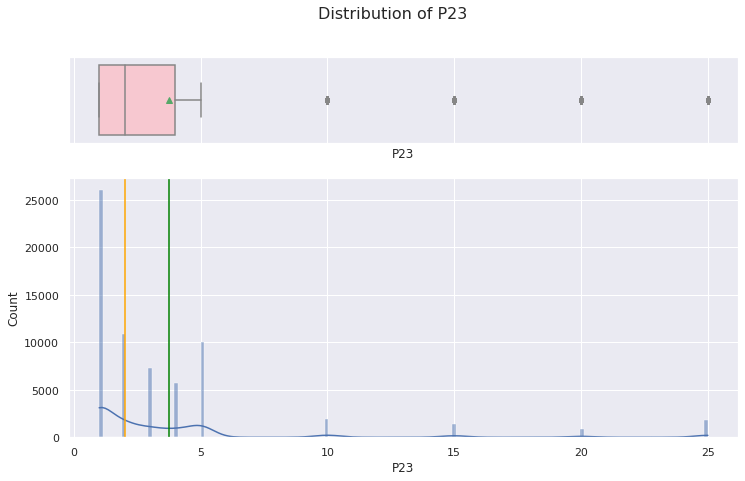

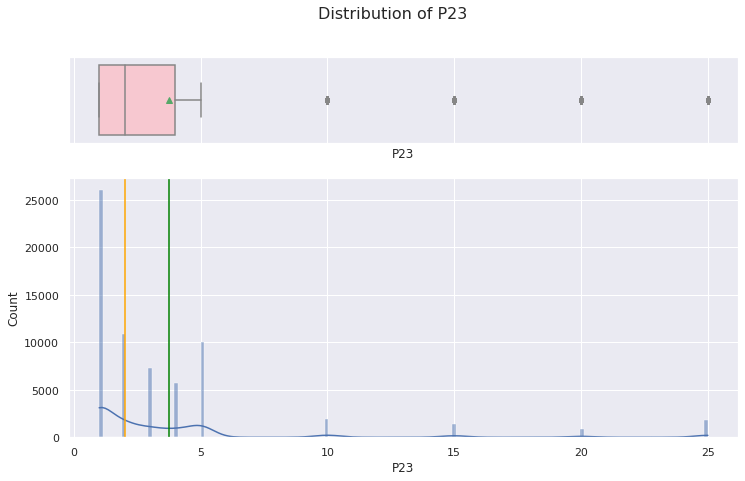

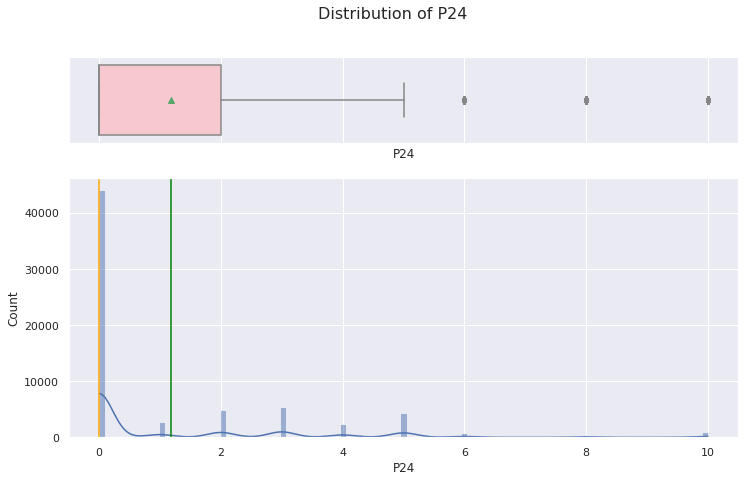

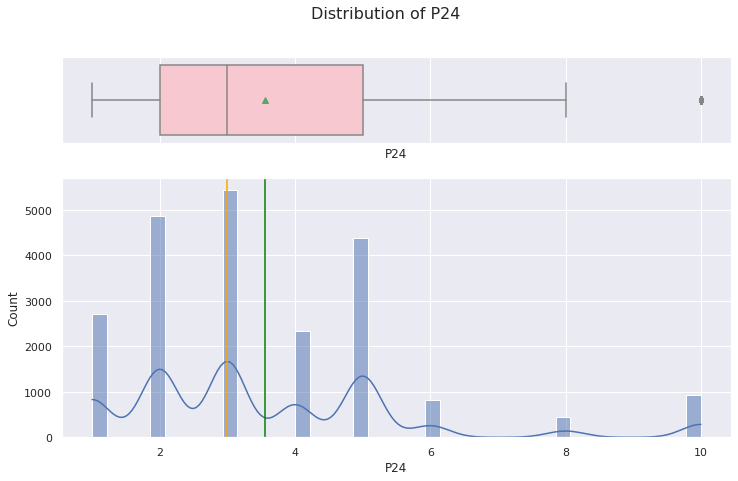

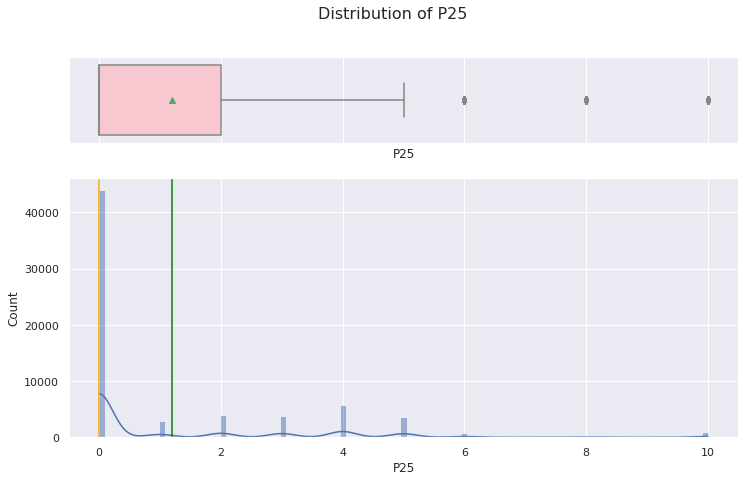

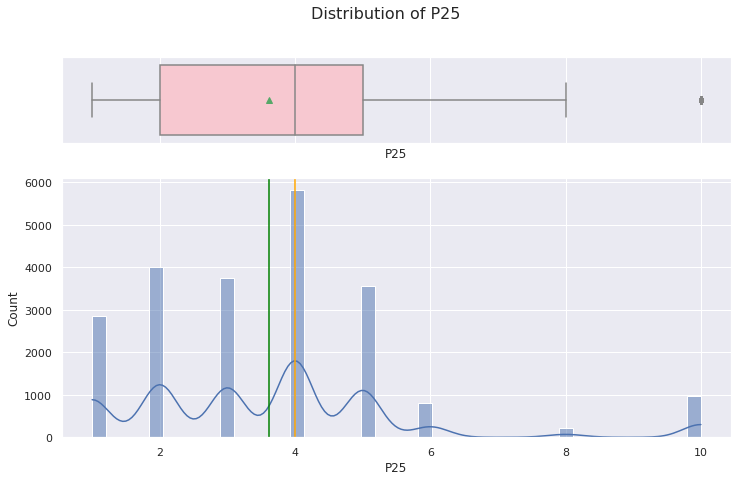

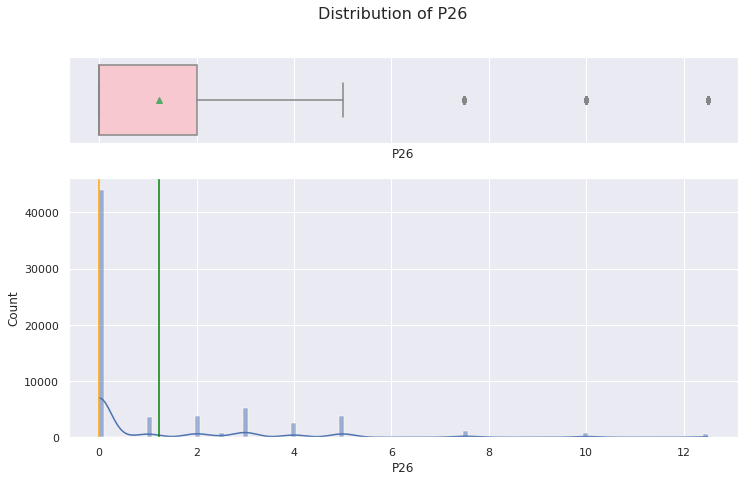

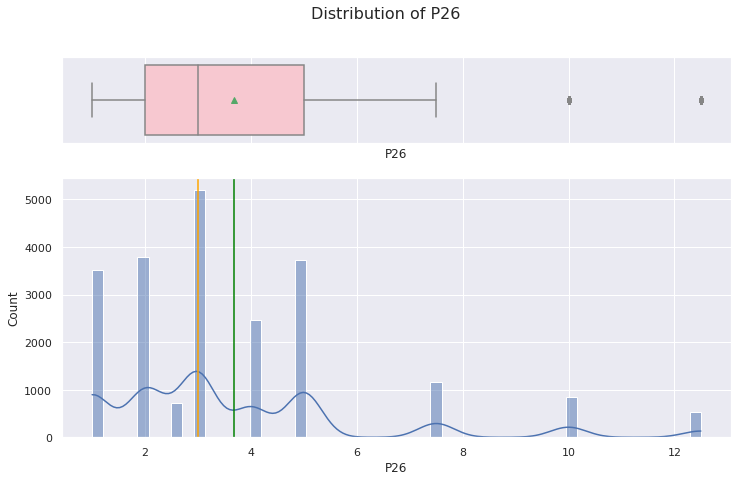

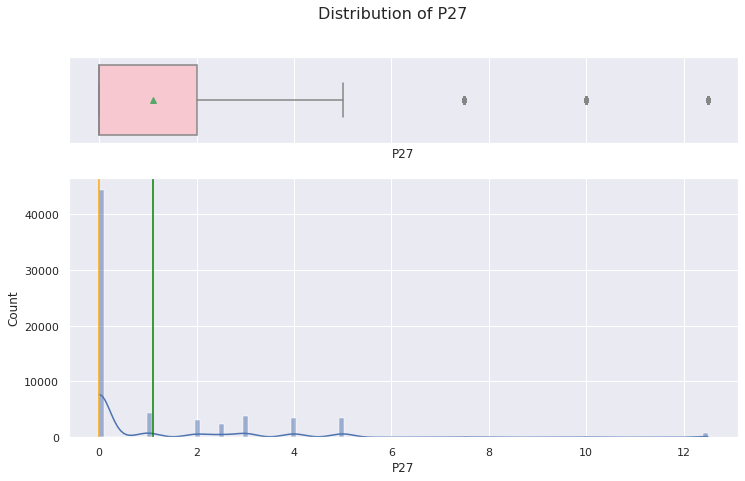

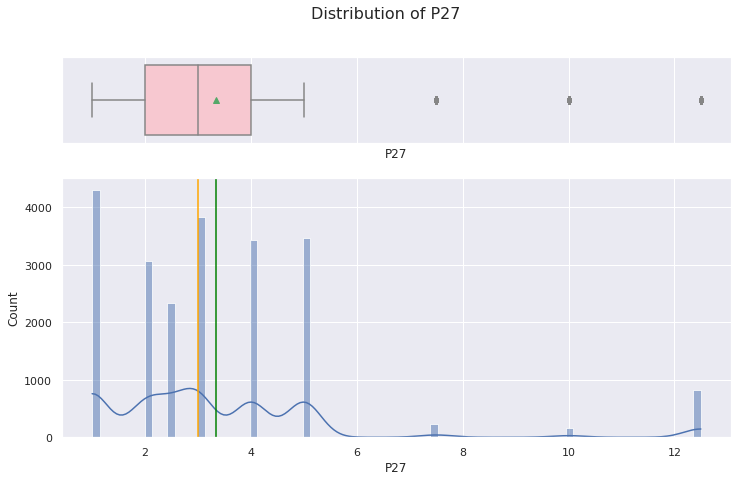

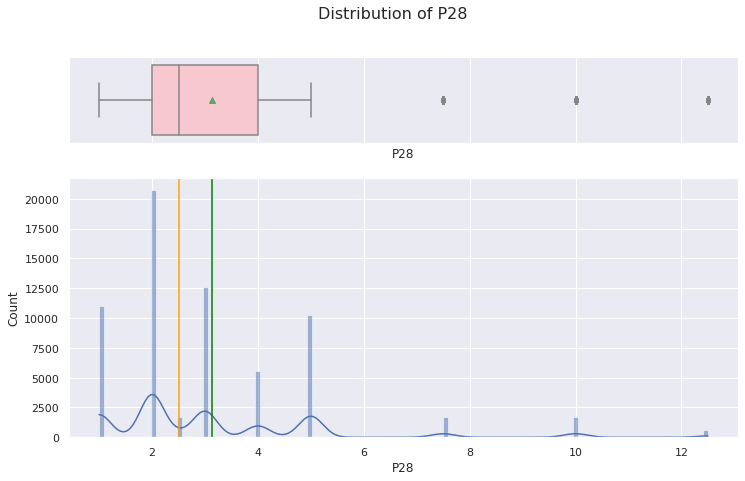

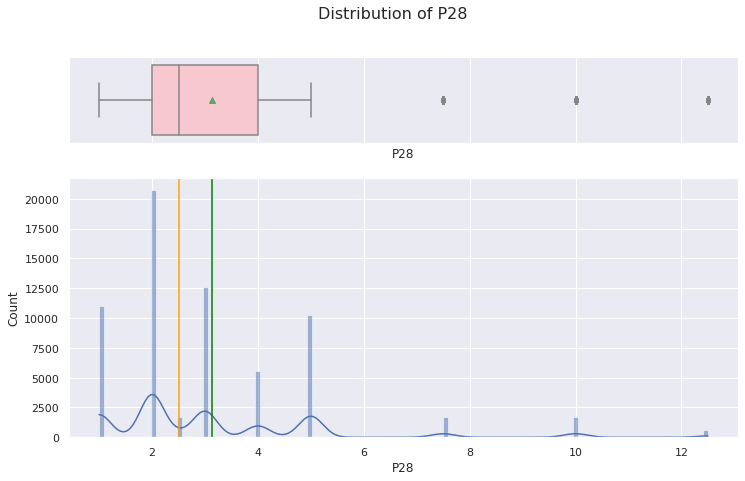

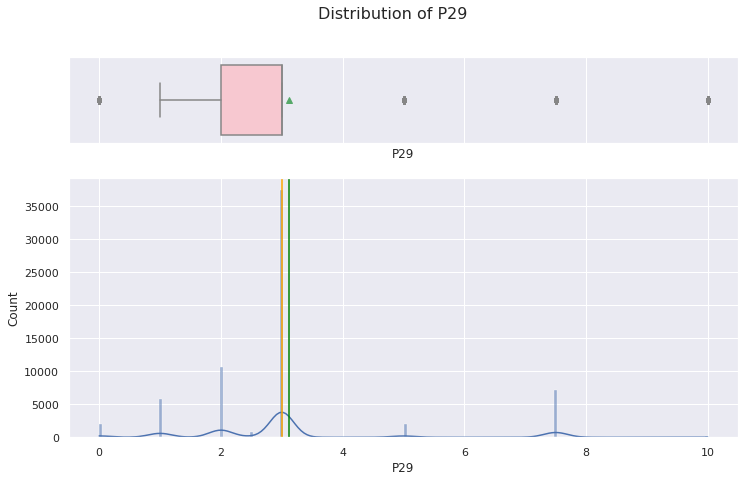

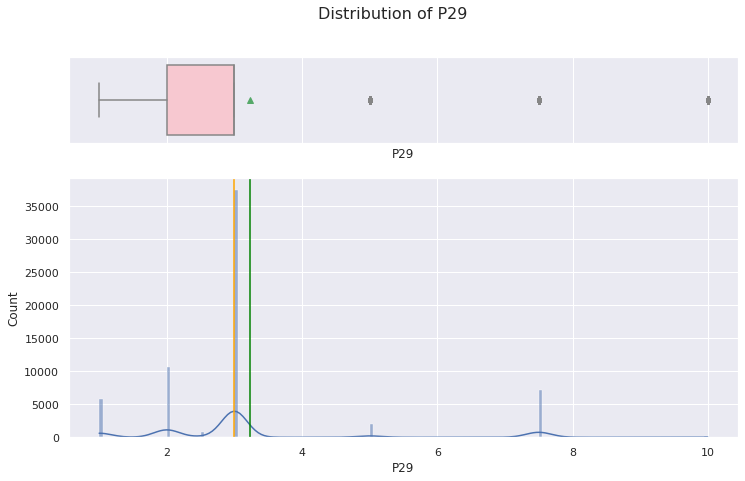

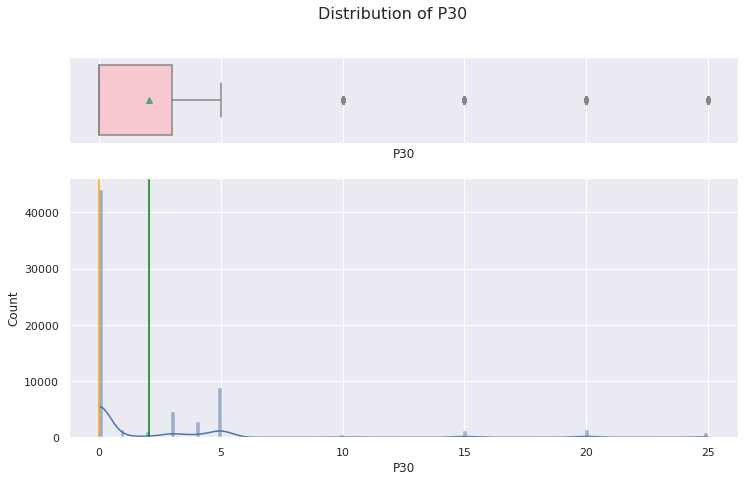

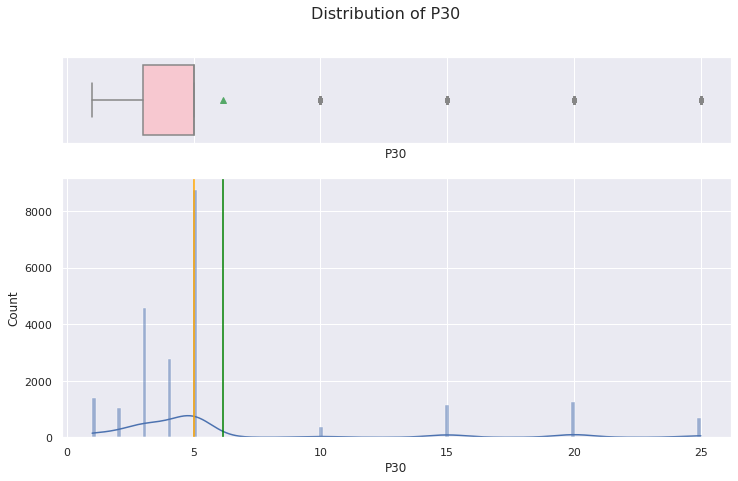

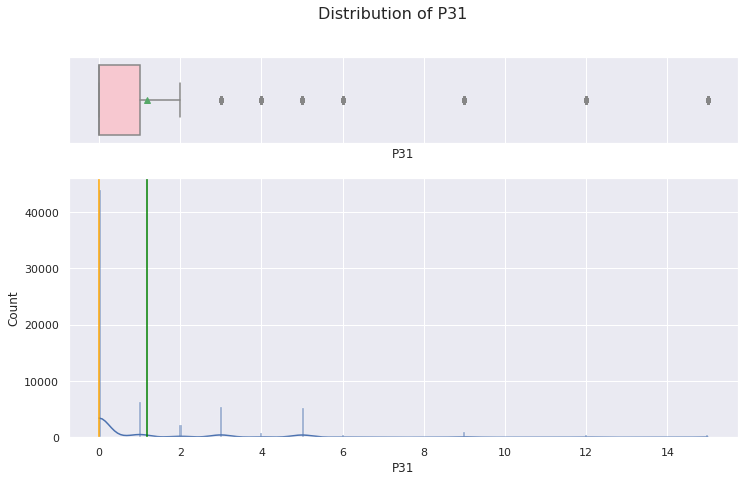

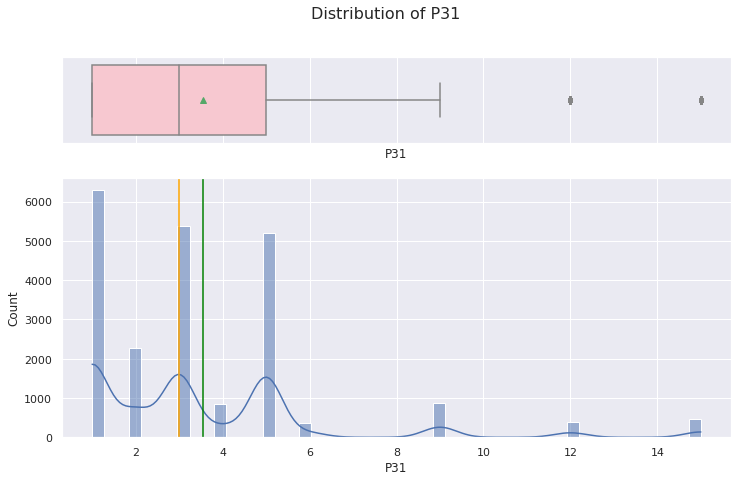

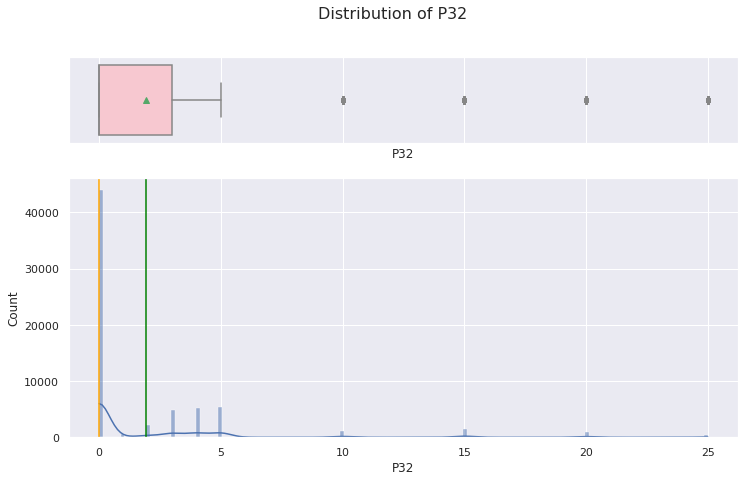

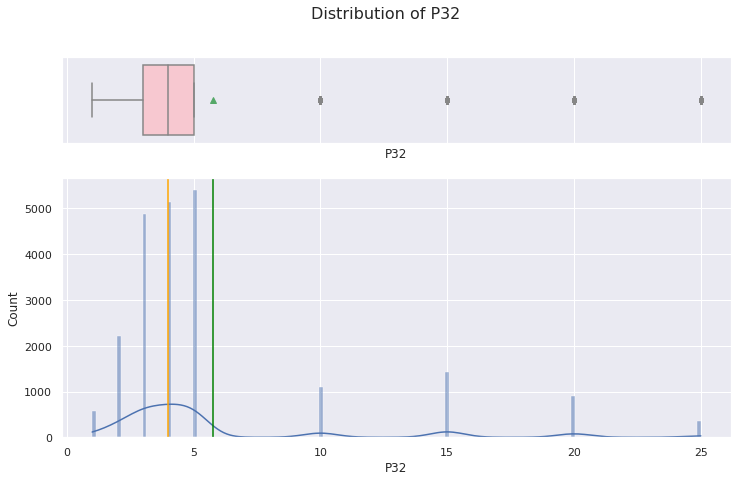

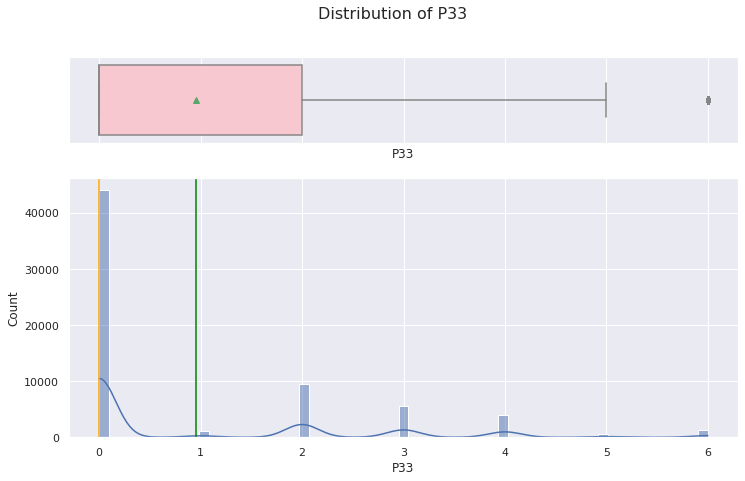

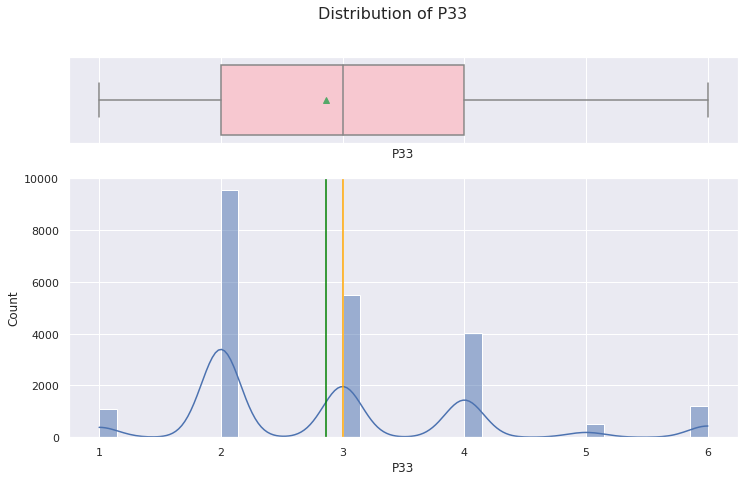

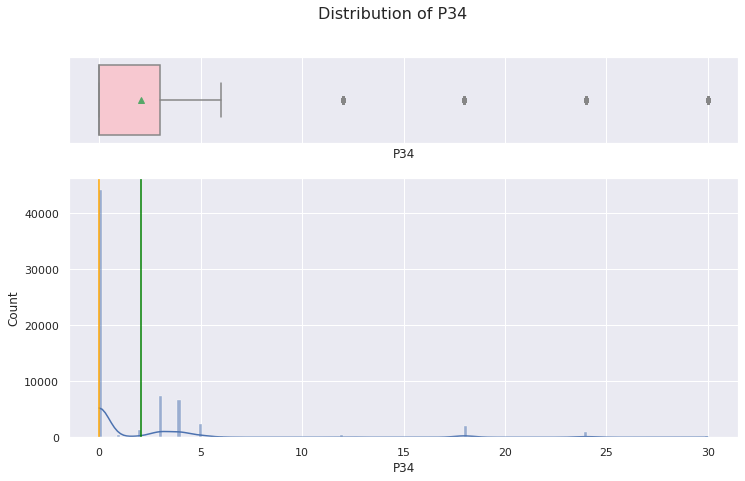

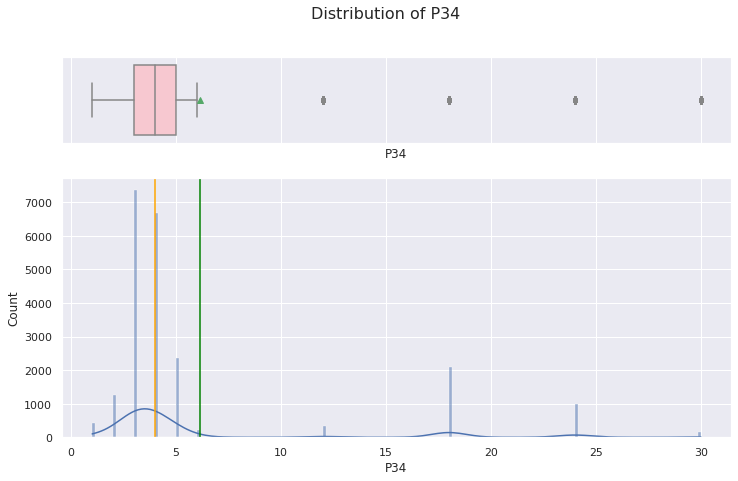

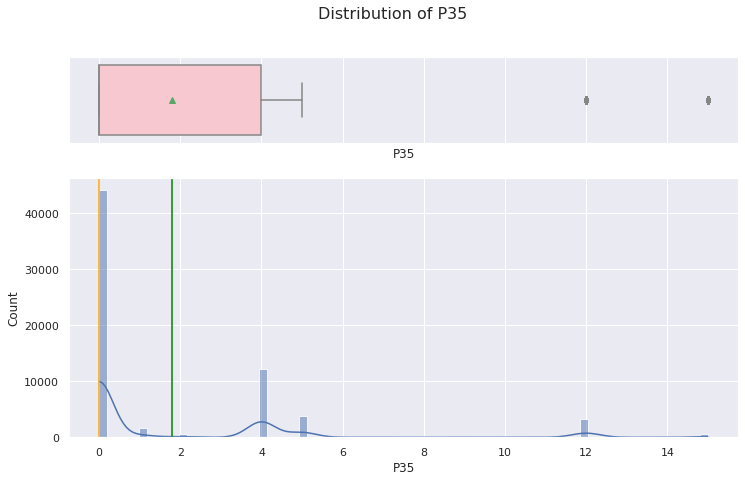

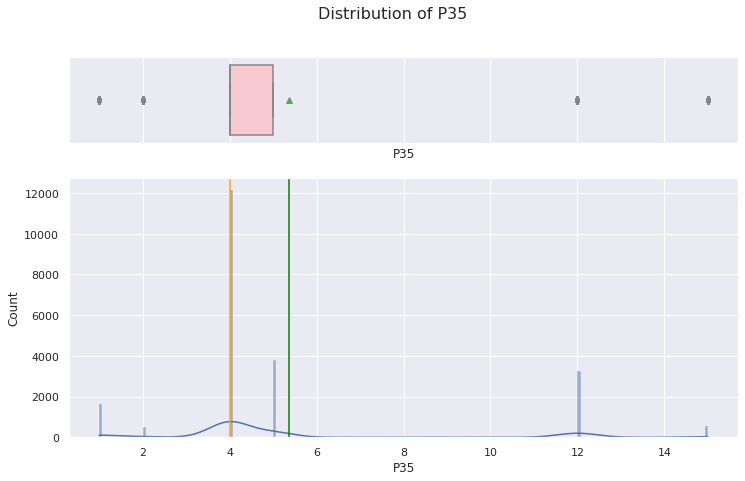

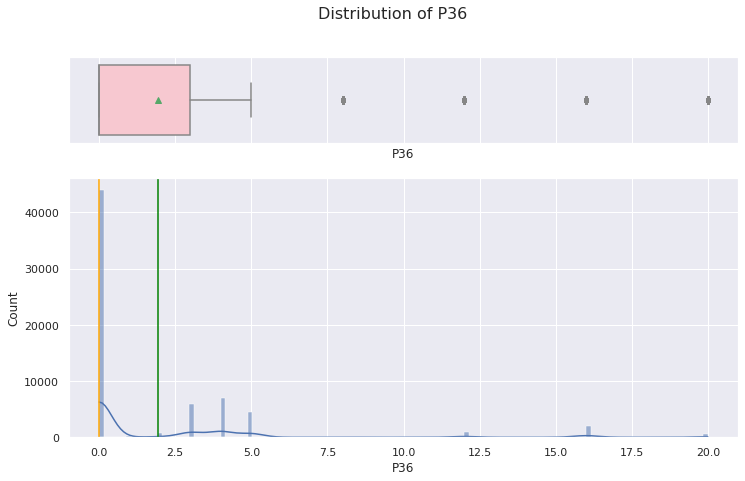

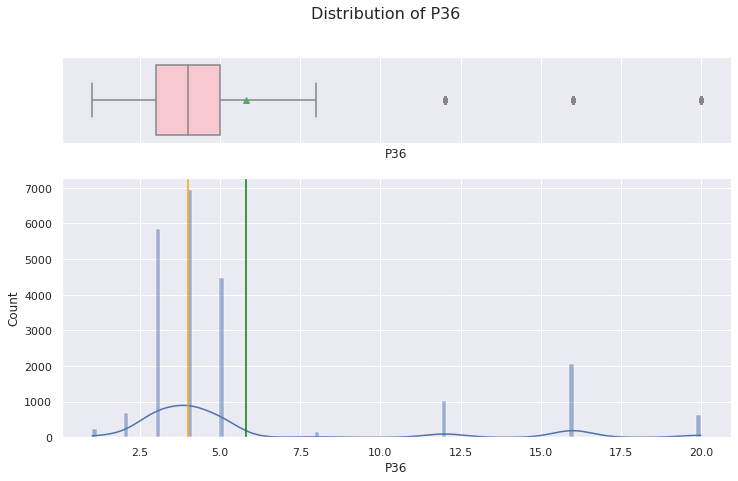

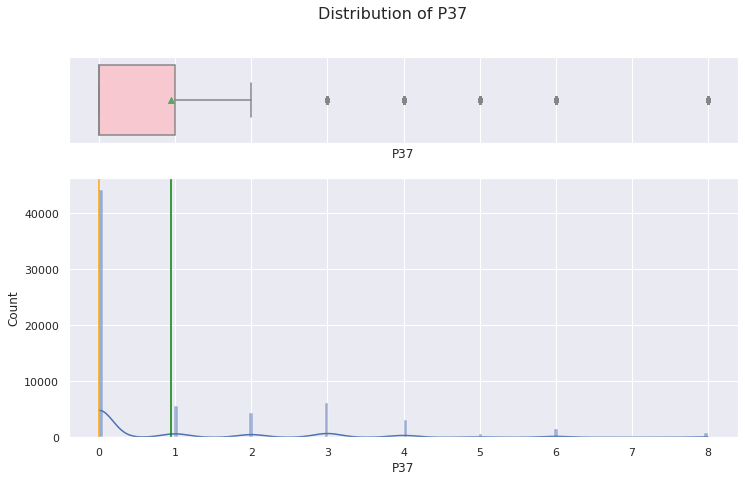

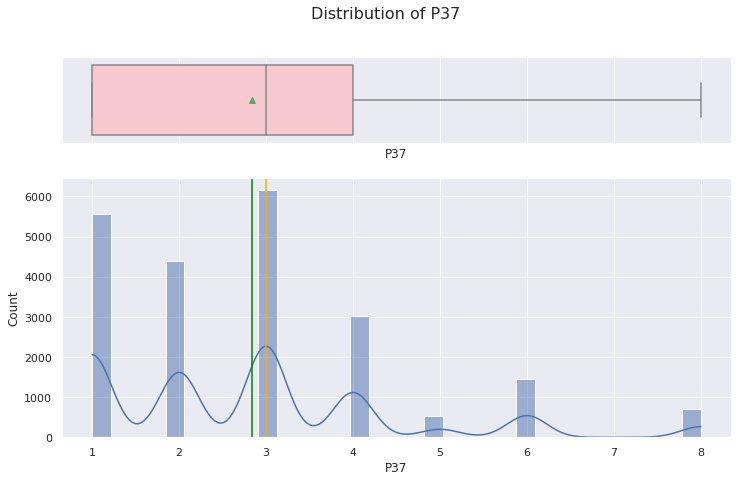

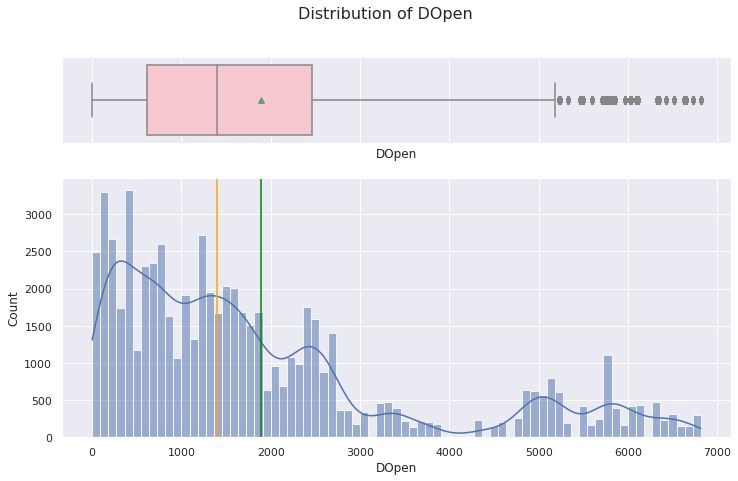

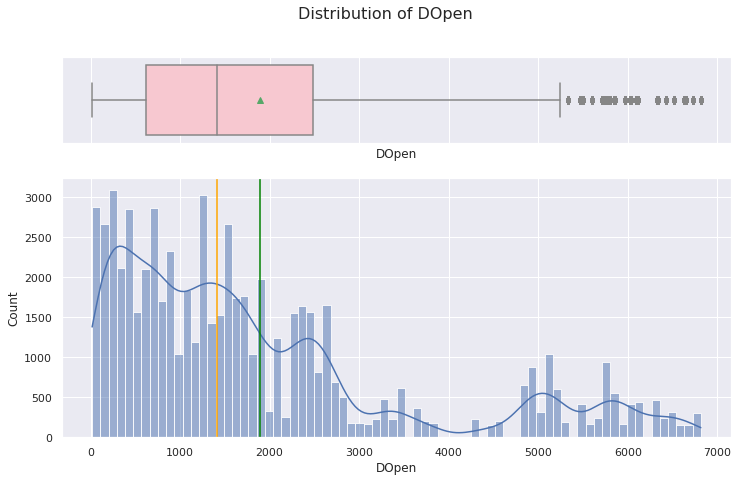

In [ ]:
from IPython.core.pylabtools import figsize
for i in cols_num:
  hist_box(df_test[df_test["City"] != 'İstanbul'],i)
  hist_box(df_test[df_test["City"] != 'İstanbul'],i, drop = 0)


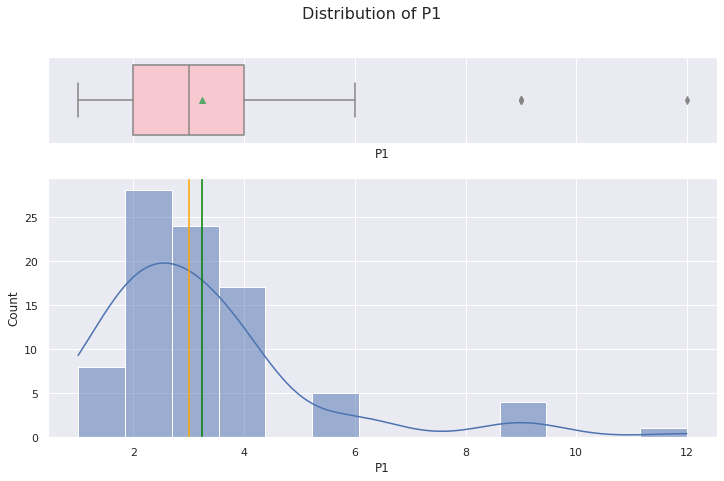

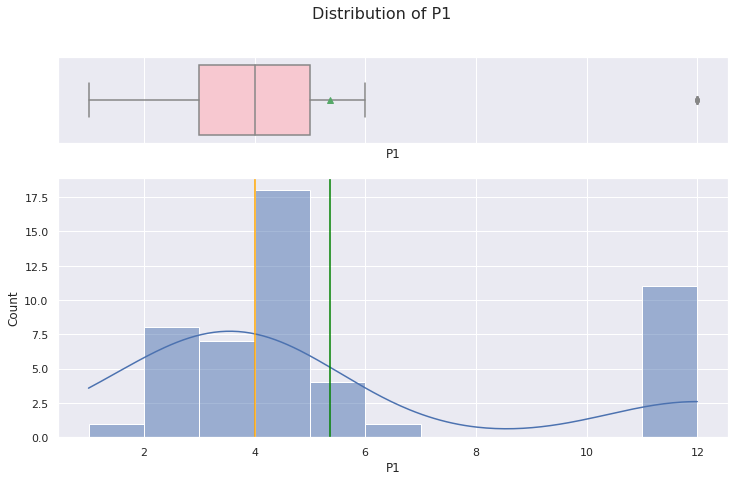

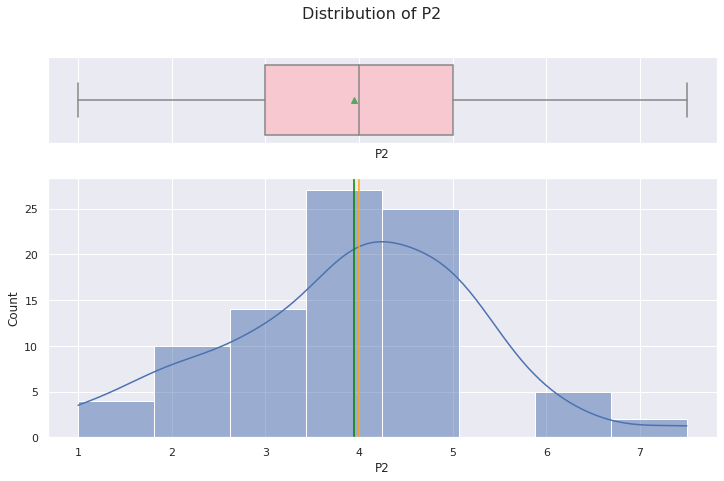

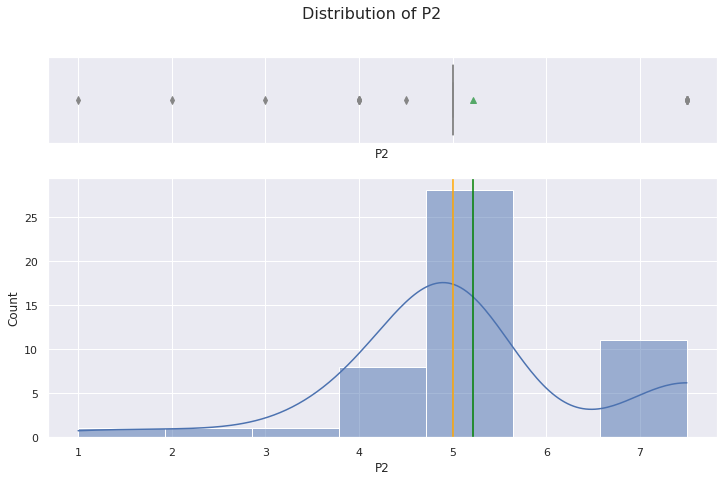

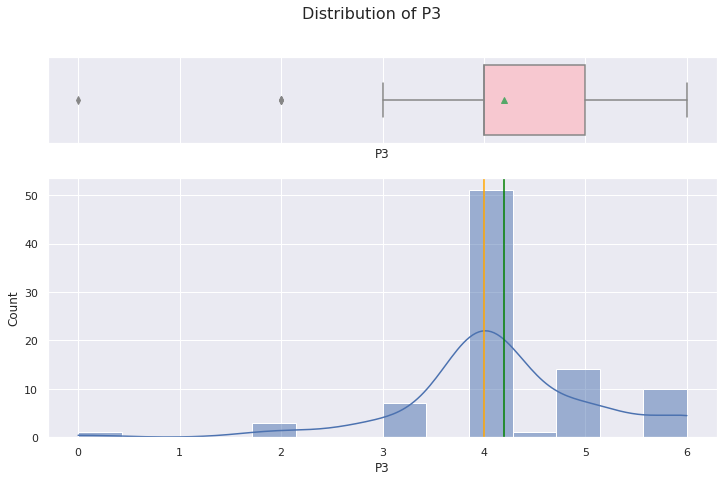

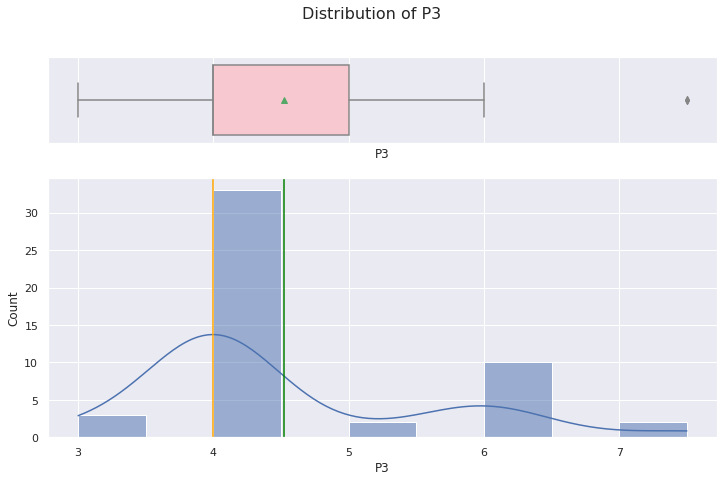

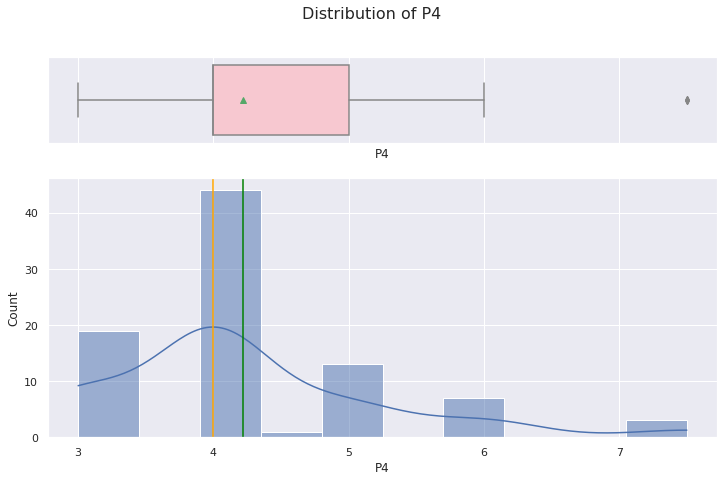

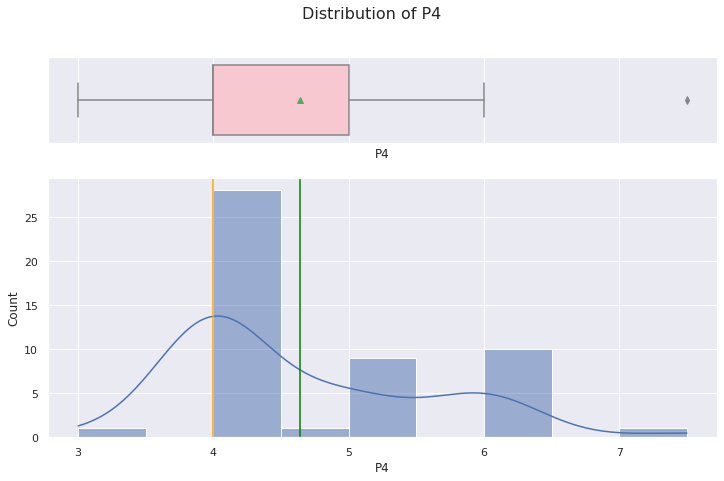

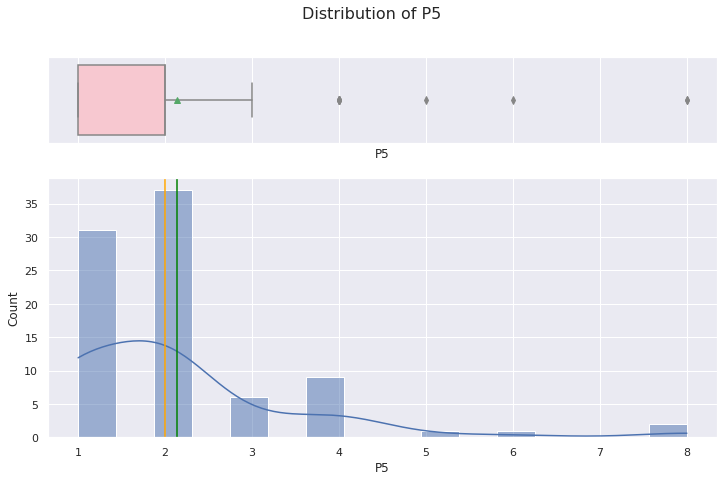

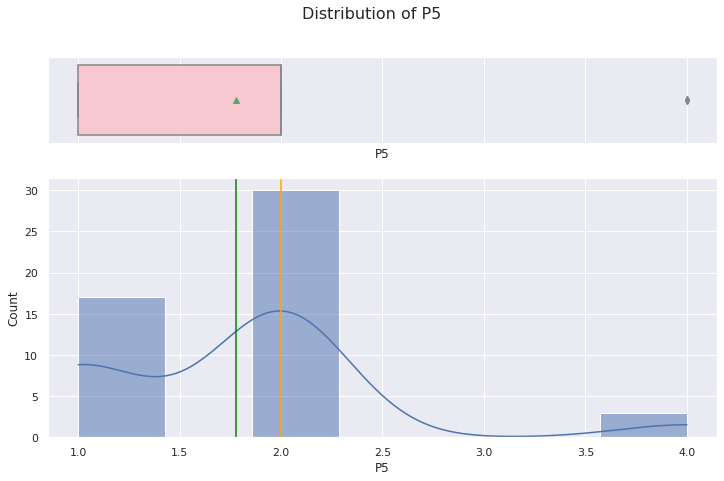

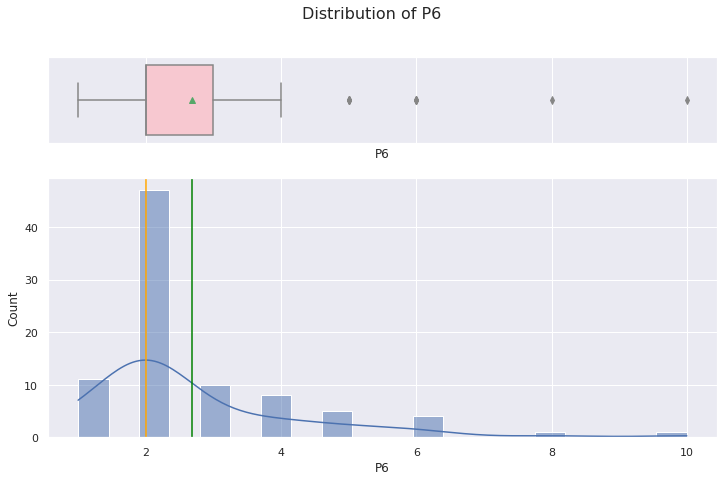

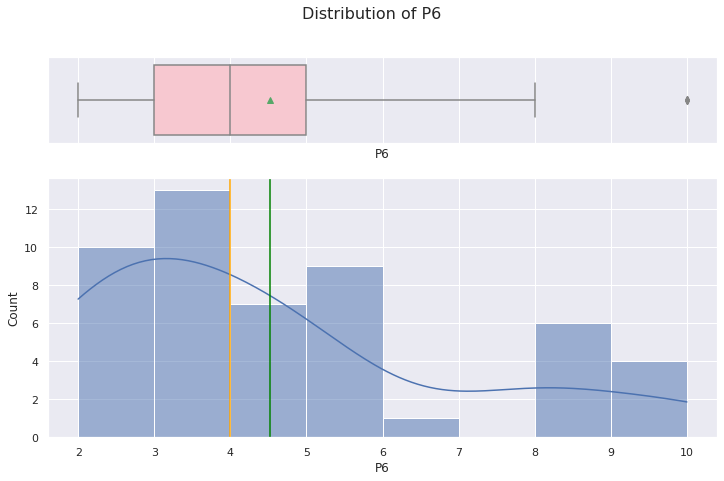

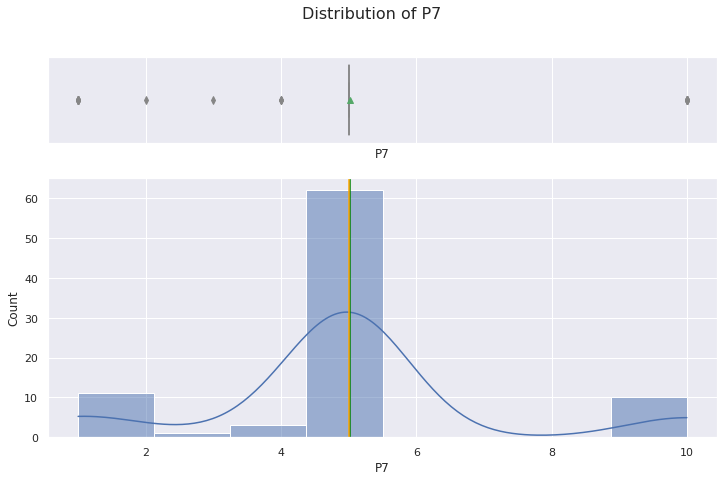

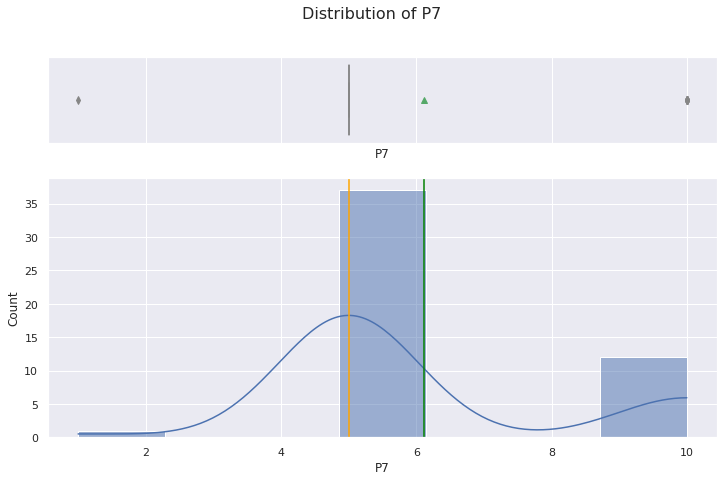

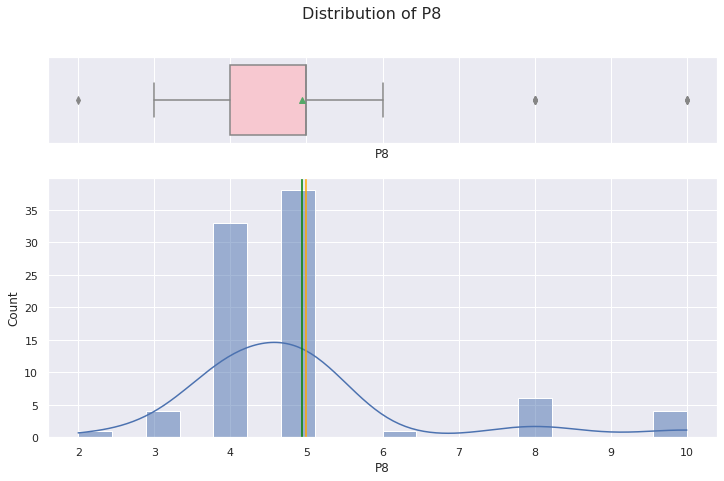

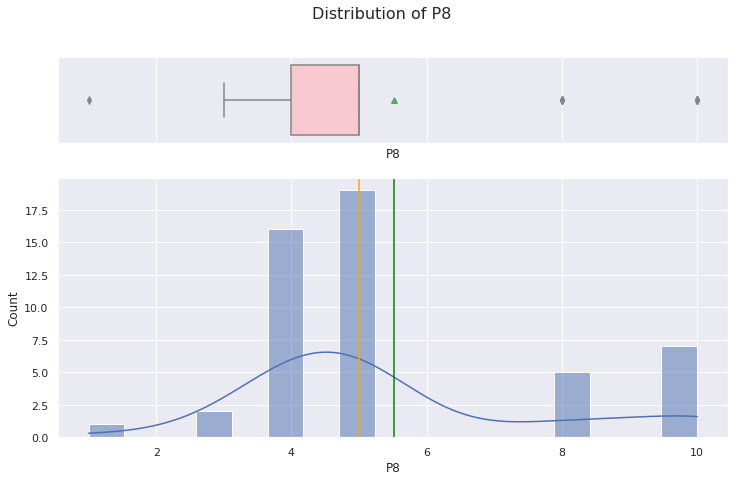

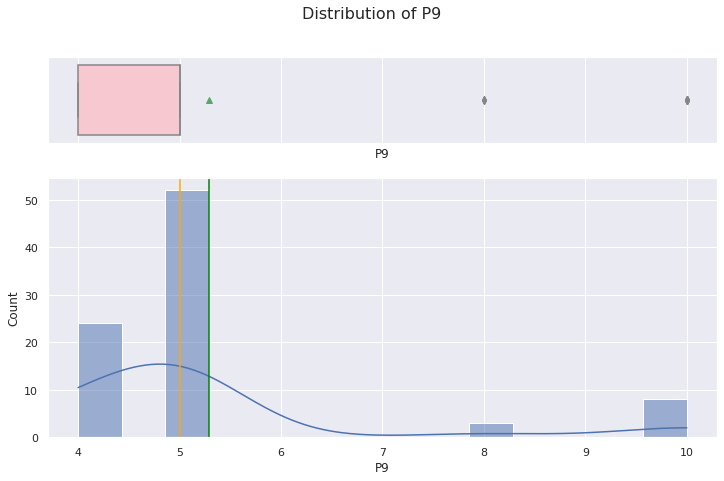

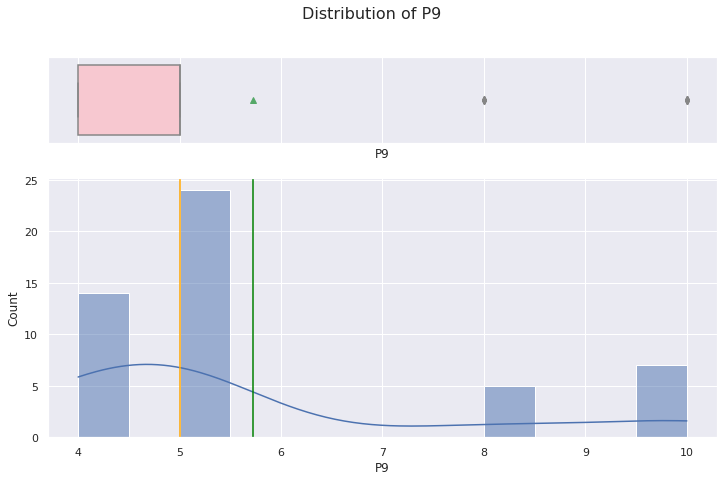

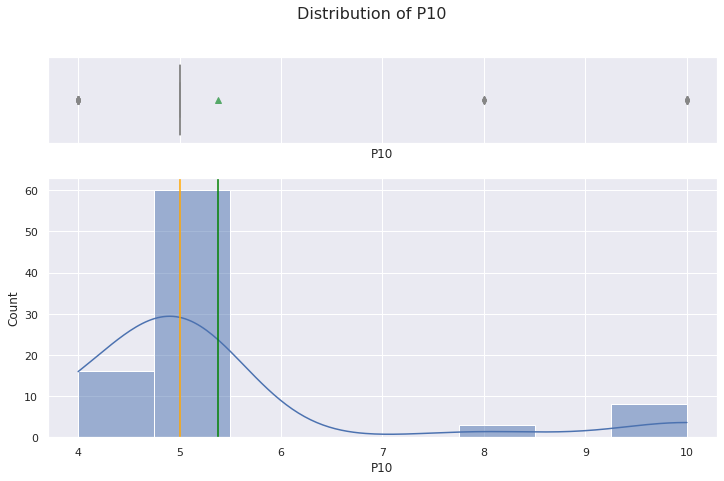

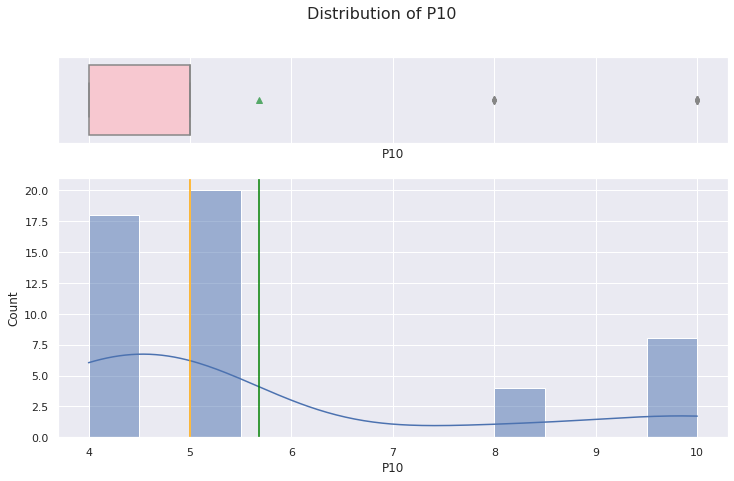

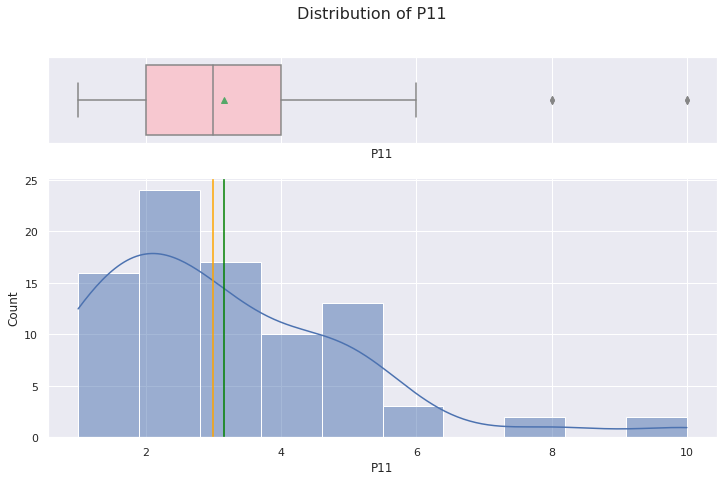

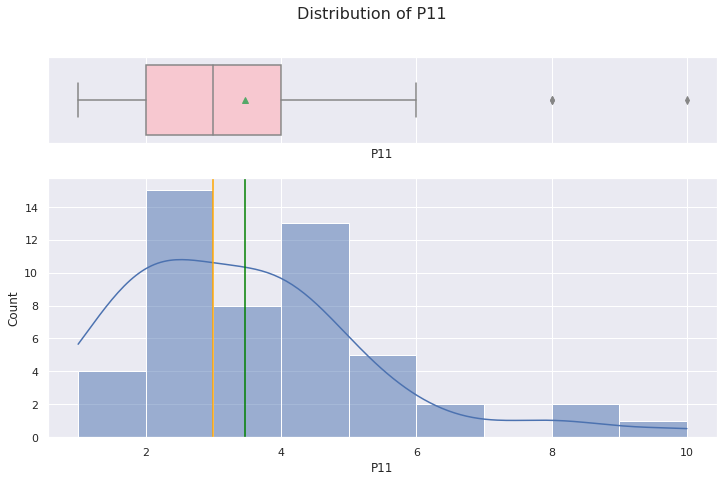

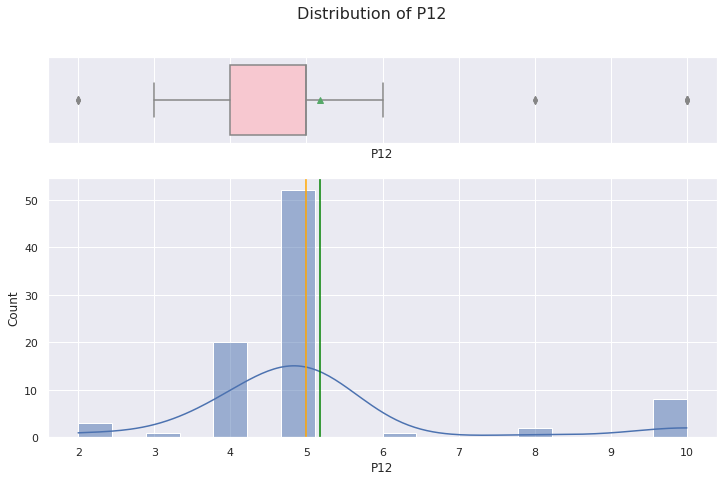

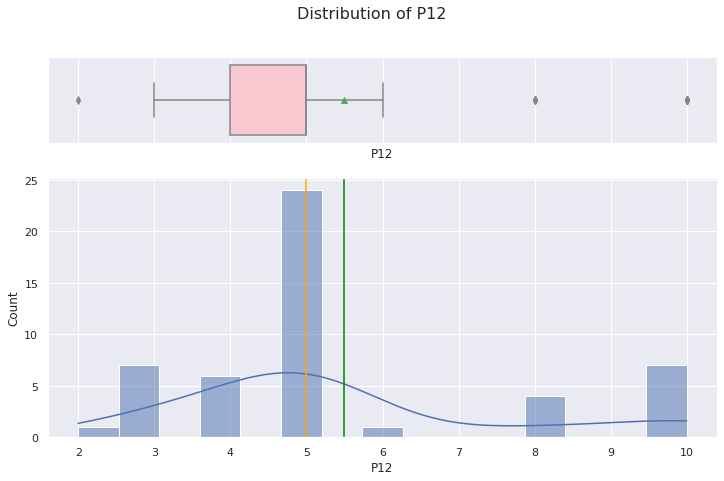

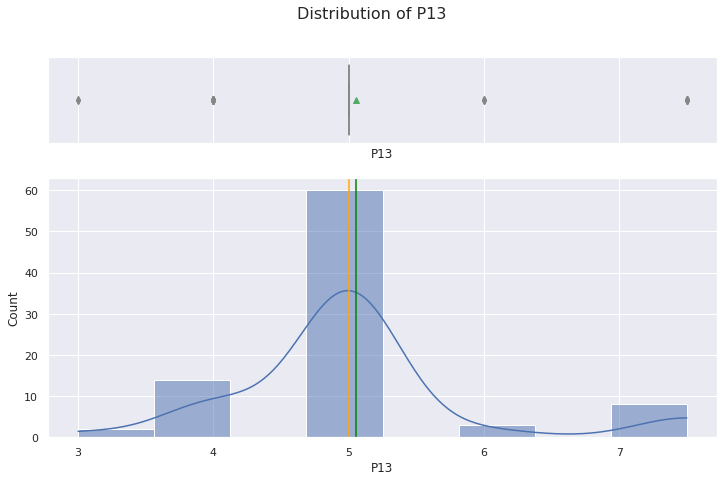

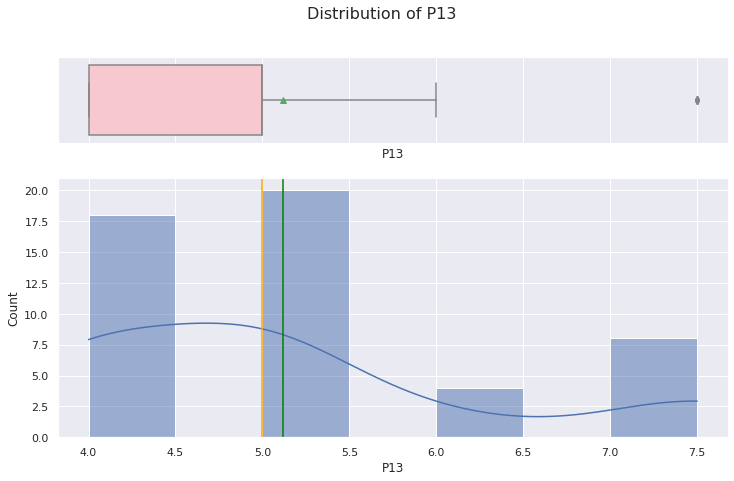

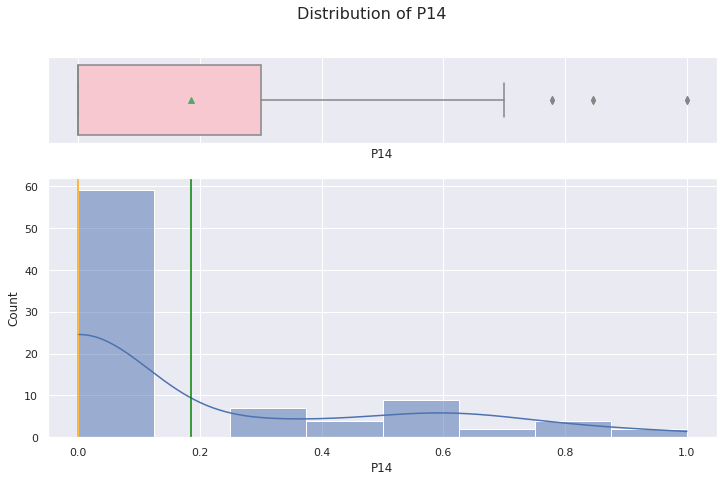

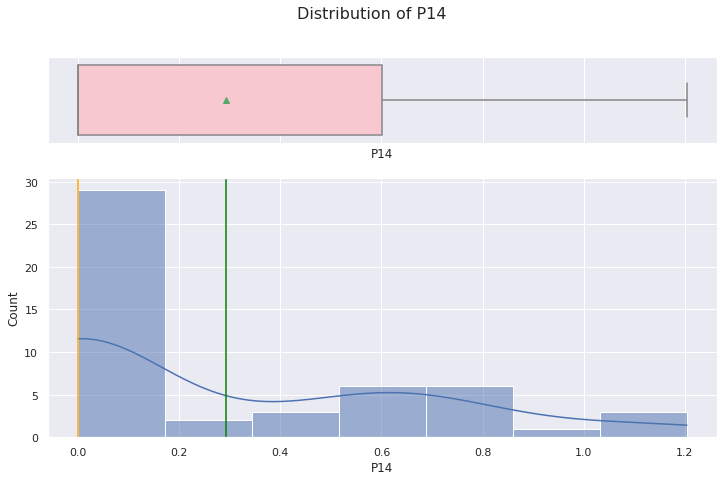

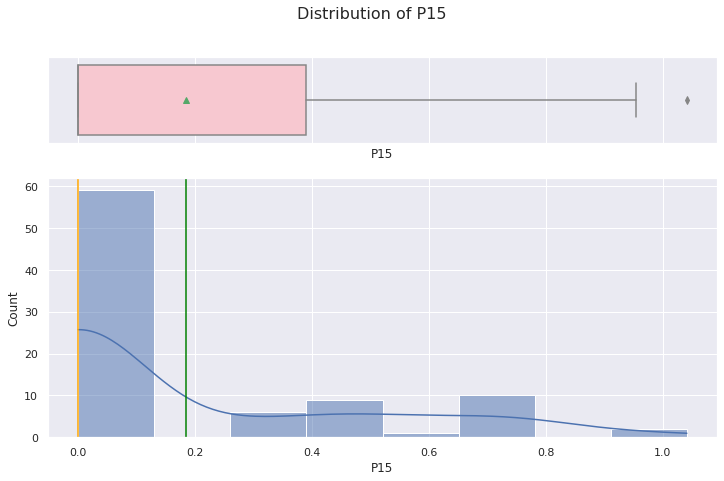

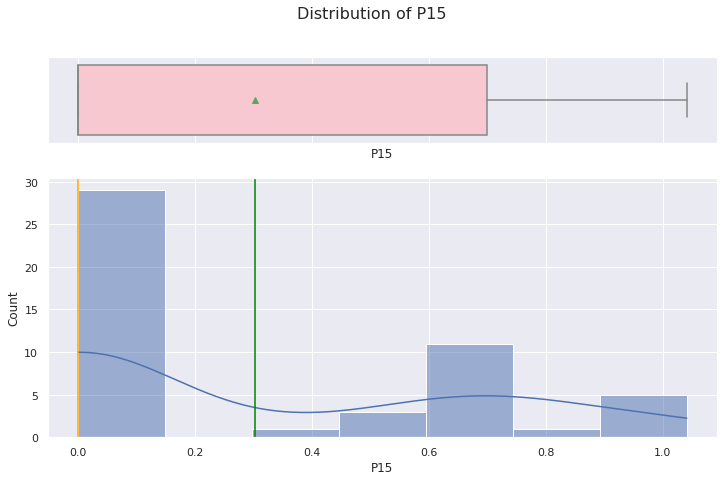

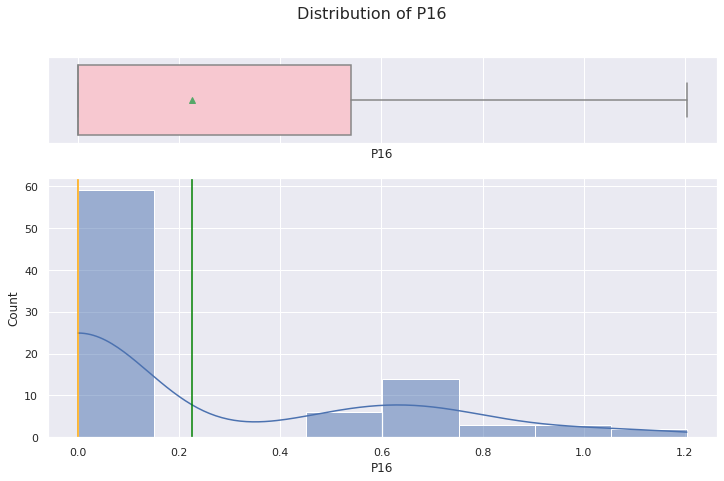

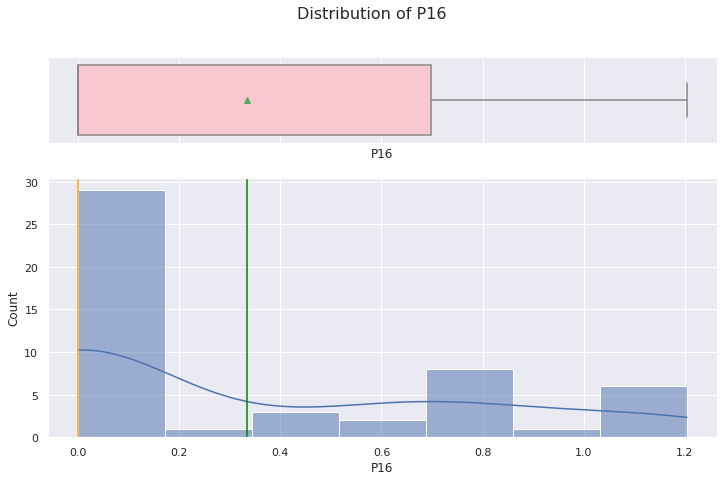

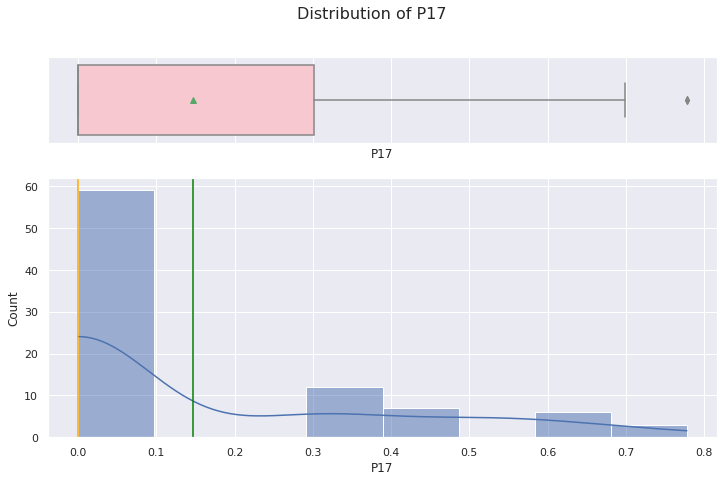

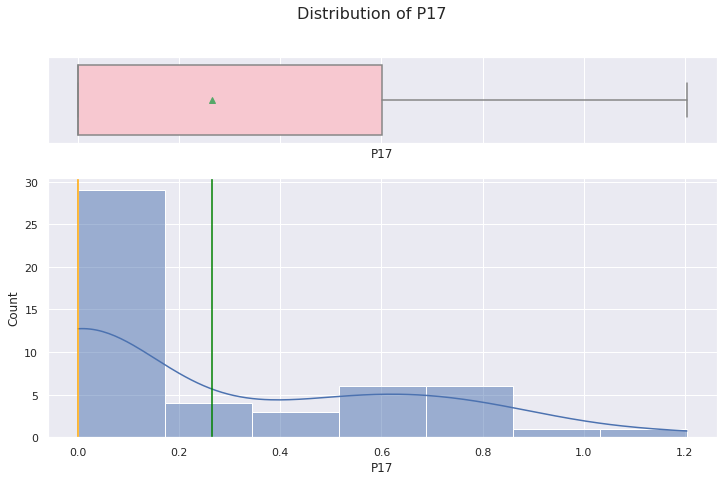

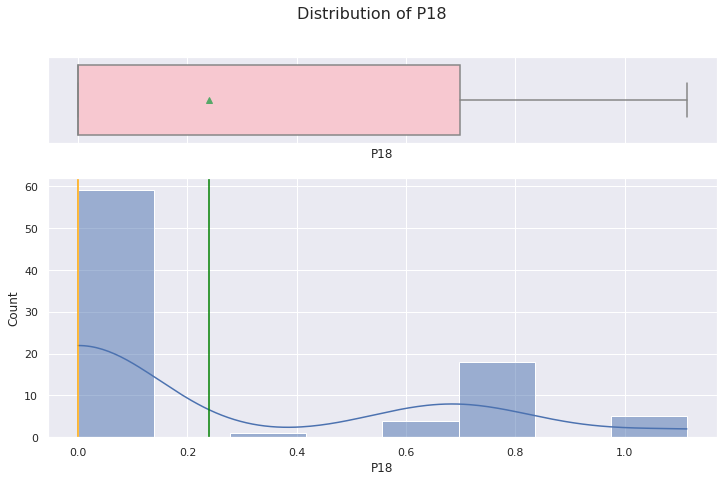

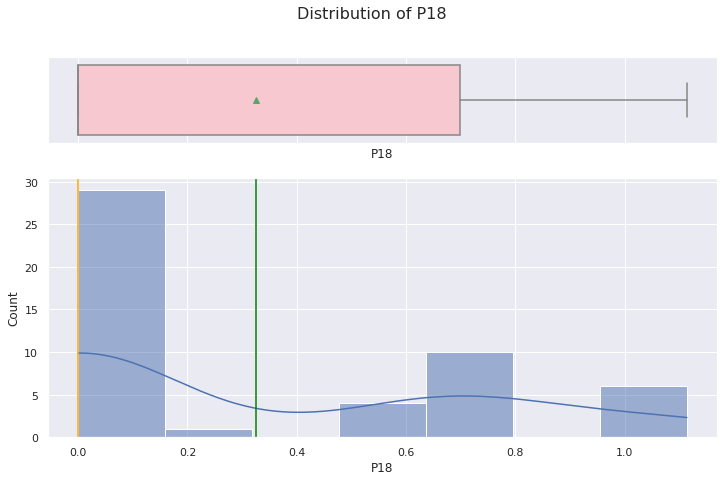

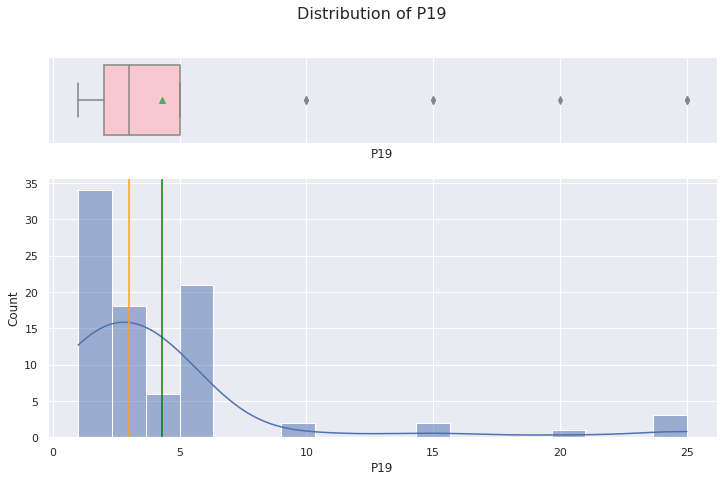

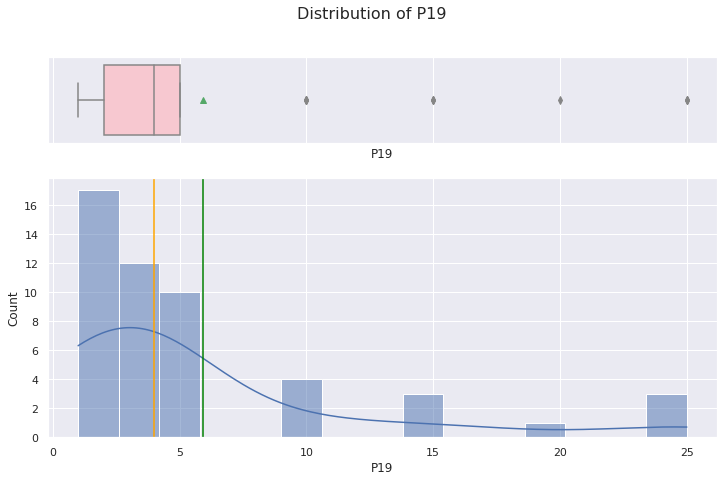

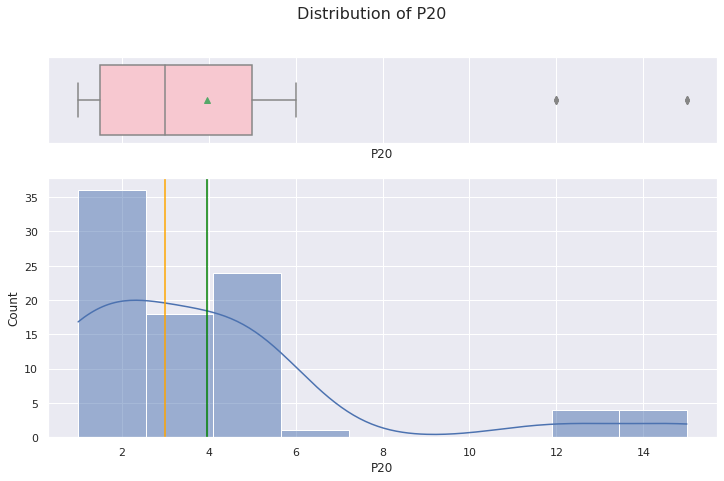

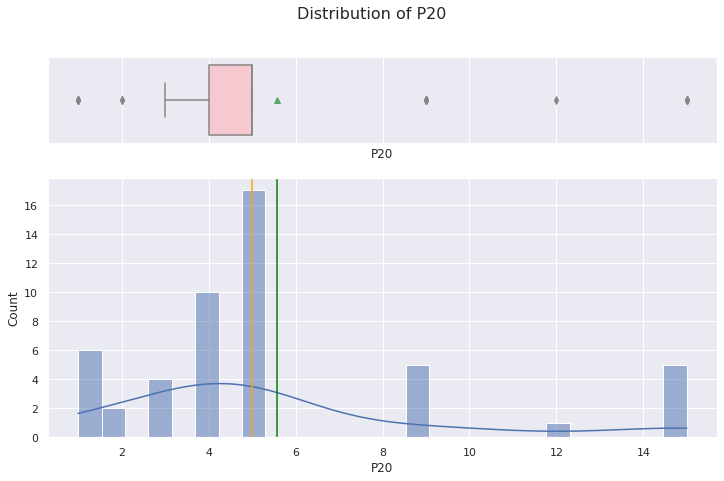

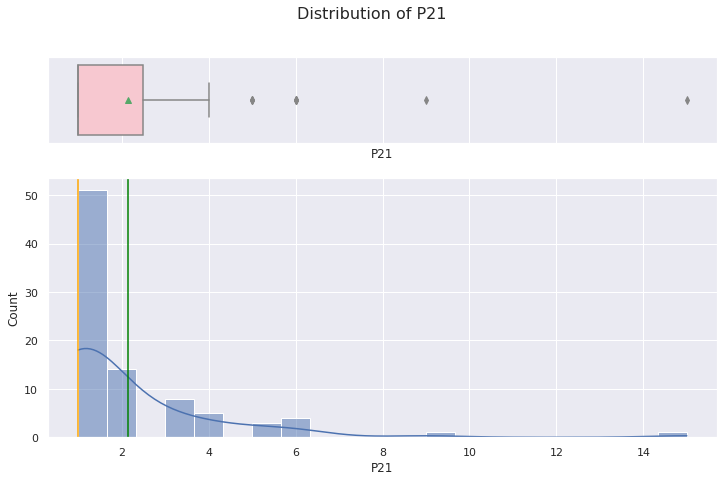

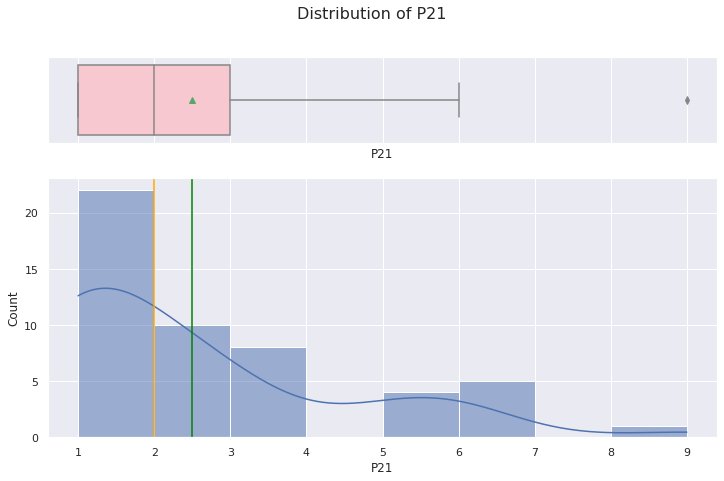

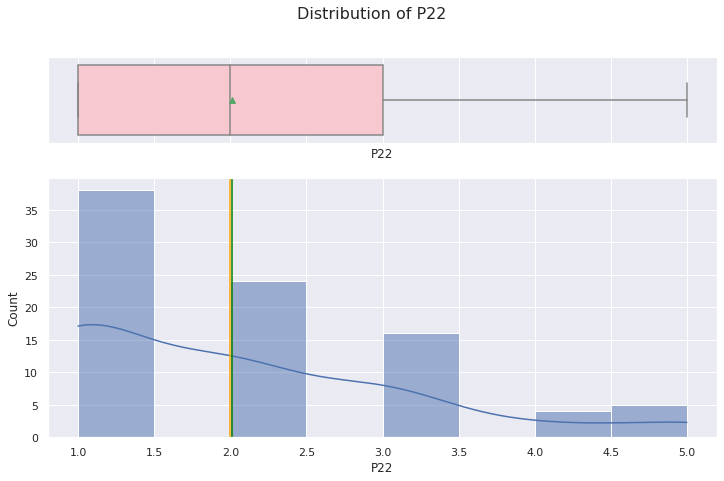

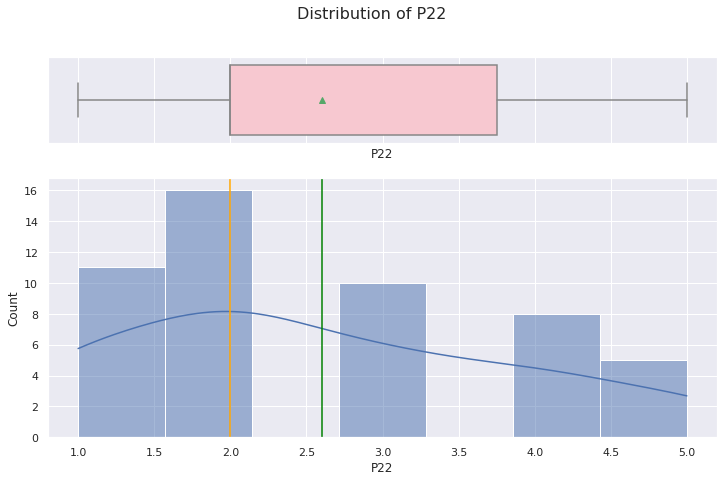

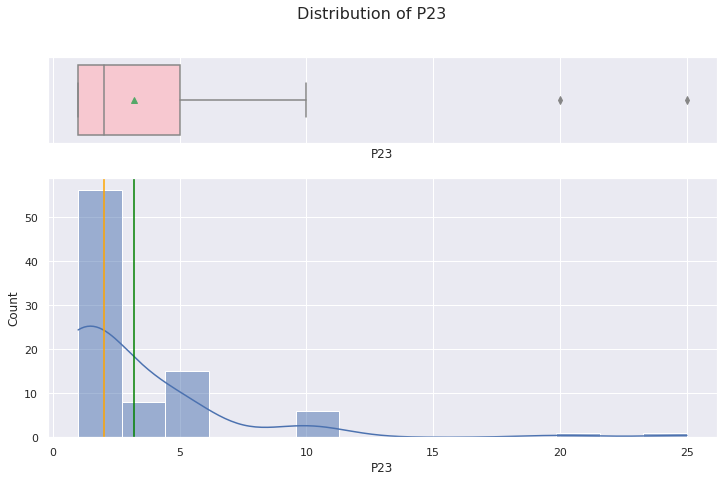

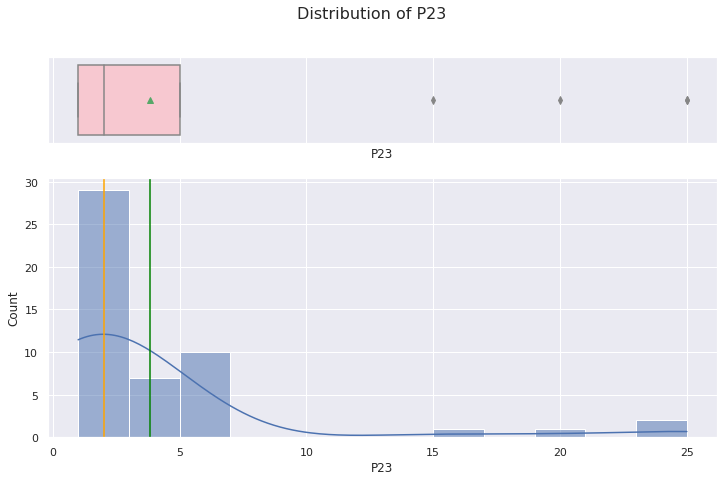

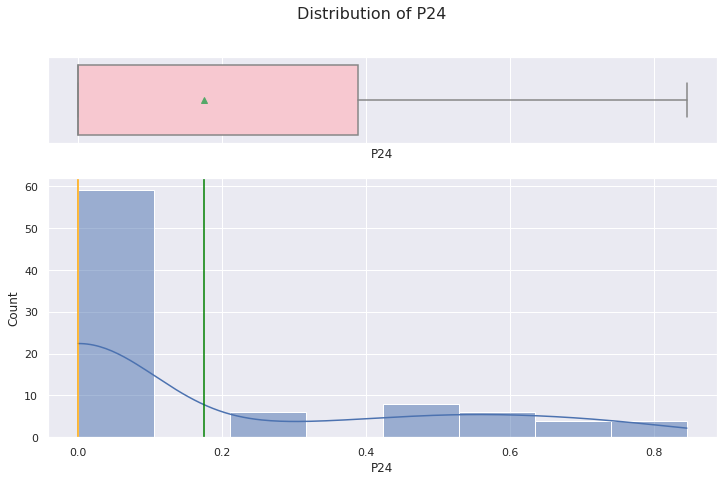

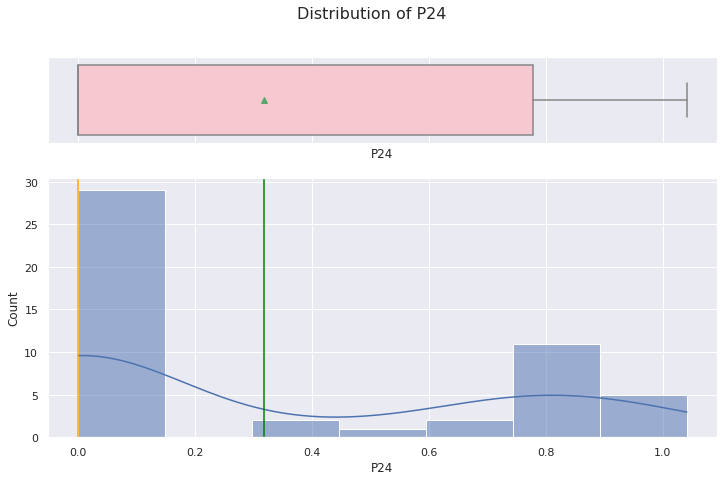

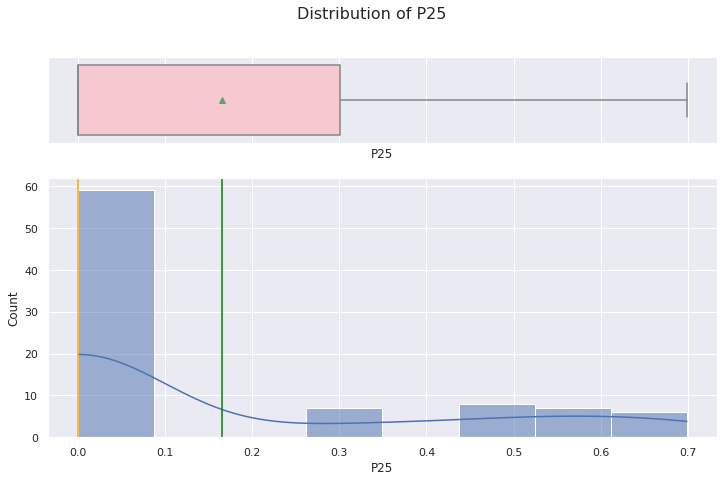

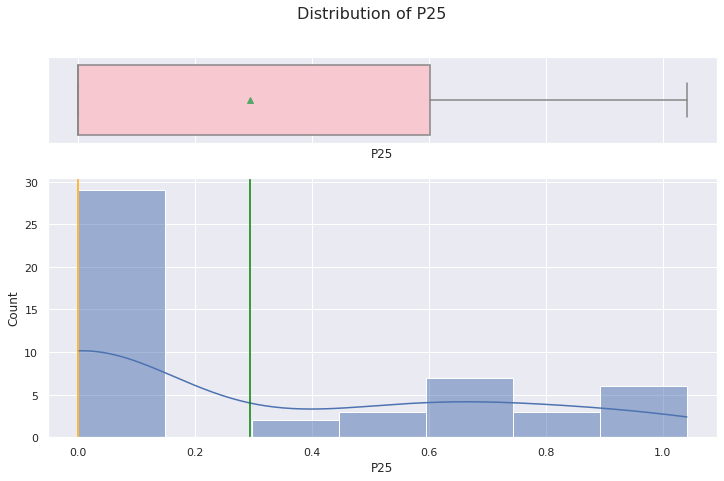

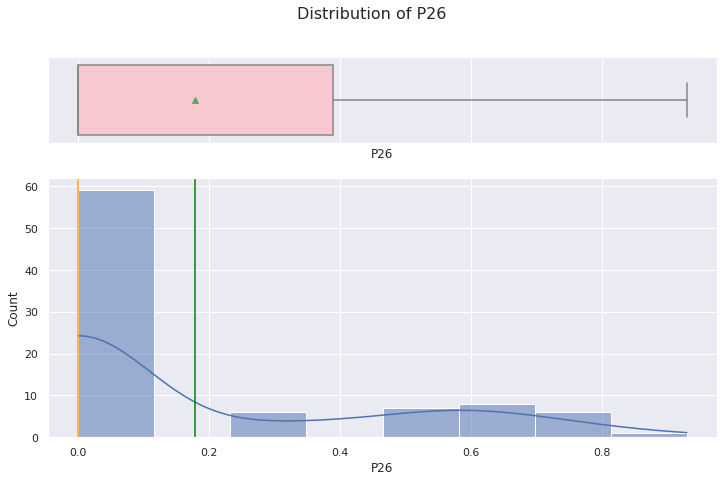

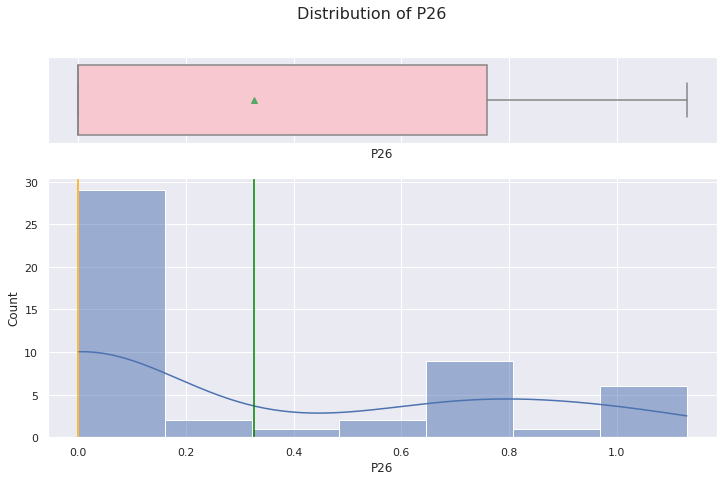

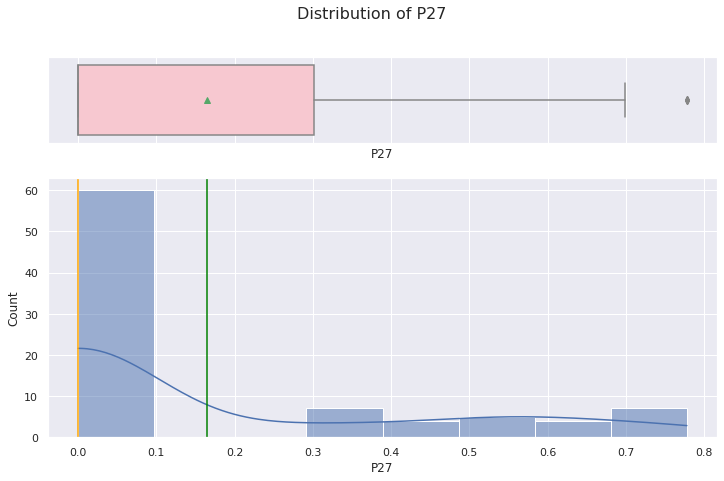

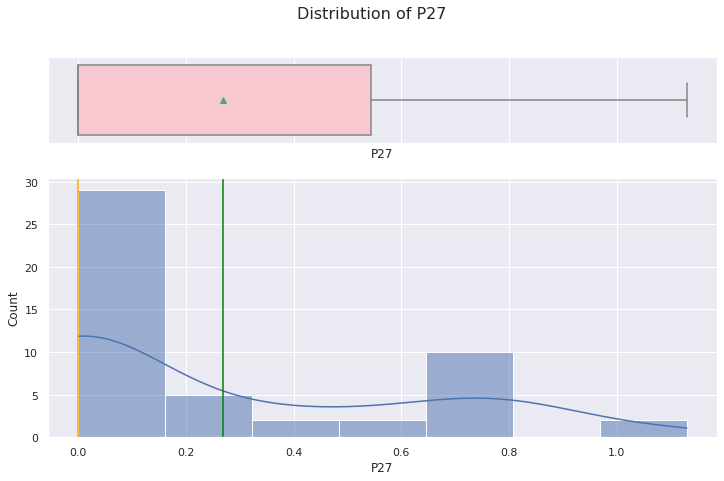

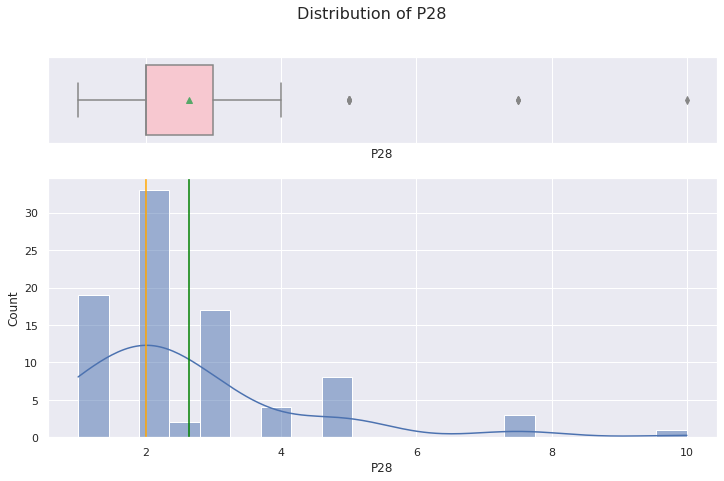

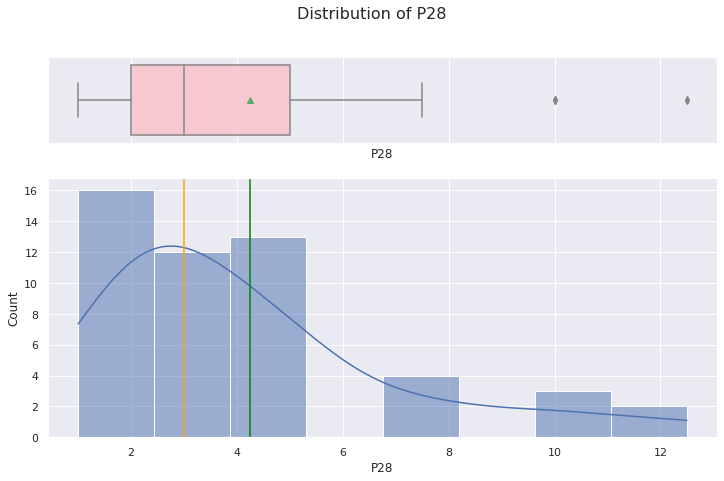

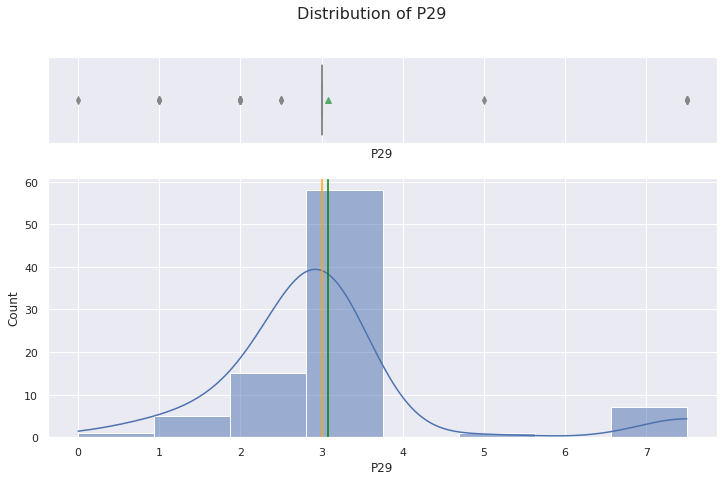

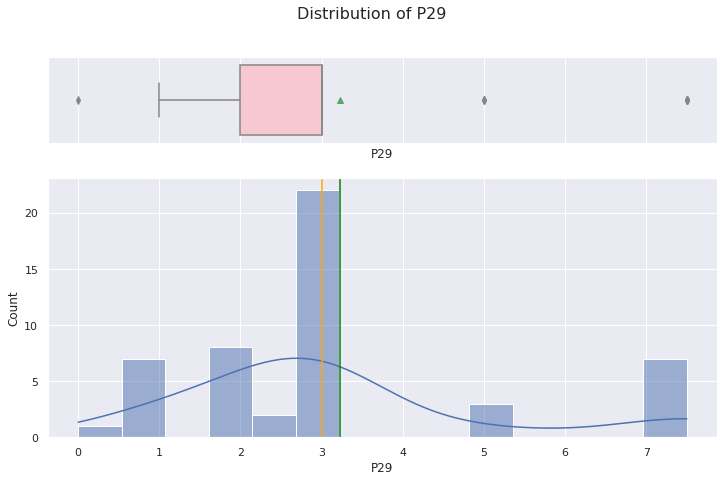

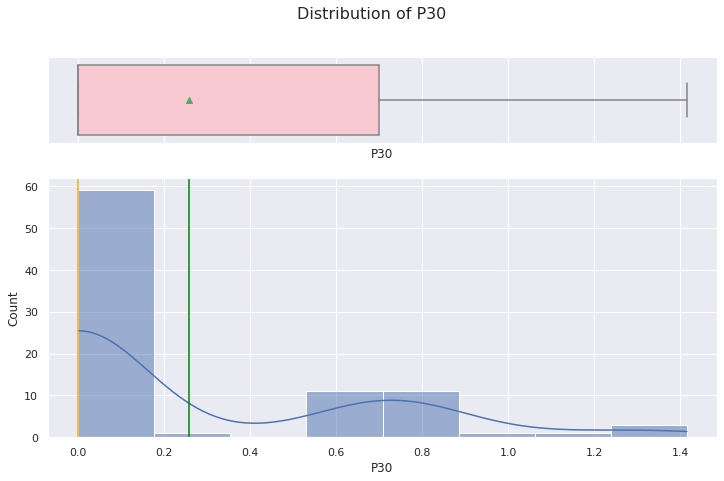

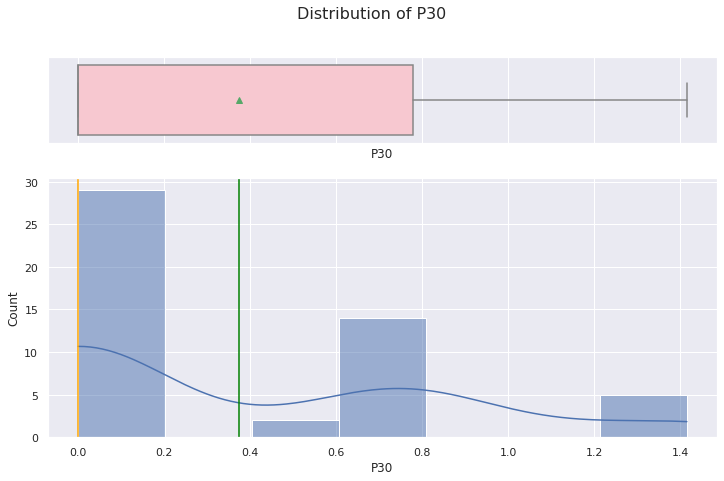

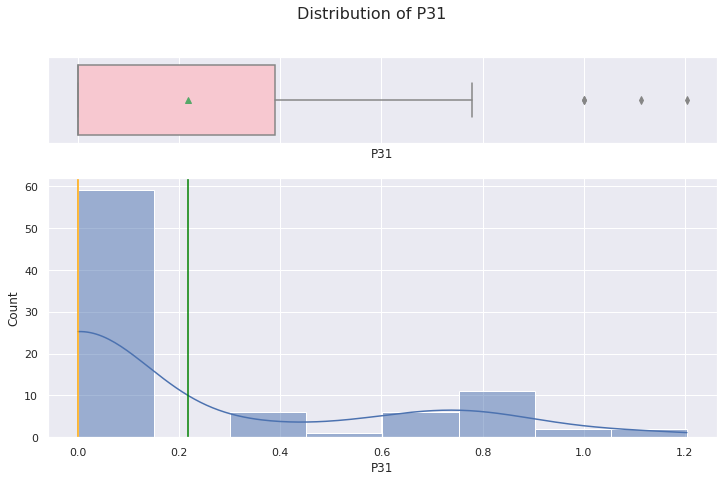

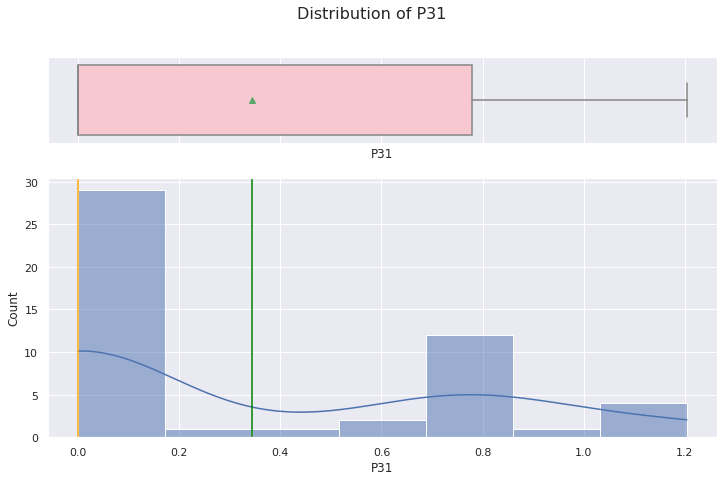

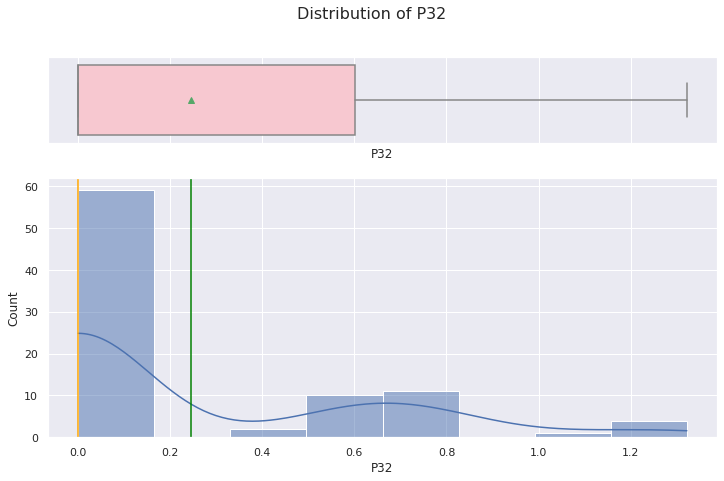

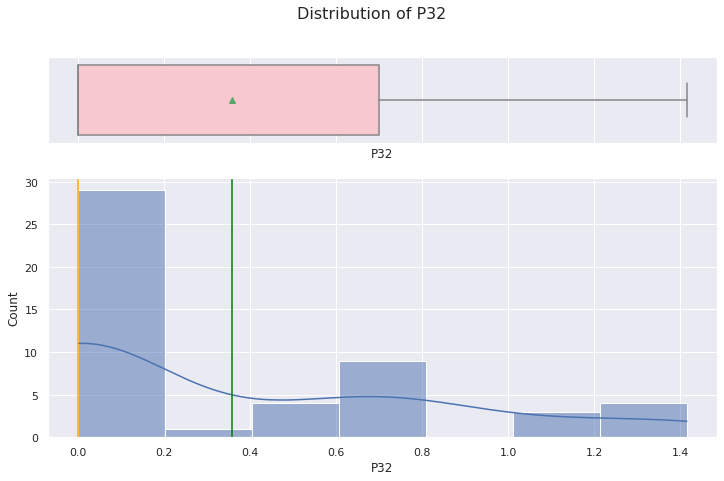

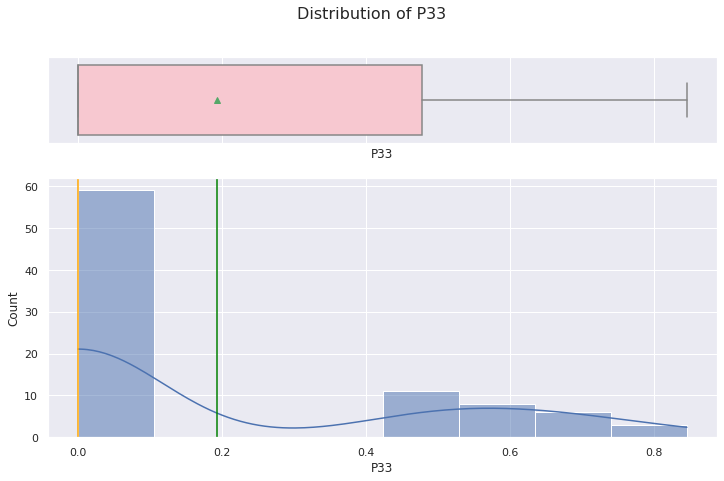

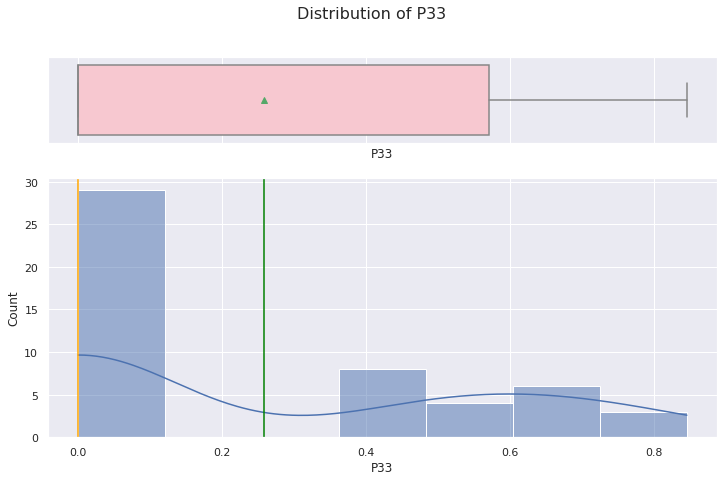

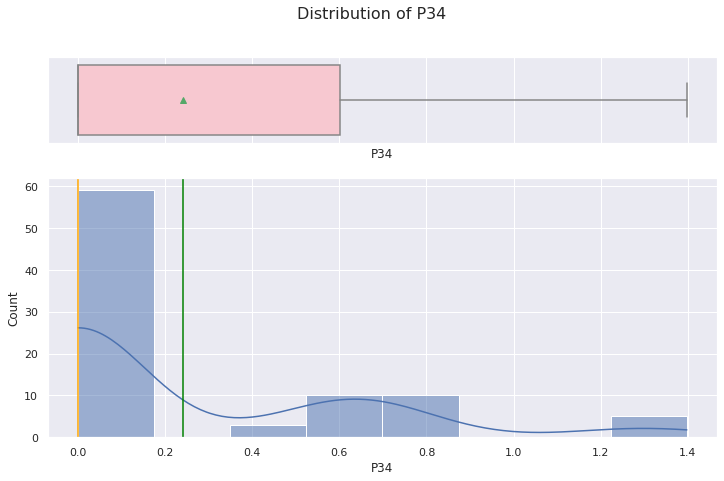

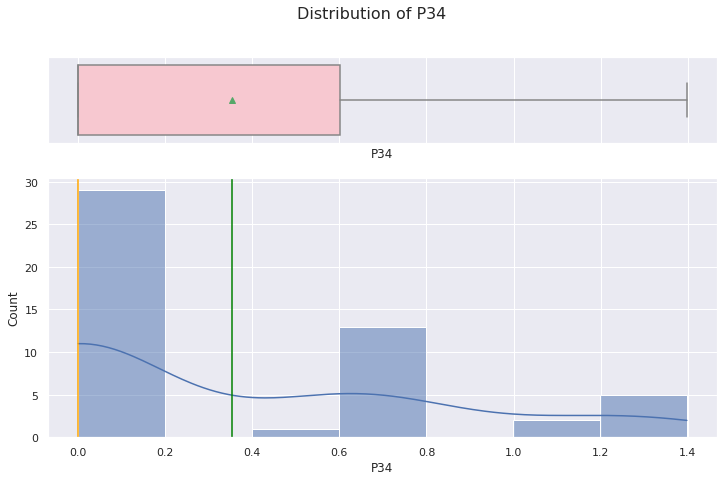

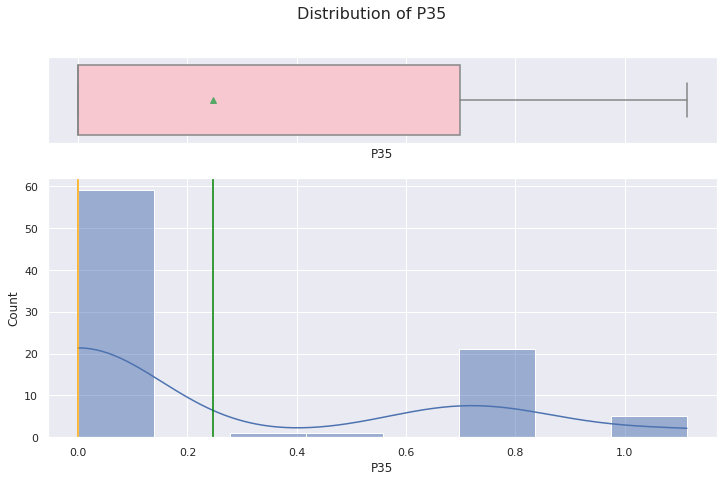

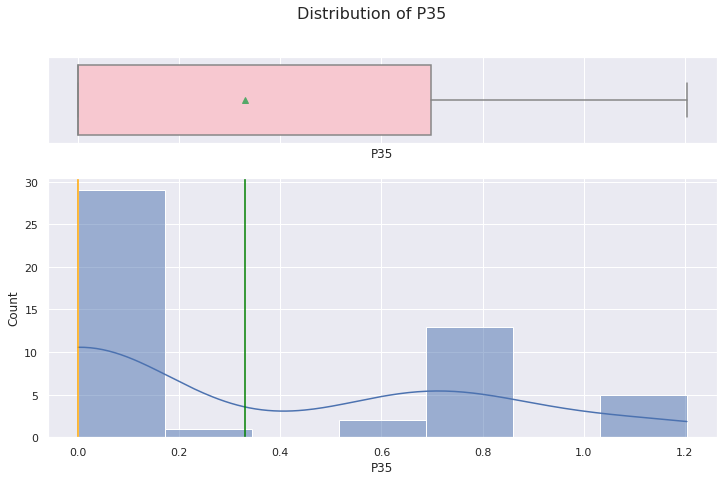

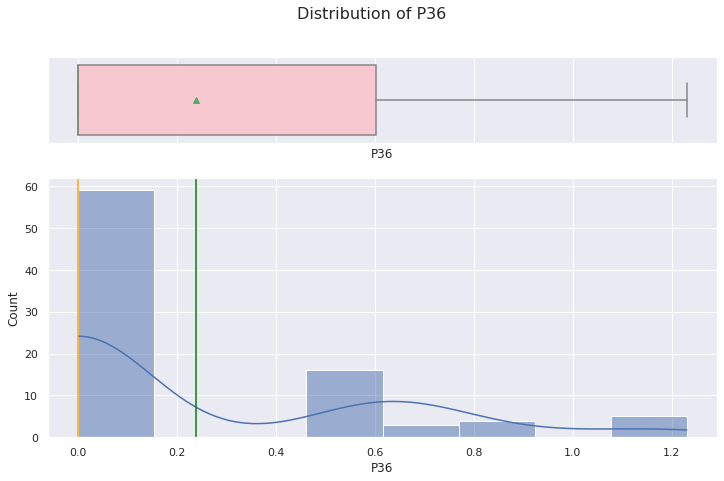

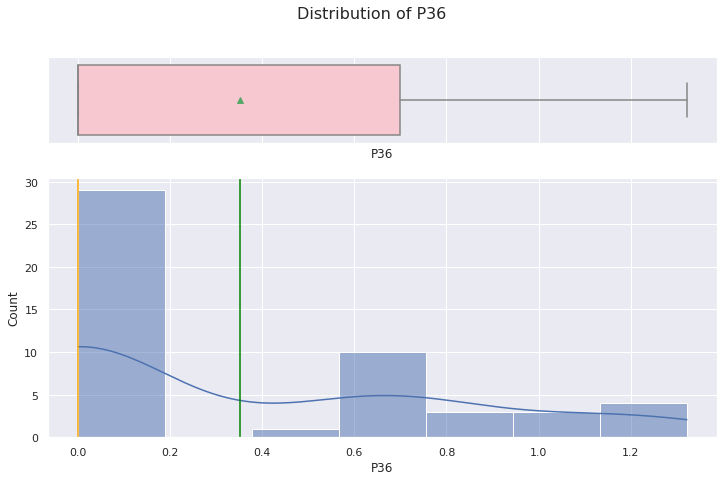

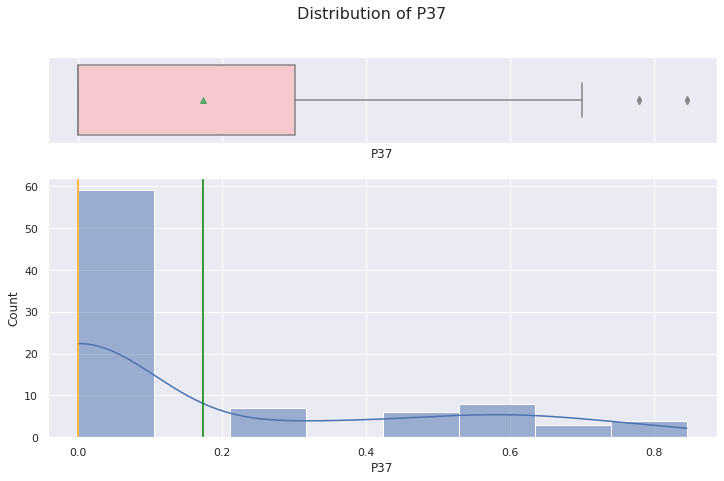

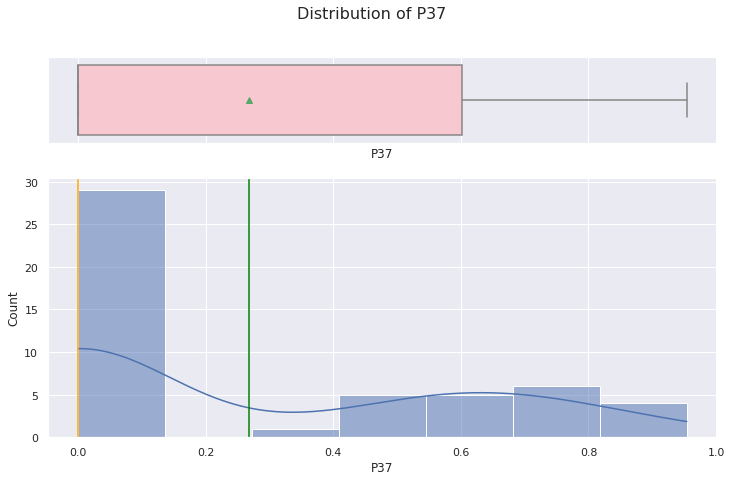

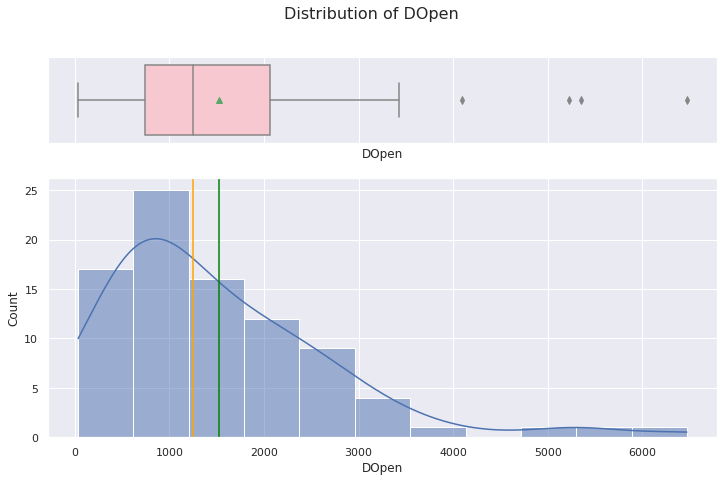

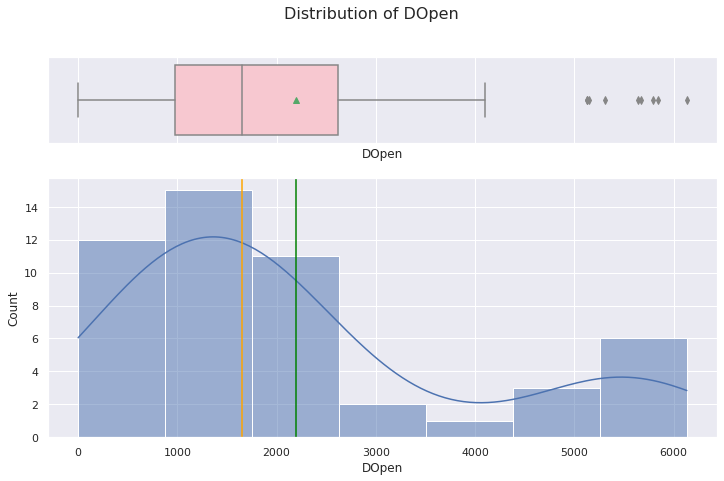

In [ ]:
df_train2 = df_train.copy()
df_test2 = df_test.copy()
df_train2log = df_train.copy()
columnZeros = ['P14','P15','P16','P17','P18','P24','P25','P26','P27','P30','P31','P32','P33','P34','P35','P36','P37']
for i in columnZeros:
  df_train2[i][df_train2[i] == 0] = np.nan
  df_train2log[i] = np.log10(df_train2log[i]+1)
for i in cols_num:
  hist_box(df_train2log[df_train2log["City"] != 'İstanbul'],i)
  hist_box(df_train2log[df_train2log["City"] == 'İstanbul'],i)

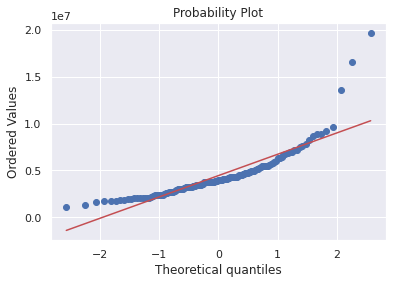

In [ ]:
from scipy import stats
stats.probplot(df_train['revenue'], plot=plt);

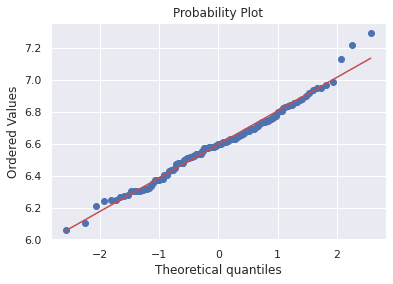

In [ ]:
stats.probplot(np.log10(df_train['revenue']), plot=plt);

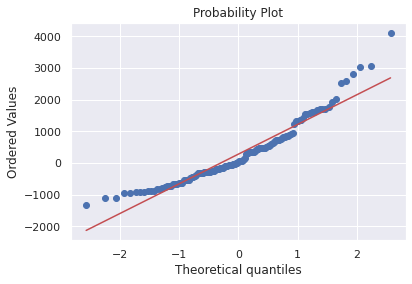

In [ ]:
stats.probplot((df_train['RevPdayC']), plot=plt);

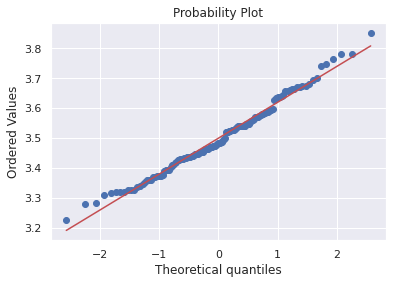

In [ ]:
stats.probplot(np.log10(df_train['RevPdayC']+3000), plot=plt);

Linear data on a probability plot indicate gaussian distribution

# Correlation plots

In [ ]:
# Encoding Categorical Variable
cat_vars = ['City Group', 'Type']
for i in cat_vars:
    df_train[i+"_cat"] = df_train[i].astype('category').cat.codes
    df_test[i+"_cat"] = df_test[i].astype('category').cat.codes
    df_train2[i+"_cat"] = df_train2[i].astype('category').cat.codes
    df_test2[i+"_cat"] = df_test2[i].astype('category').cat.codes

Taking the log of the revenue results in a normal probability

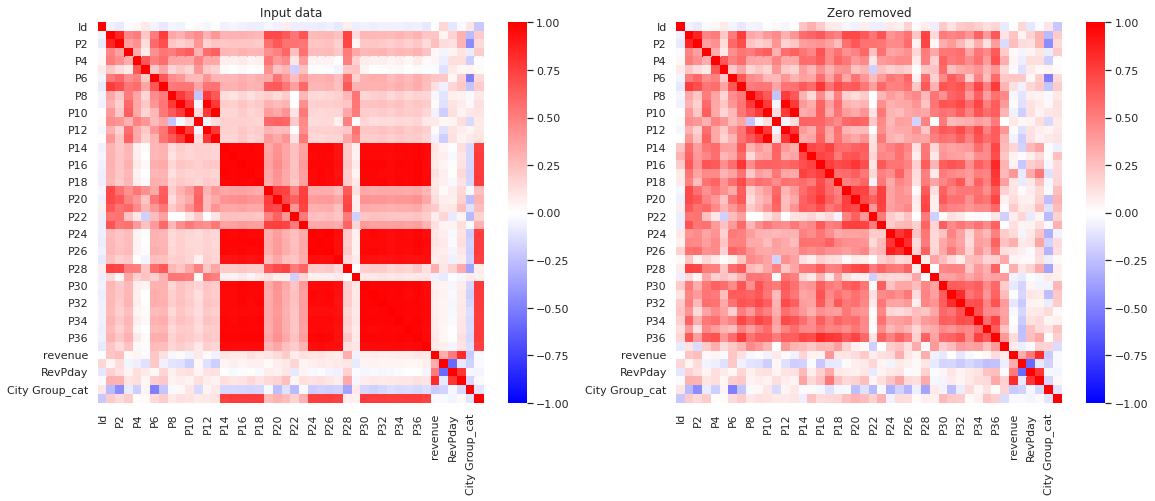

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(19, 7))
g1 = sns.heatmap(data = df_train.corr(method = "spearman"), vmin = -1, vmax = 1, annot = False, cmap ='bwr', ax=ax[0]).set(title='Input data');
g2 = sns.heatmap(data = df_train2.corr(method = "spearman"), vmin = -1, vmax = 1, annot = False, cmap ='bwr', ax=ax[1]).set(title='Zero removed');
fig.show()

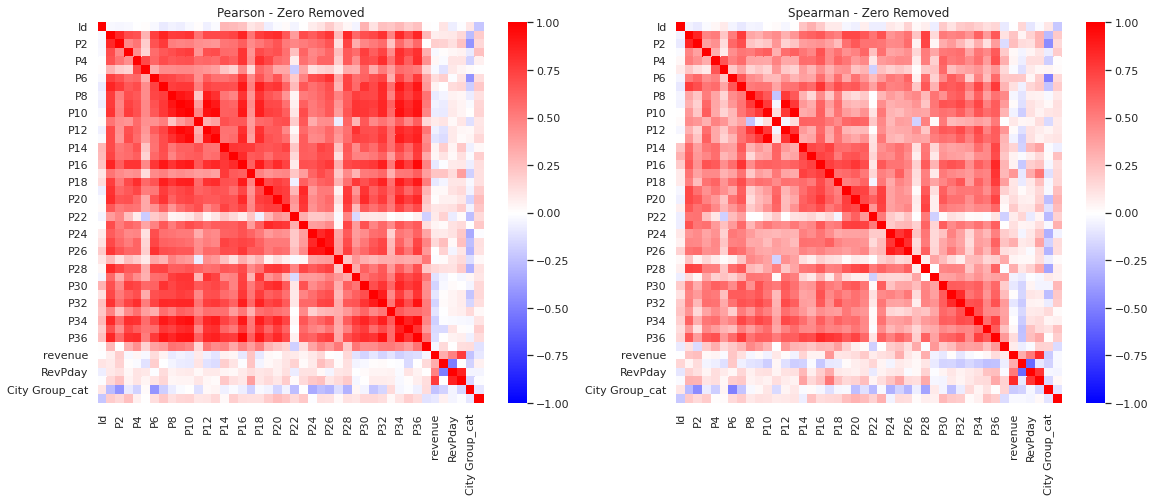

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(19, 7))
g1 = sns.heatmap(data = df_train2.corr(), vmin = -1, vmax = 1, annot = False, cmap ='bwr', ax=ax[0]).set(title='Pearson - Zero Removed');
g2 = sns.heatmap(data = df_train2.corr(method = "spearman"), vmin = -1, vmax = 1, annot = False, cmap ='bwr', ax=ax[1]).set(title='Spearman - Zero Removed');
fig.show()

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Id              100000 non-null  int64         
 1   Open Date       100000 non-null  object        
 2   City            100000 non-null  object        
 3   City Group      100000 non-null  object        
 4   Type            100000 non-null  object        
 5   P1              100000 non-null  int64         
 6   P2              100000 non-null  float64       
 7   P3              100000 non-null  float64       
 8   P4              100000 non-null  float64       
 9   P5              100000 non-null  int64         
 10  P6              100000 non-null  int64         
 11  P7              100000 non-null  int64         
 12  P8              100000 non-null  int64         
 13  P9              100000 non-null  int64         
 14  P10             100000 non-null  int6

In [ ]:
cols_attr = list(df_train.drop(columns = ["Id", 'RevPday','RevPdayC']).select_dtypes(include = ["int64", "float64","int8"]))

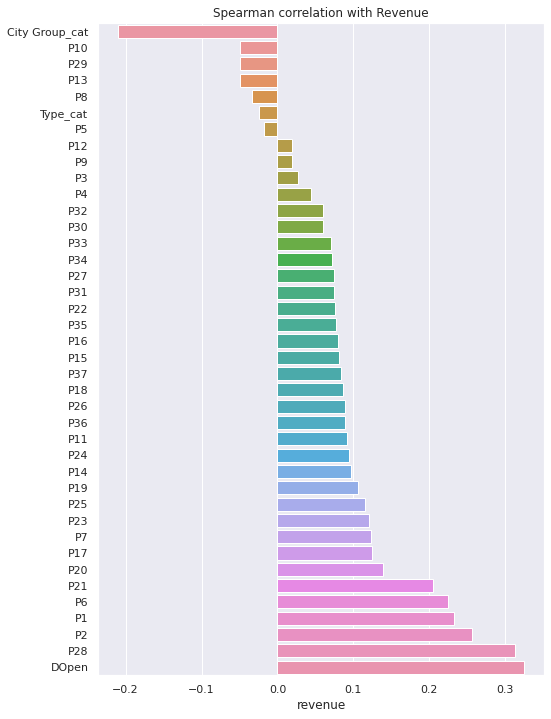

In [ ]:
# Creating a plot for the correlation of features to the target variable
fig = plt.figure(figsize=(8,12))
target_corr = df_train[cols_attr].corr(method='spearman')['revenue']
#target_corr = df_train[df_train.columns[1:]].corr()['revenue']
order_corr = target_corr.sort_values()
y = pd.DataFrame(order_corr).index[:-1]
x = pd.DataFrame(order_corr).revenue[:-1]
sns.barplot(x, y, orient='h').set(title='Spearman correlation with Revenue')
plt.show()

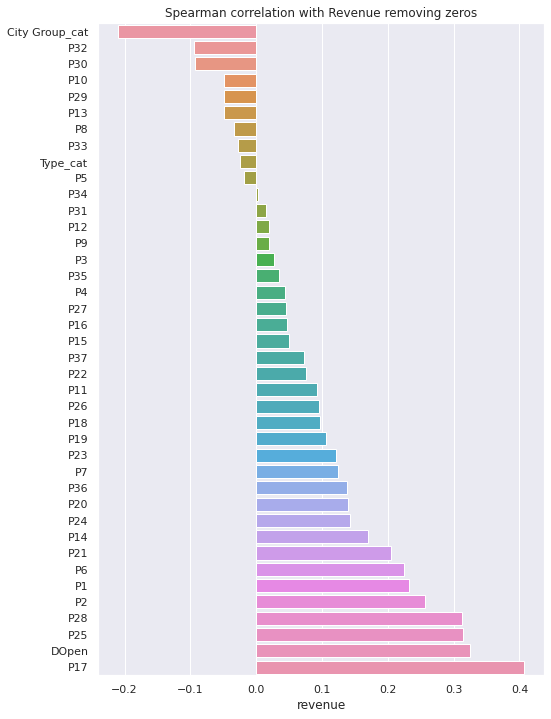

In [ ]:
# Creating a plot for the correlation of features to the target variable
fig = plt.figure(figsize=(8,12))
target_corr = df_train2[cols_attr].corr(method='spearman')['revenue']
#target_corr = df_train[df_train.columns[1:]].corr()['revenue']
order_corr = target_corr.sort_values()
y = pd.DataFrame(order_corr).index[:-1]
x = pd.DataFrame(order_corr).revenue[:-1]
sns.barplot(x, y, orient='h').set(title='Spearman correlation with Revenue removing zeros')
plt.show()

In [ ]:
cols_attr = list(df_train.drop(columns = ["Id", 'revenue','RevPday']).select_dtypes(include = ["int64", "int8","float64"]))

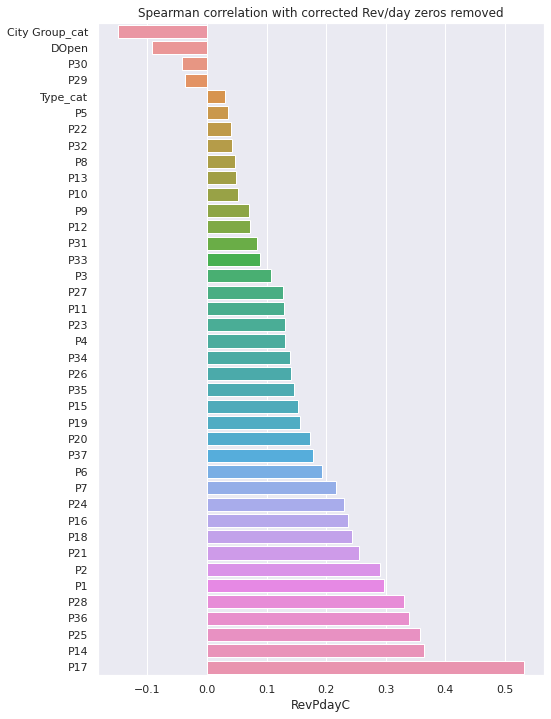

In [ ]:
# Creating a plot for the correlation of features to the target variable
fig = plt.figure(figsize=(8,12))
target_corr = df_train2[cols_attr].corr(method='spearman')['RevPdayC']
#target_corr = df_train[df_train.columns[1:]].corr()['revenue']
order_corr = target_corr.sort_values()
y = pd.DataFrame(order_corr).index[:-1]
x = pd.DataFrame(order_corr).RevPdayC[:-1]
sns.barplot(x, y, orient='h').set(title='Spearman correlation with corrected Rev/day zeros removed')
plt.show()

The question become how to handle the nan point. Could fill with the mean or medium or use XGBoost that does require nan replacement

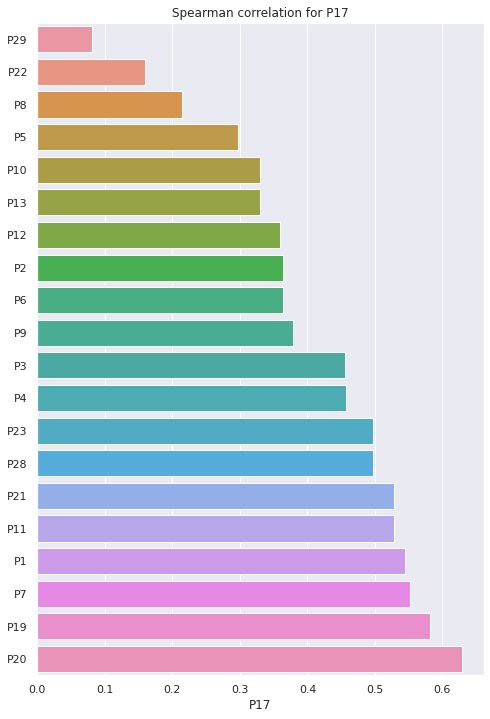

In [ ]:
cols_complete = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13',  
                 'P19', 'P20','P21', 'P22', 'P23', 'P28', 'P29','P17']
# Creating a plot for the correlation of features to the target variable
fig = plt.figure(figsize=(8,12))
target_corr = df_train2[cols_complete].corr(method='spearman')['P17']
#target_corr = df_train[df_train.columns[1:]].corr()['revenue']
order_corr = target_corr.sort_values()
y = pd.DataFrame(order_corr).index[:-1]
x = pd.DataFrame(order_corr).P17[:-1]
sns.barplot(x, y, orient='h').set(title='Spearman correlation for P17')
plt.show()

-0.3635116048579985 [ 0.10511672 -0.13381924  0.0318851   0.30427413 -0.05847986  0.3504345
 -0.14638361  0.0148875 ]


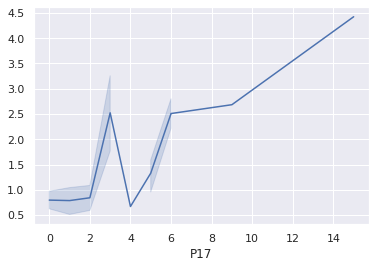

In [ ]:
cols_full = ['P20', 'P19', 'P7', 'P1', 'P11', 'P21', 'P28', 'P23']
# Linear model on the train data
features = ['DOpen']
model_lr.fit(df_train2[cols_full], df_train['P17'])
P17Int = model_lr.intercept_
P17attr = model_lr.coef_
#print('Intercept is ', DOpenInt,' +', DOpen1[0],' days open')
print(P17Int,P17attr)

p17est = P17Int + (df_train2['P20']*P17attr[0] + df_train2['P19']*P17attr[1] + df_train2['P7']*P17attr[2] 
        + df_train2['P1']*P17attr[3] + df_train2['P11']*P17attr[4] + df_train2['P21']*P17attr[5] 
        + df_train2['P28']*P17attr[6] + df_train2['P23']*P17attr[7])
sns.lineplot(x=df_train['P17'],y=p17est)

In [ ]:
df_train3 = df_train2.fillna(df_train2.mean()).copy()

In [ ]:
df_train3.describe().T

count          mean           std           min           25%  \
Id              137.0  6.800000e+01  3.969257e+01  0.000000e+00  3.400000e+01   
P1              137.0  4.014599e+00  2.910391e+00  1.000000e+00  2.000000e+00   
P2              137.0  4.408759e+00  1.514900e+00  1.000000e+00  4.000000e+00   
P3              137.0  4.317518e+00  1.032337e+00  0.000000e+00  4.000000e+00   
P4              137.0  4.372263e+00  1.016462e+00  3.000000e+00  4.000000e+00   
P5              137.0  2.007299e+00  1.209620e+00  1.000000e+00  1.000000e+00   
P6              137.0  3.357664e+00  2.134235e+00  1.000000e+00  2.000000e+00   
P7              137.0  5.423358e+00  2.296809e+00  1.000000e+00  5.000000e+00   
P8              137.0  5.153285e+00  1.858567e+00  1.000000e+00  4.000000e+00   
P9              137.0  5.445255e+00  1.834793e+00  4.000000e+00  4.000000e+00   
P10             137.0  5.489051e+00  1.847561e+00  4.000000e+00  5.000000e+00   
P11             137.0  3.262774e+00  1.910767e+00  1.000000e+00  2.000000e+00   
P12             137.0  5.299270e+00  1.941668e+00  2.000000e+00  4.000000e+00   
P13             137.0  5.080292e+00  1.036527e+00  3.000000e+00  5.000000e+00   
P14             137.0  3.959184e+00  1.955231e+00  1.000000e+00  3.959184e+00   
P15             137.0  3.877551e+00  1.507982e+00  1.000000e+00  3.877551e+00   
P16             137.0  5.428571e+00  2.338929e+00  1.000000e+00  5.000000e+00   
P17             137.0  2.897959e+00  1.476507e+00  1.000000e+00  2.897959e+00   
P18             137.0  5.428571e+00  2.018299e+00  1.000000e+00  4.000000e+00   
P19             137.0  4.905109e+00  5.604467e+00  1.000000e+00  2.000000e+00   
P20             137.0  4.547445e+00  3.708041e+00  1.000000e+00  2.000000e+00   
P21             137.0  2.270073e+00  2.052630e+00  1.000000e+00  1.000000e+00   
P22             137.0  2.226277e+00  1.230690e+00  1.000000e+00  1.000000e+00   
P23             137.0  3.423358e+00  4.559609e+00  1.000000e+00  1.000000e+00   
P24             137.0  3.836735e+00  1.379188e+00  1.000000e+00  3.836735e+00   
P25             137.0  3.387755e+00  1.376357e+00  1.000000e+00  3.387755e+00   
P26             137.0  4.112245e+00  1.705598e+00  1.000000e+00  4.112245e+00   
P27             137.0  3.270833e+00  1.348962e+00  1.000000e+00  3.270833e+00   
P28             137.0  3.222628e+00  2.308806e+00  1.000000e+00  2.000000e+00   
P29             137.0  3.135036e+00  1.680887e+00  0.000000e+00  2.500000e+00   
P30             137.0  7.632653e+00  4.143907e+00  1.000000e+00  5.000000e+00   
P31             137.0  5.428571e+00  2.348341e+00  1.000000e+00  5.000000e+00   
P32             137.0  7.061224e+00  3.976786e+00  1.000000e+00  5.000000e+00   
P33             137.0  3.183673e+00  7.343812e-01  2.000000e+00  3.183673e+00   
P34             137.0  6.959184e+00  3.933191e+00  2.000000e+00  5.000000e+00   
P35             137.0  5.673469e+00  2.087736e+00  1.000000e+00  5.000000e+00   
P36             137.0  6.183673e+00  2.919693e+00  2.000000e+00  5.000000e+00   
P37             137.0  3.122449e+00  9.749257e-01  1.000000e+00  3.122449e+00   
revenue         137.0  4.453533e+06  2.576072e+06  1.149870e+06  2.999068e+06   
DOpen           137.0  1.770263e+03  1.471258e+03  0.000000e+00  7.660000e+02   
RevPday         137.0  2.112437e+03  1.118321e+03  3.983219e+02  1.203729e+03   
RevPdayC        137.0  2.813315e+02  9.639247e+02 -1.325506e+03 -3.261040e+02   
City Group_cat  137.0  4.306569e-01  4.969853e-01  0.000000e+00  0.000000e+00   
Type_cat        137.0  1.430657e+00  5.115665e-01  0.000000e+00  1.000000e+00   

                         50%           75%           max  
Id              6.800000e+01  1.020000e+02  1.360000e+02  
P1              3.000000e+00  4.000000e+00  1.200000e+01  
P2              5.000000e+00  5.000000e+00  7.500000e+00  
P3              4.000000e+00  5.000000e+00  7.500000e+00  
P4              4.000000e+00  5.000000e+00  7.500000e+00  
P5              

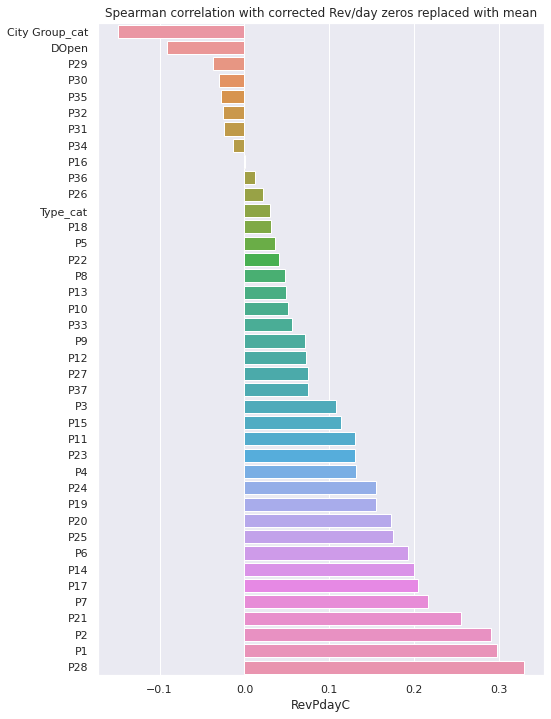

In [ ]:
cols_attr = list(df_train.drop(columns = ["Id", 'revenue','RevPday']).select_dtypes(include = ["int64", "int8", "float64"]))
# Creating a plot for the correlation of features to the target variable
fig = plt.figure(figsize=(8,12))
target_corr = df_train3[cols_attr].corr(method='spearman')['RevPdayC']
#target_corr = df_train[df_train.columns[1:]].corr()['revenue']
order_corr = target_corr.sort_values()
y = pd.DataFrame(order_corr).index[:-1]
x = pd.DataFrame(order_corr).RevPdayC[:-1]
sns.barplot(x, y, orient='h').set(title='Spearman correlation with corrected Rev/day zeros replaced with mean')
plt.show()